# Seattle's building consumption

The purpose of this project is to create a mdoel that will predict the Greehouse gaz emissions and the total enegy cosumption of buildings in order to help the city of Seattle to become a carbon-neutral city by 2050.

I will download a dataset from the city's website, analyse the dataset, choose hyperparameters, and test several machine learning models to see which is the most appropriate.

In this case, the variable(s) to predict would be "TotalGHGEmissions" or "GHGEmissionsIntensity". TotalGHGEmissions is measured in metric tons of carbon dioxide equivalent.
To predict the total energy consumption of a building, the variable(s) : SiteEnergyUse(kBtu) The annual amount of energy consumed by the property from all sources of energy.

I will first try to indentify which variables can be used to predict a building's consumption
https://data.seattle.gov/Permitting/2016-Building-Energy-Benchmarking/2bpz-gwpy/about_data

# 1. Librairies

In [1]:
# Importing librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#KNN 
from sklearn.impute import KNNImputer

#Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

#Centering and standardising
from sklearn.preprocessing import StandardScaler

#Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

#PCA
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
raw = pd.read_csv("Building_Energy_Benchmarking.csv")
raw

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0     98101.0                    0659000030  ...      1.156514e+06   
1     98101.0                    0659000220  ...      9.504252e+05   
2     98101.0                    0659000475  ...      1.451544e+07   
3     98101.0                    0659000640  ...      8.115253e+05   
4     98121.0                    0659000970  ...      1.573449e+06   
...       ...                           ...  ...               ...   
3371      NaN                    1624049080  ...      1.536550e+05   
3372      NaN                    3558300000  ...      1.162210e+05   
3373      NaN                    1794501150  ...      5.252517e+05   
3374      NaN                    7883603155  ...      1.022480e+05   
3375      NaN                    7857002030  ...      1.267744e+05   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0         3.946027e+06        12764.529300      1.276453e+06        False   
1         3.242851e+06        51450.816410      5.145082e+06        False   
2         4.952666e+07        14938.000000      1.493800e+06        False   
3         2.768924e+06        18112.130860      1.811213e+06        False   
4         5.368607e+06        88039.984380      8.803998e+06        False   
...                ...                 ...               ...          ...   
3371      5.242709e+05         3254.750244      3.254750e+05         True   
3372      3.965461e+05         5537.299805      5.537300e+05        False   
3373      1.792159e+06        39737.390630      3.973739e+06        False   
3374      3.488702e+05         3706.010010      3.706010e+05        False   
3375      4.325542e+05         7203.419922      7.203420e+05        False   

      Comments              ComplianceStatus  Outlier  TotalGHGEmissions  \
0          NaN                     Compliant      NaN             249.98   
1          NaN                     Compliant      NaN             295.86   
2          NaN                     Compliant      NaN            2089.28   
3          NaN                     Compliant      NaN             286.43   
4          NaN                     Compliant  

In [3]:
pd.set_option("display.max_columns",None)
raw

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3371      NaN                    1624049080                    2   
3372      NaN                    3558300000                    2   
3373      NaN                    1794501150                    7   
3374      NaN                    7883603155                    1   
3375      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3371                1.0               1            

In [4]:
print(raw.shape)
print(raw.info())

(3376, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude 

In [5]:
raw.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


# 2. Columns treatments

## 2.1 Deleting residential buildings, OSEBuilding ID, DataYear, City, State and Tax Parcel Number

Since the purpose of the analysis is to study non residential buildings, I will start by deleting residential buildings.

In [6]:
raw.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

It seems that residential buildings are under the names : "Multifamily MR (5-9)" , "Multifamily LR (1-4)", "Multifamily HR (10+)".

In [7]:
raw.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [8]:
raw.loc[raw['PrimaryPropertyType'] == "Hotel"]

OSEBuildingID  DataYear          BuildingType PrimaryPropertyType  \
0                 1      2016        NonResidential               Hotel   
1                 2      2016        NonResidential               Hotel   
2                 3      2016        NonResidential               Hotel   
3                 5      2016        NonResidential               Hotel   
4                 8      2016        NonResidential               Hotel   
...             ...       ...                   ...                 ...   
2823          27100      2016  Multifamily HR (10+)               Hotel   
2963          27673      2016        NonResidential               Hotel   
3221          49802      2016        NonResidential               Hotel   
3319          50035      2016        NonResidential               Hotel   
3337          50062      2016        NonResidential               Hotel   

                     PropertyName              Address     City State  \
0            Mayflower park hotel        405 Olive way  Seattle    WA   
1                 Paramount Hotel      724 Pine street  Seattle    WA   
2         5673-The Westin Seattle      1900 5th Avenue  Seattle    WA   
3                       HOTEL MAX       620 STEWART ST  Seattle    WA   
4     WARWICK SEATTLE HOTEL (ID8)        401 LENORA ST  Seattle    WA   
...                           ...                  ...      ...   ...   
2823           Four Seasons Hotel      99 Union Street  Seattle    WA   
2963                    Hotel1000        1000 1st Ave.  Seattle    WA   
3221                Hotel Ballard  5216 Ballard Ave NW  Seattle    WA   
3319    Hilton Garden Inn Seattle       1821 Boren Ave  Seattle    WA   
3337          Olympic Hospitality    3926 Aurora Ave N  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
0     98101.0                    0659000030                    7     DOWNTOWN   
1     98101.0                    0659000220                    7     DOWNTOWN   
2     98101.0                    0659000475                    7     DOWNTOWN   
3     98101.0                    0659000640                    7     DOWNTOWN   
4     98121.0                    0659000970                    7     DOWNTOWN   
...       ...                           ...                  ...          ...   
2823  98101.0                    6094680000                    7     DOWNTOWN   
2963  98104.0                    5017300000                    7     DOWNTOWN   
3221  98107.0                    2767702985                    6      BALLARD   
3319  98101.0                    3374400010                    7     DOWNTOWN   
3337  98103.0                    1931300480                    4   LAKE UNION   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0     47.61220 -122.33799       1927                1.0              12   
1     47.61317 -122.33393       1996                1.0              11   
2     47.61393 -122.33810       1969                1.0              41   
3     47.61412 -122.33664       1926                1.0              10   
4     47.61375 -122.34047       1980                1.0              18   
...        ...        ...        ...                ...             ...   
2823  47.60742 -122.33919       2008                1.0              20   
2963  47.60505 -122.33610       2006                0.0              10   
3221  47.66629 -122.38260       2013                1.0               4   
3319  47.61665 -122.33261       2015                1.0              14   
3337  47.65476 -122.34732       2014                1.0               4   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4   

In [9]:
data = raw.loc[raw['BuildingType'].str.contains("NonResidential|Nonresidential COS|SPS-District K-12|Campus|Nonresidential WA")]

In [10]:
data.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [11]:
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    1668.000000    1668.0   1652.000000          1668.000000   
mean    16336.346523    2016.0  98116.819613             4.356715   
std     13835.292512       0.0     18.430353             2.191048   
min         1.000000    2016.0  98006.000000             1.000000   
25%       582.750000    2016.0  98105.000000             2.000000   
50%     21143.500000    2016.0  98109.000000             4.000000   
75%     24602.250000    2016.0  98125.000000             7.000000   
max     50226.000000    2016.0  98199.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  1668.000000  1668.000000  1668.000000        1666.000000   
mean     47.616054  -122.332908  1961.913669           1.168667   
std       0.048168     0.024580    32.741755           2.931409   
min      47.499170  -122.411820  1900.000000           0.000000   
25%      47.585458  -122.343280  1930.000000           1.000000   
50%      47.612340  -122.332935  1965.000000           1.000000   
75%      47.649675  -122.321675  1989.000000           1.000000   
max      47.733870  -122.258640  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1668.000000      1.668000e+03         1668.000000   
mean         4.121103      1.188427e+05        12897.979017   
std          6.563407      2.973622e+05        42274.511185   
min          0.000000      1.128500e+04            0.000000   
25%          1.000000      2.947775e+04            0.000000   
50%          2.000000      4.928950e+04            0.000000   
75%          4.000000      1.053250e+05            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.668000e+03               1.662000e+03   
mean             1.059447e+05               9.876469e+04   
std              2.842116e+05               2.767111e+05   
min              3.636000e+03               5.656000e+03   
25%              2.847525e+04               2.552750e+04   
50%              4.739150e+04               4.377050e+04   
75%              9.475975e+04               9.198375e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       855.000000                       353.00000   
mean                      36804.160581                     14923.13994   
std                       69845.261024                     36790.55656   
min                           0.000000                         0.00000   
25%                        5350.000000                      2663.00000   
50%                       12000.000000                      5931.00000   
75%                       31881.000000                     12941.00000   
max                      686750.000000                    459748.00000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1094.000000       1665.000000         1665.000000   
mean         65.449726         72.158799           74.568529   
std          28.492928         74.048129           75.028403   
min           1.000000          0.000000            0.000000   
25%          48.000000         33.700001           35.400002   
50%          73.000000         51.900002           53.900002   
75%          89.000000         81.699997           85.199997   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1666.000000           1666.000000         1.666000e+03   
mean           175.829892            178.090876         8.437933e+06   
std            185.932121            185.918749         3.024380e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             76.450001             79.325003         1.229291e+06

OSEBuildingID is a city identifier which will not beuseful for the analysis, DataYear is always 2016 since it is the year the data was collected.

In [12]:
data[['OSEBuildingID','SiteEnergyUse(kBtu)']]

OSEBuildingID  SiteEnergyUse(kBtu)
0                 1         7.226362e+06
1                 2         8.387933e+06
2                 3         7.258702e+07
3                 5         6.794584e+06
4                 8         1.417261e+07
...             ...                  ...
3371          50222         8.497457e+05
3372          50223         9.502762e+05
3373          50224         5.765898e+06
3374          50225         7.194712e+05
3375          50226         1.152896e+06

[1668 rows x 2 columns]

In [13]:
data = data.drop(columns = ['OSEBuildingID','DataYear'])

Since the dataset only has buildings from Seattle, City and State always contain the same information : Seattle and WA

In [14]:
#Checking there is only one value in city and state.
print(data['City'].unique())
print(data['State'].unique())

['Seattle']
['WA']


In [15]:
#Dropping the columns
data = data.drop(columns = ['City','State'])

The Tax Parcel number is used to identify the building for tax puyrposes, it will not be kept either.

In [16]:
data = data.drop(columns = ['TaxParcelIdentificationNumber'])

## 2.2 Comments column

The comments column is considered float but is supposed to be filled with comments from the building's owner, it should be considered "object".

In [17]:
#looking at the type of data in defauldata and comments
data[['Comments','DefaultData']]

Comments  DefaultData
0          NaN        False
1          NaN        False
2          NaN        False
3          NaN        False
4          NaN        False
...        ...          ...
3371       NaN         True
3372       NaN        False
3373       NaN        False
3374       NaN        False
3375       NaN        False

[1668 rows x 2 columns]

In [18]:
#Checking that the comment columns only contains NaNs
data.Comments.unique()

array([nan])

There are no comments, the column will be deleted as well.

In [19]:
data = data.drop(columns = ['Comments'])

## 2.3 Looking for duplicates

In [20]:
data.loc[data.duplicated() == True]

Empty DataFrame
Columns: [BuildingType, PrimaryPropertyType, PropertyName, Address, ZipCode, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

It seems that there are no properties duplicated in the dataset

## 2.4 Creating a dataframe without the Default data column

The default data column indicates whether the property used default data for at least one property characteristic.
This valuable information but, in order to be able to plot the data distribution using a loop on the dataframe, I need to remove it and create a temporary dataframe that doesn't include the DefaulData column.

In [21]:
#Deleting the comments column to be able to plot histograms of each variables.
without_default = data.drop(columns = ['DefaultData'])

pd.set_option('display.max_columns',None)
without_default.describe()

ZipCode  CouncilDistrictCode     Latitude    Longitude  \
count   1652.000000          1668.000000  1668.000000  1668.000000   
mean   98116.819613             4.356715    47.616054  -122.332908   
std       18.430353             2.191048     0.048168     0.024580   
min    98006.000000             1.000000    47.499170  -122.411820   
25%    98105.000000             2.000000    47.585458  -122.343280   
50%    98109.000000             4.000000    47.612340  -122.332935   
75%    98125.000000             7.000000    47.649675  -122.321675   
max    98199.000000             7.000000    47.733870  -122.258640   

         YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  1668.000000        1666.000000     1668.000000      1.668000e+03   
mean   1961.913669           1.168667        4.121103      1.188427e+05   
std      32.741755           2.931409        6.563407      2.973622e+05   
min    1900.000000           0.000000        0.000000      1.128500e+04   
25%    1930.000000           1.000000        1.000000      2.947775e+04   
50%    1965.000000           1.000000        2.000000      4.928950e+04   
75%    1989.000000           1.000000        4.000000      1.053250e+05   
max    2015.000000         111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1668.000000            1.668000e+03               1.662000e+03   
mean         12897.979017            1.059447e+05               9.876469e+04   
std          42274.511185            2.842116e+05               2.767111e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.847525e+04               2.552750e+04   
50%              0.000000            4.739150e+04               4.377050e+04   
75%              0.000000            9.475975e+04               9.198375e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       855.000000                       353.00000   
mean                      36804.160581                     14923.13994   
std                       69845.261024                     36790.55656   
min                           0.000000                         0.00000   
25%                        5350.000000                      2663.00000   
50%                       12000.000000                      5931.00000   
75%                       31881.000000                     12941.00000   
max                      686750.000000                    459748.00000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1094.000000       1665.000000         1665.000000   
mean         65.449726         72.158799           74.568529   
std          28.492928         74.048129           75.028403   
min           1.000000          0.000000            0.000000   
25%          48.000000         33.700001           35.400002   
50%          73.000000         51.900002           53.900002   
75%          89.000000         81.699997           85.199997   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1666.000000           1666.000000         1.666000e+03   
mean           175.829892            178.090876         8.437933e+06   
std            185.932121            185.918749         3.024380e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             76.450001             79.325003         1.229291e+06   
50%            130.949997            134.150002         2.554947e+06   
75%            203.950001            205.700001         6.913348e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           1.665000e

In [22]:
pd.reset_option('display.max_columns')

# 3. Fonction to apply firt columns treatment

In [23]:
entire_data = pd.read_csv("Building_Energy_Benchmarking.csv")

def first_columns_treatment(df):
    #Deleting non residential buildings
    df = df.loc[raw['BuildingType'].str.contains("NonResidential|Nonresidential COS|SPS-District K-12|Campus|Nonresidential WA")]
    #Dropping unecessary columns
    df = df.drop(columns = ['OSEBuildingID','DataYear','Comments','City','State','TaxParcelIdentificationNumber'])
    #Creating a dataframe without DefaultData to study variables distribution
    df_without_default = df.drop(columns = ['DefaultData'])
    return df, df_without_default

The dataset data_wod has been created to be able to create a loop to display all boxplots and histograms at once to get a glance at the distribution of all variables. These boxplots and histograms are in the "outliers" and "variables distribution" sections.

In [24]:
#data_wd = data with default, data_wod = data_without_default
data_wd, data_wod = first_columns_treatment(entire_data)

In [25]:
data_wd.shape

(1668, 40)

In [26]:
data_wod.shape

(1668, 39)

# 4. Outliers

Using the previously created dataframes, I will look into each variables outliers to figure out how to handle them. To have a first look at all variables, I will start by plotting all variables' boxplot.

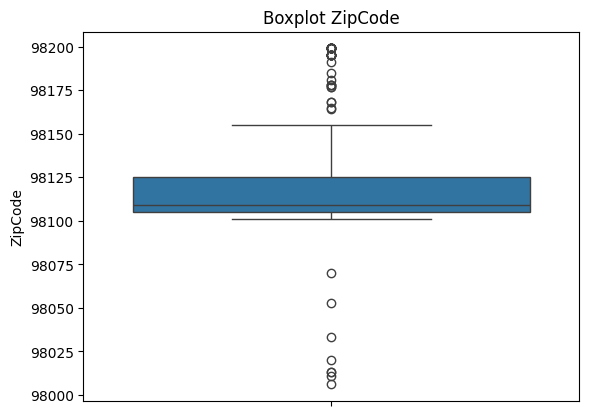

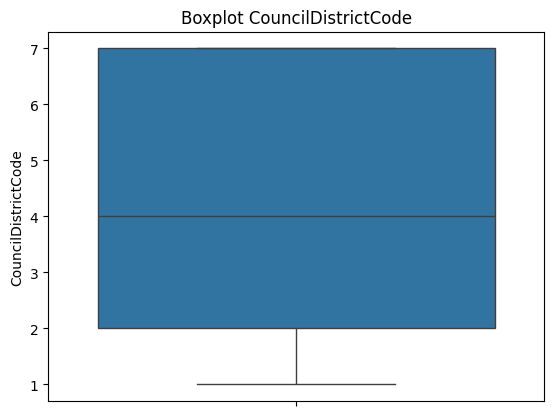

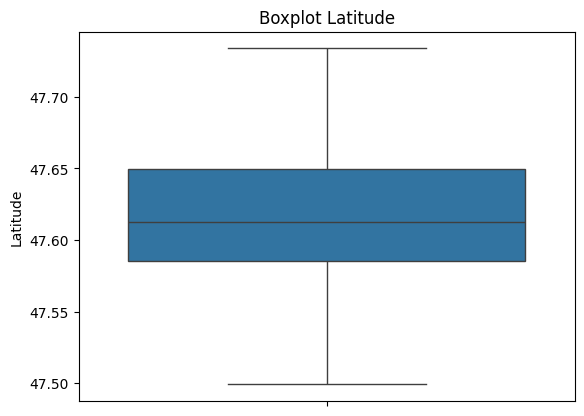

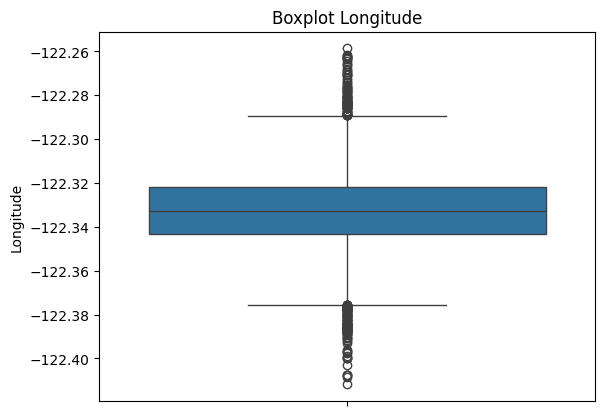

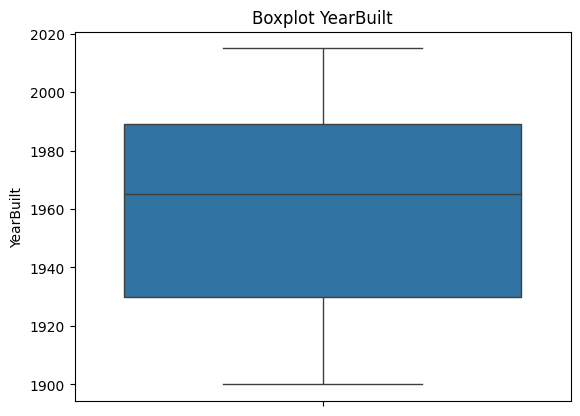

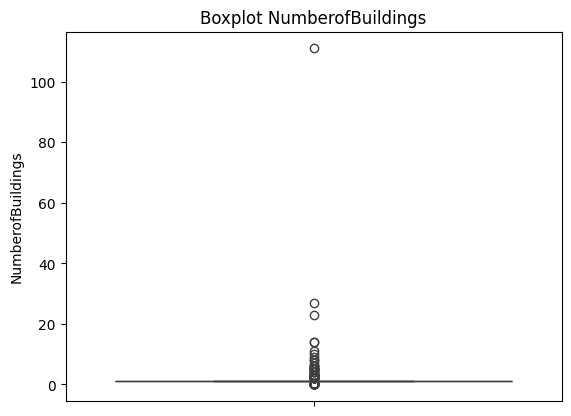

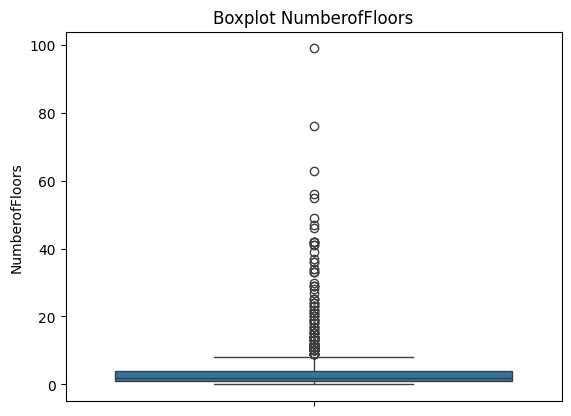

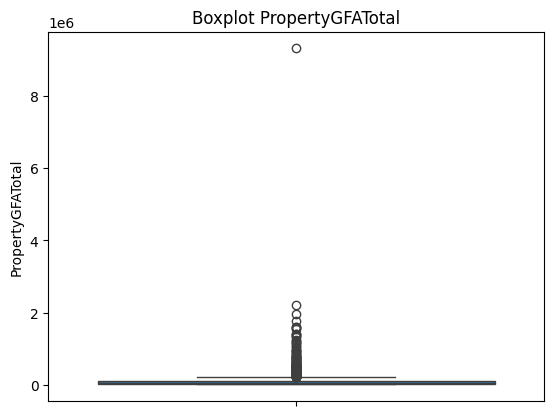

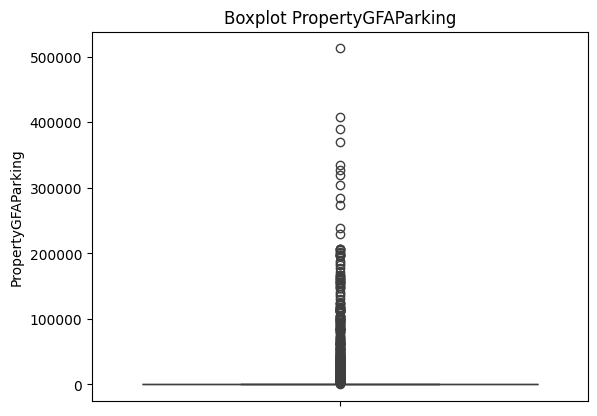

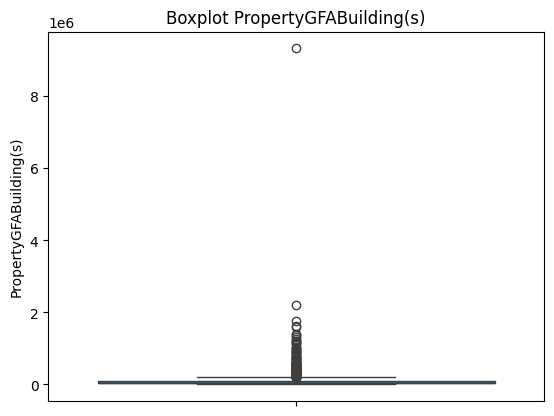

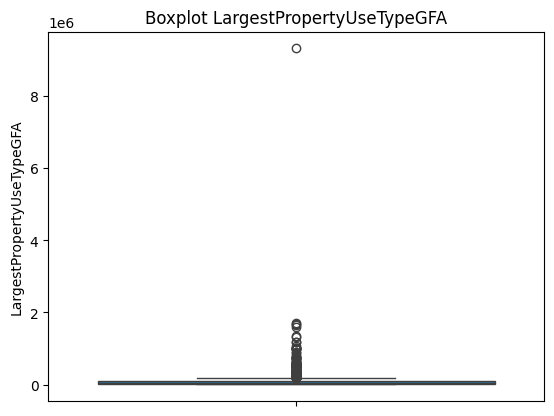

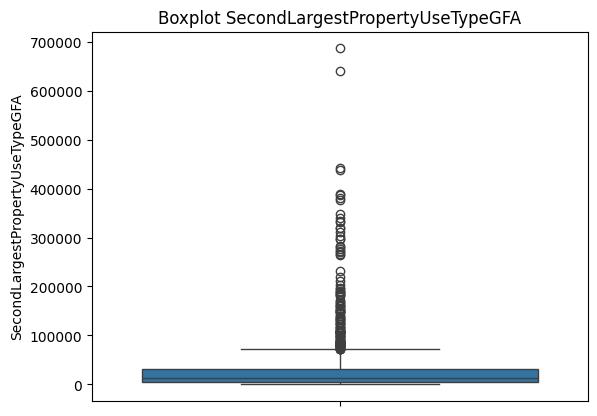

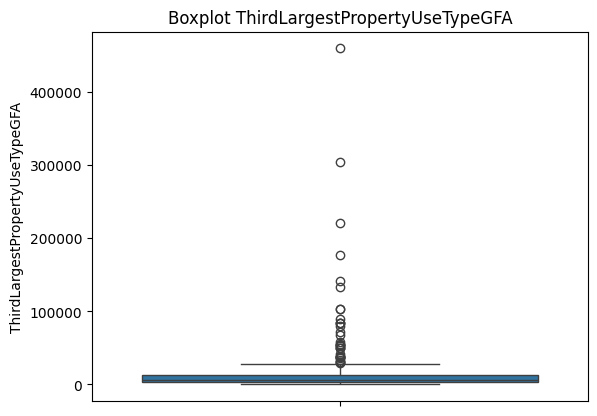

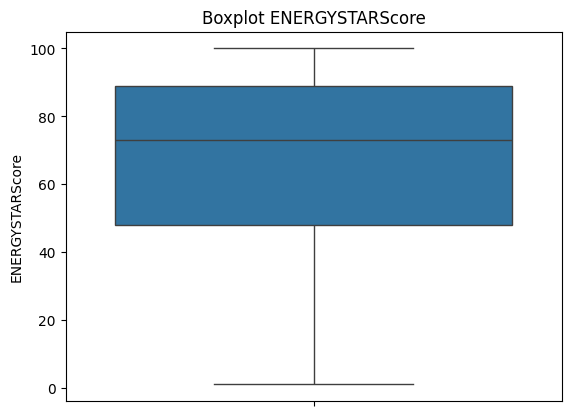

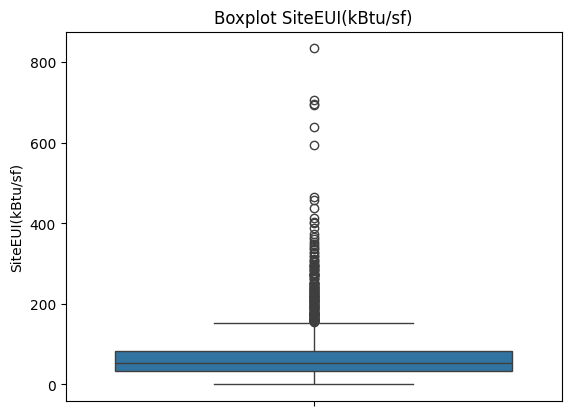

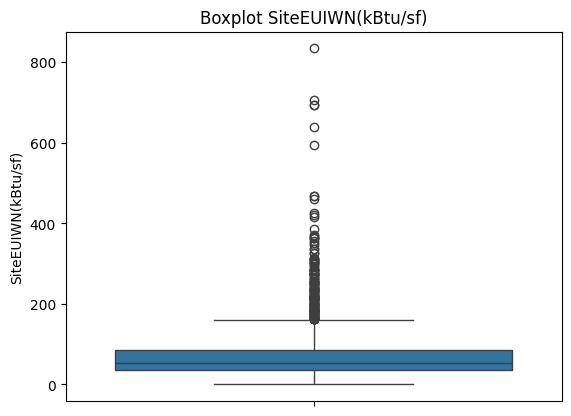

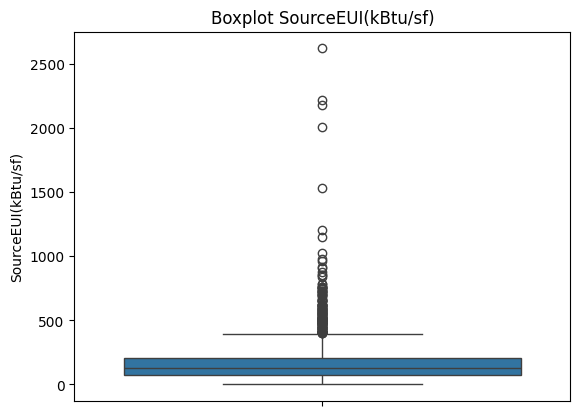

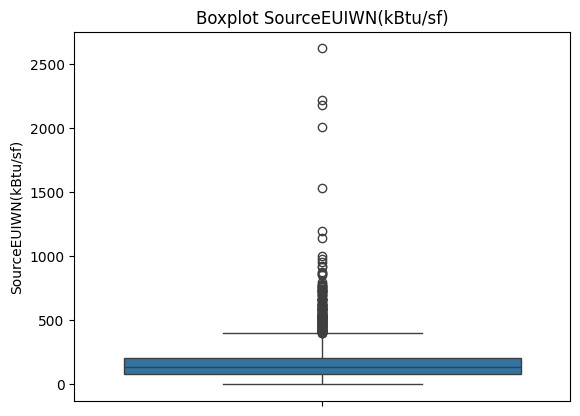

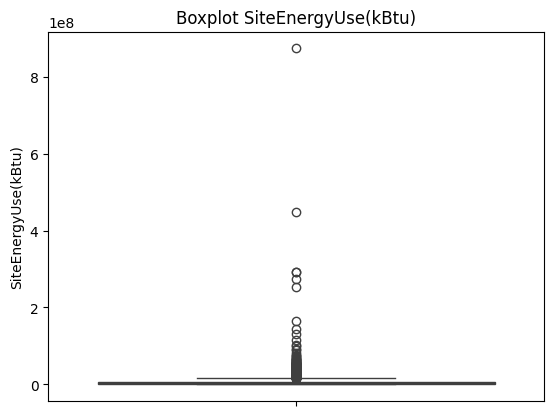

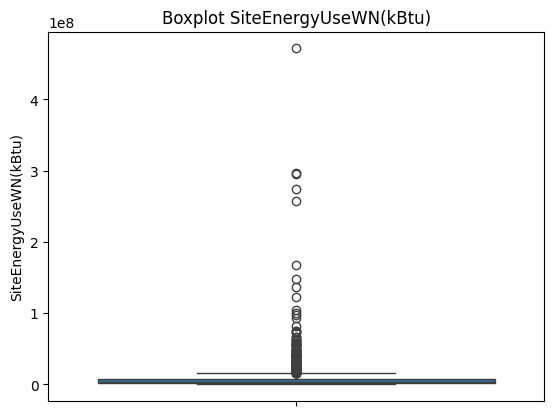

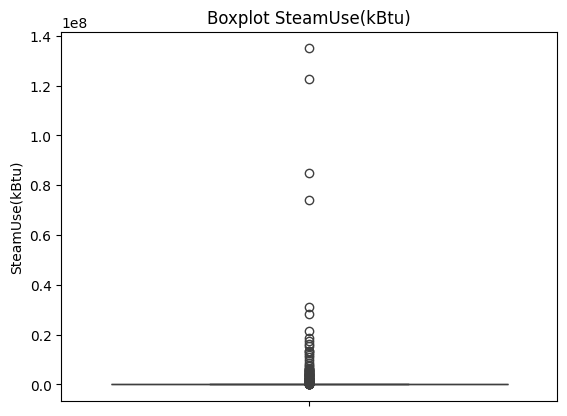

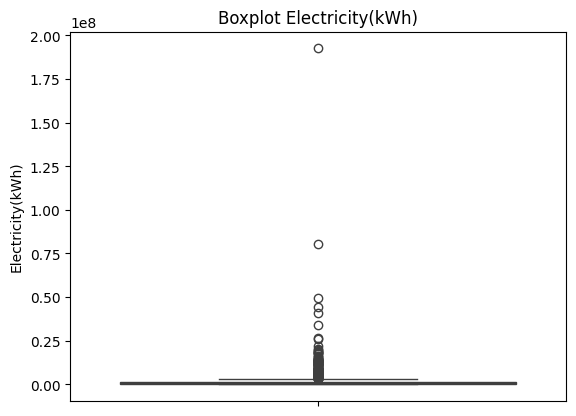

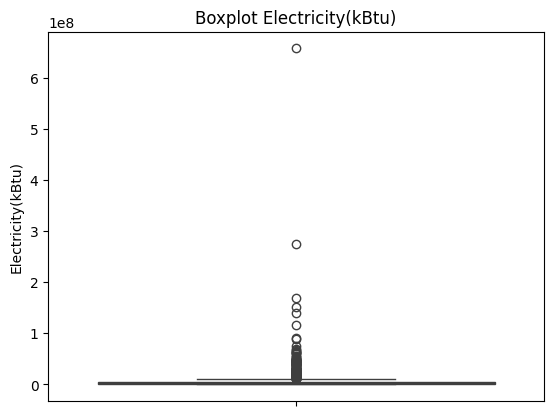

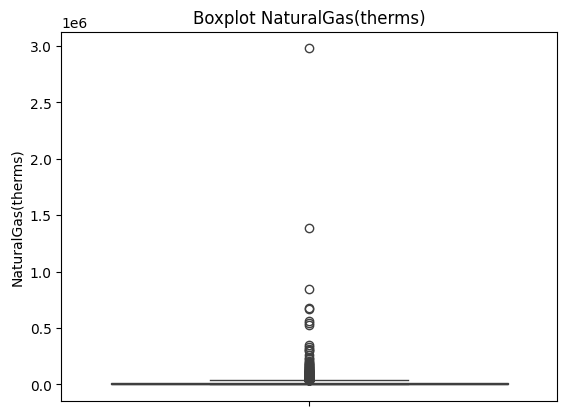

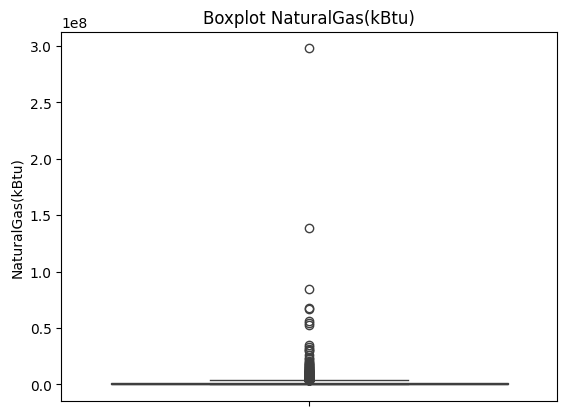

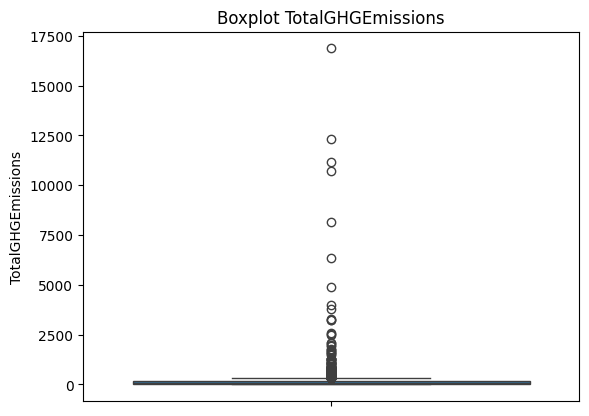

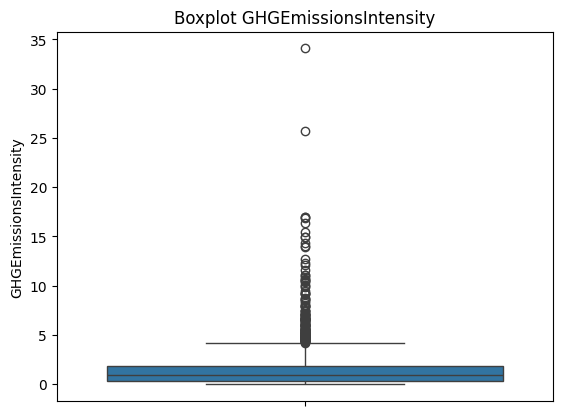

In [27]:
for column in data_wod:
    if pd.api.types.is_numeric_dtype(data_wod[column]):
        plt.figure()
        sns.boxplot(data_wod[column])
        plt.title('Boxplot ' + column)
        plt.show()

<Figure size 100x100 with 0 Axes>

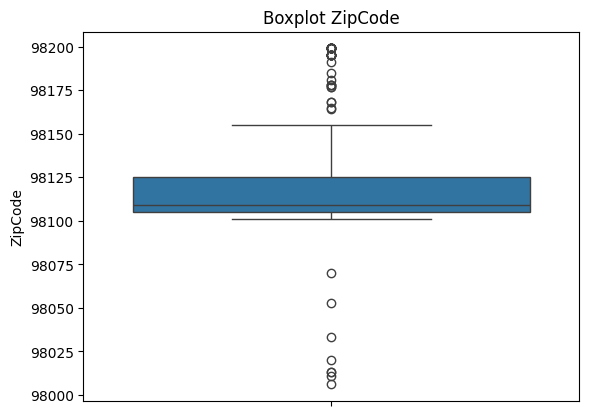

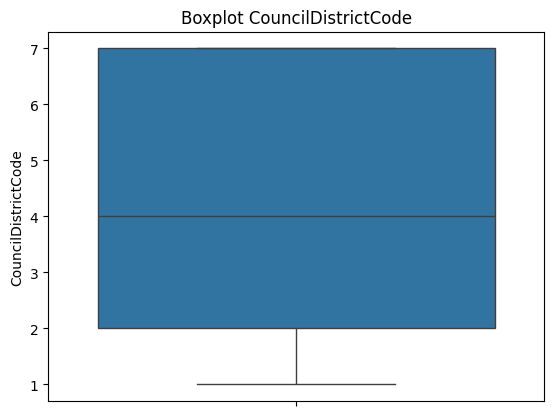

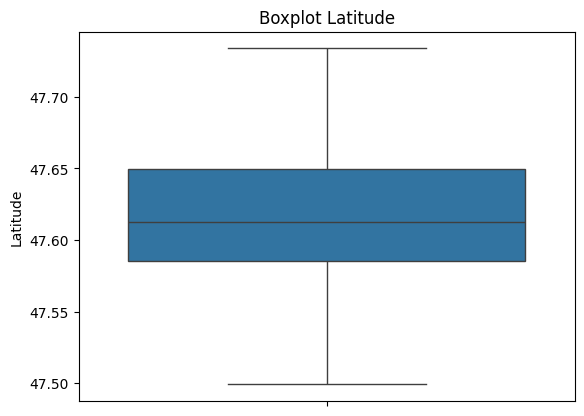

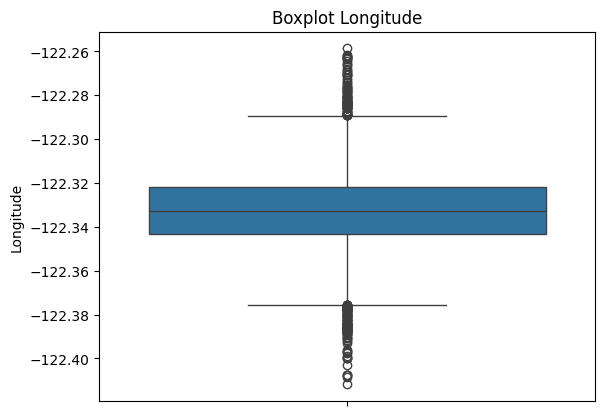

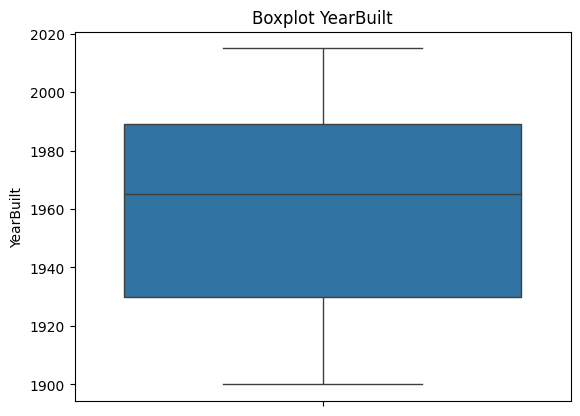

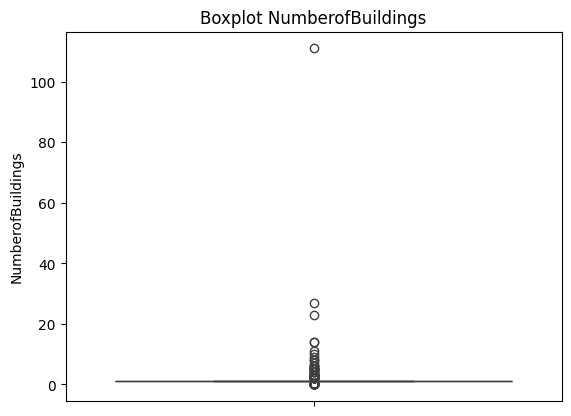

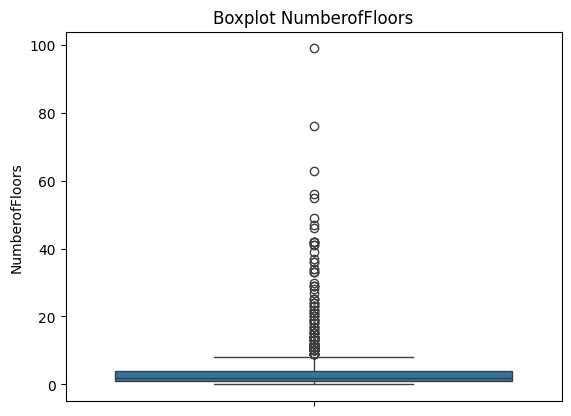

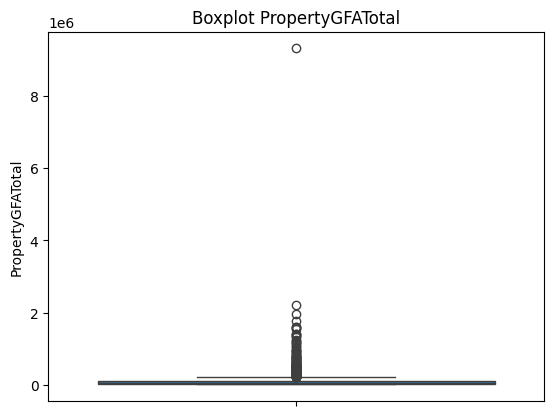

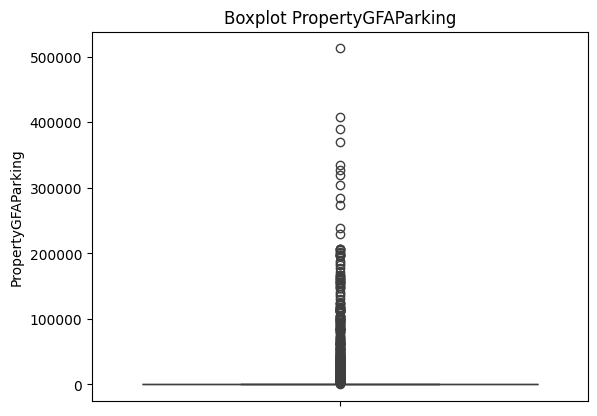

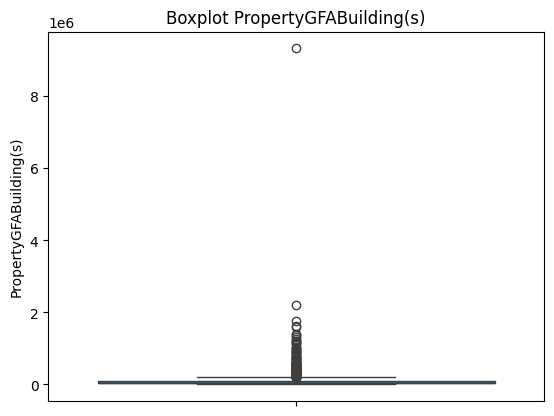

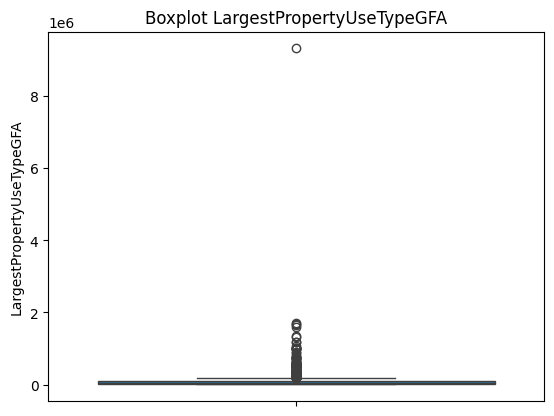

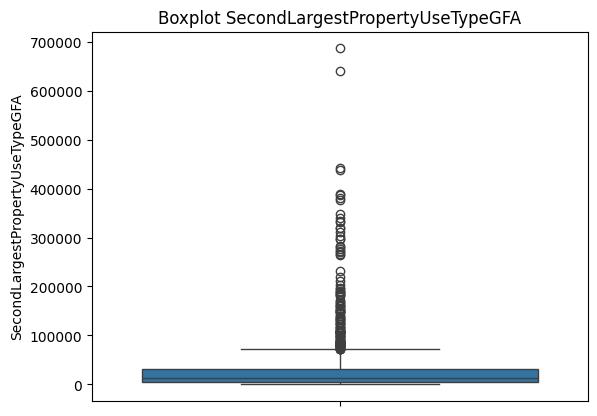

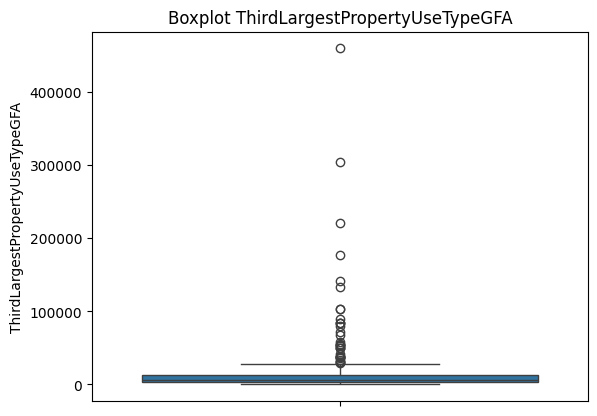

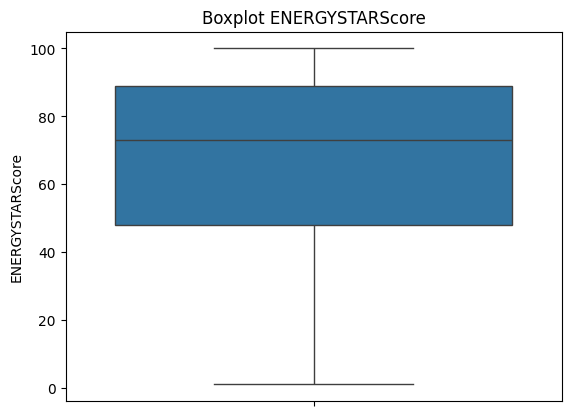

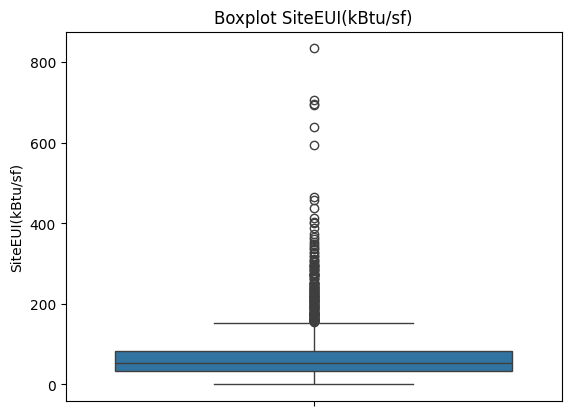

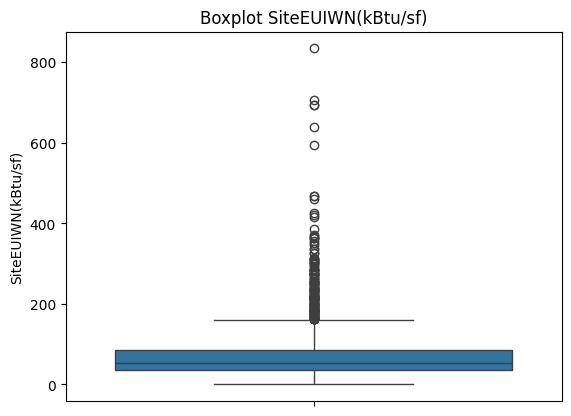

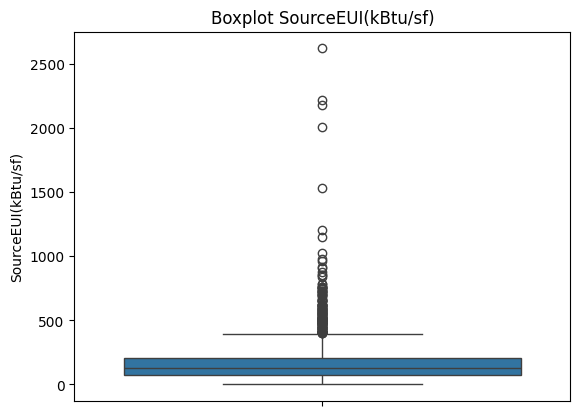

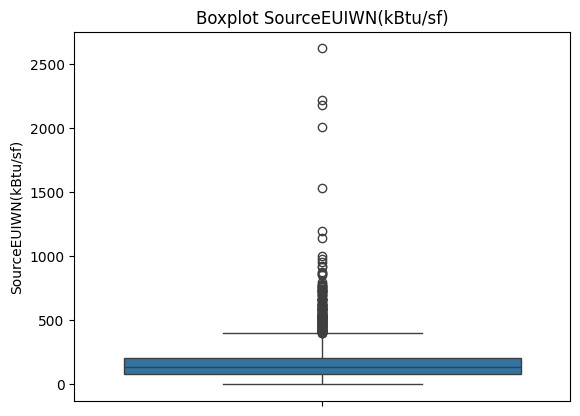

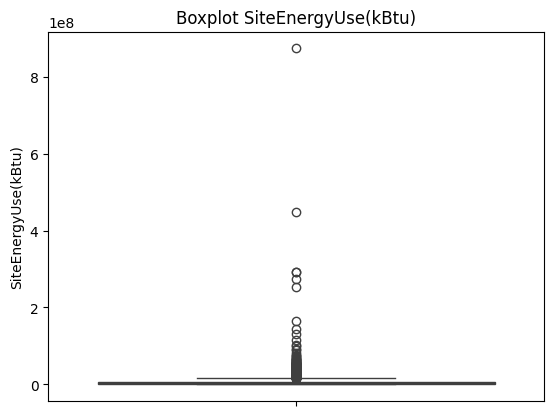

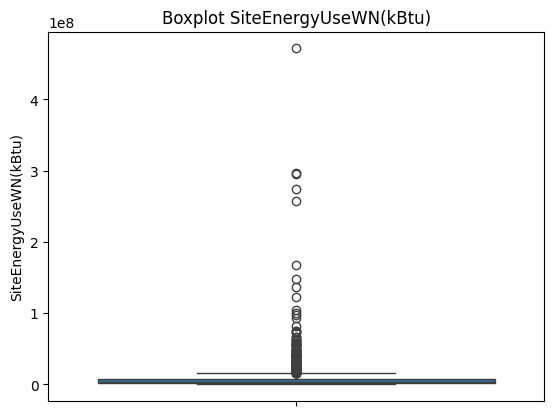

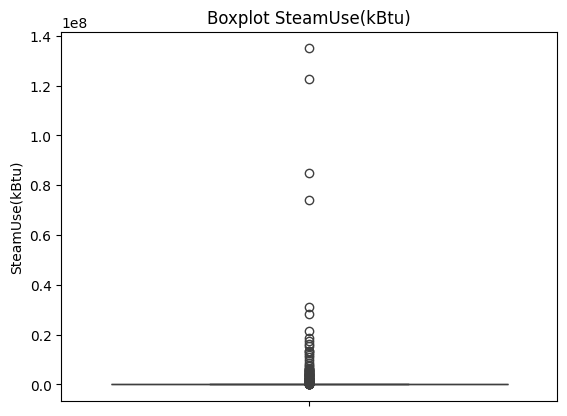

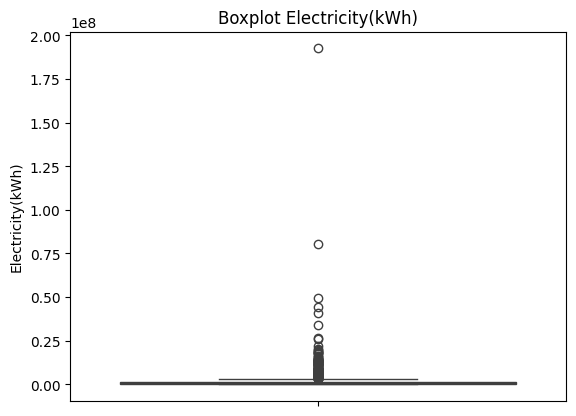

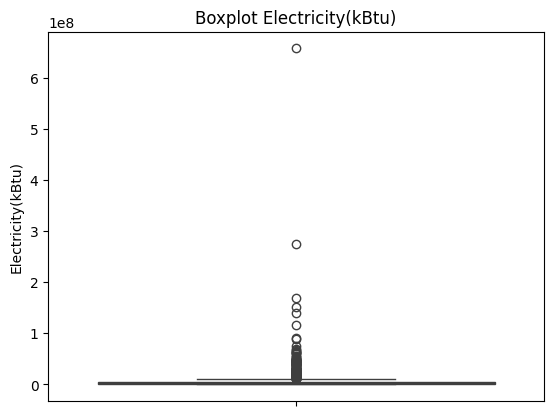

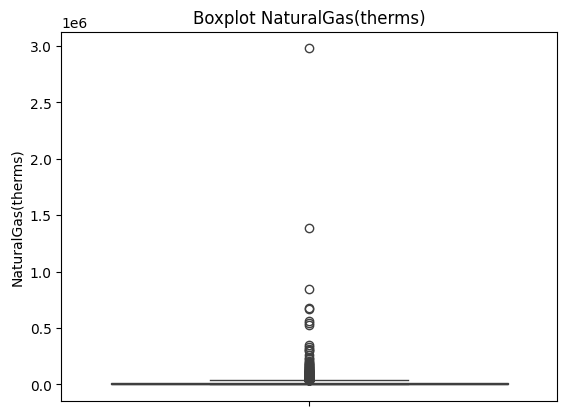

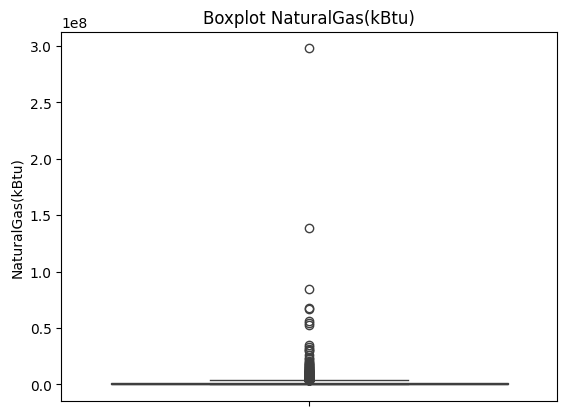

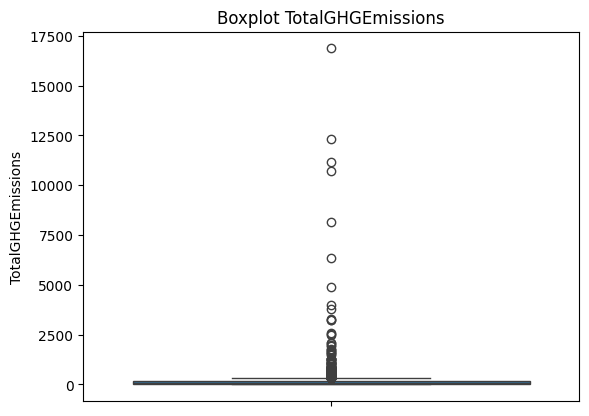

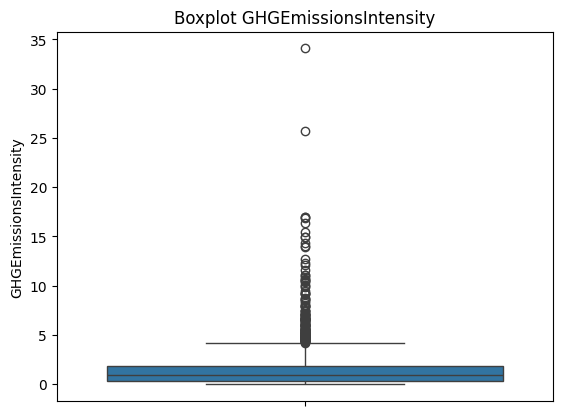

In [28]:
plt.figure(figsize = (1,1))
for column in data_wod:
    if pd.api.types.is_numeric_dtype(data_wod[column]):
        plt.figure()
        sns.boxplot(data_wod[column])
        plt.title('Boxplot ' + column)
        plt.show()

A part from energy star, alll columns have outliers.
Zip code, latitude and longitude also have outliers but since they are linked to living area, they will not be treated the same way as other outliers and will be kept.

In most of the boxplots, we can see an outlier that seems to have a high value for most variables.

## 4.1 Function to find out the outliers lower bounds and upper bounds

In [29]:
#Outlier calculations

def get_outlier_bounds(column):
    q1 = column.quantile(0.25)  # 1st quartile
    q3 = column.quantile(0.75)  # 3rd quartile
    iqr = q3 - q1  # Interquartile range

    lower_bound = q1 - 1.5 * iqr  # Lower bound
    upper_bound = q3 + 1.5 * iqr  # Upper bound

    return lower_bound, upper_bound

## 4.2 Number Of buildings

The number of buildings indicates the number of buildings included in the property's report. 

In cases where a property is reporting as a campus, multiple buildings may be included in one report.

count    1666.000000
mean        1.168667
std         2.931409
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64


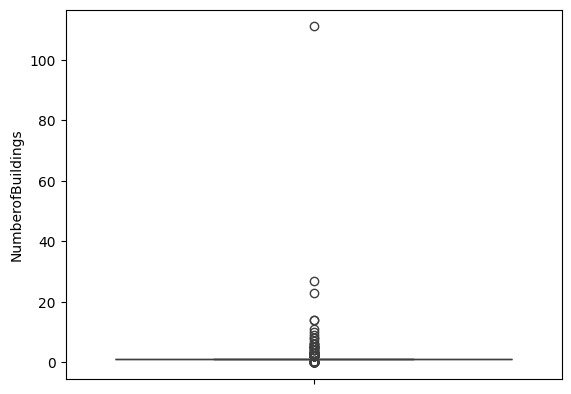

In [30]:
print(data_wod['NumberofBuildings'].describe())

sns.boxplot(data = data_wod.NumberofBuildings)
#plt.yscale('log')
plt.show()

In [31]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['NumberofBuildings'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: 1.0
Outliers upper bound: 1.0


In [32]:
#Looking at values above and below 1
data_wod.loc[(data_wod['NumberofBuildings'] > 1) | (data_wod['NumberofBuildings'] < 1),
['BuildingType','PropertyName','NumberofBuildings']].sample(35)

BuildingType                                       PropertyName  \
417       NonResidential                                  Northgate Village   
661               Campus                     Pacific Multiforms Inc- Campus   
280       NonResidential                                      Motif Seattle   
608       NonResidential                             Seattle Pottery Supply   
170       NonResidential                          Harborview Medical Center   
952       NonResidential                          Chancery Place Apartments   
2188      NonResidential                                 Pacific Commercial   
2482      NonResidential                          Park West Skilled Nursing   
619       NonResidential                               Northwest Work Lofts   
2963      NonResidential                                          Hotel1000   
1732              Campus                                      T102 1011 B/C   
264       NonResidential                                      Thaw Building   
1606  Nonresidential COS                  Meadowbrook Community Center/Pool   
2715      NonResidential                             220_3rd_ave_s_03262013   
2747      NonResidential                            Sixth & King Associates   
3000      NonResidential                                Sound Mental Health   
1659  Nonresidential COS                                   Northgate Campus   
618       NonResidential                                 Swedish First Hill   
98        NonResidential                                    Swedish Ballard   
429       NonResidential                                      1616 Eastlake   
160       NonResidential              Harbor Island: Warehouse E - DNRP-SWD   
195               Campus  P66 Bell Harbor International Conference Cente...   
3110      NonResidential                             SCCC WOOD CONSTRUCTION   
494       NonResidential                                 #8944 West Seattle   
1244      NonResidential                                    University Club   
867       NonResidential                              University Travelodge   
3178  Nonresidential COS                             South Transfer Station   
105               Campus                                   SSCC MAIN CAMPUS   
3121      NonResidential                                     Harvard Market   
201       NonResidential              Cox Media Group Seattle KIRO TV (322)   
128               Campus                                   NSCC MAIN CAMPUS   
1317      NonResidential                                White and Hitchcock   
2382      NonResidential          (ID25461) CHINA HARBOR RESTURANT & MARINA   
1862              Campus                          FT C15 Fishermen's Center   
2782  Nonresidential COS                            Yesler Community Center   

      NumberofBuildings  
417                 0.0  
661                 3.0  
280                 0.0  
608                 0.0  
170                 9.0  
952                 0.0  
2188                0.0  
2482                0.0  
619                 3.0  
2963                0.0  
1732                5.0  
264                 0.0  
1606                0.0  
2715                0.0  
2747                0.0  
3000                5.0  
1659                2.0  
618                 7.0  
98                  4.0  
429                 0.0  
160                 0.0  
195                 4.0  
3110                2.0  
494                 0.0  
1244                0.0  
867                 2.0  
3178                2.0  
105                27.0  
3121                0.0  
201                 0.0  
128                11.0  
1317                0.0  
2382                0.0  
1862               23.0  
2782                0.0

In [33]:
data_wod['NumberofBuildings'].unique()

array([  1.,   3.,   0.,   2.,   4.,  27.,   6.,  11.,  14.,   9.,   5.,
        nan,   7.,   8.,  23.,  10., 111.])

In [34]:
data_wod['NumberofBuildings'].value_counts()

NumberofBuildings
1.0      1561
0.0        52
2.0        14
3.0        12
5.0         8
4.0         4
6.0         4
14.0        2
8.0         2
27.0        1
11.0        1
9.0         1
7.0         1
23.0        1
10.0        1
111.0       1
Name: count, dtype: int64

Most properties have 1 to 3 buildings.
Some buildings have a number of building set to 0 which is not possible, they should at least have 1 building.

There are also some property referenced as having 9, 10, 11, 23 and 111 which seems unlikely.

In [35]:
pd.set_option('display.max_rows',None)

#Displaying buildings with value equal to 0 or superior to 
data_wod.loc[(data_wod['NumberofBuildings'] == 0) | (data_wod['NumberofBuildings'] > 5),
['BuildingType','PropertyName','NumberofBuildings']].sort_values(by = 'NumberofBuildings')

BuildingType                                       PropertyName  \
63        NonResidential                          Polyclinic North && South   
1025  Nonresidential COS                              Amy Yee Tennis Center   
3259      NonResidential                             SCCC DISTRICT/ERICKSON   
1244      NonResidential                                    University Club   
1256      NonResidential                    Northwest Kidney Center (21365)   
1317      NonResidential                                White and Hitchcock   
1606  Nonresidential COS                  Meadowbrook Community Center/Pool   
2054      NonResidential                      Phinney Ridge Lutheran Church   
2115      NonResidential                                OAKTREE PLAZA ASSOC   
2166  Nonresidential COS                Southwest Teen Life Center and Pool   
2188      NonResidential                                 Pacific Commercial   
2214      NonResidential                                  1943 First Avenue   
2382      NonResidential          (ID25461) CHINA HARBOR RESTURANT & MARINA   
2407      NonResidential          Compass Housing Alliance - Pioneer Square   
2441      NonResidential                                 Buttnick City Loan   
2482      NonResidential                          Park West Skilled Nursing   
2564      NonResidential                             517 E Pike St Building   
2631      NonResidential                                       Solid Ground   
2708      NonResidential                                     Moses Building   
2715      NonResidential                             220_3rd_ave_s_03262013   
2747      NonResidential                            Sixth & King Associates   
2782  Nonresidential COS                            Yesler Community Center   
2963      NonResidential                                          Hotel1000   
3108      NonResidential                          Bay Vista Office Building   
3121      NonResidential                                     Harvard Market   
3155  Nonresidential COS                                  Medgar Evers Pool   
3205      NonResidential                              UW Medicine Phase 3.1   
3232  Nonresidential COS                             SCT Technical Pavilion   
1002      NonResidential                                           EBBC LCW   
985       NonResidential       Lyon's Antique Mall - Windermere/Garlic Jims   
1177      NonResidential                              Seventeen Meters, LLC   
809       NonResidential                                  3000/3018 Western   
76        NonResidential                                              KCTS9   
160       NonResidential              Harbor Island: Warehouse E - DNRP-SWD   
201       NonResidential              Cox Media Group Seattle KIRO TV (322)   
241       NonResidential                 University District Office Buiding   
264       NonResidential                                      Thaw Building   
278       NonResidential                           Fourth and Pike Building   
280       NonResidential                                      Motif Seattle   
291       NonResidential                                    Meridian (East)   
952       NonResidential                          Chancery Place Apartments   
365       NonResidential                                Sam's Club #18-6687   
417       NonResidential                                  Northgate Village   
358   Nonresidential COS                                         Westbridge   
433       NonResidential                  McKinstry SEA - 220 S Hudson Shop   
477       NonResidential                                   Starbucks Center   
481       NonResidential                                            INScape   
488       NonResidential                               2200 Westlake - SEDO   
494       NonResidential                                 #8944 West Seattle   
544       NonResidential                Seattle Marine & Fishi

In [36]:
pd.reset_option('display.max_rows')

According to their descriptions, properties with 0 buildings should be considered as having 1 building (except for the clinic which might have more than 1 building).

Properties with 2 to 9 buildings are usually hospitals and each building is a hospital wing.

Campuses have 10 to 27 buildings, which makes sense since they are usualluy made of teaching buildings and student housing.

The university of Washington - Seattle campus however is listed as having 111 buildings.
When looking at all the boxplots, I could see a very high outlier in most of them, I will check if this outlier is the University of Washington - Seattle Campus, if it is, I will delete it from the dataframe since it will most probably indicate that errors were comitted when adding it to the dataset. if not, I will replace it's number of buildings' value with the mean of other campuses.

In [37]:
pd.set_option('display.max_columns', None)
data_wod.loc[data_wod['PropertyName'] == 'University of Washington - Seattle Campus']

BuildingType PrimaryPropertyType  \
3274       Campus          University   

                                   PropertyName                    Address  \
3274  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   

      ZipCode  CouncilDistrictCode Neighborhood  Latitude  Longitude  \
3274  98105.0                    4    NORTHEAST  47.65644 -122.31041   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3274       1900              111.0               0           9320156   

      PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
3274                   0                 9320156        College/University   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3274     College/University                  9320156.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3274                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3274                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3274                      NaN              NaN         93.800003   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
3274                 0.0          246.600006                   0.0   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3274          873923712.0                    0.0      84985240.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3274       192577488.0        657074389.0                 0.0   

      NaturalGas(kBtu) ComplianceStatus Outlier  TotalGHGEmissions  \
3274               0.0        Compliant     NaN           11140.56   

      GHGEmissionsIntensity  
3274                    1.2

While looking at the properties' values in the above boxplots, we can see that this property is the highest value for PropertyGFATotal, PropertyGFABuilding and SiteEnergyUse, and the values are way too high compared to other properties. It seems that this university has campuses both in washington and Seattle, it is possible that whoever added the property combined the washington and Seattle buildings which lead to those high values. This outlier will be deleted since it is not representative of the buildings we are trying to study.

### 4.2.1 Number of buildings treatments

In [38]:
#Turning 0s into 1
data_wod.loc[data_wod['NumberofBuildings'] == 0, ['NumberofBuildings']] = 1
#Deleting properties above 30 buildings
data_wod = data_wod.loc[data_wod['NumberofBuildings'] < 30]

In [39]:
data_wod['NumberofBuildings'].unique()

array([ 1.,  3.,  2.,  4., 27.,  6., 11., 14.,  9.,  5.,  7.,  8., 23.,
       10.])

## 4.3 Number of Floors

NumberofFloors

count    1665.000000
mean        4.124925
std         6.568336
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64


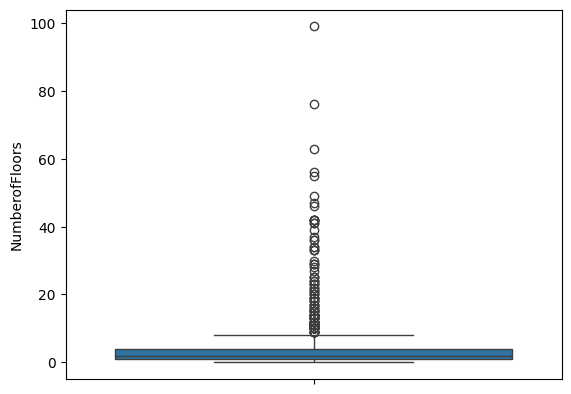

In [40]:
print(data_wod['NumberofFloors'].describe())

sns.boxplot(data = data_wod.NumberofFloors)
#plt.yscale('log')
plt.show()

In [41]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['NumberofFloors'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -3.5
Outliers upper bound: 8.5


In [42]:
data_wod.loc[(data_wod['NumberofFloors'] < 3.5) | (data_wod['NumberofFloors'] > 8.5),
['BuildingType','PrimaryPropertyType','PropertyName','NumberofFloors']].sort_values(by = 'NumberofFloors').head(40)

BuildingType          PrimaryPropertyType  \
487       NonResidential               Medical Office   
3168  Nonresidential COS                        Other   
166       NonResidential                        Hotel   
3132      NonResidential  Small- and Mid-Sized Office   
564       NonResidential                        Other   
3131      NonResidential               Medical Office   
3130      NonResidential                    Warehouse   
3273      NonResidential                        Other   
3276      NonResidential               Residence Hall   
3278      NonResidential               Residence Hall   
3279      NonResidential               Residence Hall   
1993              Campus                        Other   
3280      NonResidential               Residence Hall   
1754      NonResidential               Medical Office   
488       NonResidential           Mixed Use Property   
683       NonResidential                    Warehouse   
2036      NonResidential  Small- and Mid-Sized Office   
656       NonResidential           Mixed Use Property   
657       NonResidential                    Warehouse   
746       NonResidential                        Other   
745       NonResidential                 Retail Store   
2037      NonResidential  Small- and Mid-Sized Office   
2038      NonResidential                    Warehouse   
658       NonResidential          Distribution Center   
660       NonResidential                    Warehouse   
661               Campus                        Other   
2039      NonResidential                    Warehouse   
2040      NonResidential          Distribution Center   
2041      NonResidential                        Other   
2043      NonResidential                        Other   
2049      NonResidential             Worship Facility   
2080  Nonresidential COS           Mixed Use Property   
2076      NonResidential                 Retail Store   
680       NonResidential          Distribution Center   
681       NonResidential                    Warehouse   
2035      NonResidential                        Other   
2066      NonResidential                    Warehouse   
2067      NonResidential                    Warehouse   
2068      NonResidential                    Warehouse   
2069      NonResidential          Distribution Center   

                                           PropertyName  NumberofFloors  
487                                     Arnold Pavilion               0  
3168                                           Magnuson               0  
166                                 Grand Hyatt Seattle               0  
3132                                      Sandpoint #29               0  
564                                       Pacific Place               0  
3131                                      Sandpoint #25               0  
3130                                       Sandpoint #5               0  
3273             Smilow Rainier Vista Boys & Girls Club               0  
3276                                         Cedar Hall               0  
3278                                        Lander Hall               0  
3279                                        Mercer Hall               0  
1993  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...               0  
3280                                        Poplar Hall               0  
1754                                HART First Hill LLC               0  
488                                2200 Westlake - SEDO               0  
683                        WALL & CEILING SUPPLY CO INC               1  
2036                                   Ed Wyse Building               1  
656     Puget Sound Energy Georgetown Operations Center               1  
657                              SeaTac Marine Services               1  
746                      Welcome Home Society - PriceCo               1  
745                                        Office Depot               1  
2037                          Lamar Advertisin

Residence Halls are student housing, they will not be kept since they are housing buildings, although they are listed under 'NonResidential', also they are listed as having 0 floors when looking it up on the internet show that most of them have several floors.

There no values under 0, outliers below the lower bound are simply building that have under 3 floors.

In [43]:
#Looking at upper outliers
data_wod.loc[data_wod['NumberofFloors'] > 8.5,['BuildingType','PrimaryPropertyType',
                                               'PropertyName','NumberofFloors']].sort_values(by = 'NumberofFloors').sample(40)

BuildingType    PrimaryPropertyType  \
560       NonResidential           Large Office   
3320      NonResidential           Large Office   
975       NonResidential                  Hotel   
14        NonResidential                  Hotel   
281       NonResidential           Large Office   
205       NonResidential           Retail Store   
1418      NonResidential  Senior Care Community   
559       NonResidential           Large Office   
248       NonResidential           Large Office   
228       NonResidential           Large Office   
293       NonResidential           Large Office   
213       NonResidential           Large Office   
236       NonResidential           Large Office   
207       NonResidential           Large Office   
3324      NonResidential           Large Office   
582       NonResidential           Large Office   
3162      NonResidential           Large Office   
231       NonResidential           Large Office   
577       NonResidential           Large Office   
3199      NonResidential           Large Office   
221       NonResidential           Large Office   
3329  Nonresidential COS           Large Office   
48        NonResidential                  Hotel   
43        NonResidential                  Hotel   
284       NonResidential           Large Office   
230       NonResidential           Large Office   
261       NonResidential           Large Office   
256       NonResidential           Large Office   
273       NonResidential           Large Office   
285       NonResidential           Large Office   
10        NonResidential                  Hotel   
233   Nonresidential COS           Large Office   
618       NonResidential               Hospital   
186       NonResidential         Residence Hall   
557       NonResidential           Large Office   
3105      NonResidential             Restaurant   
572       NonResidential           Large Office   
558       NonResidential                  Other   
11        NonResidential                  Hotel   
19        NonResidential                  Hotel   

                                  PropertyName  NumberofFloors  
560                       Eighth & Olive - New              19  
3320          MAPS 325 Ninth Avenue North, LLC              12  
975                          The Hotel Seattle              11  
14                       Hotel Vintage Seattle              11  
281                      Joshua Green Building              10  
205                              Nordstrom 001              10  
1418                         Mirabella Seattle              14  
559                     Columbia Center - 2015              76  
248                       Fourth and Blanchard              24  
228   Abraham Lincoln Building (Wallysons Inc)              14  
293                           One Union Square              36  
213                             Denny Building              12  
236                           Chinook Building              13  
207                           1700 Seventh Ave              23  
3324                            Sidneysea, LLC              12  
582                    Administration Building               9  
3162                       City Place V - SEDO              11  
231                           901 Fifth Avenue              42  
577                           800 Fifth Avenue              42  
3199                        Market Place Tower              13  
221                           999 Third Avenue              47  
3329                  400 FAIRVIEW OFFICE BLDG              13  
48                             Roosevelt Hotel              20  
43                        Seattle Hilton Hotel              24  
284            Onni 1411 Fourth Development LP              15  
230                           Fourth & Madison              37  
261                              Rainier Tower              42  
256                                Smith Tower              42  
273                             US 

The city has a lot of high buildings but a quick internet search shows that most buildings indicated the correct number of floors. I am going to check the very high values.

In [44]:
#Looking at upper outliers
data_wod.loc[data_wod['NumberofFloors'] > 50,['BuildingType','PrimaryPropertyType',
                                               'PropertyName','NumberofFloors']].sort_values(by = 'NumberofFloors')

BuildingType PrimaryPropertyType                    PropertyName  \
271       NonResidential        Large Office               1201 Third Avenue   
292       NonResidential        Large Office                Two Union Square   
233   Nonresidential COS        Large Office  Seattle Municipal Tower (2030)   
559       NonResidential        Large Office          Columbia Center - 2015   
1359      NonResidential    Worship Facility  Seattle Chinese Baptist Church   

      NumberofFloors  
271               55  
292               56  
233               63  
559               76  
1359              99

Some buildings with very high values like 1201 Third Avenue, Columbia Center indeed have the same number of floors as what is indicated in the dataset.
However the Chinese baptist church seems to be a 2 floor building. It will be deleted from the dataset since other values attributed to the building might be false.

In [45]:
data_wod.loc[data_wod['PropertyName'] == 'Seattle Chinese Baptist Church']

BuildingType PrimaryPropertyType                    PropertyName  \
1359  NonResidential    Worship Facility  Seattle Chinese Baptist Church   

                       Address  ZipCode  CouncilDistrictCode  \
1359  5801 Beacon Avenue South  98108.0                    2   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
1359  GREATER DUWAMISH  47.55072 -122.30265       1977                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1359              99             21948                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
1359                   21948          Worship Facility       Worship Facility   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1359                    21948.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1359                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
1359                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1359             80.0              14.9                14.9   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
1359           46.599998             46.599998          326001.1875   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
1359            326001.1875             0.0           95545.5   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
1359           326001.0                 0.0               0.0   

     ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
1359        Compliant     NaN               2.27                    0.1

### 4.3.1 Number of Floors treatments

In [46]:
#Looking at whether other property types are listed as non residential when they are actually made for housing.
data_wod['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [47]:
#Deleting the Residence Halls
data_wod = data_wod.loc[data_wod['PrimaryPropertyType'] != 'Residence Hall']

#Deleting Senior Care Community
data_wod = data_wod.loc[data_wod['PrimaryPropertyType'] != 'Senior Care Community']

#Deleting Low-Rise Multifamily
data_wod = data_wod.loc[data_wod['PrimaryPropertyType'] != 'Low-Rise Multifamily']

#Deleting the chines baptist church
data_wod = data_wod.loc[data_wod['PropertyName'] != 'Seattle Chinese Baptist Church']

In [48]:
#Checking
data_wod['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Medical Office', 'Retail Store', 'Hospital',
       'Distribution Center', 'Worship Facility',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Office'], dtype=object)

When looking at other Primaty Property types, we can see that some buildings are referenced as Low-Rise Multifamily and Senior care Community, although they are listed as non residential, they are still being used as housing.

In [49]:
#Checking
data_wod.loc[data_wod['PropertyName'] == 'Seattle Chinese Baptist Church']

Empty DataFrame
Columns: [BuildingType, PrimaryPropertyType, PropertyName, Address, ZipCode, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

## 4.4 PropertyGFATotal

Total building and parking gross floor area

The gross floor area is the sum of the floor areas of the spaces within the building, including basements, mezzanine and intermediate-floored tiers, and penthouses with headroom height of 7.5 ft (2.2 meters) or greater.

count    1.620000e+03
mean     1.138997e+05
std      1.958478e+05
min      1.128500e+04
25%      2.947775e+04
50%      4.924600e+04
75%      1.048548e+05
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64


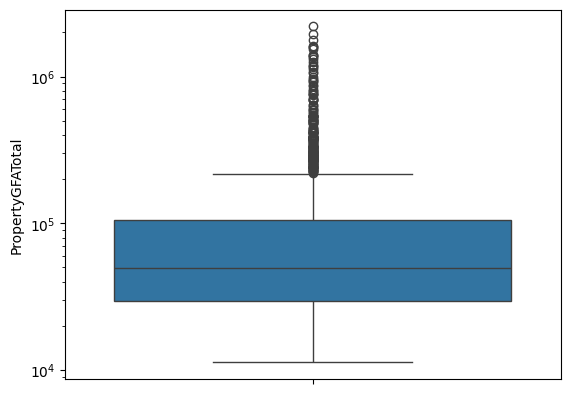

In [50]:
print(data_wod['PropertyGFATotal'].describe())

sns.boxplot(data = data_wod.PropertyGFATotal)
plt.yscale('log')
plt.show()

In [51]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['PropertyGFATotal'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -83587.75
Outliers upper bound: 217920.25


No outliers below 0

In [52]:
#Checking outliers above 219 095
data_wod.loc[data_wod['PropertyGFATotal'] > 219095,
['BuildingType','PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors',
 'PropertyGFATotal']].sort_values(by = 'PropertyGFATotal', ascending = False)

BuildingType PrimaryPropertyType                PropertyName  \
1494          Campus          University               Entire Campus   
559   NonResidential        Large Office      Columbia Center - 2015   
618   NonResidential            Hospital          Swedish First Hill   
292   NonResidential        Large Office            Two Union Square   
490   NonResidential        Large Office  Russell Investments Center   
...              ...                 ...                         ...   
387   NonResidential        Large Office            Pacific Building   
339   NonResidential        Large Office                        Yale   
487   NonResidential      Medical Office             Arnold Pavilion   
582   NonResidential        Large Office     Administration Building   
243   NonResidential        Large Office              4300 Roosevelt   

                    Address  NumberofBuildings  NumberofFloors  \
1494        901 12th Avenue                1.0               2   
559          701 5th Avenue                1.0              76   
618            747 Broadway                7.0              14   
292           601 Union St.                1.0              56   
490            1301 2nd Ave                1.0              42   
...                     ...                ...             ...   
387             720 3RD AVE                1.0              22   
339         823 Yale Ave N.                1.0               6   
487     1221 Madison Street                1.0               0   
582             500 5TH AVE                1.0               9   
243   4300 Roosevelt Way NE                1.0               5   

      PropertyGFATotal  
1494           2200000  
559            1952220  
618            1765970  
292            1605578  
490            1592914  
...                ...  
387             227556  
339             226592  
487             225982  
582             224857  
243             220649  

[200 rows x 7 columns]

In [53]:
#Checking outliers above 219 095
data_wod.loc[data_wod['PropertyGFATotal'] > 219095,
['BuildingType','PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors',
 'PropertyGFATotal']].sort_values(by = 'PropertyGFATotal').tail(20)

BuildingType PrimaryPropertyType  \
49        NonResidential               Hotel   
230       NonResidential        Large Office   
2314      NonResidential  Mixed Use Property   
229       NonResidential        Large Office   
170       NonResidential            Hospital   
158       NonResidential               Other   
2530      NonResidential  Mixed Use Property   
577       NonResidential        Large Office   
221       NonResidential        Large Office   
233   Nonresidential COS        Large Office   
477       NonResidential        Large Office   
271       NonResidential        Large Office   
304       NonResidential               Other   
273       NonResidential        Large Office   
155       NonResidential               Other   
490       NonResidential        Large Office   
292       NonResidential        Large Office   
618       NonResidential            Hospital   
559       NonResidential        Large Office   
1494              Campus          University   

                            PropertyName                            Address  \
49                Sheraton Seattle Hotel                    1400 6th Avenue   
230                     Fourth & Madison                  925 Fourth Avenue   
2314                             Olive 8                      737 Olive Way   
229                         Safeco Plaza                 1001 Fourth Avenue   
170            Harborview Medical Center                       325 9th Ave.   
158                         Safeco Field            1250 First Avenue South   
2530     2201 / Enso Condominiums - SEDO  2201 9th Ave. / 820 Blanchard St.   
577                     800 Fifth Avenue                        800 5th Ave   
221                     999 Third Avenue         999 3rd Avenue, Suite 1550   
233       Seattle Municipal Tower (2030)                   700 Fifth Avenue   
477                     Starbucks Center                2401 Utah Ave South   
271                    1201 Third Avenue                       1201 3rd ave   
304   Washington State Convention Center                        705 Pike St   
273                       US Bank Centre                    1420 5th Avenue   
155                          CenturyLink          800 Occidental Ave. South   
490           Russell Investments Center                       1301 2nd Ave   
292                     Two Union Square                      601 Union St.   
618                   Swedish First Hill                       747 Broadway   
559               Columbia Center - 2015                     701 5th Avenue   
1494                       Entire Campus                    901 12th Avenue   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  
49                  1.0              34            994212  
230                 1.0              37           1052469  
2314                1.0              39           1074552  
229                 1.0              49           1123435  
170                 9.0               8           1158691  
158                 1.0               3           1172127  
2530                1.0              19           1206670  
577                 1.0              42           1249055  
221                 1.0              47           1323055  
233                 1.0              63           1354987  
477                 1.0               6           1380959  
271                 1.0              55           1400000  
304                 1.0               6           1400000  
273                 1.0              46           1536606  
155                 1.0               6           1585960  
490                 1.0              42           1592914  
292                 1.0              56           1605578  
618                 7.0              14           1765970  
559                 1.0              76           1952220  
1494                1.0               2           2200000

Buildings with high gross floor area are either very large building or building with a high number of floors, it makes sense that their GFAs are high. 

These outliers will be kept

## 4.5 PropertyGFAParking

PropertyGFAParking

Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).

count      1620.000000
mean      13070.101235
std       42686.210442
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64


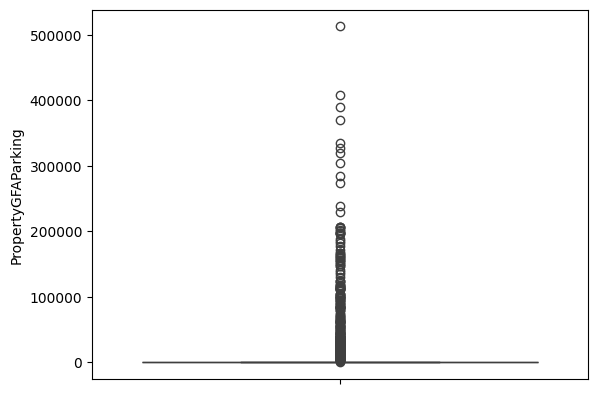

In [54]:
print(data_wod['PropertyGFAParking'].describe())

sns.boxplot(data = data_wod.PropertyGFAParking)
#plt.yscale('log')
plt.show()

In [55]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['PropertyGFAParking'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: 0.0
Outliers upper bound: 0.0


In [56]:
data_wod

BuildingType PrimaryPropertyType  \
0         NonResidential               Hotel   
1         NonResidential               Hotel   
2         NonResidential               Hotel   
3         NonResidential               Hotel   
4         NonResidential               Hotel   
...                  ...                 ...   
3371  Nonresidential COS              Office   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
0                       7               DOWNTOWN  47.61220 -122.33799   
1                       7               DOWNTOWN  47.61317 -122.33393   
2                       7               DOWNTOWN  47.61393 -122.33810   
3                       7               DOWNTOWN  47.61412 -122.33664   
4                       7               DOWNTOWN  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3371                    2       GREATER DUWAMISH  47.56722 -122.31154   
3372                    2               DOWNTOWN  47.59625 -122.32283   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1       GREATER DUWAMISH  47.52832 -122.32431   
3375                    2       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3371       1990                1.0               1             12294   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3371                   0                   12294   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                         

In [57]:
data_wod['PropertyGFAParking'].unique()

array([     0,  15064, 196718,  62000,  37198,  19279,  61161,  57600,
        25200,  57000,  85000,  30586,  30301,  38281,  16200, 205970,
        10043, 146694,  42546,  34735,  28200,  36744,  44891,  20732,
         9341,  44766,   2352, 303707,  25930,  36934,  35752,  13820,
        14200,  68432, 111625,  30000,  54341, 327680,  14567,  31874,
       335109,   8161,  39000,  38800,  26731,  18504,  21790, 205076,
         7757,  32334, 228668, 154972, 141600,  84600, 129432,   1392,
        62993, 197231,  25920, 162604,  23775, 368980, 164420, 171500,
       159600,  30660,  52703,   8296,  44248,  82720,  64660, 195621,
       118744, 116721,  38700, 124216,  83591,  48512,  61986,  69710,
        70067, 285000, 512608,  13200,  59280, 134662,  86429, 166960,
       389860,  93204,  15140,  17500, 184776,  38000,  97400, 104000,
       407795, 177660, 104922,  29409,  38452,  38400,  44728,  33921,
       115228,  47656,  60960,  28800,  66234, 111793,  52582,  98700,
      

In [58]:
data_wod['PropertyGFAParking'].value_counts().to_frame()

count
PropertyGFAParking       
0                    1296
13320                   3
25800                   2
30000                   2
100176                  2
...                   ...
115228                  1
33921                   1
44728                   1
38400                   1
85028                   1

[318 rows x 1 columns]

A lot of properties don't have parking areas, out of 1620 properties, 1296 don't have a parking area. That's 80%. This explains the results when trying to get the column statistical description.

In [59]:
data_wod.loc[data_wod['PropertyGFAParking'] > 0, 
['BuildingType','PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors',
 'PropertyGFAParking']].sort_values(by = 'PropertyGFAParking',ascending = False).head(30)

BuildingType          PrimaryPropertyType  \
273       NonResidential                 Large Office   
307       NonResidential               Medical Office   
292       NonResidential                 Large Office   
229       NonResidential                 Large Office   
163       NonResidential                        Other   
155       NonResidential                        Other   
559       NonResidential                 Large Office   
77        NonResidential                 Large Office   
271       NonResidential                 Large Office   
599       NonResidential                        Other   
3233      NonResidential                        Other   
212       NonResidential                 Large Office   
338       NonResidential                 Large Office   
492       NonResidential               Medical Office   
43        NonResidential                        Hotel   
207       NonResidential                 Large Office   
2530      NonResidential           Mixed Use Property   
577       NonResidential                 Large Office   
3329  Nonresidential COS                 Large Office   
225       NonResidential                 Large Office   
509       NonResidential                        Other   
2         NonResidential                        Hotel   
246       NonResidential           Mixed Use Property   
356       NonResidential  Supermarket / Grocery Store   
297       NonResidential                 Large Office   
379       NonResidential                        Other   
308       NonResidential           Mixed Use Property   
231       NonResidential                 Large Office   
291       NonResidential                        Other   
3324      NonResidential                 Large Office   

                           PropertyName                            Address  \
273                      US Bank Centre                    1420 5th Avenue   
307                  1101 Madison Tower                       1101 Madison   
292                    Two Union Square                      601 Union St.   
229                        Safeco Plaza                 1001 Fourth Avenue   
163                          Building 1              316 NE Thornton Place   
155                         CenturyLink          800 Occidental Ave. South   
559              Columbia Center - 2015                     701 5th Avenue   
77    Bill and Melinda Gates Foundation                      500 5th Ave N   
271                   1201 Third Avenue                       1201 3rd ave   
599                          NORTH BLDG                2670 NE 49th Street   
3233                              SOUTH                    2623 NE 46th St   
212                            West 8th                  2001 - 8th Avenue   
338                     Arnold Building              1100 Fairview Ave No.   
492    Elmer J. Nordstrom Medical Tower                1229 madison Street   
43                 Seattle Hilton Hotel                     1301 Sixth Ave   
207                    1700 Seventh Ave                       1700 Seventh   
2530    2201 / Enso Condominiums - SEDO  2201 9th Ave. / 820 Blanchard St.   
577                    800 Fifth Avenue                        800 5th Ave   
3329           400 FAIRVIEW OFFICE BLDG                 400 FAIRVIEW AVE N   
225                      2nd and Seneca                    1191 2nd Avenue   
509                        2323 Elliott                2323 Elliott Avenue   
2               5673-The Westin Seattle                    1900 5th Avenue   
246     METROPOLITAN PARK NORTH (ID371)                     1220 HOWELL ST   
356                  70100179-Lake City             13000 Lake City Way NE   
297     World Trade Center East-Seattle                   2211 Elliott Ave   
379                    Ballard Blocks I                    1416 NW 46th ST   
308        Fisher Plaza - East Building                      140 4th Ave N   
231                    901 Fifth Avenue                   90

Buildings with gross floor area parking are usually large offices, hotels, or buildings with a high number of floors it makes sense that those building have large parking areas.

## 4.6 PropertyGFABuilding(s)

Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc. 

count    1.620000e+03
mean     1.008296e+05
std      1.741952e+05
min      1.092500e+04
25%      2.841800e+04
50%      4.725100e+04
75%      9.455325e+04
max      2.200000e+06
Name: PropertyGFABuilding(s), dtype: float64


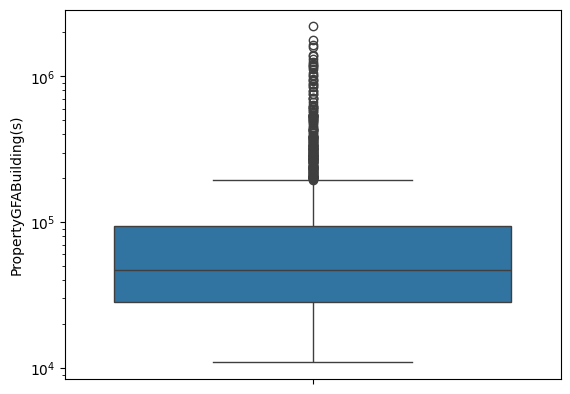

In [60]:
print(data_wod['PropertyGFABuilding(s)'].describe())

sns.boxplot(data = data_wod['PropertyGFABuilding(s)'])
plt.yscale('log')
plt.show()

In [61]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['PropertyGFABuilding(s)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -70784.875
Outliers upper bound: 193756.125


No outliers below 0.

In [62]:
data_wod.loc[data_wod['PropertyGFABuilding(s)'] > 193756,
['BuildingType','PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors',
 'PropertyGFABuilding(s)']].sort_values(by = 'PropertyGFABuilding(s)').tail(30)

BuildingType PrimaryPropertyType  \
205       NonResidential        Retail Store   
2835      NonResidential        Large Office   
36        NonResidential           Warehouse   
229       NonResidential        Large Office   
2         NonResidential               Hotel   
206       NonResidential        Large Office   
293       NonResidential        Large Office   
49        NonResidential               Hotel   
302       NonResidential        Retail Store   
124       NonResidential            Hospital   
230       NonResidential        Large Office   
166       NonResidential               Hotel   
564       NonResidential               Other   
2314      NonResidential  Mixed Use Property   
2530      NonResidential  Mixed Use Property   
273       NonResidential        Large Office   
577       NonResidential        Large Office   
271       NonResidential        Large Office   
170       NonResidential            Hospital   
158       NonResidential               Other   
233   Nonresidential COS        Large Office   
292       NonResidential        Large Office   
155       NonResidential               Other   
221       NonResidential        Large Office   
477       NonResidential        Large Office   
304       NonResidential               Other   
490       NonResidential        Large Office   
559       NonResidential        Large Office   
618       NonResidential            Hospital   
1494              Campus          University   

                                 PropertyName  \
205                             Nordstrom 001   
2835           719 2nd Ave (Millennium Tower)   
36                              Seattle 11-13   
229                              Safeco Plaza   
2                     5673-The Westin Seattle   
206                              1600 Seventh   
293                          One Union Square   
49                     Sheraton Seattle Hotel   
302                   (71367A) SEATTLE Macy's   
124   Seattle Children's Hospital Main Campus   
230                          Fourth & Madison   
166                       Grand Hyatt Seattle   
564                             Pacific Place   
2314                                  Olive 8   
2530          2201 / Enso Condominiums - SEDO   
273                            US Bank Centre   
577                          800 Fifth Avenue   
271                         1201 Third Avenue   
170                 Harborview Medical Center   
158                              Safeco Field   
233            Seattle Municipal Tower (2030)   
292                          Two Union Square   
155                               CenturyLink   
221                          999 Third Avenue   
477                          Starbucks Center   
304        Washington State Convention Center   
490                Russell Investments Center   
559                    Columbia Center - 2015   
618                        Swedish First Hill   
1494                            Entire Campus   

                                Address  NumberofBuildings  NumberofFloors  \
205                     500 Pine Street                1.0              10   
2835                        719 2nd Ave                1.0               6   
36                    3301 S NORFOLK ST                3.0               2   
229                  1001 Fourth Avenue                1.0              49   
2                       1900 5th Avenue                1.0              41   
206                        1600 7th Ave                1.0              33   
293               600 University Street                1.0              36   
49                      1400 6th Avenue                1.0              34   
302                     300 PINE STREET                1.0               8   
124              4800 Sand Point Way NE                6.0              10   
230                   925 Fourth Avenue                1.0              37   
166                         721 Pine St                1.0         

Buildings with a high PropertyGFABuildings are the same ones than the ones with PropertyGFATotal which is not a suprise. 
These outliers will be kept because they reflect the reality of large building with a high number of floors.

## 4.7 LargestPropertyUseTypeGFA & SecondLargestPropertyUseTypeGFA & ThirdLargestPropertyUseTypeGFA

Largest property use type define the main use of the building, second largest, the second mains use and so on... 

The associated GFA gives information about the gross floor area (GFA) for largest,second and third property use type.

In [63]:
data_wod[['LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType',
          'ThirdLargestPropertyUseTypeGFA']]

LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756493.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
3371                 Office                    12294.0   
3372     Other - Recreation                    16000.0   
3373     Other - Recreation                     7583.0   
3374     Other - Recreation                     6601.0   
3375     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                                NaN                              NaN   
1                            Parking                          15064.0   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                            Parking                          68009.0   
...                              ...                              ...   
3371                             NaN                              NaN   
3372                             NaN                              NaN   
3373  Fitness Center/Health Club/Gym                           5574.0   
3374  Fitness Center/Health Club/Gym                           6501.0   
3375  Fitness Center/Health Club/Gym                           8000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  
0                            NaN                             NaN  
1                     Restaurant                          4622.0  
2                            NaN                             NaN  
3                            NaN                             NaN  
4                  Swimming Pool                             0.0  
...                          ...                             ...  
3371                         NaN                             NaN  
3372                         NaN                             NaN  
3373               Swimming Pool                             0.0  
3374          Pre-school/Daycare                           484.0  
3375          Pre-school/Daycare                          1108.0  

[1620 rows x 6 columns]

Some buildings only have one peroperty use tupe, while others have second and third use types. 

To keep this information while deleting null values, I will turn null values into 0.

In [64]:
data_wod

BuildingType PrimaryPropertyType  \
0         NonResidential               Hotel   
1         NonResidential               Hotel   
2         NonResidential               Hotel   
3         NonResidential               Hotel   
4         NonResidential               Hotel   
...                  ...                 ...   
3371  Nonresidential COS              Office   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
0                       7               DOWNTOWN  47.61220 -122.33799   
1                       7               DOWNTOWN  47.61317 -122.33393   
2                       7               DOWNTOWN  47.61393 -122.33810   
3                       7               DOWNTOWN  47.61412 -122.33664   
4                       7               DOWNTOWN  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3371                    2       GREATER DUWAMISH  47.56722 -122.31154   
3372                    2               DOWNTOWN  47.59625 -122.32283   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1       GREATER DUWAMISH  47.52832 -122.32431   
3375                    2       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3371       1990                1.0               1             12294   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3371                   0                   12294   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                         

### 4.7.1 LargestPropertyUseTypeGFA

count    1.616000e+03
mean     9.327221e+04
std      1.602753e+05
min      5.656000e+03
25%      2.551575e+04
50%      4.352550e+04
75%      9.156025e+04
max      1.719643e+06
Name: LargestPropertyUseTypeGFA, dtype: float64


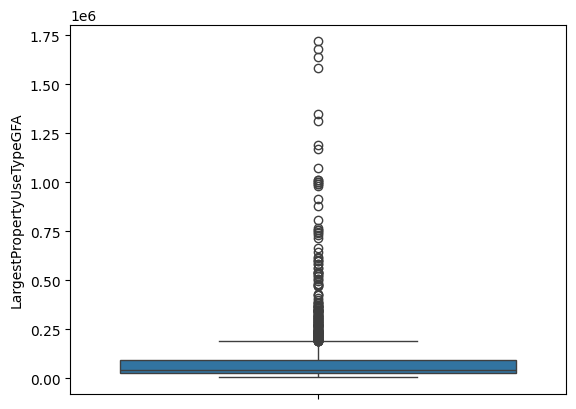

In [65]:
print(data_wod['LargestPropertyUseTypeGFA'].describe())

sns.boxplot(data = data_wod.LargestPropertyUseTypeGFA)
#plt.yscale('log')
plt.show()

In [66]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['LargestPropertyUseTypeGFA'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -73551.0
Outliers upper bound: 190627.0


No values below 0 for LargestPropertyUseTypeGFA

In [67]:
data_wod.loc[data_wod['LargestPropertyUseTypeGFA'] > 190627, ['BuildingType','PrimaryPropertyType','PropertyName','Address'
                                                              ,'LargestPropertyUseType','LargestPropertyUseTypeGFA'
                                                              ,'NumberofBuildings','NumberofFloors']].sort_values(by = 'LargestPropertyUseTypeGFA', ascending = False)

BuildingType PrimaryPropertyType               PropertyName  \
1494          Campus          University              Entire Campus   
559   NonResidential        Large Office     Columbia Center - 2015   
618   NonResidential            Hospital         Swedish First Hill   
155   NonResidential               Other                CenturyLink   
170   NonResidential            Hospital  Harborview Medical Center   
...              ...                 ...                        ...   
448   NonResidential        Large Office     411 1ST AVE  S (ID608)   
263   NonResidential        Retail Store    RAINIER ELECTRONICS LLC   
251   NonResidential        Large Office               5th and Bell   
3235  NonResidential        Large Office   Home Plate Center Bldg B   
96    NonResidential               Hotel               Alexis Hotel   

                        Address                 LargestPropertyUseType  \
1494            901 12th Avenue                     College/University   
559              701 5th Avenue                                 Office   
618                747 Broadway  Hospital (General Medical & Surgical)   
155   800 Occidental Ave. South  Other - Entertainment/Public Assembly   
170                325 9th Ave.  Hospital (General Medical & Surgical)   
...                         ...                                    ...   
448               411 1ST AVE S                                 Office   
263        2700 RAINIER AVE. S.                           Retail Store   
251                2301 5th Ave                                 Office   
3235             1521 1ST AVE S                                 Office   
96              1007 First Ave.                                  Hotel   

      LargestPropertyUseTypeGFA  NumberofBuildings  NumberofFloors  
1494                  1719643.0                1.0               2  
559                   1680937.0                1.0              76  
618                   1639334.0                7.0              14  
155                   1585960.0                1.0               6  
170                   1350182.0                9.0               8  
...                         ...                ...             ...  
448                    193154.0                5.0               7  
263                    191940.0                1.0               2  
251                    191814.0                1.0               6  
3235                   191333.0                1.0               7  
96                     190980.0                1.0               5  

[170 rows x 8 columns]

A lot of building are above 190627, however, four of them have values that are way above other buildings, I will delete these buildings since they are not representative of the majority and they might skew the models' performances

In [68]:
#Checking that there are no other "Entire Campus"
data_wod.loc[data_wod['PropertyName'] == 'Entire Campus']

BuildingType PrimaryPropertyType   PropertyName          Address  \
1494       Campus          University  Entire Campus  901 12th Avenue   

      ZipCode  CouncilDistrictCode Neighborhood  Latitude  Longitude  \
1494  98122.0                    3         EAST  47.61065 -122.31711   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
1494       1939                1.0               2           2200000   

      PropertyGFAParking  PropertyGFABuilding(s)    ListOfAllPropertyUseTypes  \
1494                   0                 2200000  College/University, Parking   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
1494     College/University                  1719643.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
1494                      Parking                         318960.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
1494                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
1494                      NaN              NaN         66.699997   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
1494           71.599998               145.0            151.300003   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
1494          114648520.0            123205560.0             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
1494        18075270.0         61672821.0         529756.9375   

      NaturalGas(kBtu) ComplianceStatus Outlier  TotalGHGEmissions  \
1494        52975694.0        Compliant     NaN            3243.48   

      GHGEmissionsIntensity  
1494                   1.47

In [69]:
#Deleting the 4 rows
data_wod = data_wod.loc[data_wod['PropertyName'] != 'Entire Campus']
data_wod = data_wod.loc[data_wod['PropertyName'] != 'Columbia Center - 2015']
data_wod = data_wod.loc[data_wod['PropertyName'] != 'Swedish First Hill']
data_wod = data_wod.loc[data_wod['PropertyName'] != 'CenturyLink']

In [70]:
data_wod

BuildingType PrimaryPropertyType  \
0         NonResidential               Hotel   
1         NonResidential               Hotel   
2         NonResidential               Hotel   
3         NonResidential               Hotel   
4         NonResidential               Hotel   
...                  ...                 ...   
3371  Nonresidential COS              Office   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
0                       7               DOWNTOWN  47.61220 -122.33799   
1                       7               DOWNTOWN  47.61317 -122.33393   
2                       7               DOWNTOWN  47.61393 -122.33810   
3                       7               DOWNTOWN  47.61412 -122.33664   
4                       7               DOWNTOWN  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3371                    2       GREATER DUWAMISH  47.56722 -122.31154   
3372                    2               DOWNTOWN  47.59625 -122.32283   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1       GREATER DUWAMISH  47.52832 -122.32431   
3375                    2       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3371       1990                1.0               1             12294   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3371                   0                   12294   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                         

### 4.7.2 SecondLargestPropertyUseTypeGFA

count       832.000000
mean      36177.764780
std       67857.334806
min           0.000000
25%        5406.000000
50%       12062.500000
75%       31935.750000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64


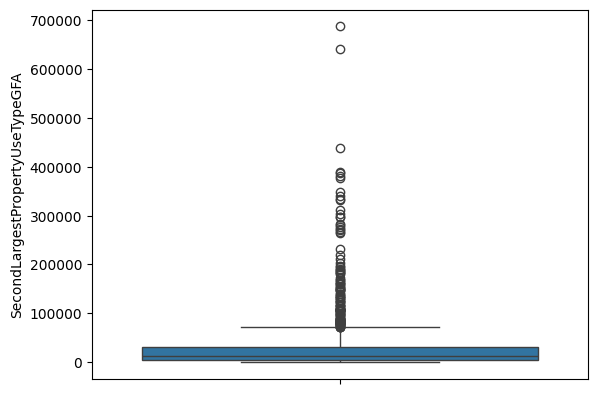

In [71]:
print(data_wod['SecondLargestPropertyUseTypeGFA'].describe())

sns.boxplot(data = data_wod.SecondLargestPropertyUseTypeGFA)
#plt.yscale('log')
plt.show()

In [72]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['SecondLargestPropertyUseTypeGFA'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -34388.625
Outliers upper bound: 71730.375


No values below 0 for SecondLargestPropertyUseTypeGFA

In [73]:
data_wod.loc[data_wod['SecondLargestPropertyUseTypeGFA'] > 71730.375, ['PrimaryPropertyType','PropertyName','LargestPropertyUseType',
                                                                    'SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA'
                                                                    ,'NumberofBuildings','NumberofFloors']].sort_values(by ='SecondLargestPropertyUseTypeGFA', ascending = False).head(30)

PrimaryPropertyType                        PropertyName  \
304                Other  Washington State Convention Center   
35    Mixed Use Property                        Plant 2 Site   
166                Hotel                 Grand Hyatt Seattle   
292         Large Office                    Two Union Square   
170             Hospital           Harborview Medical Center   
302         Retail Store             (71367A) SEATTLE Macy's   
273         Large Office                      US Bank Centre   
490         Large Office          Russell Investments Center   
488   Mixed Use Property                2200 Westlake - SEDO   
3124               Other      CenturyLink Field Event Center   
205         Retail Store                       Nordstrom 001   
72          Large Office                City Place IV - SEDO   
2314  Mixed Use Property                             Olive 8   
602                Other                     Northgate North   
577         Large Office                    800 Fifth Avenue   
1690      Medical Office                      Central Campus   
477         Large Office                    Starbucks Center   
36             Warehouse                       Seattle 11-13   
221         Large Office                    999 Third Avenue   
307       Medical Office                  1101 Madison Tower   
1672            Hospital           Main Hospital - All Wings   
271         Large Office                   1201 Third Avenue   
229         Large Office                        Safeco Plaza   
207         Large Office                    1700 Seventh Ave   
558                Other                      WestinBuilding   
3329        Large Office            400 FAIRVIEW OFFICE BLDG   
260         Large Office                   Puget Sound Plaza   
225         Large Office                      2nd and Seneca   
212         Large Office                            West 8th   
231         Large Office                    901 Fifth Avenue   

                     LargestPropertyUseType  \
304                       Convention Center   
35                                   Office   
166                                   Hotel   
292                                  Office   
170   Hospital (General Medical & Surgical)   
302                            Retail Store   
273                                  Office   
490                                  Office   
488                                 Parking   
3124                                Parking   
205                            Retail Store   
72                                   Office   
2314                    Multifamily Housing   
602                                 Parking   
577                                  Office   
1690                         Medical Office   
477                                  Office   
36               Non-Refrigerated Warehouse   
221                                  Office   
307                          Medical Office   
1672  Hospital (General Medical & Surgical)   
271                                  Office   
229                                  Office   
207                                  Office   
558                             Data Center   
3329                                 Office   
260                                  Office   
225                                  Office   
212                                  Office   
231                                  Office   

               SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
304                                 Parking                         686750.0   
35                               Laboratory                         639931.0   
166                                 Parking                         438756.0   
292                                 Parking                         389860.0   
170                                 Parking                         387651.0   
302                                   Other                         380639.0   
27

A lot of building are above 71730.375, however, two of them have values that are way above other buildings, I will delete these buildings since they are not representative of the majority and they might skew the models' performances

In [74]:
data_wod = data_wod.loc[data_wod['PropertyName'] != 'Washington State Convention Center']
data_wod = data_wod.loc[data_wod['PropertyName'] != 'Plant 2 Site']

In [75]:
data_wod

BuildingType PrimaryPropertyType  \
0         NonResidential               Hotel   
1         NonResidential               Hotel   
2         NonResidential               Hotel   
3         NonResidential               Hotel   
4         NonResidential               Hotel   
...                  ...                 ...   
3371  Nonresidential COS              Office   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
0                       7               DOWNTOWN  47.61220 -122.33799   
1                       7               DOWNTOWN  47.61317 -122.33393   
2                       7               DOWNTOWN  47.61393 -122.33810   
3                       7               DOWNTOWN  47.61412 -122.33664   
4                       7               DOWNTOWN  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3371                    2       GREATER DUWAMISH  47.56722 -122.31154   
3372                    2               DOWNTOWN  47.59625 -122.32283   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1       GREATER DUWAMISH  47.52832 -122.32431   
3375                    2       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3371       1990                1.0               1             12294   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3371                   0                   12294   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                         

### 4.7.3 ThirdLargestPropertyUseTypeGFA

count       345.000000
mean      13833.821445
std       28396.525931
min           0.000000
25%        2663.000000
50%        6000.000000
75%       13039.000000
max      303910.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64


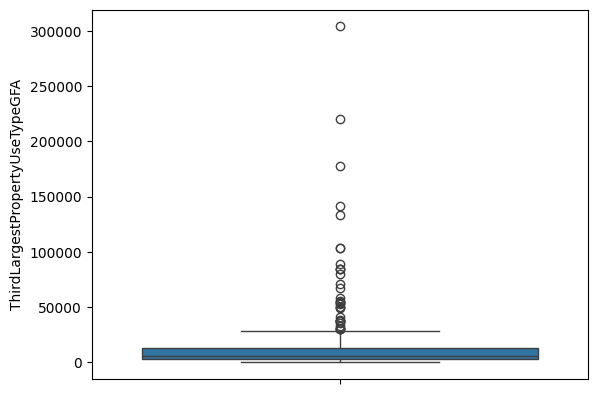

In [76]:
print(data_wod['ThirdLargestPropertyUseTypeGFA'].describe())

sns.boxplot(data = data_wod.ThirdLargestPropertyUseTypeGFA)
#plt.yscale('log')
plt.show()

In [77]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['ThirdLargestPropertyUseTypeGFA'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -12901.0
Outliers upper bound: 28603.0


In [78]:
data_wod.loc[data_wod['ThirdLargestPropertyUseTypeGFA'] > 29101.375, ['PrimaryPropertyType','PropertyName','Address','LargestPropertyUseType'
                                                                    ,'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'
                                                                    ,'NumberofBuildings','NumberofFloors']].sort_values(by ='ThirdLargestPropertyUseTypeGFA', ascending = False).head(30)

PrimaryPropertyType                      PropertyName  \
490          Large Office        Russell Investments Center   
477          Large Office                  Starbucks Center   
2530   Mixed Use Property   2201 / Enso Condominiums - SEDO   
2314   Mixed Use Property                           Olive 8   
271          Large Office                 1201 Third Avenue   
230          Large Office                  Fourth & Madison   
301    Mixed Use Property        Securities Building Campus   
346    Mixed Use Property     UW Medicine Research Phase II   
410    Mixed Use Property                     Pacific Tower   
3356   Mixed Use Property                              AIBS   
429    Mixed Use Property                     1616 Eastlake   
564                 Other                     Pacific Place   
36              Warehouse                     Seattle 11-13   
488    Mixed Use Property              2200 Westlake - SEDO   
1328   Mixed Use Property                       Hyatt Place   
2398         Large Office                  Waterfront Place   
308    Mixed Use Property      Fisher Plaza - East Building   
1690       Medical Office                    Central Campus   
549    Mixed Use Property                     1100 Eastlake   
273          Large Office                    US Bank Centre   
632                 Other  Stanford Center Building (JSCEE)   
166                 Hotel               Grand Hyatt Seattle   
474    Mixed Use Property         Stadium Innovation Center   
3134   Mixed Use Property                   Broadway Market   
3199         Large Office                Market Place Tower   
246    Mixed Use Property   METROPOLITAN PARK NORTH (ID371)   
309    Mixed Use Property      Fisher Plaza - West Building   
221          Large Office                  999 Third Avenue   
341    Mixed Use Property               307 Westlake - SEDO   
603   Distribution Center      Portside Distribution Center   

                                Address      LargestPropertyUseType  \
490                        1301 2nd Ave                      Office   
477                 2401 Utah Ave South                      Office   
2530  2201 9th Ave. / 820 Blanchard St.                      Office   
2314                      737 Olive Way         Multifamily Housing   
271                        1201 3rd ave                      Office   
230                   925 Fourth Avenue                      Office   
301                   1904 Third Avenue                     Parking   
346               850 Republican Street                  Laboratory   
410              1200 12th Avenue South                      Office   
3356                601 Westlake Ave N.                  Laboratory   
429                1616 Eastlake Ave. E                     Parking   
564                     600 Pine Street                Other - Mall   
36                    3301 S NORFOLK ST  Non-Refrigerated Warehouse   
488                  2200 Westlake Ave.                     Parking   
1328                      110 6th Ave N                       Hotel   
2398                   1011 Western Ave                      Office   
308                       140 4th Ave N                     Parking   
1690                   201 16th Ave. E.              Medical Office   
549                   1100 Eastlake Ave                     Parking   
273                     1420 5th Avenue                      Office   
632                   2445  3RD  AVE  S                       Other   
166                         721 Pine St                       Hotel   
474                     1531 Utah Ave S                     Parking   
3134                     401 Broadway E                     Parking   
3199                    2025 1st Avenue                      Office   
246                      1220 HOWELL ST                     Parking   
309                       100 4th Ave N                     Parking   
221          999 3rd Avenue, Suite 1550                      Off

Only one outlier that might skew the model

In [79]:
data_wod = data_wod.loc[data_wod['PropertyName'] != 'Russell Investments Center']

In [80]:
data_wod

BuildingType PrimaryPropertyType  \
0         NonResidential               Hotel   
1         NonResidential               Hotel   
2         NonResidential               Hotel   
3         NonResidential               Hotel   
4         NonResidential               Hotel   
...                  ...                 ...   
3371  Nonresidential COS              Office   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
0                       7               DOWNTOWN  47.61220 -122.33799   
1                       7               DOWNTOWN  47.61317 -122.33393   
2                       7               DOWNTOWN  47.61393 -122.33810   
3                       7               DOWNTOWN  47.61412 -122.33664   
4                       7               DOWNTOWN  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3371                    2       GREATER DUWAMISH  47.56722 -122.31154   
3372                    2               DOWNTOWN  47.59625 -122.32283   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1       GREATER DUWAMISH  47.52832 -122.32431   
3375                    2       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3371       1990                1.0               1             12294   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3371                   0                   12294   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                         

## 4.8 YearsENERGYSTARCertified

Years the property has received ENERGY STAR certification. 

ENERGY STAR certified buildings save energy, save money, and help protect the environment by generating fewer greenhouse gas emissions than typical buildings. To be certified as ENERGY STAR, a building must meet strict energy performance standards set by EPA. Specifically, to be eligible for ENERGY STAR certification, a building must earn an ENERGY STAR score of 75 or higher on EPA’s 1 – 100 scale

This variable wiil not be studied to find out what to do with outliers, simply to see the amount of properties that have received the energy star certification for several years.

In [81]:
data_wod.shape

(1613, 39)

In [82]:
data_wod.YearsENERGYSTARCertified.isna().sum()

1517

Out of 1620 properties, 1522 have not been certified by energy stars.

In [83]:
pd.set_option('display.max_rows',None)
data_wod.loc[data_wod['YearsENERGYSTARCertified'].notna(), ['BuildingType','PrimaryPropertyType','YearsENERGYSTARCertified']]

BuildingType          PrimaryPropertyType  \
37     SPS-District K-12                  K-12 School   
44        NonResidential                 Large Office   
53        NonResidential                        Hotel   
116    SPS-District K-12                  K-12 School   
137    SPS-District K-12                  K-12 School   
204       NonResidential                 Large Office   
206       NonResidential                 Large Office   
207       NonResidential                 Large Office   
209       NonResidential                 Large Office   
211       NonResidential                 Large Office   
212       NonResidential                 Large Office   
214       NonResidential                 Large Office   
218       NonResidential                 Large Office   
219       NonResidential                 Large Office   
222       NonResidential                 Large Office   
224       NonResidential                 Large Office   
225       NonResidential                 Large Office   
227       NonResidential                 Large Office   
228       NonResidential                 Large Office   
229       NonResidential                 Large Office   
230       NonResidential                 Large Office   
231       NonResidential                 Large Office   
233   Nonresidential COS                 Large Office   
240       NonResidential                        Other   
242       NonResidential                 Large Office   
243       NonResidential                 Large Office   
245       NonResidential                 Large Office   
247       NonResidential                 Large Office   
251       NonResidential                 Large Office   
252       NonResidential                 Large Office   
253       NonResidential                 Large Office   
258       NonResidential                 Large Office   
260       NonResidential                 Large Office   
267       NonResidential                 Large Office   
270       NonResidential                 Large Office   
271       NonResidential                 Large Office   
273       NonResidential                 Large Office   
277       NonResidential                 Large Office   
292       NonResidential                 Large Office   
293       NonResidential                 Large Office   
295       NonResidential                 Large Office   
297       NonResidential                 Large Office   
307       NonResidential               Medical Office   
319       NonResidential                 Large Office   
323       NonResidential                 Large Office   
342       NonResidential                 Large Office   
343       NonResidential                 Large Office   
371       NonResidential                 Large Office   
372       NonResidential                 Large Office   
410       NonResidential           Mixed Use Property   
428       NonResidential                 Retail Store   
434       NonResidential  Small- and Mid-Sized Office   
449       NonResidential  Small- and Mid-Sized Office   
504       NonResidential                 Large Office   
507       NonResidential                 Large Office   
510       NonResidential  Small- and Mid-Sized Office   
521       NonResidential                 Large Office   
523       NonResidential                 Large Office   
524       NonResidential                 Large Office   
546       NonResidential                 Large Office   
548       NonResidential                 Large Office   
551       NonResidential                 Large Office   
552       NonResidential                 Large Office   
554       NonResidential                 Large Office   
555       NonResidential                 Large Office   
556       NonResidential                 Large Office   
560       NonResidential                 Large Office   
571       NonResidential                 Large Office   
577       NonResidential                 Large Office   
583       NonResidenti

In [84]:
pd.reset_option('display.max_rows')

It seems that most buildings that have been certified are offices. A few schools and grecery stores also obtained the certification.

## 4.9 ENERGYSTARScore

An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median while a score of 75 or higher indicates your building is a top performer—and may be eligible for ENERGY STAR certification.

count    1051.000000
mean       65.717412
std        28.291225
min         1.000000
25%        49.000000
50%        73.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64


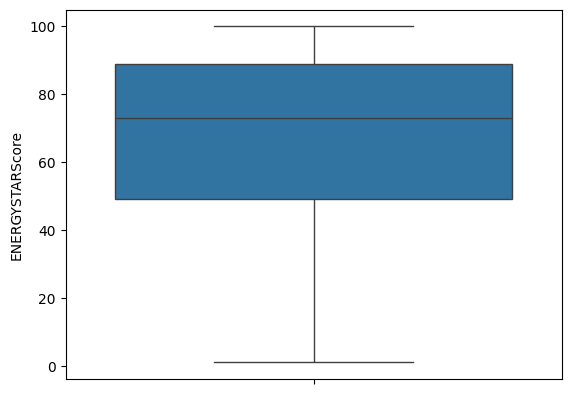

In [85]:
print(data_wod['ENERGYSTARScore'].describe())

sns.boxplot(data = data_wod['ENERGYSTARScore'])
#plt.yscale('log')
plt.show()

In [86]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['ENERGYSTARScore'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -11.0
Outliers upper bound: 149.0


No outliers

## 4.10 SiteEUI(kBtu/sf)

Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot

count    1613.000000
mean       71.862554
std        74.491105
min         0.000000
25%        33.599998
50%        51.400002
75%        80.599998
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64


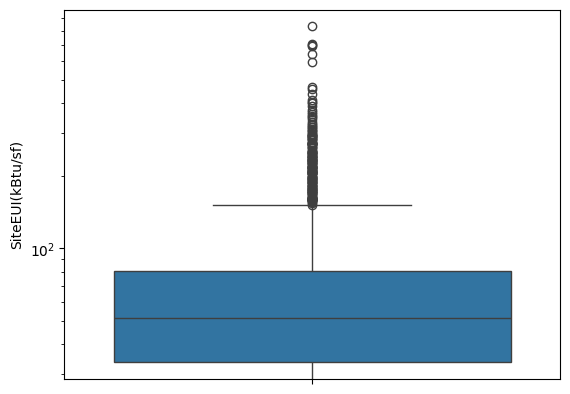

In [87]:
print(data_wod['SiteEUI(kBtu/sf)'].describe())

sns.boxplot(data = data_wod['SiteEUI(kBtu/sf)'])
plt.yscale('log')
plt.show()

In [88]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['SiteEUI(kBtu/sf)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -36.90000153
Outliers upper bound: 151.09999847


In [89]:
#Checking outliers above 151.
data_wod.loc[data_wod['SiteEUI(kBtu/sf)'] > 151,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors',
 'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFABuilding(s)','PropertyGFATotal']].sort_values(by = 'SiteEUI(kBtu/sf)').tail(30)

PrimaryPropertyType  \
226                  Large Office   
1522  Supermarket / Grocery Store   
1476  Supermarket / Grocery Store   
187                         Other   
1753                        Other   
517                  Large Office   
2522                        Other   
1519  Supermarket / Grocery Store   
2514  Supermarket / Grocery Store   
1563  Supermarket / Grocery Store   
2896  Supermarket / Grocery Store   
1033  Supermarket / Grocery Store   
1337                   Laboratory   
1279                        Other   
2380           Mixed Use Property   
474            Mixed Use Property   
550                    Laboratory   
329                         Other   
3365                        Other   
2109  Supermarket / Grocery Store   
2795  Supermarket / Grocery Store   
3373                        Other   
1817                   Restaurant   
601   Small- and Mid-Sized Office   
3171                        Other   
558                         Other   
3203                        Other   
809                    Laboratory   
309            Mixed Use Property   
240                         Other   

                                           PropertyName  \
226                          Second And Spring Building   
1522                           Safeway 1477 - Market St   
1476                             Safeway 0488 - 45th St   
187                                        1122 3rd Ave   
1753         Charles & Emma Frye Free Public Art Museum   
517                                401 Elliott Ave West   
2522                                Seattle Tennis Club   
1519                           BALLARD MARKET (ID22230)   
2514                           Safeway 1551 - E John St   
1563                               70500811 -- Interbay   
2896                       Safeway 1550 - Roosevelt Way   
1033                          Safeway 0368 - Queen Anne   
1337                                    410 W. Harrison   
1279                                       space needle   
2380                             Chandler's Cove - SEDO   
474                           Stadium Innovation Center   
550   Dendreon Pharmaceuticals Inc. (Building Owner ...   
329   VM Seattle Hospital & Medical Center - Buck Pa...   
3365                                       Ballard Pool   
2109                                Metropolitan Market   
2795                                            Admiral   
3373                                    Queen Anne Pool   
1817                   Salty's Waterfront Seafood Grill   
601                                     200 SW Michigan   
3171                   Seattle ProCure Management, LLC.   
558                                      WestinBuilding   
3203                       2020 Fifth Avenue Dat Center   
809                                   3000/3018 Western   
309                        Fisher Plaza - West Building   
240                                UW Tower Data Center   

                        Address  NumberofBuildings  NumberofFloors  \
226          1100 Second Avenue                1.0               6   
1522          1423 NW Market St                1.0               1   
1476            3020 NE 45th St                1.0               1   
187                1122 3rd Ave                1.0              15   
1753              704 Terry Ave                1.0               1   
517         401 Elliot Ave West                1.0               4   
2522        922 McGilvra Blvd E                1.0               3   
1519            1400 NW 56th St                1.0               1   
2514             1410 E John St                1.0               1   
1563           1600 West Dravus                1.0               1   
2896      7300 Roosevelt Way NE                1.0               1   
1033      2100 Queen Anne Ave N                1.0               1   
1337        410 W. Harrison St.                1.0               2   
1279          400 broard street                1.0      

The calculation for the SiteEUI(kBtu/sf) should be SiteEnergyUseWN(kBtu)/ PropertyGFATotal, or SiteEnergyUseWN(kBtu)/ PropertyGFABuilding(s).
But for most buildings, this calculation doesn't work.

In [90]:
temp = data_wod[['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors',
                 'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFABuilding(s)','PropertyGFATotal']]

In [91]:
temp['EnerUse_GFABuildings'] = (temp['SiteEnergyUse(kBtu)'] / temp['PropertyGFABuilding(s)'])
temp['EnerUse_TotalGFA'] = (temp['SiteEnergyUse(kBtu)'] / temp['PropertyGFATotal'])

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/2480651419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['EnerUse_GFABuildings'] = (temp['SiteEnergyUse(kBtu)'] / temp['PropertyGFABuilding(s)'])
/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/2480651419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['EnerUse_TotalGFA'] = (temp['SiteEnergyUse(kBtu)'] / temp['PropertyGFATotal'])


In [92]:
temp.sample(35)

PrimaryPropertyType                           PropertyName  \
1953        Self-Storage Facility                 OLD LIQUID CARBONIC CO   
1582          Distribution Center                           property #50   
2185  Small- and Mid-Sized Office                                    820   
183                   K-12 School           Thurgood Marshall Elementary   
1577        Self-Storage Facility                   A1 Self Storage, LLC   
497                  Large Office                        Colman Building   
3367                        Other                    Conservatory Campus   
3319                        Hotel              Hilton Garden Inn Seattle   
2314           Mixed Use Property                                Olive 8   
1234  Small- and Mid-Sized Office                       Fourth and Union   
591   Small- and Mid-Sized Office  McKinstry SEA - 5005 3rd Ave S Office   
2231  Small- and Mid-Sized Office                                    RCC   
1347                  K-12 School            Hazel Wolf K-8 at Pinehurst   
384                  Retail Store                      University Center   
1666                        Other                                Laidlaw   
359                     Warehouse                  Skyline-East Marginal   
1262  Small- and Mid-Sized Office               System Operations Center   
2325                   University                5th Avenue Master Meter   
635                  Retail Store               Georgetown Center Bldg B   
8                           Hotel                   311wh-Pioneer Square   
2998           Mixed Use Property                          905 E Pike St   
630                   K-12 School                      Leschi Elementary   
1124                    Warehouse                        NWCP-SEA Bldg E   
1621  Small- and Mid-Sized Office          Fishermen's Commerce Building   
471                  Large Office              83 S KING ST BLDG (ID633)   
2785                  K-12 School                            First Place   
170                      Hospital              Harborview Medical Center   
2667  Small- and Mid-Sized Office               4701 University Way Bldg   
324   Small- and Mid-Sized Office              Northgate Office Building   
326                  Large Office                            425 Pontius   
2742                  K-12 School                  Green Lake Elementary   
1766                    Warehouse                      Daily Racing Form   
2804  Small- and Mid-Sized Office         Pacific Georgetown Center, LLC   
1537                        Other                 Ballard Masonic Center   
488            Mixed Use Property                   2200 Westlake - SEDO   

                           Address  NumberofBuildings  NumberofFloors  \
1953           5021 COLORADO AVE S                1.0               1   
1582  1200-1210 West Nickerson st.                1.0               2   
2185                 820 1st Ave S                1.0               2   
183             2401 S. Irving St.                1.0               2   
1577            2648 15th Ave West                1.0               3   
497    811 First Avenue, Suite 350                1.0               6   
3367               1400 E Galer St                1.0               1   
3319                1821 Boren Ave                1.0              14   
2314                 737 Olive Way                1.0              39   
1234               1404 Fourth Ave                1.0               4   
591             5005 3rd Avenue S.                1.0               1   
2231                100 23RD AVE S                1.0               2   
1347          11530 12th Ave. N.E.                1.0               1   
384          4501 Roosevelt Way NE                1.0               2   
1666             7739 1st Avenue S                1.0               1   
359          4401 E Marginal Way S                1.0               1   
1262                614 NW 46th St  

Buildings with different values in GFA Buildings and TotalGFA seem to have a SiteEUI(kBtu/sf) closer to the result of SiteEnergyUseWN(kBtu)/ PropertyGFABuilding(s). 

But most of them don't have the expected value in SiteEUI(kBtu/sf)

In [93]:
#Checking the SiteEUI(kBtu/sf) results of the highest SiteEUI(kBtu/sf)
temp.loc[temp['SiteEUI(kBtu/sf)'] > 151, ['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','SiteEUI(kBtu/sf)'
                                          ,'EnerUse_GFABuildings']].sort_values(by = 'SiteEUI(kBtu/sf)').tail(30)

PrimaryPropertyType  \
226                  Large Office   
1522  Supermarket / Grocery Store   
1476  Supermarket / Grocery Store   
187                         Other   
1753                        Other   
517                  Large Office   
2522                        Other   
1519  Supermarket / Grocery Store   
2514  Supermarket / Grocery Store   
1563  Supermarket / Grocery Store   
2896  Supermarket / Grocery Store   
1033  Supermarket / Grocery Store   
1337                   Laboratory   
1279                        Other   
2380           Mixed Use Property   
474            Mixed Use Property   
550                    Laboratory   
329                         Other   
3365                        Other   
2109  Supermarket / Grocery Store   
2795  Supermarket / Grocery Store   
3373                        Other   
1817                   Restaurant   
601   Small- and Mid-Sized Office   
3171                        Other   
558                         Other   
3203                        Other   
809                    Laboratory   
309            Mixed Use Property   
240                         Other   

                                           PropertyName  \
226                          Second And Spring Building   
1522                           Safeway 1477 - Market St   
1476                             Safeway 0488 - 45th St   
187                                        1122 3rd Ave   
1753         Charles & Emma Frye Free Public Art Museum   
517                                401 Elliott Ave West   
2522                                Seattle Tennis Club   
1519                           BALLARD MARKET (ID22230)   
2514                           Safeway 1551 - E John St   
1563                               70500811 -- Interbay   
2896                       Safeway 1550 - Roosevelt Way   
1033                          Safeway 0368 - Queen Anne   
1337                                    410 W. Harrison   
1279                                       space needle   
2380                             Chandler's Cove - SEDO   
474                           Stadium Innovation Center   
550   Dendreon Pharmaceuticals Inc. (Building Owner ...   
329   VM Seattle Hospital & Medical Center - Buck Pa...   
3365                                       Ballard Pool   
2109                                Metropolitan Market   
2795                                            Admiral   
3373                                    Queen Anne Pool   
1817                   Salty's Waterfront Seafood Grill   
601                                     200 SW Michigan   
3171                   Seattle ProCure Management, LLC.   
558                                      WestinBuilding   
3203                       2020 Fifth Avenue Dat Center   
809                                   3000/3018 Western   
309                        Fisher Plaza - West Building   
240                                UW Tower Data Center   

                        Address  NumberofBuildings  NumberofFloors  \
226          1100 Second Avenue                1.0               6   
1522          1423 NW Market St                1.0               1   
1476            3020 NE 45th St                1.0               1   
187                1122 3rd Ave                1.0              15   
1753              704 Terry Ave                1.0               1   
517         401 Elliot Ave West                1.0               4   
2522        922 McGilvra Blvd E                1.0               3   
1519            1400 NW 56th St                1.0               1   
2514             1410 E John St                1.0               1   
1563           1600 West Dravus                1.0               1   
2896      7300 Roosevelt Way NE                1.0               1   
1033      2100 Queen Anne Ave N                1.0               1   
1337        410 W. Harrison St.                1.0               2   
1279          400 broard street                1.0      

Although some SiteEUI(kBtu/sf) values are not the exact result of the expected division, they are quite close

These outliers will be kept since they accurately refelect the building's consumption of energy.

## 4.11 Weather normalised variables

Weather normalised variables will not be used in this analysis, for each building they indicate what the variable's value would be during 30-year average weather conditions.

### 4.11.1 Weather normalised variables treatments

In [94]:
data_wod = data_wod.drop(columns = ['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'])

## 4.12 SourceEUI(kBtu/sf)

Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

count    1613.000000
mean      176.053131
std       188.054703
min         0.000000
25%        76.099998
50%       130.600006
75%       202.500000
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64


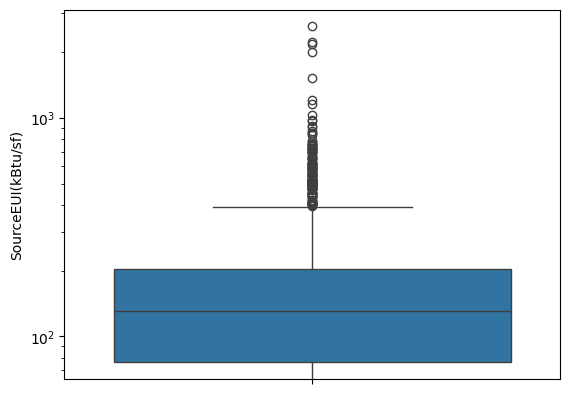

In [95]:
print(data_wod['SourceEUI(kBtu/sf)'].describe())

sns.boxplot(data = data_wod['SourceEUI(kBtu/sf)'])
plt.yscale('log')
plt.show()

In [96]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['SourceEUI(kBtu/sf)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -113.500003825
Outliers upper bound: 392.10000229499997


No values under 0

In [97]:
#Checking outliers above 392
data_wod.loc[data_wod['SourceEUI(kBtu/sf)'] > 392,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','SourceEUI(kBtu/sf)']].sort_values(by = 'SourceEUI(kBtu/sf)').tail(30)

PrimaryPropertyType  \
1563  Supermarket / Grocery Store   
3158                 Large Office   
601   Small- and Mid-Sized Office   
516                  Large Office   
2514  Supermarket / Grocery Store   
2668  Supermarket / Grocery Store   
3373                        Other   
1279                        Other   
1033  Supermarket / Grocery Store   
550                    Laboratory   
1476  Supermarket / Grocery Store   
2896  Supermarket / Grocery Store   
1519  Supermarket / Grocery Store   
3160  Supermarket / Grocery Store   
1817                   Restaurant   
2795  Supermarket / Grocery Store   
641                  Large Office   
308            Mixed Use Property   
226                  Large Office   
2109  Supermarket / Grocery Store   
187                         Other   
517                  Large Office   
329                         Other   
474            Mixed Use Property   
809                    Laboratory   
3171                        Other   
558                         Other   
3203                        Other   
309            Mixed Use Property   
240                         Other   

                                           PropertyName  \
1563                               70500811 -- Interbay   
3158   Central Link Operations and Maintenance Facility   
601                                     200 SW Michigan   
516                                501 Elliott Ave West   
2514                           Safeway 1551 - E John St   
2668                        Safeway 3091 - Brooklyn Ave   
3373                                    Queen Anne Pool   
1279                                       space needle   
1033                          Safeway 0368 - Queen Anne   
550   Dendreon Pharmaceuticals Inc. (Building Owner ...   
1476                             Safeway 0488 - 45th St   
2896                       Safeway 1550 - Roosevelt Way   
1519                           BALLARD MARKET (ID22230)   
3160                             Safeway 1885 - 1st Ave   
1817                   Salty's Waterfront Seafood Grill   
2795                                            Admiral   
641                                   4545 Building 751   
308                        Fisher Plaza - East Building   
226                          Second And Spring Building   
2109                                Metropolitan Market   
187                                        1122 3rd Ave   
517                                401 Elliott Ave West   
329   VM Seattle Hospital & Medical Center - Buck Pa...   
474                           Stadium Innovation Center   
809                                   3000/3018 Western   
3171                   Seattle ProCure Management, LLC.   
558                                      WestinBuilding   
3203                       2020 Fifth Avenue Dat Center   
309                        Fisher Plaza - West Building   
240                                UW Tower Data Center   

                        Address  NumberofBuildings  NumberofFloors  \
1563           1600 West Dravus                1.0               1   
3158     3407 Airport Way South                1.0               4   
601             200 SW Michigan                1.0               3   
516         501 Elliot Ave West                1.0               4   
2514             1410 E John St                1.0               1   
2668       4732 Brooklyn Ave NE                1.0               1   
3373             1920 1st Ave W                1.0               1   
1279          400 broard street                1.0               2   
1033      2100 Queen Anne Ave N                1.0               1   
550   1208 Eastlake Avenue East                1.0               4   
1476            3020 NE 45th St                1.0               1   
2896      7300 Roosevelt Way NE                1.0               1   
1519            1400 NW 56th St                1.0               1   
3160              516 1st Ave W                1.0      

The UW tower, 2020 Fifth Avenue Dat Center and Fisher plaza are still the highest energy consumers. These buildings seem to have a high energy consumption due to energy loss.

These "outliers" will be kept since they accurately refelect the building's consumption of energy.

## 4.13 SiteEnergyUse(kBtu)

The annual amount of energy consumed by the property from all sources of energy.

count    1.613000e+03
mean     7.317576e+06
std      1.709669e+07
min      0.000000e+00
25%      1.215156e+06
50%      2.491238e+06
75%      6.794584e+06
max      2.930908e+08
Name: SiteEnergyUse(kBtu), dtype: float64


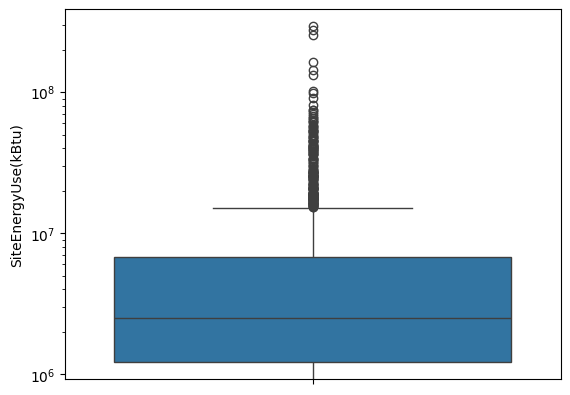

In [98]:
print(data_wod['SiteEnergyUse(kBtu)'].describe())

sns.boxplot(data = data_wod['SiteEnergyUse(kBtu)'])
plt.yscale('log')
plt.show()

In [99]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['SiteEnergyUse(kBtu)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -7153985.375
Outliers upper bound: 15163725.625


In [100]:
#Checking outliers above 15 321 367
data_wod.loc[data_wod['SiteEnergyUse(kBtu)'] > 15321367,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','SiteEnergyUse(kBtu)']].sort_values(by = 'SiteEnergyUse(kBtu)').tail(30)

PrimaryPropertyType                                       PropertyName  \
373   Mixed Use Property                                 Seattle Art Museum   
271         Large Office                                  1201 Third Avenue   
3156          Laboratory                    Reasearch and Training Building   
162         Large Office                                         South Park   
308   Mixed Use Property                       Fisher Plaza - East Building   
262                Hotel                           Fairmont Olympic Seattle   
273         Large Office                                     US Bank Centre   
3187            Hospital          Seattle Children's Hospital Building Hope   
158                Other                                       Safeco Field   
233         Large Office                     Seattle Municipal Tower (2030)   
329                Other  VM Seattle Hospital & Medical Center - Buck Pa...   
187                Other                                       1122 3rd Ave   
474   Mixed Use Property                          Stadium Innovation Center   
166                Hotel                                Grand Hyatt Seattle   
119                Other                          Jack R. McDonald Building   
98              Hospital                                    Swedish Ballard   
231         Large Office                                   901 Fifth Avenue   
2                  Hotel                            5673-The Westin Seattle   
477         Large Office                                   Starbucks Center   
309   Mixed Use Property                       Fisher Plaza - West Building   
49                 Hotel                             Sheraton Seattle Hotel   
2325          University                            5th Avenue Master Meter   
1672            Hospital                          Main Hospital - All Wings   
1690      Medical Office                                     Central Campus   
340                Other                        Weintraub/Hutchinson/Thomas   
167             Hospital                                Swedish Cherry Hill   
3264            Hospital               Virginia Mason Medical Center - 2149   
124             Hospital            Seattle Children's Hospital Main Campus   
558                Other                                     WestinBuilding   
170             Hospital                          Harborview Medical Center   

                              Address  NumberofBuildings  NumberofFloors  \
373                   1300 1st Avenue                1.0               6   
271                      1201 3rd ave                1.0              55   
3156                 300 Ninth Avenue                1.0               8   
162                    1420 S Trenton               14.0               2   
308                     140 4th Ave N                1.0               6   
262             411 University Street                1.0              12   
273                   1420 5th Avenue                1.0              46   
3187                 4500 40th Ave NE                1.0               8   
158           1250 First Avenue South                1.0               3   
233                  700 Fifth Avenue                1.0              63   
329                   1100 9th Avenue                1.0               8   
187                      1122 3rd Ave                1.0              15   
474                   1531 Utah Ave S                1.0               6   
166                       721 Pine St                1.0               0   
119                     1900 9th Ave.                1.0              11   
98                5300 Tallman Ave NW                4.0               5   
231                  901 Fifth Avenue                1.0              42   
2                     1900 5th Avenue                1.0              41   
477               2401 Utah Ave South                1.0               6   
309                     100 4th Ave

Building with the highest site energy use are not the same than buildings with the highest SiteEUI and the highest SourceEUI. 

This indicator is not devided by the building's gross floor area, so here we can see buildings with the highest energy consumption regardless of their sizes.

## 4.14 SteamUse(kBtu)

The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu)

count    1.613000e+03
mean     3.893576e+05
std      3.967046e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.225750e+08
Name: SteamUse(kBtu), dtype: float64


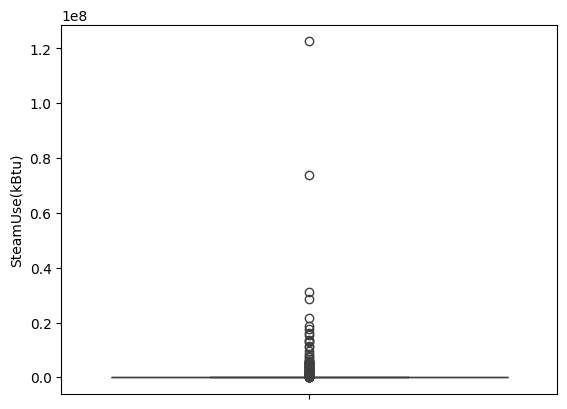

In [101]:
print(data_wod['SteamUse(kBtu)'].describe())

sns.boxplot(data = data_wod['SteamUse(kBtu)'])
#plt.yscale('log')
plt.show()

In [102]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['SteamUse(kBtu)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: 0.0
Outliers upper bound: 0.0


Most buildings don't use steam for heating so most values are 0.

In [103]:
#Checking outliers above 0
data_wod.loc[data_wod['SteamUse(kBtu)'] > 0,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','SteamUse(kBtu)']].sort_values(by = 'SteamUse(kBtu)').tail(30)

PrimaryPropertyType                                       PropertyName  \
16                 Other                              Downtown Seattle YMCA   
14                 Hotel                              Hotel Vintage Seattle   
75                 Other                                         McCaw Hall   
10                 Hotel                               Hotel Monaco Seattle   
65    Mixed Use Property                                    Central Seattle   
259         Large Office                                            IBM-COS   
1255               Other                         Pacific Northwest Research   
329                Other  VM Seattle Hospital & Medical Center - Buck Pa...   
11                 Hotel                                     5679-W Seattle   
561       Medical Office                            Medical Dental Building   
69                 Other                                          Key Arena   
211         Large Office                                          Plaza 600   
571         Large Office                                      Seattle Tower   
487       Medical Office                                    Arnold Pavilion   
1753               Other         Charles & Emma Frye Free Public Art Museum   
71                 Other                                             Armory   
220         Large Office                                    Norton Building   
49                 Hotel                             Sheraton Seattle Hotel   
260         Large Office                                  Puget Sound Plaza   
1754      Medical Office                                HART First Hill LLC   
3261          University                          SCCC MAIN BROADWAY/EDISON   
280                Hotel                                      Motif Seattle   
272                Hotel                                      WAC aggregate   
373   Mixed Use Property                                 Seattle Art Museum   
3182               Other  VM Seattle Hospital & Medical Center - Jones P...   
2                  Hotel                            5673-The Westin Seattle   
262                Hotel                           Fairmont Olympic Seattle   
3156          Laboratory                    Reasearch and Training Building   
3264            Hospital               Virginia Mason Medical Center - 2149   
170             Hospital                          Harborview Medical Center   

                     Address  NumberofBuildings  NumberofFloors  \
16            909 4th Avenue                1.0               6   
14           1100 5th Avenue                1.0              11   
75            321 Mercer St.                1.0               2   
10           1101 4th Avenue                1.0              11   
65            921 Terry Ave.                1.0               6   
259          1200 5th avenue                1.0              22   
1255            720 Broadway                1.0               5   
329          1100 9th Avenue                1.0               8   
11        1112 Fourth Avenue                1.0              25   
561            509 Olive Way                1.0              18   
69            334 1st Ave. N                1.0               1   
211       600 Stewart Street                1.0              20   
571          1218 3rd Avenue                1.0              27   
487      1221 Madison Street                1.0               0   
1753           704 Terry Ave                1.0               1   
71          305 Harrison St.                1.0               5   
220   801 2nd Ave Suite 1300                1.0              17   
49           1400 6th Avenue                1.0              34   
260          1325 4th Avenue                1.0              21   
1754    1124 Columbia Street                1.0               0   
3261           1701 BROADWAY                1.0               3   
280             1414 4th Ave                1.0              19   
272           

A few hospitals and offices use steam for heating, these outliers will be kept.

## 4.15 Electricity(kWh)

The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh. 

count    1.613000e+03
mean     1.521894e+06
std      3.586714e+06
min     -3.382680e+04
25%      2.109551e+05
50%      4.649439e+05
75%      1.403540e+06
max      8.046087e+07
Name: Electricity(kWh), dtype: float64


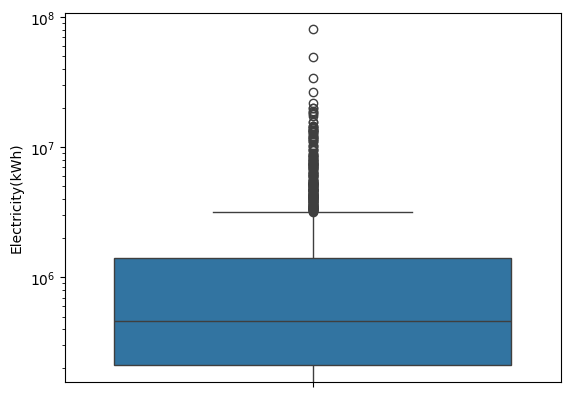

In [104]:
print(data_wod['Electricity(kWh)'].describe())

sns.boxplot(data = data_wod['Electricity(kWh)'])
plt.yscale('log')
plt.show()

In [105]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['Electricity(kWh)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -1577922.0780000002
Outliers upper bound: 3192417.0468


In [106]:
#Checking outliers above 0
data_wod.loc[data_wod['Electricity(kWh)'] > 0,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','Electricity(kWh)']].sort_values(by = 'Electricity(kWh)').tail(30)

PrimaryPropertyType                                       PropertyName  \
230         Large Office                                   Fourth & Madison   
3203               Other                       2020 Fifth Avenue Dat Center   
1672            Hospital                          Main Hospital - All Wings   
285         Large Office                    Century Square - COS Compliance   
221         Large Office                                   999 Third Avenue   
36             Warehouse                                      Seattle 11-13   
162         Large Office                                         South Park   
49                 Hotel                             Sheraton Seattle Hotel   
292         Large Office                                   Two Union Square   
564                Other                                      Pacific Place   
329                Other  VM Seattle Hospital & Medical Center - Buck Pa...   
1690      Medical Office                                     Central Campus   
328         Large Office                                1000 Denny Building   
261         Large Office                                      Rainier Tower   
271         Large Office                                  1201 Third Avenue   
2                  Hotel                            5673-The Westin Seattle   
308   Mixed Use Property                       Fisher Plaza - East Building   
273         Large Office                                     US Bank Centre   
167             Hospital                                Swedish Cherry Hill   
233         Large Office                     Seattle Municipal Tower (2030)   
187                Other                                       1122 3rd Ave   
474   Mixed Use Property                          Stadium Innovation Center   
340                Other                        Weintraub/Hutchinson/Thomas   
477         Large Office                                   Starbucks Center   
231         Large Office                                   901 Fifth Avenue   
309   Mixed Use Property                       Fisher Plaza - West Building   
3264            Hospital               Virginia Mason Medical Center - 2149   
124             Hospital            Seattle Children's Hospital Main Campus   
170             Hospital                          Harborview Medical Center   
558                Other                                     WestinBuilding   

                              Address  NumberofBuildings  NumberofFloors  \
230                 925 Fourth Avenue                1.0              37   
3203                2020 Fifth Avenue                1.0               7   
1672  Facilities Management MS: B-120                8.0               1   
285                      1501 4th Ave                1.0              30   
221        999 3rd Avenue, Suite 1550                1.0              47   
36                  3301 S NORFOLK ST                3.0               2   
162                    1420 S Trenton               14.0               2   
49                    1400 6th Avenue                1.0              34   
292                     601 Union St.                1.0              56   
564                   600 Pine Street                1.0               0   
329                   1100 9th Avenue                1.0               8   
1690                 201 16th Ave. E.                1.0               3   
328                    1000 Denny Way                1.0               8   
261                      1301 5th Ave                1.0              42   
271                      1201 3rd ave                1.0              55   
2                     1900 5th Avenue                1.0              41   
308                     140 4th Ave N                1.0               6   
273                   1420 5th Avenue                1.0              46   
167                      500 17th Ave                6.0               5   
233                  700 Fifth Aven

The Westinbuilding uses a lot more electricity than other buildings, it is a high building and it is possible that its only energy sousrce is electricity which would explain why it is much higher than the others.

I am going to compare it to the columbia center, which has 76 floors and still consumes less electricity than the columbia center.

In [107]:
#Checking the WestinBuilding sources of energy

In [108]:
data_wod.loc[data_wod['PropertyName'].str.contains('WestinBuilding|Columbia Center - 2015')]

BuildingType PrimaryPropertyType    PropertyName       Address  \
558  NonResidential               Other  WestinBuilding  2001 6th Ave   

     ZipCode  CouncilDistrictCode Neighborhood  Latitude  Longitude  \
558  98121.0                    7     DOWNTOWN  47.61438 -122.33871   

     YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
558       1981                1.0              33            429405   

     PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
558                   0                  429405       Data Center, Office   

    LargestPropertyUseType  LargestPropertyUseTypeGFA  \
558            Data Center                   218997.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
558                       Office                         210409.0   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
558                         NaN                             NaN   

    YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
558                      NaN             98.0        639.700012   

     SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
558         2007.900024          274682208.0             0.0   

     Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
558        80460872.0        274532495.0         1496.720215   

     NaturalGas(kBtu) ComplianceStatus Outlier  TotalGHGEmissions  \
558          149672.0        Compliant     NaN            1921.82   

     GHGEmissionsIntensity  
558                   4.48

The columbia center consumes less electricity because it has other sources of energy such as natural gas. Also the WestinBuilding is used as a data center, data centers consume a lot of electricity. It makes sense that this building's electricity consumption is very high.

## 4.16 Electricity(kBtu)

The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).

count    1.613000e+03
mean     5.192704e+06
std      1.223787e+07
min     -1.154170e+05
25%      7.197790e+05
50%      1.586389e+06
75%      4.788878e+06
max      2.745325e+08
Name: Electricity(kBtu), dtype: float64


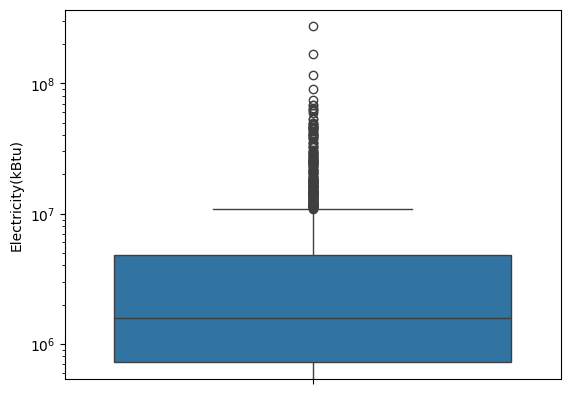

In [109]:
print(data_wod['Electricity(kBtu)'].describe())

sns.boxplot(data = data_wod['Electricity(kBtu)'])
plt.yscale('log')
plt.show()

In [110]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['Electricity(kBtu)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -5383869.5
Outliers upper bound: 10892526.5


In [111]:
#Checking outliers above 11 067 536

data_wod.loc[data_wod['Electricity(kBtu)'] > 11067536,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','Electricity(kBtu)']].sort_values(by = 'Electricity(kBtu)').tail(30)

PrimaryPropertyType                                       PropertyName  \
230         Large Office                                   Fourth & Madison   
3203               Other                       2020 Fifth Avenue Dat Center   
1672            Hospital                          Main Hospital - All Wings   
285         Large Office                    Century Square - COS Compliance   
221         Large Office                                   999 Third Avenue   
36             Warehouse                                      Seattle 11-13   
162         Large Office                                         South Park   
49                 Hotel                             Sheraton Seattle Hotel   
292         Large Office                                   Two Union Square   
564                Other                                      Pacific Place   
329                Other  VM Seattle Hospital & Medical Center - Buck Pa...   
1690      Medical Office                                     Central Campus   
328         Large Office                                1000 Denny Building   
261         Large Office                                      Rainier Tower   
271         Large Office                                  1201 Third Avenue   
2                  Hotel                            5673-The Westin Seattle   
308   Mixed Use Property                       Fisher Plaza - East Building   
273         Large Office                                     US Bank Centre   
167             Hospital                                Swedish Cherry Hill   
233         Large Office                     Seattle Municipal Tower (2030)   
187                Other                                       1122 3rd Ave   
474   Mixed Use Property                          Stadium Innovation Center   
340                Other                        Weintraub/Hutchinson/Thomas   
477         Large Office                                   Starbucks Center   
231         Large Office                                   901 Fifth Avenue   
309   Mixed Use Property                       Fisher Plaza - West Building   
3264            Hospital               Virginia Mason Medical Center - 2149   
124             Hospital            Seattle Children's Hospital Main Campus   
170             Hospital                          Harborview Medical Center   
558                Other                                     WestinBuilding   

                              Address  NumberofBuildings  NumberofFloors  \
230                 925 Fourth Avenue                1.0              37   
3203                2020 Fifth Avenue                1.0               7   
1672  Facilities Management MS: B-120                8.0               1   
285                      1501 4th Ave                1.0              30   
221        999 3rd Avenue, Suite 1550                1.0              47   
36                  3301 S NORFOLK ST                3.0               2   
162                    1420 S Trenton               14.0               2   
49                    1400 6th Avenue                1.0              34   
292                     601 Union St.                1.0              56   
564                   600 Pine Street                1.0               0   
329                   1100 9th Avenue                1.0               8   
1690                 201 16th Ave. E.                1.0               3   
328                    1000 Denny Way                1.0               8   
261                      1301 5th Ave                1.0              42   
271                      1201 3rd ave                1.0              55   
2                     1900 5th Avenue                1.0              41   
308                     140 4th Ave N                1.0               6   
273                   1420 5th Avenue                1.0              46   
167                      500 17th Ave                6.0               5   
233                  700 Fifth Aven

Same analysis than ElectricityKWh in kbtu unit.

## 4.17 NaturalGas(therms)

The annual amount of utility-supplied natural gas consumed by the property, measured in therms.

count    1.613000e+03
mean     1.702594e+04
std      5.793656e+04
min      0.000000e+00
25%      0.000000e+00
50%      4.755600e+03
75%      1.437252e+04
max      1.381912e+06
Name: NaturalGas(therms), dtype: float64


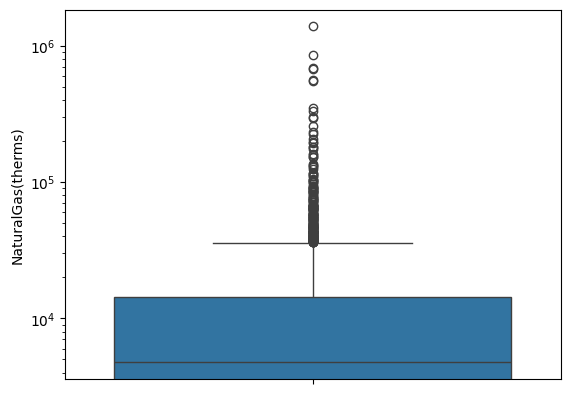

In [112]:
print(data_wod['NaturalGas(therms)'].describe())

sns.boxplot(data = data_wod['NaturalGas(therms)'])
plt.yscale('log')
plt.show()

In [113]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['NaturalGas(therms)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -21558.777825
Outliers upper bound: 35931.296375000005


No values below 0 

In [114]:
#Checking outliers above 36 619

data_wod.loc[data_wod['NaturalGas(therms)'] > 36619,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','NaturalGas(therms)']].sort_values(by = 'NaturalGas(therms)').tail(30)

PrimaryPropertyType                                       PropertyName  \
426           Restaurant                                            Pier 57   
545                Other                               UW Benjamin Hall IRB   
17                 Hotel                          Renaissance Seattle Hotel   
196                Hotel                  337v2-Seattle Waterfront Marriott   
105           University                                   SSCC MAIN CAMPUS   
334           Laboratory                                  401 Terry (ID470)   
3233               Other                                              SOUTH   
2522               Other                                Seattle Tennis Club   
346   Mixed Use Property                      UW Medicine Research Phase II   
3356  Mixed Use Property                                               AIBS   
355             Hospital                                               SCCA   
3205          Laboratory                              UW Medicine Phase 3.1   
429   Mixed Use Property                                      1616 Eastlake   
158                Other                                       Safeco Field   
194                Hotel                                  Edgewater Seattle   
550           Laboratory  Dendreon Pharmaceuticals Inc. (Building Owner ...   
20                 Other                             King County Courthouse   
809           Laboratory                                  3000/3018 Western   
49                 Hotel                             Sheraton Seattle Hotel   
166                Hotel                                Grand Hyatt Seattle   
21                 Other                  King County Correctional Facility   
3187            Hospital          Seattle Children's Hospital Building Hope   
98              Hospital                                    Swedish Ballard   
119                Other                          Jack R. McDonald Building   
1690      Medical Office                                     Central Campus   
1672            Hospital                          Main Hospital - All Wings   
340                Other                        Weintraub/Hutchinson/Thomas   
2325          University                            5th Avenue Master Meter   
167             Hospital                                Swedish Cherry Hill   
124             Hospital            Seattle Children's Hospital Main Campus   

                              Address  NumberofBuildings  NumberofFloors  \
426                  1301 Alaskan Way                1.0               1   
545            616 NE Northlake Place                1.0               6   
17                 515 Madison Street                1.0              28   
196                  2100 Alaskan Way                1.0               8   
105                  6000 16th Ave SW               27.0               2   
334                   401 TERRY AVE N                1.0               4   
3233                  2623 NE 46th St                1.0               6   
2522              922 McGilvra Blvd E                1.0               3   
346             850 Republican Street                1.0               5   
3356              601 Westlake Ave N.                1.0               6   
355                825 Eastlake Ave E                1.0               7   
3205            750 Republican Street                1.0               8   
429              1616 Eastlake Ave. E                1.0               5   
158           1250 First Avenue South                1.0               3   
194                  2411 Alaskan Way                1.0               4   
550         1208 Eastlake Avenue East                1.0               4   
20                        516 3RD AVE                1.0              10   
809                 3018 Western Ave.                1.0               4   
49                    1400 6th Avenue                1.0              34   
166                       721 Pine 

The Seattle Children's Hospital Main Campus and Plant 2 Site have very high values compared to the rest of the buildings

In [115]:
data_wod.loc[data_wod['PropertyName'].str.contains("Plant 2 Site|Seattle Children's Hospital Main Campus|Swedish Cherry Hill|Weintraub/Hutchinson/Thomas")]

BuildingType PrimaryPropertyType  \
124  NonResidential            Hospital   
167  NonResidential            Hospital   
340          Campus               Other   

                                PropertyName                 Address  ZipCode  \
124  Seattle Children's Hospital Main Campus  4800 Sand Point Way NE  98105.0   
167                      Swedish Cherry Hill            500 17th Ave  98122.0   
340              Weintraub/Hutchinson/Thomas     1100 Fairview Ave N  98109.0   

     CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
124                    4    NORTHEAST  47.66231 -122.28146       1953   
167                    3      CENTRAL  47.60705 -122.30966       1990   
340                    3   LAKE UNION  47.62855 -122.33035       1997   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
124                6.0              10            879000                   0   
167                6.0               5            597519                   0   
340                1.0               5            535947                   0   

     PropertyGFABuilding(s)                       ListOfAllPropertyUseTypes  \
124                  879000           Hospital (General Medical & Surgical)   
167                  597519  Hospital (General Medical & Surgical), Parking   
340                  535947                                  Other, Parking   

                    LargestPropertyUseType  LargestPropertyUseTypeGFA  \
124  Hospital (General Medical & Surgical)                   879000.0   
167  Hospital (General Medical & Surgical)                   601615.0   
340                                  Other                   535947.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
124                          NaN                              NaN   
167                      Parking                          48607.0   
340                      Parking                         103983.0   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
124                         NaN                             NaN   
167                         NaN                             NaN   
340                         NaN                             NaN   

    YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
124                      NaN             10.0        288.799988   
167                      NaN             34.0        238.399994   
340                      NaN              NaN        245.100006   

     SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
124          578.200012          253832464.0             0.0   
167          454.399994          143423024.0             0.0   
340          509.399994          131373880.0             0.0   

     Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
124        33892500.0        115641210.0        1.381912e+06   
167        17220084.0         58754927.0        8.466809e+05   
340        18941222.0         64627449.0        6.674642e+05   

     NaturalGas(kBtu) ComplianceStatus Outlier  TotalGHGEmissions  \
124       138191238.0        Compliant     NaN            8145.52   
167        84668094.0        Compliant     NaN            4906.33   
340        66746425.0        Compliant     NaN            3995.45   

     GHGEmissionsIntensity  
124                   9.27  
167                   8.21  
340                   7.45

A quick internet search shows that the Plant 2 site building is owned by Boeing and used as a construction site. Considering that the airplane industry uses gaz welding to make and repair airplanes, it makes sense that this building consumes a lot of natural gaz.

Regarding the children's hospital main campus, I am not sure why they would consume a lot of gaz.

These outliers will be kept.

## 4.18 NaturalGas(kBtu)

count    1.613000e+03
mean     1.702594e+06
std      5.793656e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.755600e+05
75%      1.437252e+06
max      1.381912e+08
Name: NaturalGas(kBtu), dtype: float64


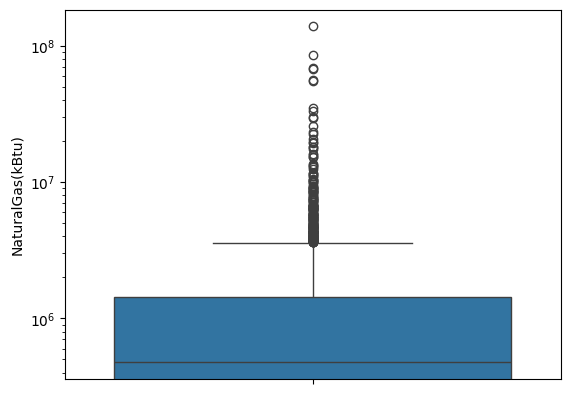

In [116]:
print(data_wod['NaturalGas(kBtu)'].describe())

sns.boxplot(data = data_wod['NaturalGas(kBtu)'])
plt.yscale('log')
plt.show()

In [117]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['NaturalGas(kBtu)'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -2155878.0
Outliers upper bound: 3593130.0


No values below 0

In [118]:
#Checking outliers above 36 619

data_wod.loc[data_wod['NaturalGas(kBtu)'] > 36619,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','NaturalGas(kBtu)']].sort_values(by = 'NaturalGas(kBtu)').tail(30)

PrimaryPropertyType                                       PropertyName  \
426           Restaurant                                            Pier 57   
545                Other                               UW Benjamin Hall IRB   
17                 Hotel                          Renaissance Seattle Hotel   
196                Hotel                  337v2-Seattle Waterfront Marriott   
105           University                                   SSCC MAIN CAMPUS   
334           Laboratory                                  401 Terry (ID470)   
3233               Other                                              SOUTH   
2522               Other                                Seattle Tennis Club   
346   Mixed Use Property                      UW Medicine Research Phase II   
3356  Mixed Use Property                                               AIBS   
355             Hospital                                               SCCA   
3205          Laboratory                              UW Medicine Phase 3.1   
429   Mixed Use Property                                      1616 Eastlake   
158                Other                                       Safeco Field   
194                Hotel                                  Edgewater Seattle   
550           Laboratory  Dendreon Pharmaceuticals Inc. (Building Owner ...   
20                 Other                             King County Courthouse   
809           Laboratory                                  3000/3018 Western   
49                 Hotel                             Sheraton Seattle Hotel   
166                Hotel                                Grand Hyatt Seattle   
21                 Other                  King County Correctional Facility   
3187            Hospital          Seattle Children's Hospital Building Hope   
98              Hospital                                    Swedish Ballard   
119                Other                          Jack R. McDonald Building   
1690      Medical Office                                     Central Campus   
1672            Hospital                          Main Hospital - All Wings   
340                Other                        Weintraub/Hutchinson/Thomas   
2325          University                            5th Avenue Master Meter   
167             Hospital                                Swedish Cherry Hill   
124             Hospital            Seattle Children's Hospital Main Campus   

                              Address  NumberofBuildings  NumberofFloors  \
426                  1301 Alaskan Way                1.0               1   
545            616 NE Northlake Place                1.0               6   
17                 515 Madison Street                1.0              28   
196                  2100 Alaskan Way                1.0               8   
105                  6000 16th Ave SW               27.0               2   
334                   401 TERRY AVE N                1.0               4   
3233                  2623 NE 46th St                1.0               6   
2522              922 McGilvra Blvd E                1.0               3   
346             850 Republican Street                1.0               5   
3356              601 Westlake Ave N.                1.0               6   
355                825 Eastlake Ave E                1.0               7   
3205            750 Republican Street                1.0               8   
429              1616 Eastlake Ave. E                1.0               5   
158           1250 First Avenue South                1.0               3   
194                  2411 Alaskan Way                1.0               4   
550         1208 Eastlake Avenue East                1.0               4   
20                        516 3RD AVE                1.0              10   
809                 3018 Western Ave.                1.0               4   
49                    1400 6th Avenue                1.0              34   
166                       721 Pine 

Same analysis than NaturalGas(therms) but in kbtu unit. The two columns contain the same information with a different unit.

In [119]:
data_wod[['NaturalGas(kBtu)','NaturalGas(therms)']]

NaturalGas(kBtu)  NaturalGas(therms)
0         1.276453e+06        12764.529300
1         5.145082e+06        51450.816410
2         1.493800e+06        14938.000000
3         1.811213e+06        18112.130860
4         8.803998e+06        88039.984380
...                ...                 ...
3371      3.254750e+05         3254.750244
3372      5.537300e+05         5537.299805
3373      3.973739e+06        39737.390630
3374      3.706010e+05         3706.010010
3375      7.203420e+05         7203.419922

[1613 rows x 2 columns]

## 4.19 TotalGHGEmissions

The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu. 

count     1613.000000
mean       156.678915
std        485.486740
min         -0.800000
25%         19.730000
50%         48.760000
75%        134.380000
max      10734.570000
Name: TotalGHGEmissions, dtype: float64


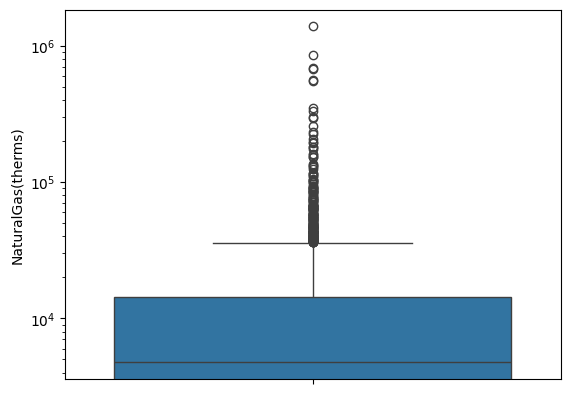

In [120]:
print(data_wod['TotalGHGEmissions'].describe())

sns.boxplot(data = data_wod['NaturalGas(therms)'])
plt.yscale('log')
plt.show()

In [121]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['TotalGHGEmissions'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -152.245
Outliers upper bound: 306.355


In [122]:
#Checking outliers above 307

data_wod.loc[data_wod['TotalGHGEmissions'] > 307,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','TotalGHGEmissions']].sort_values(by = 'TotalGHGEmissions').tail(30)

PrimaryPropertyType                                       PropertyName  \
1754      Medical Office                                HART First Hill LLC   
550           Laboratory  Dendreon Pharmaceuticals Inc. (Building Owner ...   
429   Mixed Use Property                                      1616 Eastlake   
158                Other                                       Safeco Field   
20                 Other                             King County Courthouse   
809           Laboratory                                  3000/3018 Western   
329                Other  VM Seattle Hospital & Medical Center - Buck Pa...   
3261          University                          SCCC MAIN BROADWAY/EDISON   
280                Hotel                                      Motif Seattle   
272                Hotel                                      WAC aggregate   
3182               Other  VM Seattle Hospital & Medical Center - Jones P...   
373   Mixed Use Property                                 Seattle Art Museum   
166                Hotel                                Grand Hyatt Seattle   
21                 Other                  King County Correctional Facility   
3187            Hospital          Seattle Children's Hospital Building Hope   
558                Other                                     WestinBuilding   
98              Hospital                                    Swedish Ballard   
119                Other                          Jack R. McDonald Building   
2                  Hotel                            5673-The Westin Seattle   
49                 Hotel                             Sheraton Seattle Hotel   
3156          Laboratory                    Reasearch and Training Building   
262                Hotel                           Fairmont Olympic Seattle   
1690      Medical Office                                     Central Campus   
1672            Hospital                          Main Hospital - All Wings   
2325          University                            5th Avenue Master Meter   
340                Other                        Weintraub/Hutchinson/Thomas   
167             Hospital                                Swedish Cherry Hill   
3264            Hospital               Virginia Mason Medical Center - 2149   
124             Hospital            Seattle Children's Hospital Main Campus   
170             Hospital                          Harborview Medical Center   

                              Address  NumberofBuildings  NumberofFloors  \
1754             1124 Columbia Street                1.0               0   
550         1208 Eastlake Avenue East                1.0               4   
429              1616 Eastlake Ave. E                1.0               5   
158           1250 First Avenue South                1.0               3   
20                        516 3RD AVE                1.0              10   
809                 3018 Western Ave.                1.0               4   
329                   1100 9th Avenue                1.0               8   
3261                    1701 BROADWAY                1.0               3   
280                      1414 4th Ave                1.0              19   
272                      1325 6th Ave                1.0              21   
3182                   1010 Spring St                1.0               7   
373                   1300 1st Avenue                1.0               6   
166                       721 Pine St                1.0               0   
21                        500 5TH AVE                1.0              19   
3187                 4500 40th Ave NE                1.0               8   
558                      2001 6th Ave                1.0              33   
98                5300 Tallman Ave NW                4.0               5   
119                     1900 9th Ave.                1.0              11   
2                     1900 5th Avenue                1.0              41   
49                    1400 6th Aven

Buildings with high GHGEmissions are buildings that were already identified as consuming a lot electricity or gaz.
Mostly hospitals, university and hotels.

## 4.20 GHGEmissionsIntensity

Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

count    1613.000000
mean        1.565381
std         2.183962
min        -0.020000
25%         0.340000
50%         0.860000
75%         1.820000
max        25.710000
Name: GHGEmissionsIntensity, dtype: float64


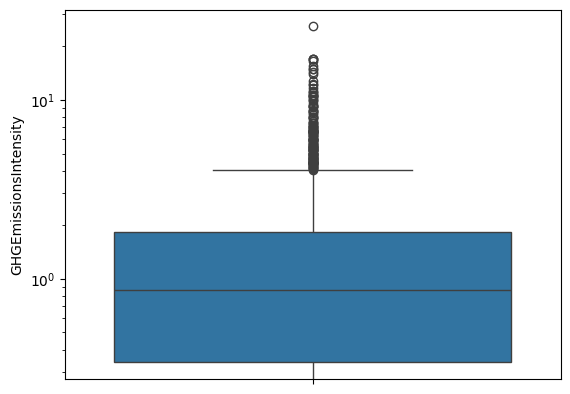

In [123]:
print(data_wod['GHGEmissionsIntensity'].describe())

sns.boxplot(data = data_wod['GHGEmissionsIntensity'])
plt.yscale('log')
plt.show()

In [124]:
# Applying the outlier function to the related column
lower_bound, upper_bound = get_outlier_bounds(data_wod['GHGEmissionsIntensity'])

print("Outliers lower bound:", lower_bound)
print("Outliers upper bound:", upper_bound)

Outliers lower bound: -1.8799999999999997
Outliers upper bound: 4.04


In [125]:
#Checking outliers above 4

data_wod.loc[data_wod['GHGEmissionsIntensity'] > 4,
['PrimaryPropertyType','PropertyName','Address','NumberofBuildings','NumberofFloors','GHGEmissionsIntensity']].sort_values(by = 'GHGEmissionsIntensity').tail(30)

PrimaryPropertyType  \
986            Mixed Use Property   
1563  Supermarket / Grocery Store   
170                      Hospital   
124                      Hospital   
954                   K-12 School   
1033  Supermarket / Grocery Store   
550                    Laboratory   
1255                        Other   
687                         Other   
373            Mixed Use Property   
2166                        Other   
1606                        Other   
2109  Supermarket / Grocery Store   
2222                 Retail Store   
3367                        Other   
47             Mixed Use Property   
3171                        Other   
2522                        Other   
1337                   Laboratory   
2795  Supermarket / Grocery Store   
426                    Restaurant   
3156                   Laboratory   
2380           Mixed Use Property   
1753                        Other   
1279                        Other   
1817                   Restaurant   
3264                     Hospital   
3365                        Other   
3373                        Other   
809                    Laboratory   

                                           PropertyName  \
986            Matador/Jak's Grill/8 Limbs Yoga/Fitness   
1563                               70500811 -- Interbay   
170                           Harborview Medical Center   
124             Seattle Children's Hospital Main Campus   
954                             University Prep Academy   
1033                          Safeway 0368 - Queen Anne   
550   Dendreon Pharmaceuticals Inc. (Building Owner ...   
1255                         Pacific Northwest Research   
687                             Sand Point Country Club   
373                                  Seattle Art Museum   
2166                Southwest Teen Life Center and Pool   
1606                  Meadowbrook Community Center/Pool   
2109                                Metropolitan Market   
2222                            (ID24857) EMPIRE CENTER   
3367                                Conservatory Campus   
47                                        Mann Building   
3171                   Seattle ProCure Management, LLC.   
2522                                Seattle Tennis Club   
1337                                    410 W. Harrison   
2795                                            Admiral   
426                                             Pier 57   
3156                    Reasearch and Training Building   
2380                             Chandler's Cove - SEDO   
1753         Charles & Emma Frye Free Public Art Museum   
1279                                       space needle   
1817                   Salty's Waterfront Seafood Grill   
3264               Virginia Mason Medical Center - 2149   
3365                                       Ballard Pool   
3373                                    Queen Anne Pool   
809                                   3000/3018 Western   

                        Address  NumberofBuildings  NumberofFloors  \
986      4546 California Ave SW                1.0               2   
1563           1600 West Dravus                1.0               1   
170                325 9th Ave.                9.0               8   
124      4800 Sand Point Way NE                6.0              10   
954            8000 25th Ave NE                5.0               3   
1033      2100 Queen Anne Ave N                1.0               1   
550   1208 Eastlake Avenue East                1.0               4   
1255               720 Broadway                1.0               5   
687            8333 55th ave ne                1.0               3   
373             1300 1st Avenue                1.0               6   
2166            2801 Thistle St                1.0               2   
1606          10700 30th Ave NE                1.0               2   
2109           5250 40th Ave NE                1.0               1   
2222     6032 M L KING JR WAY S                1.0      

In [126]:
data_wod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1613 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1613 non-null   object 
 1   PrimaryPropertyType              1613 non-null   object 
 2   PropertyName                     1613 non-null   object 
 3   Address                          1613 non-null   object 
 4   ZipCode                          1597 non-null   float64
 5   CouncilDistrictCode              1613 non-null   int64  
 6   Neighborhood                     1613 non-null   object 
 7   Latitude                         1613 non-null   float64
 8   Longitude                        1613 non-null   float64
 9   YearBuilt                        1613 non-null   int64  
 10  NumberofBuildings                1613 non-null   float64
 11  NumberofFloors                   1613 non-null   int64  
 12  PropertyGFATotal         

# 5. Quantitative variables distributions

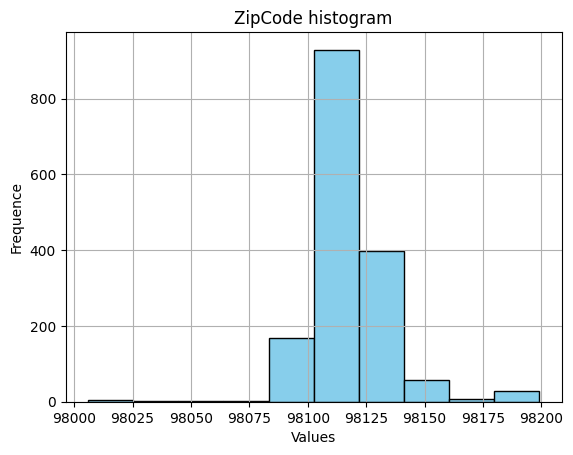

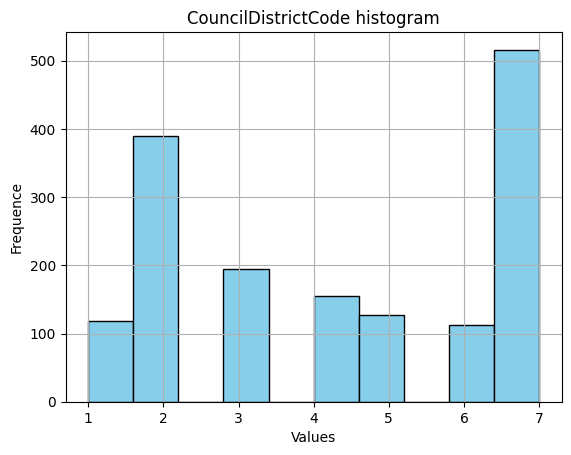

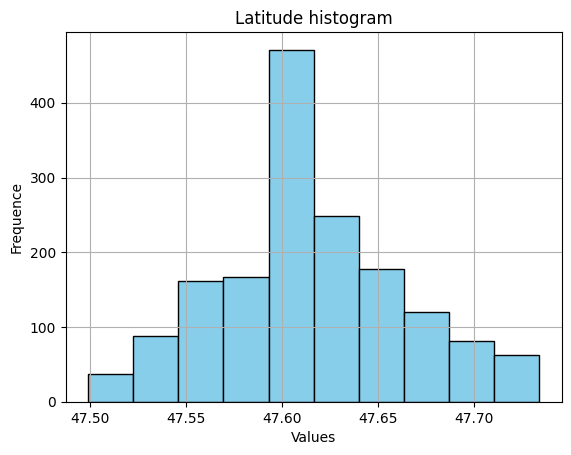

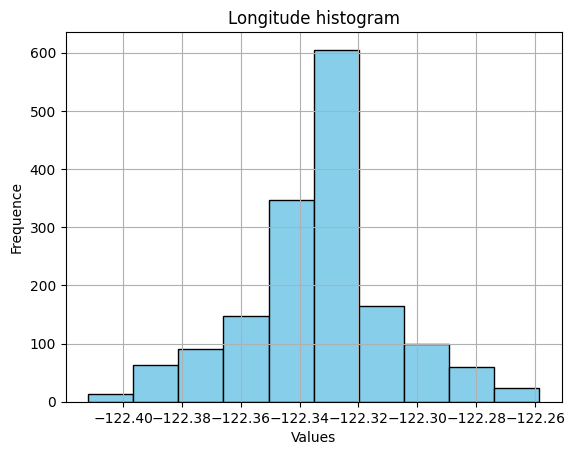

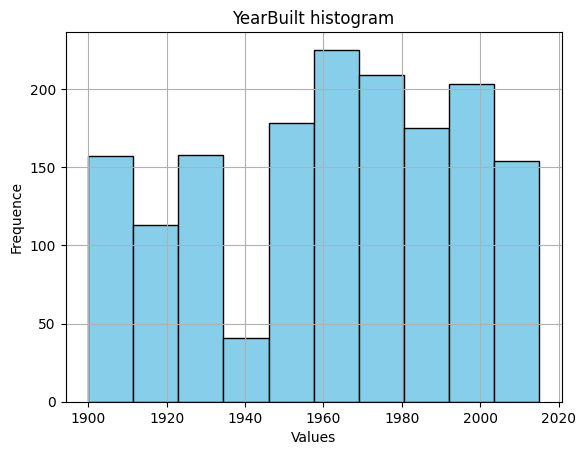

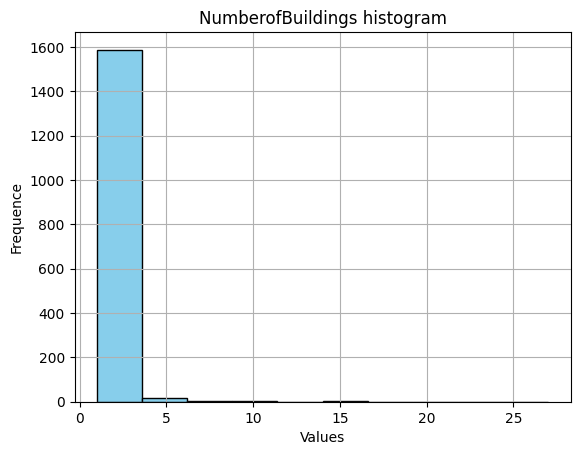

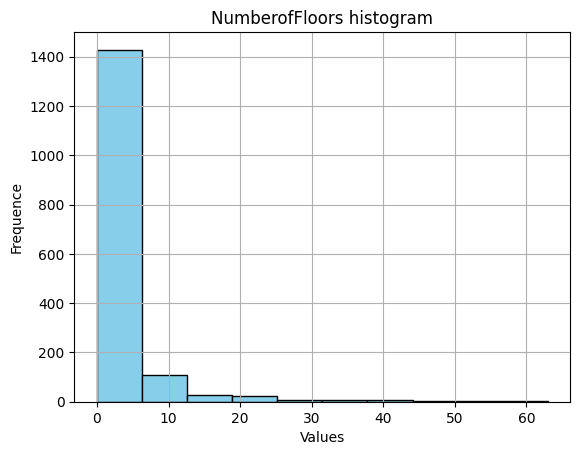

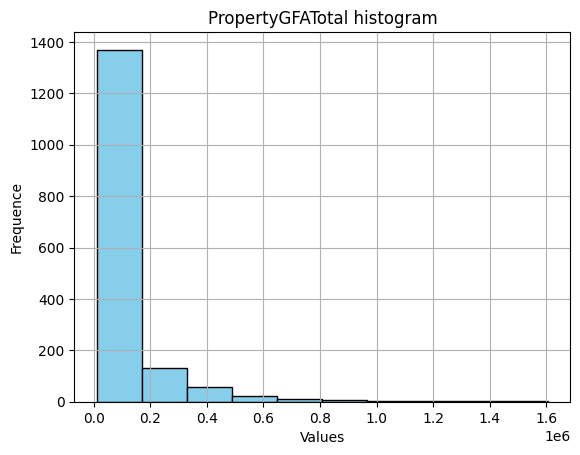

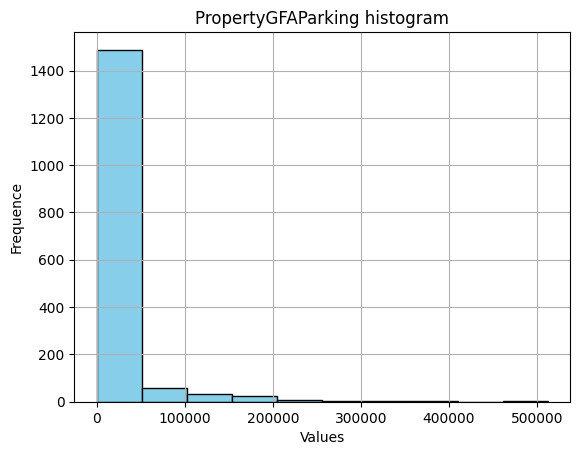

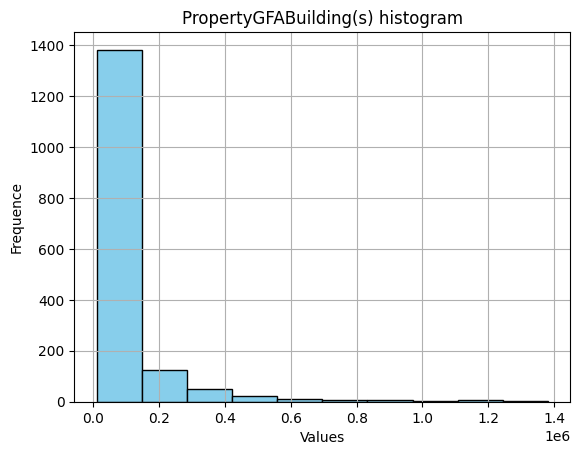

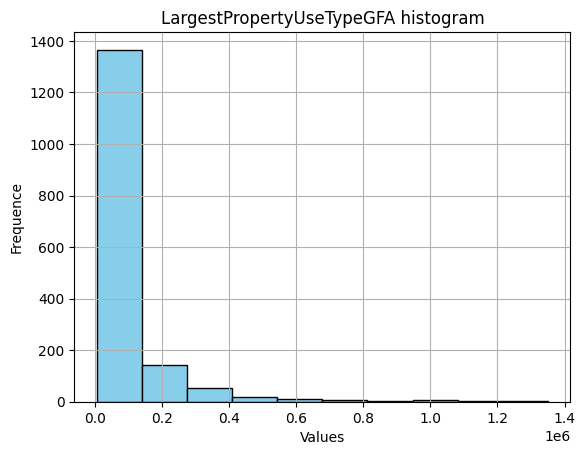

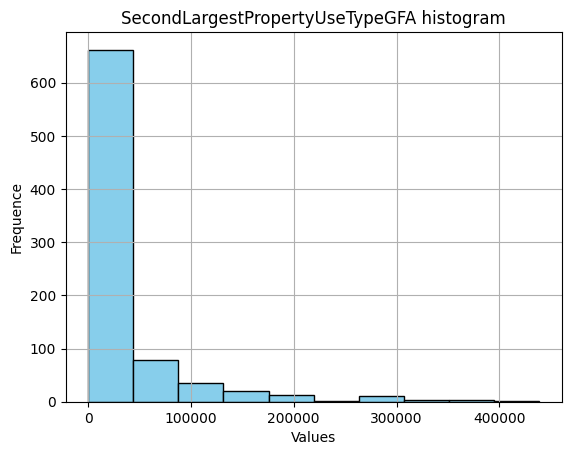

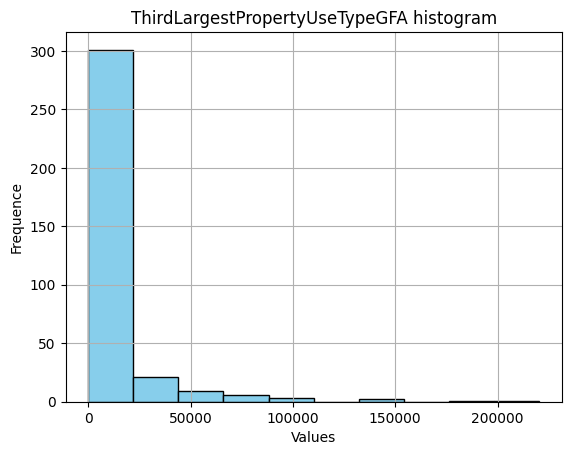

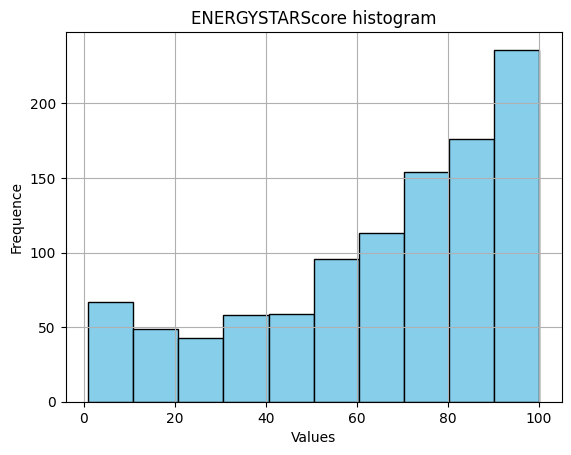

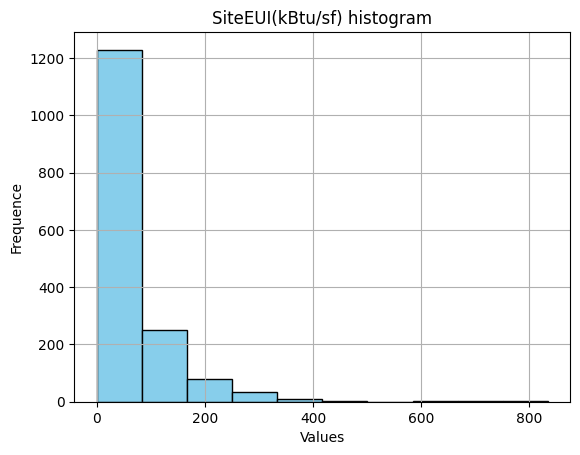

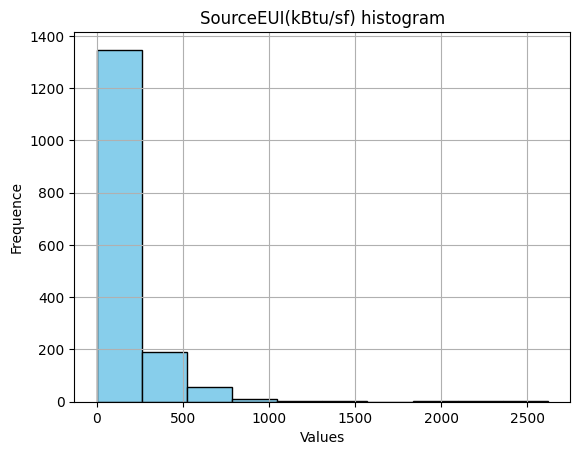

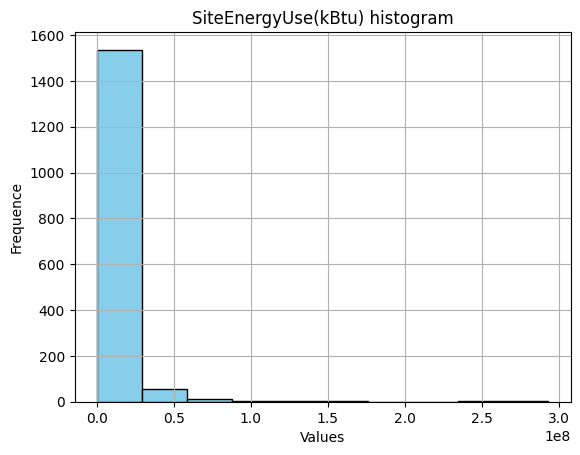

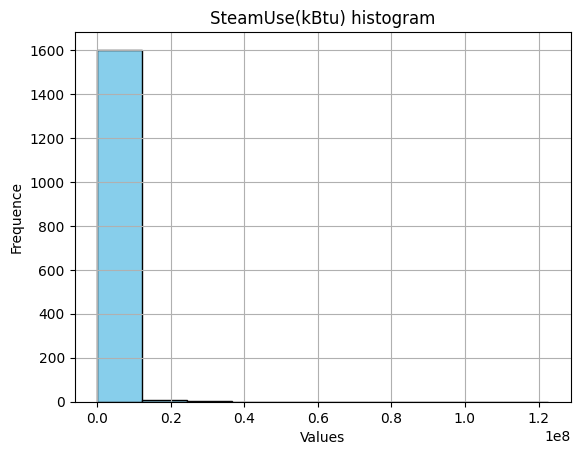

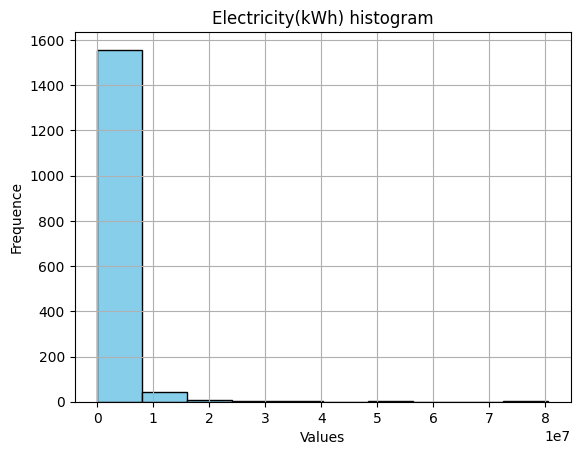

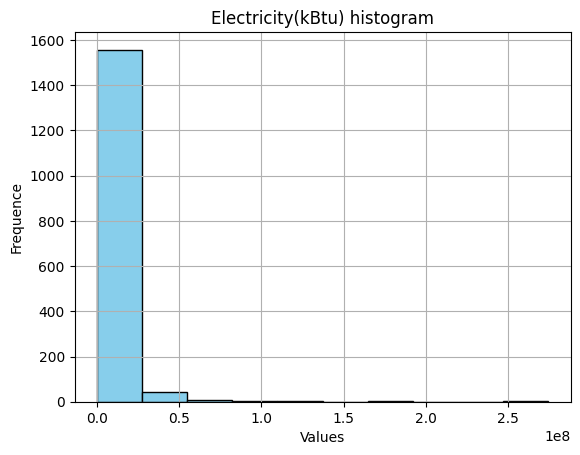

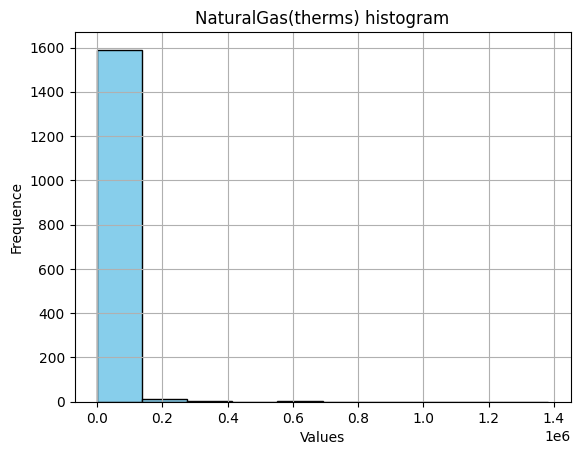

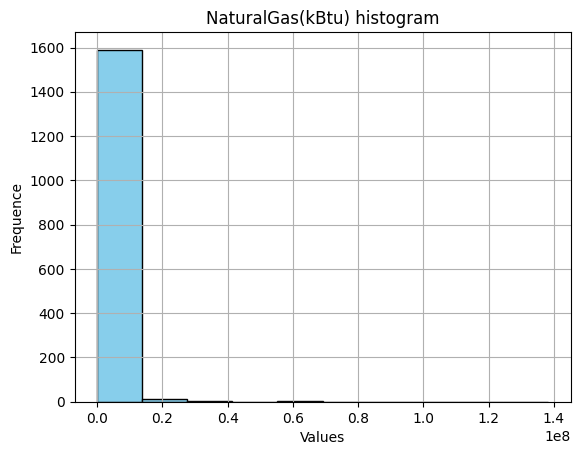

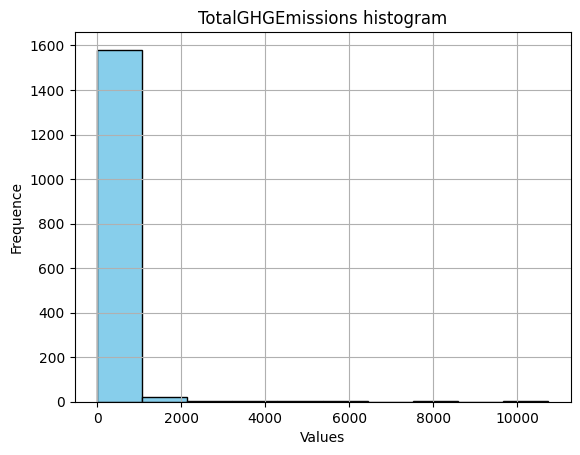

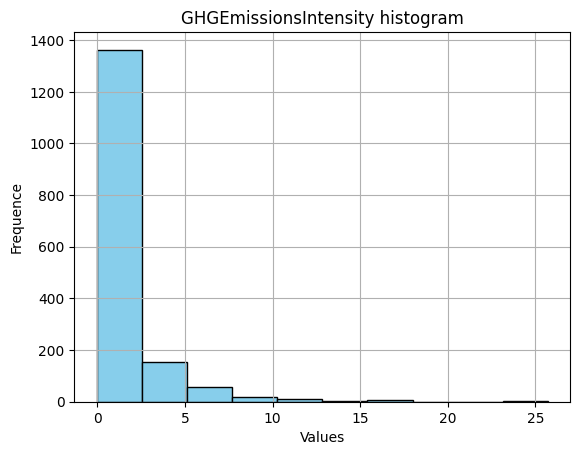

In [127]:
#Plotting an histogramme for each quantitative variables
for column in data_wod.columns:
    # Checking if the variable is quatitative
    if pd.api.types.is_numeric_dtype(data_wod[column]):
        # Affiche l'histogramme de la variable
        plt.figure()  # Create a new figure for each histogram
        plt.hist(data_wod[column], bins=10, color='skyblue', edgecolor='black')
        plt.title(column + ' histogram')
        plt.xlabel('Values')
        plt.ylabel('Frequence')
        plt.grid(True)
        plt.show()

# 6. Function to apply all above changes to the initial dataset

In [128]:
buildings_data = pd.read_csv("Building_Energy_Benchmarking.csv")

def first_treatments(df):
    #Deleting non residential buildings
    df = df.loc[df['BuildingType'].str.contains("NonResidential|Nonresidential COS|SPS-District K-12|Campus|Nonresidential WA")]
    #Deleting the Residence Halls
    df = df.loc[df['PrimaryPropertyType'] != 'Residence Hall']
    #Deleting Senior Care Community
    df = df.loc[df['PrimaryPropertyType'] != 'Senior Care Community']
    #Deleting Low-Rise Multifamily
    df = df.loc[df['PrimaryPropertyType'] != 'Low-Rise Multifamily']
    #Dropping unecessary columns
    df = df.drop(columns = ['OSEBuildingID','DataYear','Comments','City','State','TaxParcelIdentificationNumber'])
    #Turning 0s into 1 for the number of buildings
    df.loc[df['NumberofBuildings'] == 0, ['NumberofBuildings']] = 1
    #Deleting properties above 30 buildings
    df = df.loc[df['NumberofBuildings'] < 30]
    #Deleting the chinese baptist church
    df = df.loc[df['PropertyName'] != 'Seattle Chinese Baptist Church']
    
    #Deleting outliers in LargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Entire Campus']
    df = df.loc[df['PropertyName'] != 'Columbia Center - 2015']
    df = df.loc[df['PropertyName'] != 'Swedish First Hill']
    df = df.loc[df['PropertyName'] != 'CenturyLink']

    #Deleting outliers in SecondLargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Washington State Convention Center']
    df = df.loc[df['PropertyName'] != 'Plant 2 Site']

    #Deleting outliers in ThirdLargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Russell Investments Center']
    
    #Deleting wheather normalized variables
    df = df.drop(columns = ['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'])

    return df

In [129]:
#Using the function
buildings = first_treatments(buildings_data)

In [130]:
buildings

BuildingType PrimaryPropertyType  \
0         NonResidential               Hotel   
1         NonResidential               Hotel   
2         NonResidential               Hotel   
3         NonResidential               Hotel   
4         NonResidential               Hotel   
...                  ...                 ...   
3371  Nonresidential COS              Office   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
0                       7               DOWNTOWN  47.61220 -122.33799   
1                       7               DOWNTOWN  47.61317 -122.33393   
2                       7               DOWNTOWN  47.61393 -122.33810   
3                       7               DOWNTOWN  47.61412 -122.33664   
4                       7               DOWNTOWN  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3371                    2       GREATER DUWAMISH  47.56722 -122.31154   
3372                    2               DOWNTOWN  47.59625 -122.32283   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1       GREATER DUWAMISH  47.52832 -122.32431   
3375                    2       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3371       1990                1.0               1             12294   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3371                   0                   12294   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                         

Same number of rows than data_wod after all changes were made, 40 columns instead of 39 because this dataset includes the DefaultData column.

# 7. Other variables outlook

I will look at GHG Emissions and Site Energy Use for the following categorical variables.

Default Data, Outlier, ComplianceStatus, Zip code, Council District Code, Neighborhood, BuildingType, PrimaryPropertyType

## 7.1 Default Data

The property used default data for at least one property characteristic.

In [131]:
#88 buildings have used default data for at least one characteristics.
buildings['DefaultData'].value_counts()

DefaultData
False    1525
True       88
Name: count, dtype: int64

In [132]:
#Isolating building that used default data for at least one characteriticss
building_with_default = buildings.loc[buildings['DefaultData'] == True]
building_with_default

BuildingType PrimaryPropertyType                  PropertyName  \
22     SPS-District K-12         K-12 School        Graham Hill Elementary   
30     SPS-District K-12         K-12 School            Jane Addams Middle   
38     SPS-District K-12         K-12 School               Eckstein Middle   
86     SPS-District K-12         K-12 School   Mercer International Middle   
87     SPS-District K-12         K-12 School               Orca K-8 School   
...                  ...                 ...                           ...   
3036   SPS-District K-12         K-12 School           Montlake Elementary   
3126   SPS-District K-12         K-12 School               South Shore K-8   
3366  Nonresidential COS              Office  Central West HQ / Brown Bear   
3369  Nonresidential COS              Office              Genesee/SC SE HQ   
3371  Nonresidential COS              Office         Horticulture building   

                    Address  ZipCode  CouncilDistrictCode  \
22       5149 S. Graham St.  98118.0                    2   
30     11051 34th Ave. N.E.  98125.0                    5   
38       3003 N.E. 75th St.  98115.0                    4   
86    1600 Columbian Way S.  98108.0                    2   
87        5215 46th Ave. S.  98118.0                    2   
...                     ...      ...                  ...   
3036      2409 22nd Ave. E.  98112.0                    3   
3126      4800 S. Henderson  98118.0                    2   
3366            1403 w howe      NaN                    7   
3369         4420 S Genesee      NaN                    2   
3371       1600 S Dakota St      NaN                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
22                SOUTHEAST  47.54576 -122.26853       1961   
30                    NORTH  47.70994 -122.29301       1949   
38                NORTHEAST  47.68252 -122.29498       1950   
86         GREATER DUWAMISH  47.56413 -122.31208       1957   
87                SOUTHEAST  47.55478 -122.27596       1989   
...                     ...       ...        ...        ...   
3036                   EAST  47.64063 -122.30428       1925   
3126              SOUTHEAST  47.52374 -122.27201       2009   
3366  MAGNOLIA / QUEEN ANNE  47.63572 -122.37525       1952   
3369              SOUTHEAST  47.56440 -122.27813       1960   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
22                  1.0               2             56228                   0   
30                  1.0               2            160645                   0   
38                  1.0               2            175565                   0   
86                  1.0               1            130862                   0   
87                  1.0               3             59955                   0   
...                 ...             ...               ...                 ...   
3036                1.0               2             27273                   0   
3126                1.0               2            138705                   0   
3366                1.0               1             13661                   0   
3369                1.0               1             15398                   0   
3371                1.0               1             12294                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
22                     56228               K-12 School            K-12 School   
30                    160645               K-12 School            K-12 School   
38                    175565               K-12 School            K-12 School   
86                    130862               K-12 School            K-12 School   
87                     59955               K-12 School            K-12 School   
...                      ...                       ...                    ...   
3036                   27273               K-

A lot of building with default data seem to be schools

In [133]:
building_with_default['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
K-12 School                    75
Retail Store                    5
Office                          3
Small- and Mid-Sized Office     2
Warehouse                       2
Large Office                    1
Name: count, dtype: int64

All buildings with default data have a compliance issue which means that they have not met the energy benchmarking requirements for the related year.
According to the city's website, it means that they have not corretly collected or verified the data about their energy use, or they have not updated their energy use from the past years report.

The website states that :
"Reports with "default values" for the ENERGY STAR score are required to make corrections. Default values are provided within Portfolio Manager to help owners get a quick ENERGY STAR score, when the exact values for the property use details are not yet known. Actual values must be used in EPA Portfolio Manager to obtain an accurate ENERGY STAR score for your property."
Which means that when the property has not provided or updated its data, default values are used instead to calculate a default energy score.

Those buildinds will not be kept because it means that the associated values are either not given or, not relevant anymore.

In [134]:
#Checking that all buildings with default data have a compliance error.
building_with_default['ComplianceStatus'].value_counts()

ComplianceStatus
Error - Correct Default Data    88
Name: count, dtype: int64

### 7.1.1 Default data treatments

In [135]:
#Deleting the buildings with default data from the inital dataset
buildings = buildings.loc[buildings['DefaultData'] == False]

In [136]:
buildings

BuildingType PrimaryPropertyType  \
0         NonResidential               Hotel   
1         NonResidential               Hotel   
2         NonResidential               Hotel   
3         NonResidential               Hotel   
4         NonResidential               Hotel   
...                  ...                 ...   
3370  Nonresidential COS               Other   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3370          High Point Community Center  6920 34th Ave SW      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode            Neighborhood  Latitude  Longitude  \
0                       7                DOWNTOWN  47.61220 -122.33799   
1                       7                DOWNTOWN  47.61317 -122.33393   
2                       7                DOWNTOWN  47.61393 -122.33810   
3                       7                DOWNTOWN  47.61412 -122.33664   
4                       7                DOWNTOWN  47.61375 -122.34047   
...                   ...                     ...       ...        ...   
3370                    1  DELRIDGE NEIGHBORHOODS  47.54067 -122.37441   
3372                    2                DOWNTOWN  47.59625 -122.32283   
3373                    7   MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1        GREATER DUWAMISH  47.52832 -122.32431   
3375                    2        GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3370       1982                1.0               1             18261   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3370                   0                   18261   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2             

## 7.2 Outlier and Compliance Status

Whether a property is a high or low outlier (Y/N)

In [137]:
buildings.Outlier.unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [138]:
#Looking at high outliers
buildings.loc[buildings['Outlier'] == 'High outlier']

BuildingType PrimaryPropertyType                PropertyName  \
226  NonResidential        Large Office  Second And Spring Building   
517  NonResidential        Large Office        401 Elliott Ave West   

                 Address  ZipCode  CouncilDistrictCode           Neighborhood  \
226   1100 Second Avenue  98101.0                    7               DOWNTOWN   
517  401 Elliot Ave West  98119.0                    7  MAGNOLIA / QUEEN ANNE   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
226  47.60642 -122.33581       1958                1.0               6   
517  47.62235 -122.36378       2000                1.0               4   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
226            172842               25920                  146922   
517            129551               42500                   87051   

        ListOfAllPropertyUseTypes LargestPropertyUseType  \
226  Data Center, Office, Parking                 Office   
517  Data Center, Office, Parking                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
226                    99890.0                  Data Center   
517                    82273.0                      Parking   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
226                          39336.0                     Parking   
517                          42500.0                 Data Center   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
226                         25000.0                      NaN              NaN   
517                          4778.0                      NaN              1.0   

     SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
226        297.399994          909.599976           41399504.0   
517        311.700012          978.900024           27137190.0   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
226             0.0        11663150.0         39794668.0         16048.30957   
517             0.0         7953454.5         27137187.0             0.00000   

     NaturalGas(kBtu)  DefaultData ComplianceStatus       Outlier  \
226         1604831.0        False    Non-Compliant  High outlier   
517               0.0        False    Non-Compliant  High outlier   

     TotalGHGEmissions  GHGEmissionsIntensity  
226             362.66                   2.10  
517             189.18                   1.46

In [139]:
#Looking at low outliers
buildings.loc[buildings['Outlier'] == 'Low outlier']

BuildingType          PrimaryPropertyType  \
384       NonResidential                 Retail Store   
448       NonResidential                 Large Office   
1229      NonResidential  Small- and Mid-Sized Office   
1295      NonResidential                        Other   
1611      NonResidential             Worship Facility   
1945      NonResidential  Small- and Mid-Sized Office   
2129      NonResidential                  K-12 School   
2189      NonResidential                        Other   
2216      NonResidential  Small- and Mid-Sized Office   
2410      NonResidential                        Hotel   
2801      NonResidential             Worship Facility   
3152  Nonresidential COS                        Other   

                        PropertyName                    Address  ZipCode  \
384                University Center      4501 Roosevelt Way NE  98105.0   
448           411 1ST AVE  S (ID608)              411 1ST AVE S  98104.0   
1229                 1518 Fifith Ave             1520 Fifth Ave  98101.0   
1295                  The Lusty Lady               1315 1st Ave  98101.0   
1611                  Freedom Church              9601 35th Ave  98126.0   
1945                  1416 S Jackson  1416 South Jackson Street  98133.0   
2129       Islamic School of Seattle               720 25TH AVE  98122.0   
2189        1701 First Ave South LLC       1701 First Ave South  98134.0   
2216                   2233 Building         2233 1st AVE.South  98104.0   
2410  J & M HOTEL BUILDING (ID25553)              210 1St Ave S  98104.0   
2801        Seattle Community Church        4501 46th Avenue NE  98105.0   
3152           Georgetown Steamplant     6605 13th Avenue South  98108.0   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  YearBuilt  \
384                     4         NORTHEAST  47.66178 -122.31812       1987   
448                     2          DOWNTOWN  47.59878 -122.33458       1913   
1229                    7          DOWNTOWN  47.61119 -122.33581       1903   
1295                    7          DOWNTOWN  47.60711 -122.33886       1900   
1611                    1         SOUTHWEST  47.51709 -122.37797       1971   
1945                    3           CENTRAL  47.59973 -122.31331       1947   
2129                    3           CENTRAL  47.60885 -122.29990       1929   
2189                    2  GREATER DUWAMISH  47.58788 -122.33458       1910   
2216                    2  GREATER DUWAMISH  47.58292 -122.33468       1910   
2410                    7          DOWNTOWN  47.60035 -122.33379       1900   
2801                    4         NORTHEAST  47.66146 -122.27880       1954   
3152                    2  GREATER DUWAMISH  47.54277 -122.31626       1906   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
384                 1.0               2             69492                   0   
448                 5.0               7            154159                   0   
1229                1.0               3             57720                   0   
1295                1.0               3             49760                   0   
1611                1.0               1             23772                   0   
1945                1.0               1             45068                   0   
2129                1.0               2             24152                   0   
2189                1.0               3             27690                   0   
2216                1.0               2             20970                   0   
2410                1.0               3             25450                   0   
2801                1.0               2             20039                   0   
3152                1.0               2             39212                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
384                    69492              Retail Store           Retail Store   
448                   154159         

14 buildings indentified as low or high outliers

Buildings identified as high outliers don't include the building with the highest GHG Emission value : 16870.98. 

Which means that outliers in this column are buildings that have a very high or low energy consumption compared to other buildings with similar characteristics (size, number of floors, year built...)

Buildings identified as low or high outliers are also non compliant.

In [140]:
# Looking at the number of non compliant buildings.
buildings['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant        1497
Missing Data       14
Non-Compliant      14
Name: count, dtype: int64

It seems that the dataset contains 15 non compliant buildings, and 14 buildings for which we don't have compliance information to be compliant with the benchmarking requirements, the city asks the building's owner to update the building's values each year (electricity, gaz, steam meters). if it is not done, the buildings is considered as not compliant since we don't have updated values.

I am going to delete buildings that are not compliant and building for whoch we don't have the information because I assume that they are not compliant. I am doing this for the same reason I deleted buildings with default data : those buildings are not updated, their values are not relevant anymore and might skew the ML model later.

### 7.2.1 Outlier and Compliance Status treatments

In [141]:
buildings = buildings.loc[buildings['ComplianceStatus'] == 'Compliant']

In [142]:
buildings

BuildingType PrimaryPropertyType  \
0         NonResidential               Hotel   
1         NonResidential               Hotel   
2         NonResidential               Hotel   
3         NonResidential               Hotel   
4         NonResidential               Hotel   
...                  ...                 ...   
3370  Nonresidential COS               Other   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3370          High Point Community Center  6920 34th Ave SW      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode            Neighborhood  Latitude  Longitude  \
0                       7                DOWNTOWN  47.61220 -122.33799   
1                       7                DOWNTOWN  47.61317 -122.33393   
2                       7                DOWNTOWN  47.61393 -122.33810   
3                       7                DOWNTOWN  47.61412 -122.33664   
4                       7                DOWNTOWN  47.61375 -122.34047   
...                   ...                     ...       ...        ...   
3370                    1  DELRIDGE NEIGHBORHOODS  47.54067 -122.37441   
3372                    2                DOWNTOWN  47.59625 -122.32283   
3373                    7   MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1        GREATER DUWAMISH  47.52832 -122.32431   
3375                    2        GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3370       1982                1.0               1             18261   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3370                   0                   18261   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2             

## 7.3 Zip code, Council district code, Neighborhood

The zip codes and council district codes and neighborhood will be looked at to get a quick idea at whether some locations tend to have a higher energy consumption.

Zip codes and Council district code and neighborhood all give indication about the location of the building in the city. 
Council District are areas within the city that regroup several zip codes.

In [143]:
#Creating a table summurasing which Zip codes are in each District council code
buildings_zip_council = pd.DataFrame(buildings.groupby(by = 'CouncilDistrictCode')['ZipCode'].value_counts())

In [144]:
pd.set_option('display.max_rows', None)
buildings_zip_council

count
CouncilDistrictCode ZipCode       
1                   98108.0     27
                    98106.0     22
                    98116.0     17
                    98126.0     17
                    98134.0      4
                    98136.0      3
                    98146.0      2
                    98053.0      1
                    98101.0      1
                    98103.0      1
                    98118.0      1
                    98121.0      1
2                   98134.0    172
                    98108.0     82
                    98104.0     41
                    98118.0     29
                    98144.0     16
                    98124.0      2
                    98168.0      2
                    98178.0      2
                    98199.0      2
                    98101.0      1
                    98103.0      1
                    98111.0      1
                    98112.0      1
                    98116.0      1
                    98121.0      1
                    98122.0      1
                    98136.0      1
                    98155.0      1
3                   98122.0     81
                    98104.0     24
                    98144.0     23
                    98109.0     13
                    98112.0     13
                    98101.0      9
                    98102.0      9
                    98134.0      2
                    98114.0      1
                    98121.0      1
                    98136.0      1
4                   98105.0     70
                    98115.0     24
                    98103.0     21
                    98102.0     15
                    98195.0      4
                    98104.0      2
                    98020.0      1
                    98070.0      1
                    98133.0      1
                    98145.0      1
                    98155.0      1
                    98185.0      1
5                   98133.0     43
                    98125.0     41
                    98115.0     14
                    98103.0      7
                    98144.0      2
                    98155.0      2
                    98013.0      1
                    98113.0      1
                    98165.0      1
                    98177.0      1
6                   98107.0     47
                    98103.0     30
                    98117.0     13
                    98115.0      3
                    98013.0      1
                    98125.0      1
                    98133.0      1
                    98134.0      1
7                   98101.0    128
                    98109.0    122
                    98104.0     81
                    98121.0     79
                    98119.0     59
                    98199.0     19
                    98154.0      2
                    98006.0      1
                    98011.0      1
                    98033.0      1
                    98105.0      1
                    98111.0      1
                    98112.0      1
                    98122.0      1
                    98125.0      1
                    98164.0      1
                    98181.0      1
                    98191.0      1

In [145]:
#Creating a table summurasing how many Zip codes are in each District council code
buildings_zip_council_2 = pd.DataFrame(buildings.groupby(by = 'CouncilDistrictCode')['ZipCode'].count())
buildings_zip_council_2

ZipCode
CouncilDistrictCode         
1                         97
2                        357
3                        177
4                        142
5                        113
6                         97
7                        501

The council districts with the most zip codes are 7, 2 and 3

In [146]:
pd.reset_option('display.max_rows')

### 7.3.1 Zip codes - GHG Emissions

In [147]:
buildings.ZipCode.unique()

array([98101., 98121., 98104., 98154., 98105., 98070., 98118., 98199.,
       98107., 98144., 98103., 98109., 98119., 98136., 98122., 98033.,
       98112., 98115., 98133., 98111., 98106., 98134., 98125., 98108.,
       98126., 98117., 98191., 98164., 98195., 98185., 98181., 98102.,
       98168., 98155., 98006., 98124., 98053., 98013., 98116., 98178.,
       98114., 98165., 98011., 98146., 98113., 98177., 98020., 98145.,
          nan])

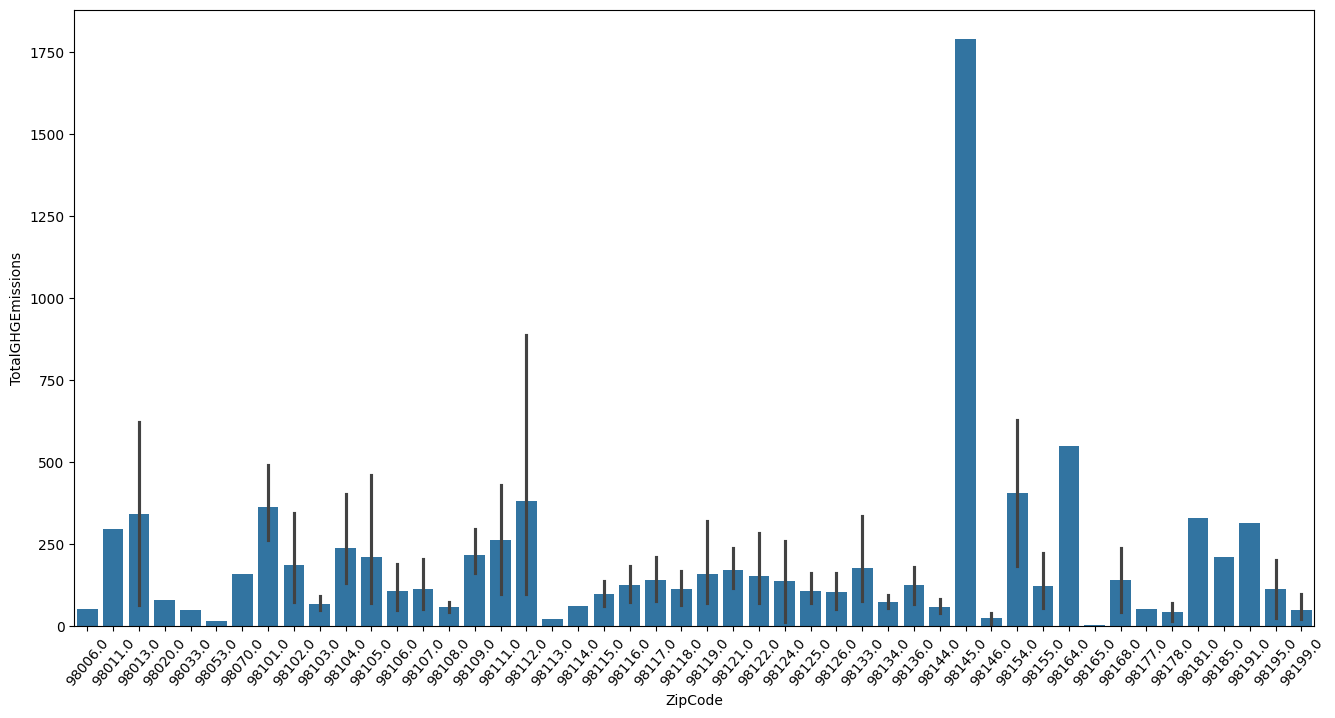

In [148]:
#Using a barplot with default estimator (mean) to find out which zip codes tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'ZipCode',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

Here we can see that zip code 98 145 (Council District 4) consumes in average a lot more energy than the rest of them, zip code 98 164 (Council District 7) is the second zip code to consume more than the rest, but is still a lot lower that the first one.

In [149]:
#Creating a table summurasing the ghg emissions means
buildings_zip_code = pd.DataFrame(buildings.groupby(by = 'ZipCode')['TotalGHGEmissions'].mean())
buildings_zip_code

TotalGHGEmissions
ZipCode                   
98006.0          50.170000
98011.0         294.650000
98013.0         341.690000
98020.0          77.840000
98033.0          48.760000
98053.0          13.070000
98070.0         157.770000
98101.0         362.359568
98102.0         185.393750
98103.0          65.919833
98104.0         236.342365
98105.0         209.229296
98106.0         105.394545
98107.0         111.205319
98108.0          56.207064
98109.0         216.984444
98111.0         262.870000
98112.0         379.547333
98113.0          19.430000
98114.0          60.040000
98115.0          96.474878
98116.0         123.204444
98117.0         138.013846
98118.0         110.966000
98119.0         157.392373
98121.0         170.532317
98122.0         151.124217
98124.0         135.145000
98125.0         107.086512
98126.0         103.952353
98133.0         175.000667
98134.0          73.015698
98136.0         124.014000
98144.0          57.873171
98145.0        1789.690000
98146.0          22.085000
98154.0         404.625000
98155.0         120.847500
98164.0         546.650000
98165.0           2.690000
98168.0         140.005000
98177.0          49.550000
98178.0          42.235000
98181.0         328.830000
98185.0         209.410000
98191.0         313.300000
98195.0         111.480000
98199.0          48.854286

### 7.3.2 Zip codes - Site Energy Use

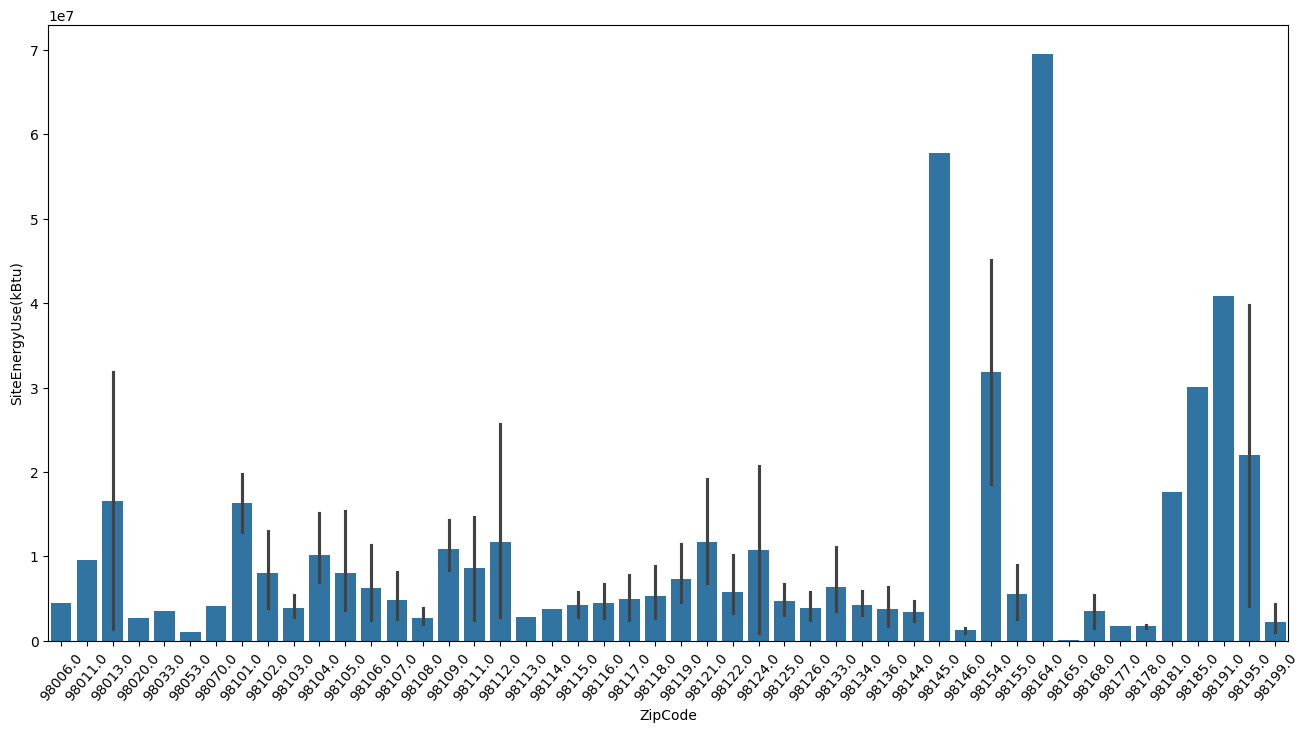

In [150]:
#Using a barplot with default estimator (mean) to find out which zip codes tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'ZipCode',y = 'SiteEnergyUse(kBtu)')
plt.xticks(rotation = 50)
plt.show()

Zip codes with the highest energy use are 98 145, 98 154, 98 164, 98 191.

98 145 has both a high energy consumption and high GHG Emissions.
Other high consuming buildings don't release as much GHG as 98 145. They might use less polluting energy sources.


### 7.3.3 Council districts - GHG Emissions

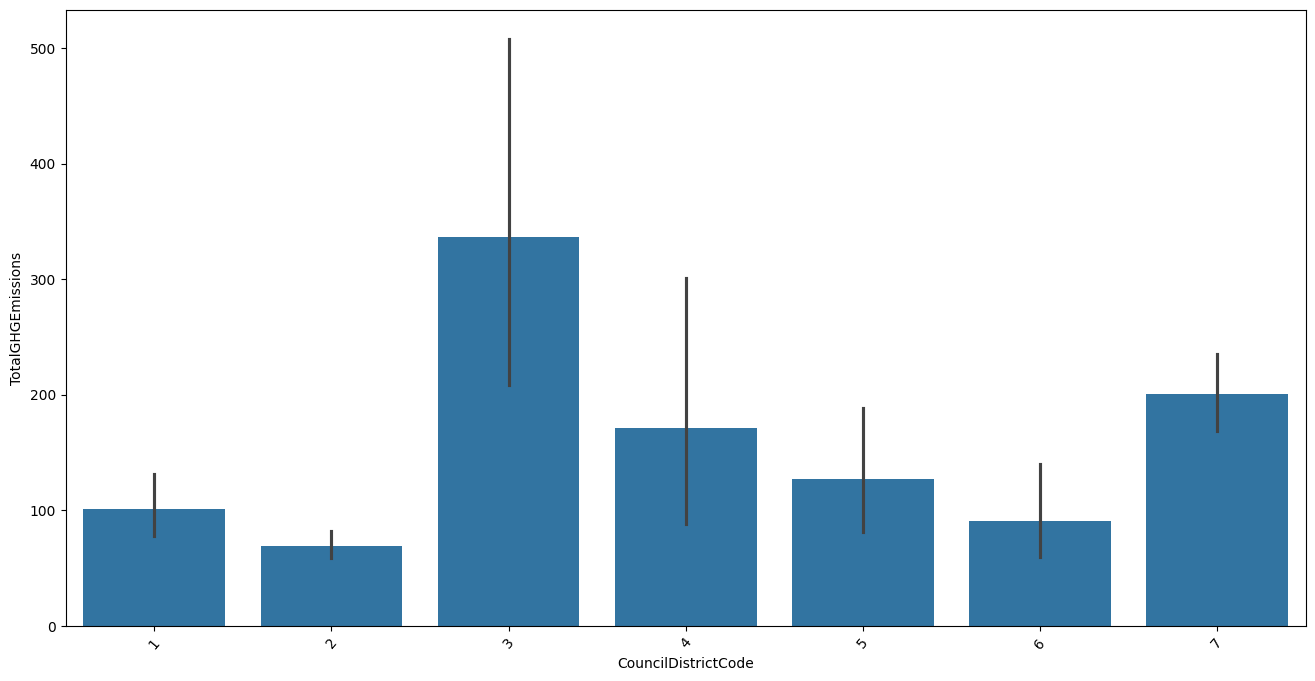

In [151]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'CouncilDistrictCode',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

When looking at the district consumptions, we can see that district 3 and 7 have the highest consumption means.

The third and fourth disctrict have a higher confidence interval than the others, they might contain buildings with a highest range of values regarding GHG Emissions.

In [152]:
#Creating a table summurasing the ghg emissions means
buildings_district = pd.DataFrame(buildings.groupby(by = 'CouncilDistrictCode')['TotalGHGEmissions'].mean())
buildings_district

TotalGHGEmissions
CouncilDistrictCode                   
1                           101.501515
2                            69.593092
3                           336.653111
4                           171.143380
5                           127.421565
6                            91.029400
7                           200.359502

### 7.3.4 Council districts - Site Energy Use

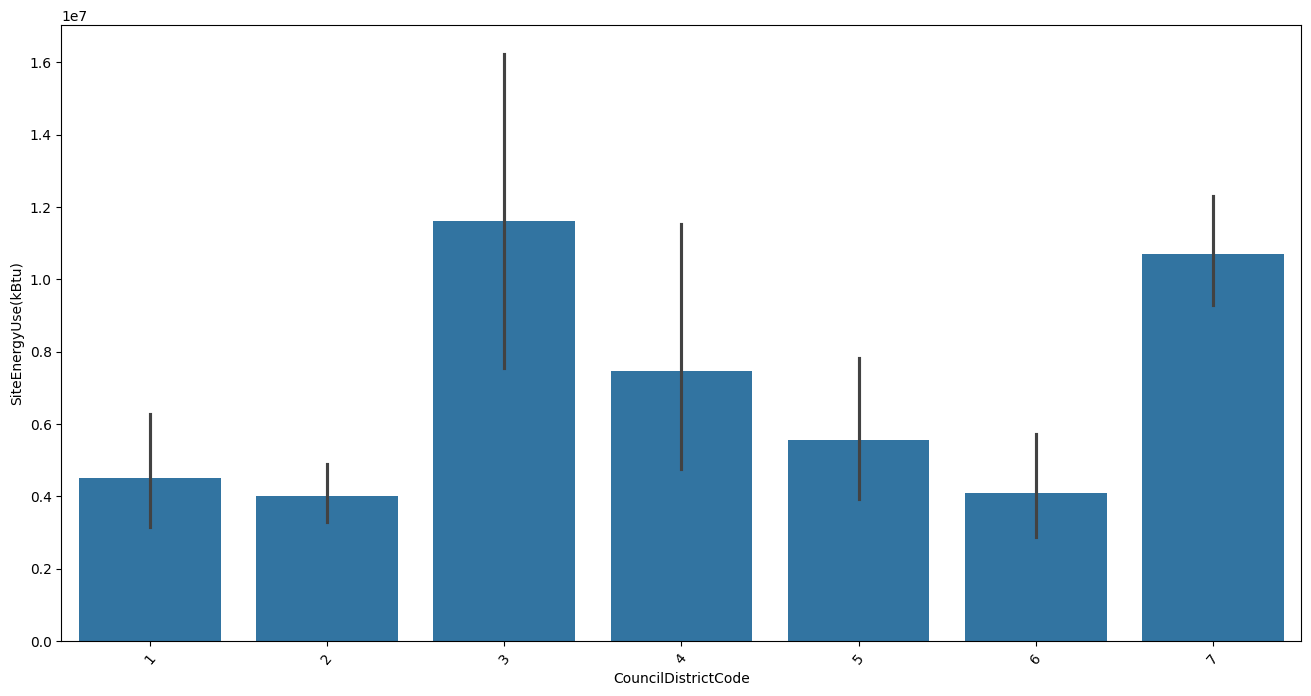

In [153]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'CouncilDistrictCode',y = 'SiteEnergyUse(kBtu)')
plt.xticks(rotation = 50)
plt.show()

In [154]:
#Creating a table summurasing the ghg emissions means
buildings_district = pd.DataFrame(buildings.groupby(by = 'CouncilDistrictCode')['SiteEnergyUse(kBtu)'].mean())
buildings_district

SiteEnergyUse(kBtu)
CouncilDistrictCode                     
1                           4.514439e+06
2                           4.007857e+06
3                           1.160843e+07
4                           7.457951e+06
5                           5.568149e+06
6                           4.080302e+06
7                           1.071408e+07

Council district 3 and 7 have the highest Site energy use and GHG Emissions.

### 7.3.5 Neighborhood - GHG Emissions

In [155]:
buildings.Neighborhood.unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHEAST', 'DELRIDGE', 'NORTH', 'SOUTHWEST', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

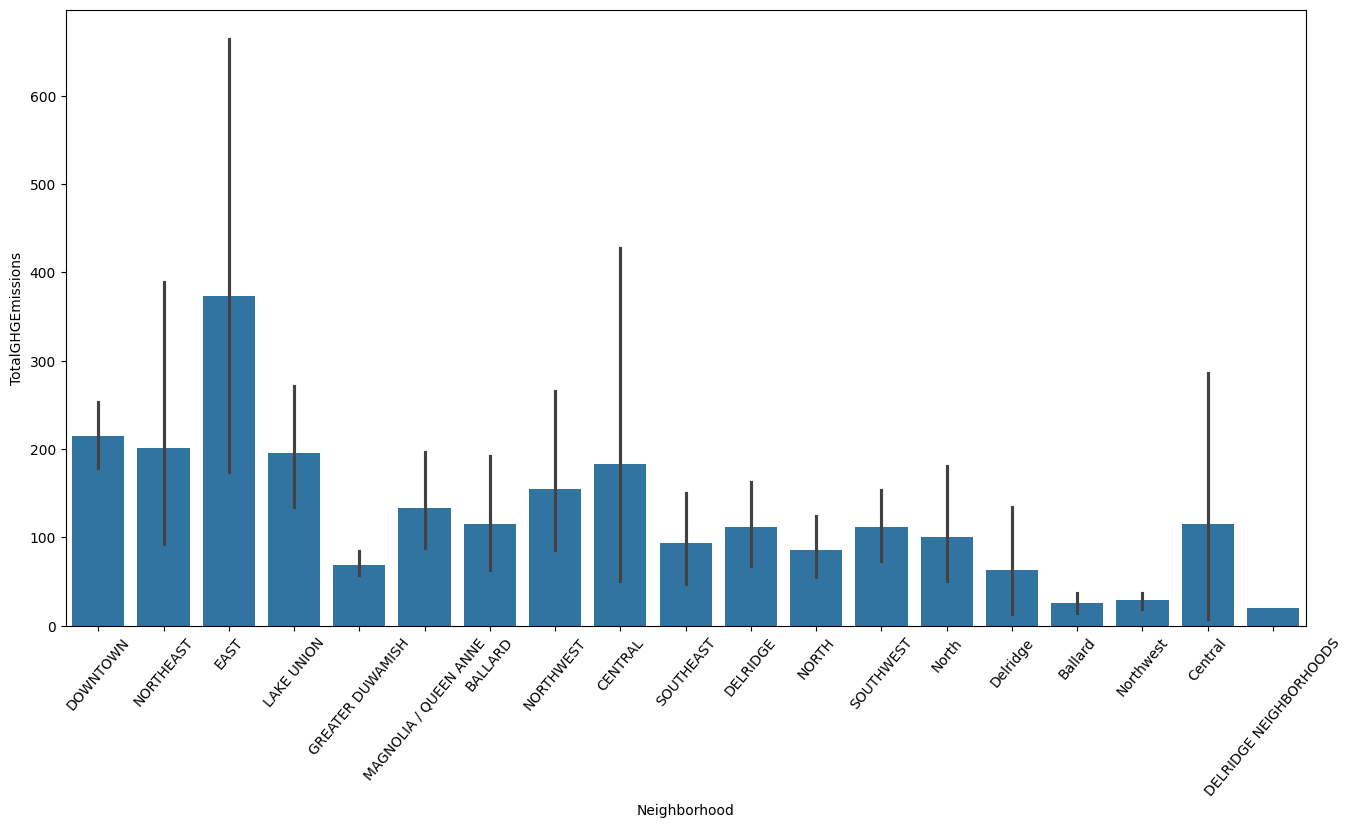

In [156]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'Neighborhood',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

In [157]:
#Looking at the relationship between the neighborhoods and the council district code
buildings_neighborhoods = pd.DataFrame(buildings.groupby(by = ['CouncilDistrictCode','Neighborhood'])['TotalGHGEmissions'].mean())
buildings_neighborhoods

TotalGHGEmissions
CouncilDistrictCode Neighborhood                             
1                   DELRIDGE                       111.670833
                    DELRIDGE NEIGHBORHOODS          20.330000
                    Delridge                        62.680000
                    GREATER DUWAMISH                85.847857
                    SOUTHWEST                      111.790333
2                   DOWNTOWN                        61.552439
                    EAST                            81.240000
                    GREATER DUWAMISH                67.896519
                    SOUTHEAST                      103.556250
3                   CENTRAL                        183.320000
                    Central                        115.490000
                    DOWNTOWN                       337.897000
                    EAST                           388.579804
                    GREATER DUWAMISH                34.352500
                    LAKE UNION                     629.250667
                    NORTHEAST                       18.160000
                    SOUTHEAST                       31.632500
4                   LAKE UNION                      91.614048
                    NORTH                           47.290000
                    NORTHEAST                      207.755000
5                   NORTH                           86.903830
                    NORTHEAST                       39.610000
                    NORTHWEST                      168.098448
                    North                          100.065714
6                   BALLARD                        114.685263
                    Ballard                         25.736000
                    LAKE UNION                      47.631429
                    NORTHWEST                       96.372143
                    Northwest                       29.243333
7                   DOWNTOWN                       231.500205
                    EAST                           152.723333
                    LAKE UNION                     211.166290
                    MAGNOLIA / QUEEN ANNE          132.923830

A neighborhood can be included in several council district since council district are big areas that divide the city in 7 parts.

#### 7.3.5.1 Neighborhood grouping

Some nighborhoods have the same names but in lowercase, I going to group them with their uppercase counterpart.

In [158]:
buildings.Neighborhood.unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHEAST', 'DELRIDGE', 'NORTH', 'SOUTHWEST', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [159]:
#Turning Nort into NORTH
buildings.loc[buildings['Neighborhood'].str.contains('NORTH|North'), 'Neighborhood'] = 'NORTH'

#Turning Delridge into DELRIDGE
buildings.loc[buildings['Neighborhood'].str.contains('DELRIDGE|DELRIDGE NEIGHBORHOODS|Delridge'), 'Neighborhood'] = 'DELRIDGE'

#Ballard into BALLARD
buildings.loc[buildings['Neighborhood'].str.contains('BALLARD|Ballard'), 'Neighborhood'] = 'BALLARD'

#Northwest into NORTHWEST
buildings.loc[buildings['Neighborhood'].str.contains('NORTHWEST|Northwest'), 'Neighborhood'] = 'NORTHWEST'

#Central into CENTRAL
buildings.loc[buildings['Neighborhood'].str.contains('CENTRAL|Central'), 'Neighborhood'] = 'CENTRAL'

In [160]:
buildings.Neighborhood.unique()

array(['DOWNTOWN', 'NORTH', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'CENTRAL', 'SOUTHEAST',
       'DELRIDGE', 'SOUTHWEST'], dtype=object)

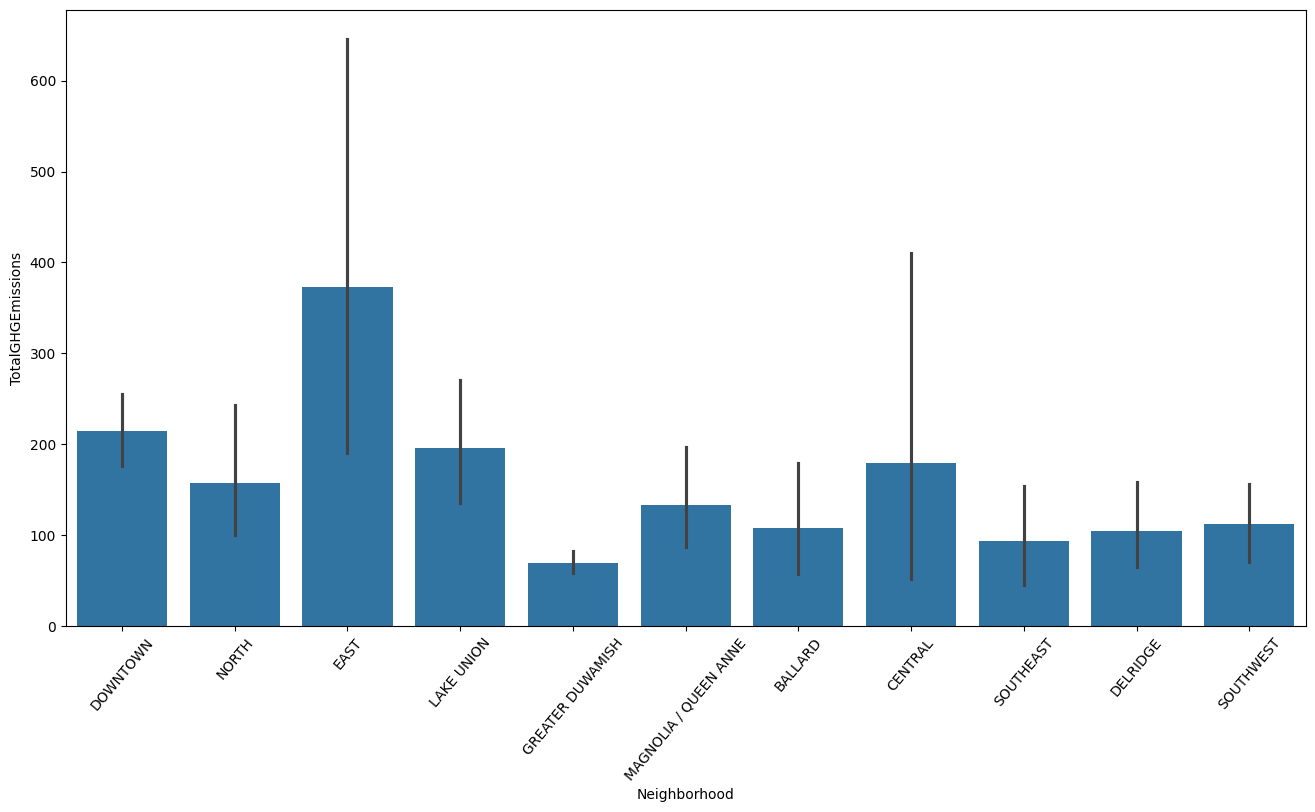

In [161]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'Neighborhood',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

The East,Central and Downtown neighborhoods have the highest energy consumption 

### 7.3.6 Neighborhood - Site Energy Use

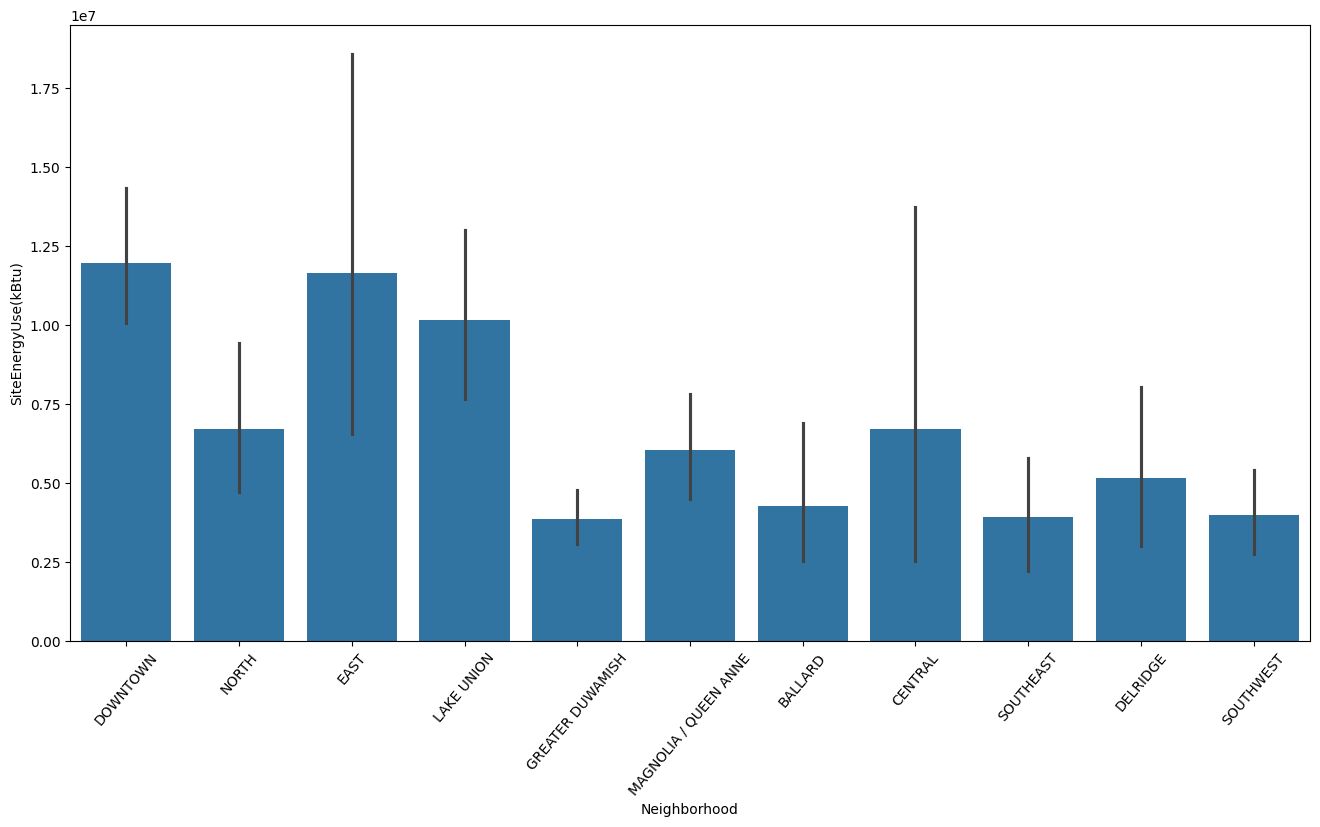

In [162]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'Neighborhood',y = 'SiteEnergyUse(kBtu)')
plt.xticks(rotation = 50)
plt.show()

Delridge has high energy consumption (Site Energy Use) but not low GHG Emissions.

East high energy consumption, and high GHG Emissions

Dopwntown high energy consumption but low GHG Emissions.

## 7.4 BuildingType, PrimaryPropertyType

### 7.4.1 Building type - GHG Emissions

Looking at which building type have the highest GHG Emissions

In [163]:
buildings.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

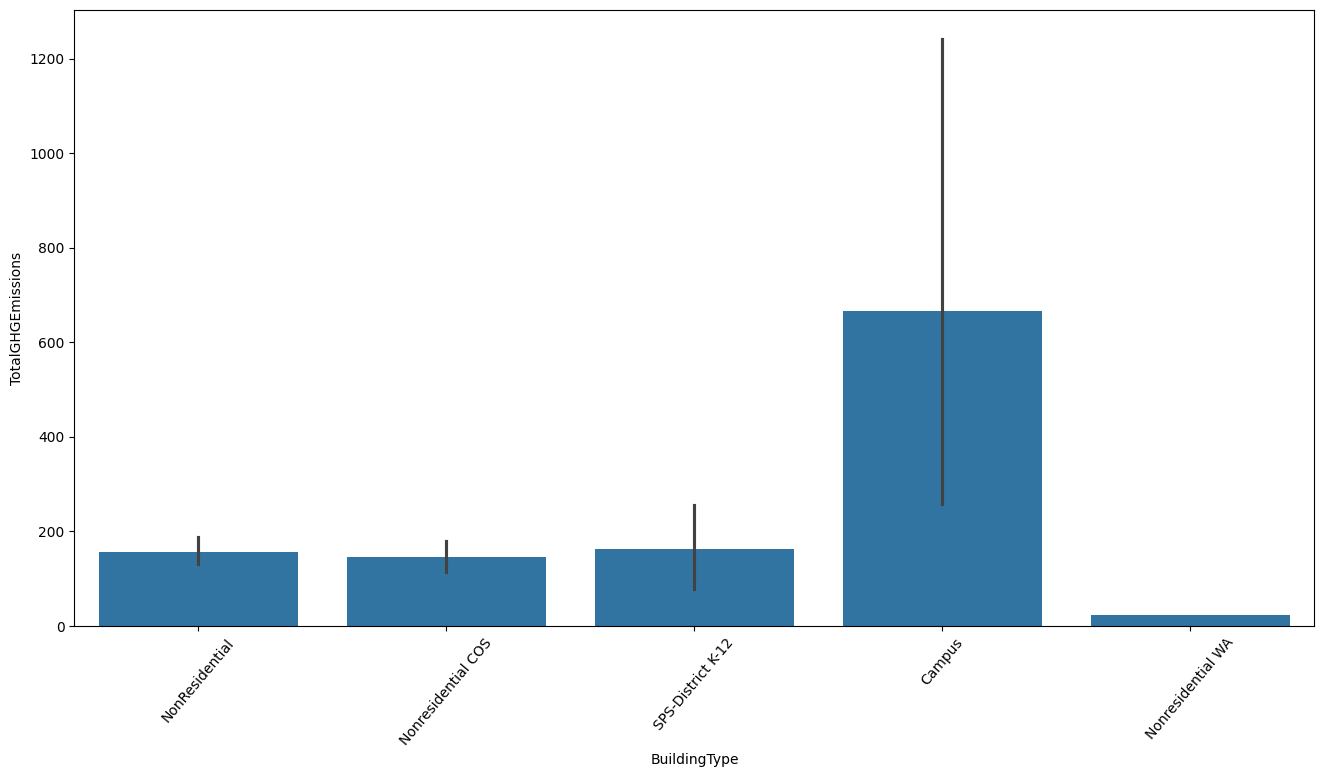

In [164]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'BuildingType',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

Campuses have the highest GHG Emissions, since I deleted residence hall (student housing) it is not related to places where students live.

Since we have no information about the difference between NonResidential, NonResidentialCOS and NonResidentialWA I am going to group them into a single NonResidential LABEL

In [165]:
buildings.columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address',
       'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

#### 7.4.1.1 Grouping several building types together

In [166]:
#Turning all non residential buildings into the same label 'NonResidential'
buildings.loc[buildings['BuildingType'].str.contains('Nonresidential COS|Nonresidential WA'), ['BuildingType']] = 'NonResidential'

In [167]:
buildings.BuildingType.unique()

array(['NonResidential', 'SPS-District K-12', 'Campus'], dtype=object)

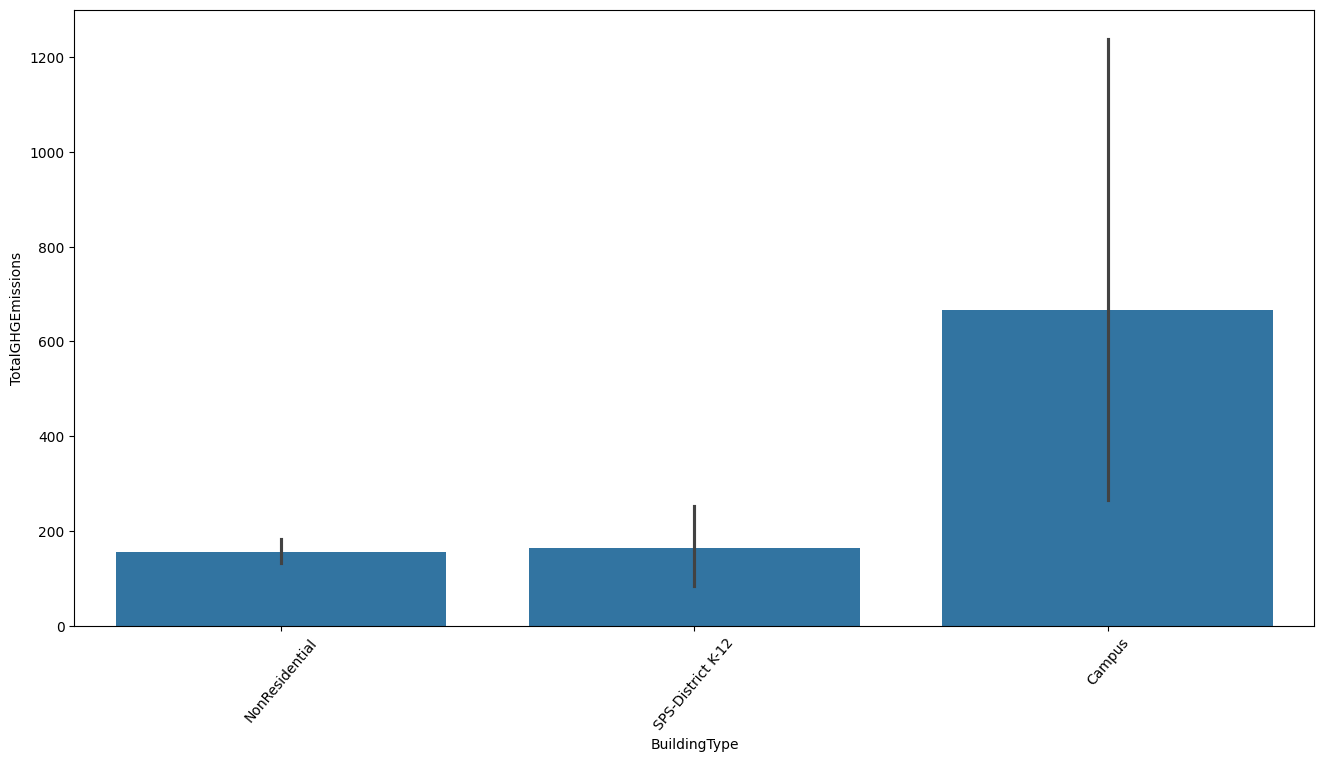

In [168]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'BuildingType',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

### 7.4.2 Building type - Site Energy Use

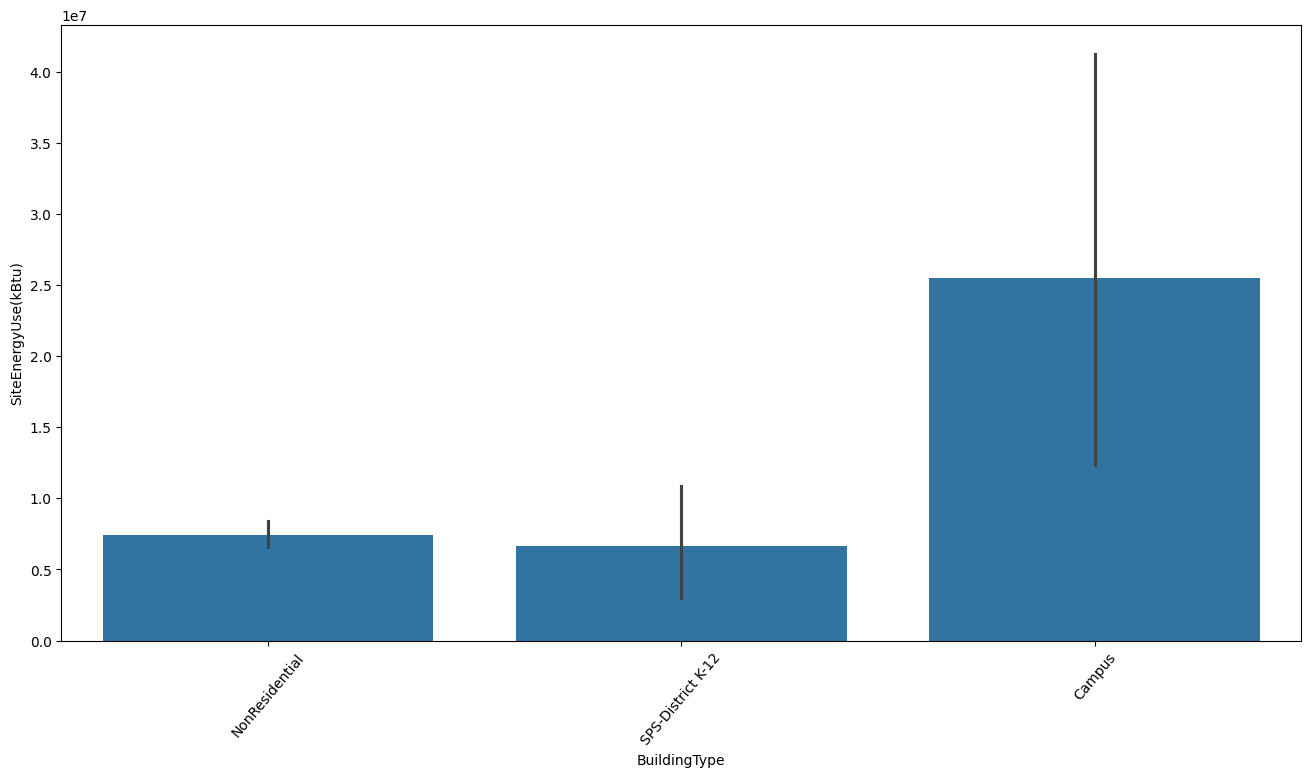

In [169]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'BuildingType',y = 'SiteEnergyUse(kBtu)')
plt.xticks(rotation = 50)
plt.show()

Campuses have the highest energy consumption, since I deleted residence hall (student housing) it is not related to places where students live.

### 7.4.3 PrimaryPropertyType - GHG Emissions

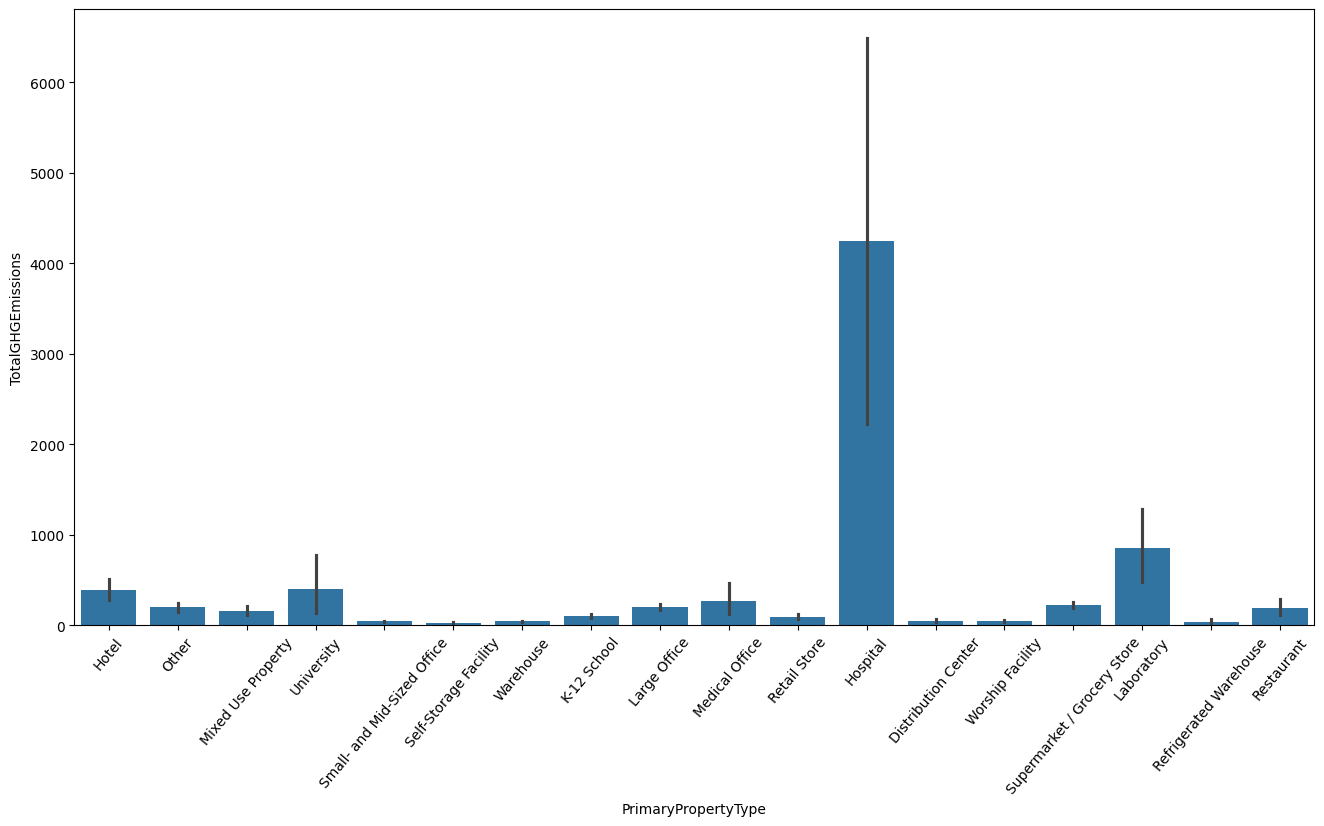

In [170]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'PrimaryPropertyType',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

Hospitals, laboratories and universities have a the highest GHG Emissions

Some property types have very few values while other, like hospitals, are predominant. To try to equilibrate proterties types given to the model and avoid having types that are predominant, this is because the model might then be skewed and be better adjusted to the predominant property types. It would be less accurate with other types of  buildings.

In [171]:
buildings.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office', 'Medical Office',
       'Retail Store', 'Hospital', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

#### 7.4.3.1 Grouping several primary property types

In [172]:
#Creating variables with the new string values to avoid type warning
new_value = 'Offices'
new_value_2 = 'Mixed Use Property and Other'
new_value_3 = 'Retail and Supermarkets'
new_value_4 = 'Storage Facilities' 

In [173]:
#Making sure that 
buildings.PrimaryPropertyType.astype('str')

0                    Hotel
1                    Hotel
2                    Hotel
3                    Hotel
4                    Hotel
               ...        
3370                 Other
3372                 Other
3373                 Other
3374    Mixed Use Property
3375    Mixed Use Property
Name: PrimaryPropertyType, Length: 1497, dtype: object

In [174]:
#Grouping all kind of offices
buildings.loc[buildings['PrimaryPropertyType'].str.contains('Small- and Mid-Sized Office|Large Office|Medical Office'),
              'PrimaryPropertyType'] = new_value

In [175]:
#Grouping all mixed used properties and other
buildings.loc[buildings['PrimaryPropertyType'].str.contains('Mixed Use Property|Other'),'PrimaryPropertyType'] = new_value_2

In [176]:
#Grouping retail stores and supermarket, although alimentation stores might use more energy, there are both stores
buildings.loc[buildings['PrimaryPropertyType'].str.contains('Retail Store|Supermarket / Grocery Store'),'PrimaryPropertyType'] = new_value_3

In [177]:
#Grouping self storage facility and warehouses and distribution center. They all consist in a storage for various goods
buildings.loc[buildings['PrimaryPropertyType'].str.contains('Self-Storage Facility|Warehouse|Distribution Center'),
              'PrimaryPropertyType'] = new_value_4

In [178]:
buildings.PrimaryPropertyType.unique()

array(['Hotel', 'Mixed Use Property and Other', 'University', 'Offices',
       'Storage Facilities', 'K-12 School', 'Retail and Supermarkets',
       'Hospital', 'Worship Facility', 'Laboratory', 'Restaurant'],
      dtype=object)

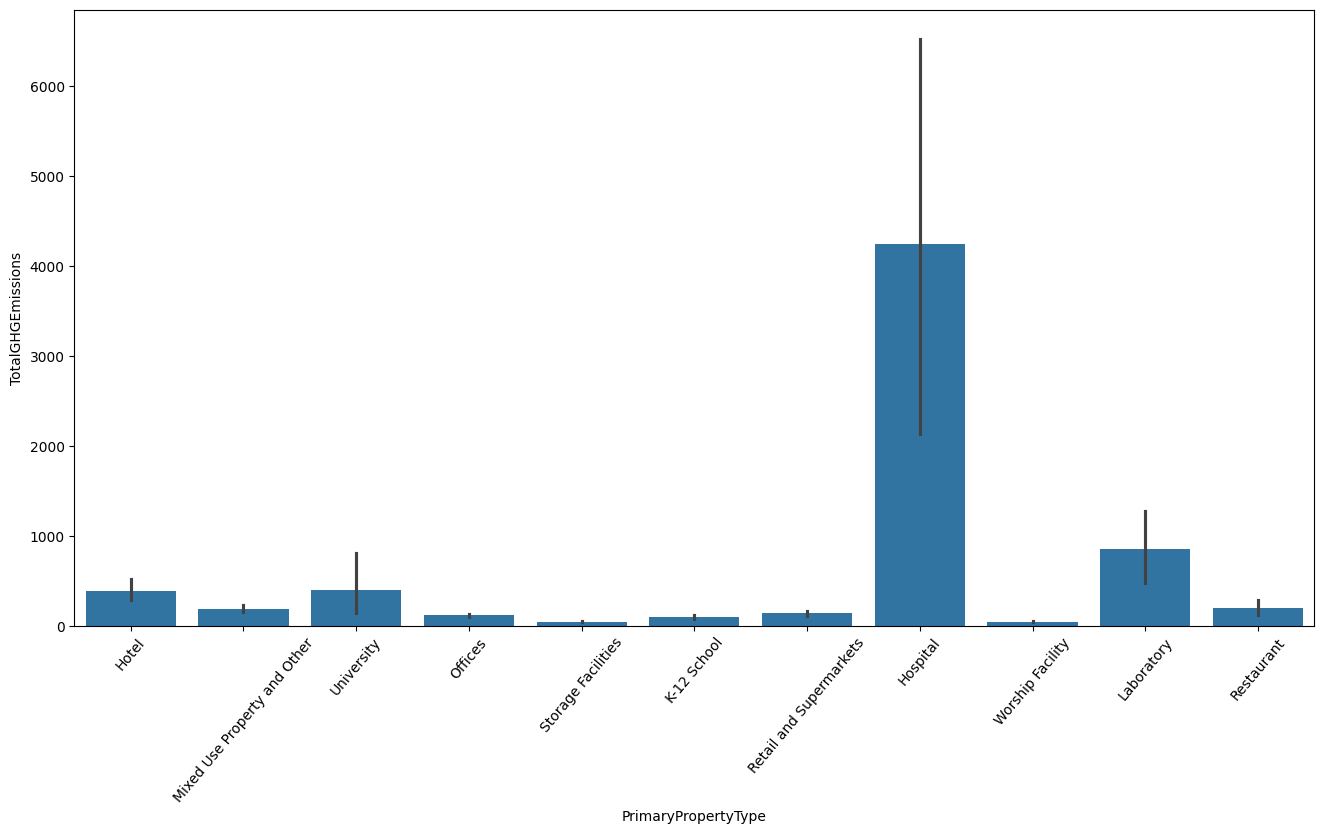

In [179]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'PrimaryPropertyType',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

### 7.4.4 PrimaryPropertyType - Site Energy Use

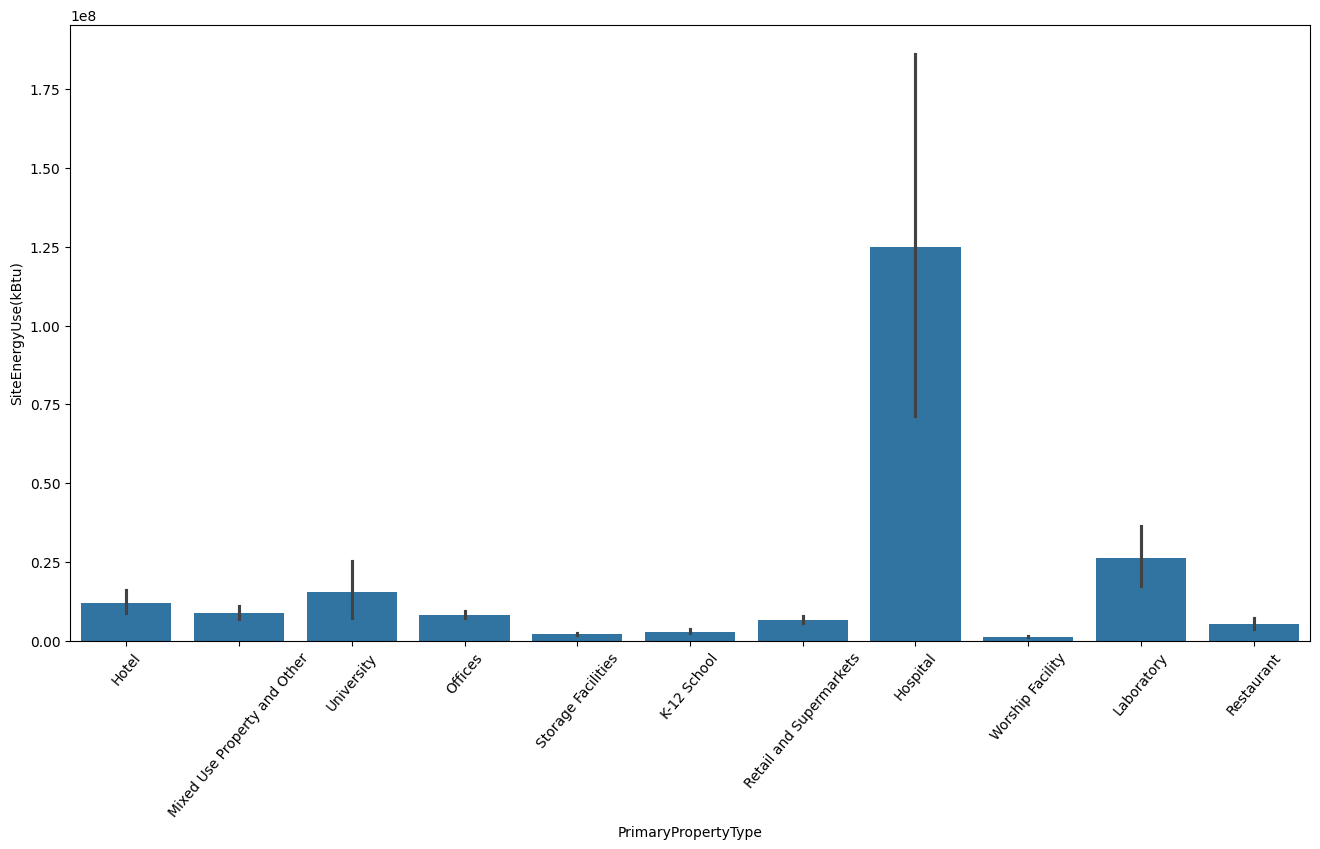

In [180]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'PrimaryPropertyType',y = 'SiteEnergyUse(kBtu)')
plt.xticks(rotation = 50)
plt.show()

Hospitals, laboratories and universities have a the highest energy consumption

## 7.5 LargestPropertyUseType & SecondLargestPropertyUseType & ThirdLargestPropertyUseType

### 7.5.1 LargestPropertyUseType

In [181]:
buildings['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'K-12 School', 'Other - Mall',
       'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Other/Specialty Hospital',
       'Financial Office', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other - Recreation', 'Lifestyle Center',
       'Othe

Too many values are possible in this category, to avoid adding too many columns when encoding the data, I will group some categories.

In [182]:
Largest_value_1 = 'Office'
Largest_value_2 = 'Hospital'
Largest_value_3 = 'Warehouse'
Largest_value_4 = 'School'
Largest_value_5 = 'Repair and Public Services'
Largest_value_6 = 'Food/Drink Services'
Largest_value_7 = 'Retail/Mall'
Largest_value_8 = 'Recreational Venues'

# Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
replacement_mapping = {
    'Medical Office': Largest_value_1,
    'Office': Largest_value_1,
    'Financial Office': Largest_value_1,
    'Hospital (General Medical & Surgical)': Largest_value_2,
    'Other/Specialty Hospital': Largest_value_2,
    'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
    'Non-Refrigerated Warehouse': Largest_value_3,
    'Self-Storage Facility': Largest_value_3,
    'Distribution Center': Largest_value_3,
    'Refrigerated Warehouse': Largest_value_3,
    'College/University': Largest_value_4,
    'K-12 School': Largest_value_4,
    'Other - Education': Largest_value_4,
    'Adult Education': Largest_value_4,
    'Pre-school/Daycare': Largest_value_4,
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
    'Other - Services': Largest_value_5,
    'Other - Public Services': Largest_value_5,
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
    'Restaurant': Largest_value_6,
    'Other - Restaurant/Bar': Largest_value_6,
    'Food Service': Largest_value_6,
    'Supermarket/Grocery Store': Largest_value_6,
    'Other - Mall' : Largest_value_7,
    'Strip Mall' : Largest_value_7,
    'Retail Store' : Largest_value_7,
    'Wholesale Club/Supercenter' : Largest_value_7,
    'Other - Entertainment/Public Assembly' : Largest_value_8,
    'Other - Recreation' : Largest_value_8,
    'Social/Meeting Hall' : Largest_value_8,
    'Movie Theater' : Largest_value_8
}

# Replacing the values
buildings['LargestPropertyUseType'] = buildings['LargestPropertyUseType'].replace(replacement_mapping)

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/2661223415.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings['LargestPropertyUseType'] = buildings['LargestPropertyUseType'].replace(replacement_mapping)


In [183]:
buildings['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Recreational Venues', 'Library',
       'Fitness Center/Health Club/Gym', 'Courthouse', 'Other', 'School',
       'Automobile Dealership', 'Office', 'Warehouse', 'Retail/Mall',
       'Hospital', 'Museum', 'Repair and Public Services',
       'Other - Lodging/Residential', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Food/Drink Services', 'Data Center',
       'Laboratory', nan, 'Manufacturing/Industrial Plant',
       'Lifestyle Center', 'Fire Station', 'Performing Arts',
       'Residential Care Facility', 'Bank Branch', 'Other - Utility',
       'Residence Hall/Dormitory', 'Prison/Incarceration'], dtype=object)

We can see that a few residential building remain : Other - Lodging/Residential, Multifamily Housing, Residence Hall/Dormitory, Residential Care Facility

In [184]:
#Turning all values in LargestPropertyUseType into strings
buildings['LargestPropertyUseType'] = buildings['LargestPropertyUseType'].astype(str)

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/3328457980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings['LargestPropertyUseType'] = buildings['LargestPropertyUseType'].astype(str)


In [185]:
#Deleting building with a residential largest Property Type 
buildings = buildings.loc[~buildings['LargestPropertyUseType'].str.contains("Other - Lodging/Residential|Multifamily Housing|Residence Hall/Dormitory|Residential Care Facility")]

In [186]:
buildings['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Recreational Venues', 'Library',
       'Fitness Center/Health Club/Gym', 'Courthouse', 'Other', 'School',
       'Automobile Dealership', 'Office', 'Warehouse', 'Retail/Mall',
       'Hospital', 'Museum', 'Repair and Public Services', 'Parking',
       'Worship Facility', 'Food/Drink Services', 'Data Center',
       'Laboratory', 'nan', 'Manufacturing/Industrial Plant',
       'Lifestyle Center', 'Fire Station', 'Performing Arts',
       'Bank Branch', 'Other - Utility', 'Prison/Incarceration'],
      dtype=object)

Null values in LargestPropertyUseType are now identified as "nan"

#### 7.5.1.1 LargestPropertyUseType - Site Energy Use

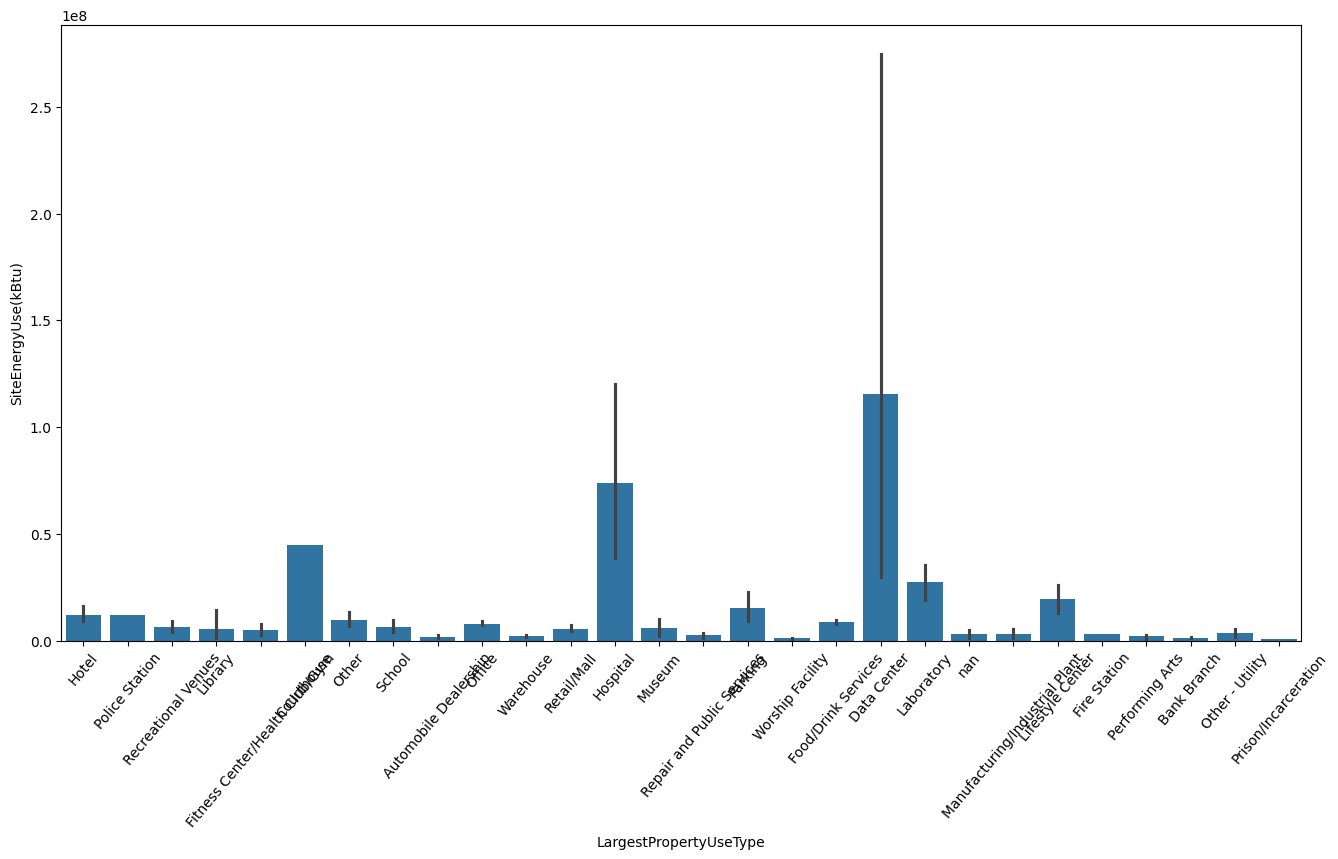

In [187]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'LargestPropertyUseType',y = 'SiteEnergyUse(kBtu)')
plt.xticks(rotation = 50)
plt.show()

In terms of Site Energy Use, the most demanding properties are food and drink services and Hospitals and fitness center

#### 7.5.1.2 LargestPropertyUseType - GHG Emissions

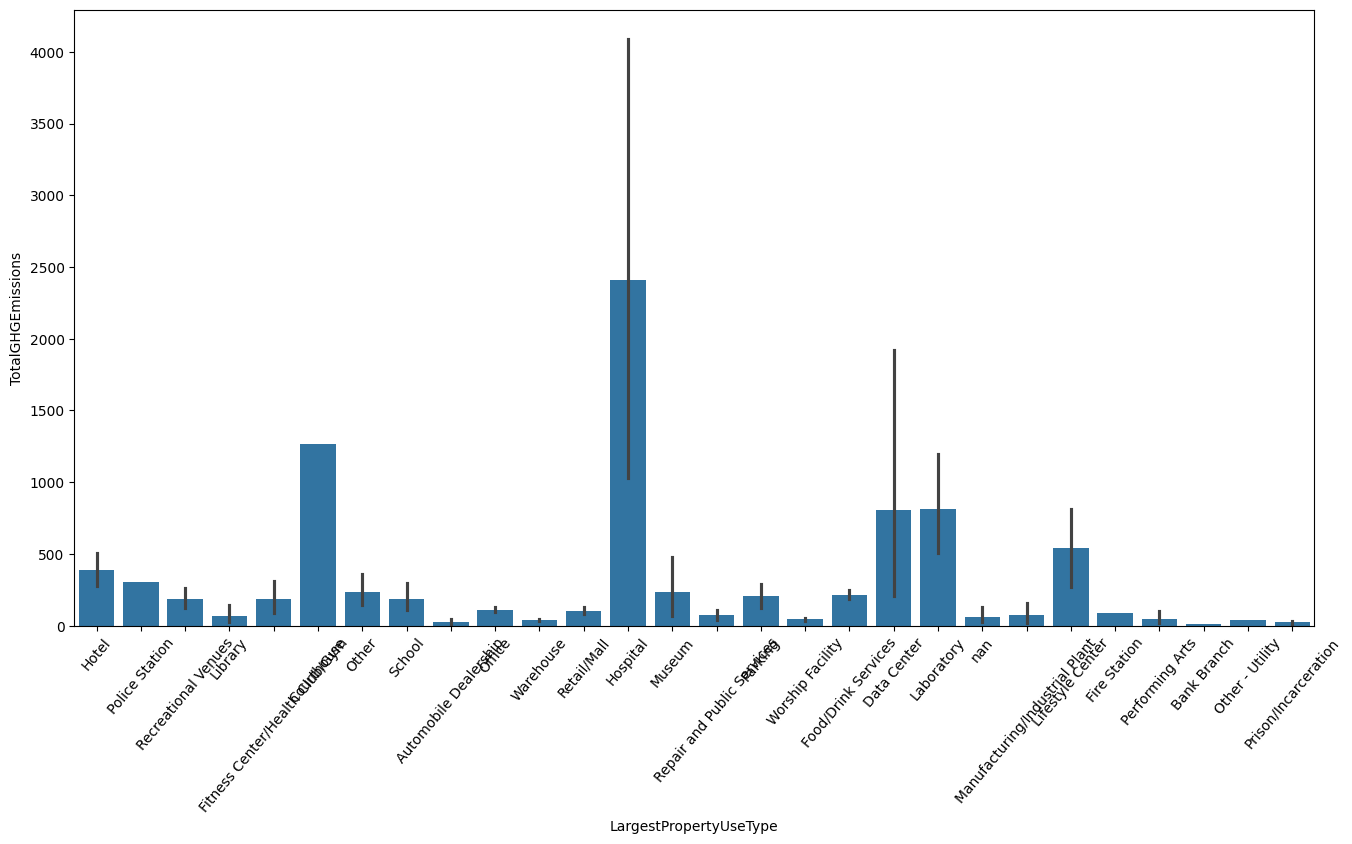

In [188]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'LargestPropertyUseType',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

In terms of Site Energy Use, the most demanding properties are food & drink services, Hospitals Fitness center and laboratories

### 7.5.2 SecondLargestPropertyUseType

In [189]:
buildings['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Refrigerated Warehouse', 'Non-Refrigerated Warehouse',
       'Other - Education', 'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Laboratory', 'Movie Theater', 'Other - Recreation',
       'Convenience Store without Gas Station', 'Performing Arts',
       'College/University', 'Supermarket/Grocery Store',
       'Other - Restaurant/Bar', 'Adult Education', 'Medical Office',
       'Enclosed Mall', 'Multifamily Housing', 'Bar/Nightclub',
       'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health Club/Gym', 'H

Too many values are possible in this category, to avoid adding too many columns when encoding the data, I will group some categories.

In [190]:
Largest_value_1 = 'Office'
Largest_value_2 = 'Hospital'
Largest_value_3 = 'Warehouse'
Largest_value_4 = 'School'
Largest_value_5 = 'Repair and Public Services'
Largest_value_6 = 'Food/Drink Services'
Largest_value_7 = 'Retail/Mall'
Largest_value_8 = 'Recreational Venues'

# Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
replacement_mapping = {
    'Medical Office': Largest_value_1,
    'Office': Largest_value_1,
    'Financial Office': Largest_value_1,
    'Hospital (General Medical & Surgical)': Largest_value_2,
    'Other/Specialty Hospital': Largest_value_2,
    'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
    'Non-Refrigerated Warehouse': Largest_value_3,
    'Self-Storage Facility': Largest_value_3,
    'Distribution Center': Largest_value_3,
    'Refrigerated Warehouse': Largest_value_3,
    'College/University': Largest_value_4,
    'K-12 School': Largest_value_4,
    'Other - Education': Largest_value_4,
    'Adult Education': Largest_value_4,
    'Pre-school/Daycare': Largest_value_4,
    'Vocational School' : Largest_value_4,
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
    'Other - Services': Largest_value_5,
    'Other - Public Services': Largest_value_5,
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
    'Restaurant': Largest_value_6,
    'Other - Restaurant/Bar': Largest_value_6,
    'Food Service': Largest_value_6,
    'Supermarket/Grocery Store': Largest_value_6,
    'Convenience Store without Gas Station' : Largest_value_6,
    'Food Sales' : Largest_value_6,
    'Other - Mall' : Largest_value_7,
    'Strip Mall' : Largest_value_7,
    'Retail Store' : Largest_value_7,
    'Wholesale Club/Supercenter' : Largest_value_7,
    'Enclosed Mall' : Largest_value_7,
    'Other - Entertainment/Public Assembly' : Largest_value_8,
    'Other - Recreation' : Largest_value_8,
    'Social/Meeting Hall' : Largest_value_8,
    'Bar/Nightclub' : Largest_value_8,
    'Movie Theater' : Largest_value_8
}

# Replacing the values
buildings['SecondLargestPropertyUseType'] = buildings['SecondLargestPropertyUseType'].replace(replacement_mapping)

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/451800776.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings['SecondLargestPropertyUseType'] = buildings['SecondLargestPropertyUseType'].replace(replacement_mapping)


In [191]:
buildings['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Office', 'Food/Drink Services', 'School',
       'Warehouse', 'Retail/Mall', 'Repair and Public Services',
       'Recreational Venues', 'Data Center', 'Swimming Pool', 'Other',
       'Courthouse', 'Residence Hall/Dormitory', 'Laboratory',
       'Performing Arts', 'Multifamily Housing',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health Club/Gym', 'Hotel',
       'Worship Facility', 'Hospital', 'Automobile Dealership'],
      dtype=object)

#### 7.5.2.1 SecondLargestPropertyUseType - Site Energy Use

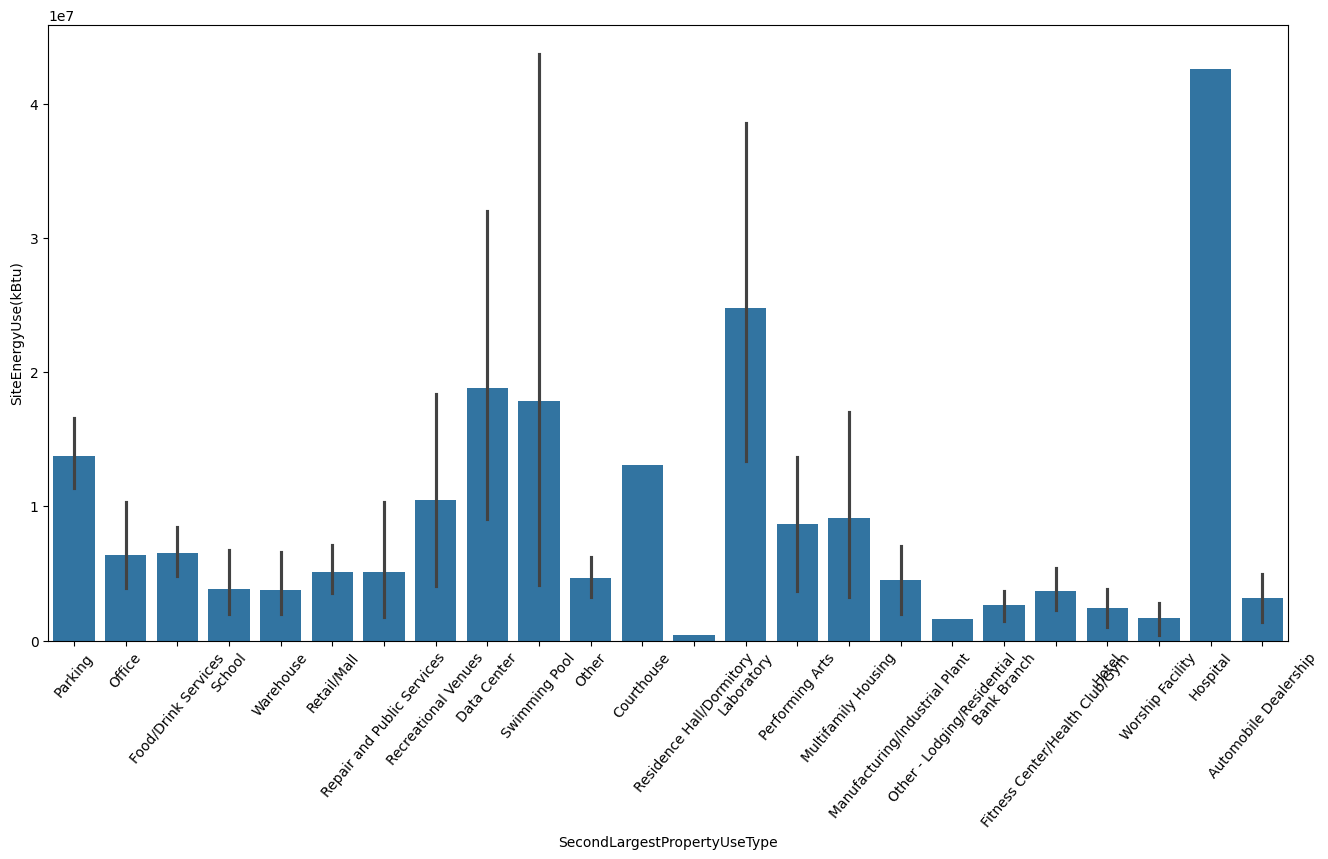

In [192]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'SecondLargestPropertyUseType',y = 'SiteEnergyUse(kBtu)')
plt.xticks(rotation = 50)
plt.show()

Laboratory, hospital

#### 7.5.2.2 SecondLargestPropertyUseType - GHG Emissions

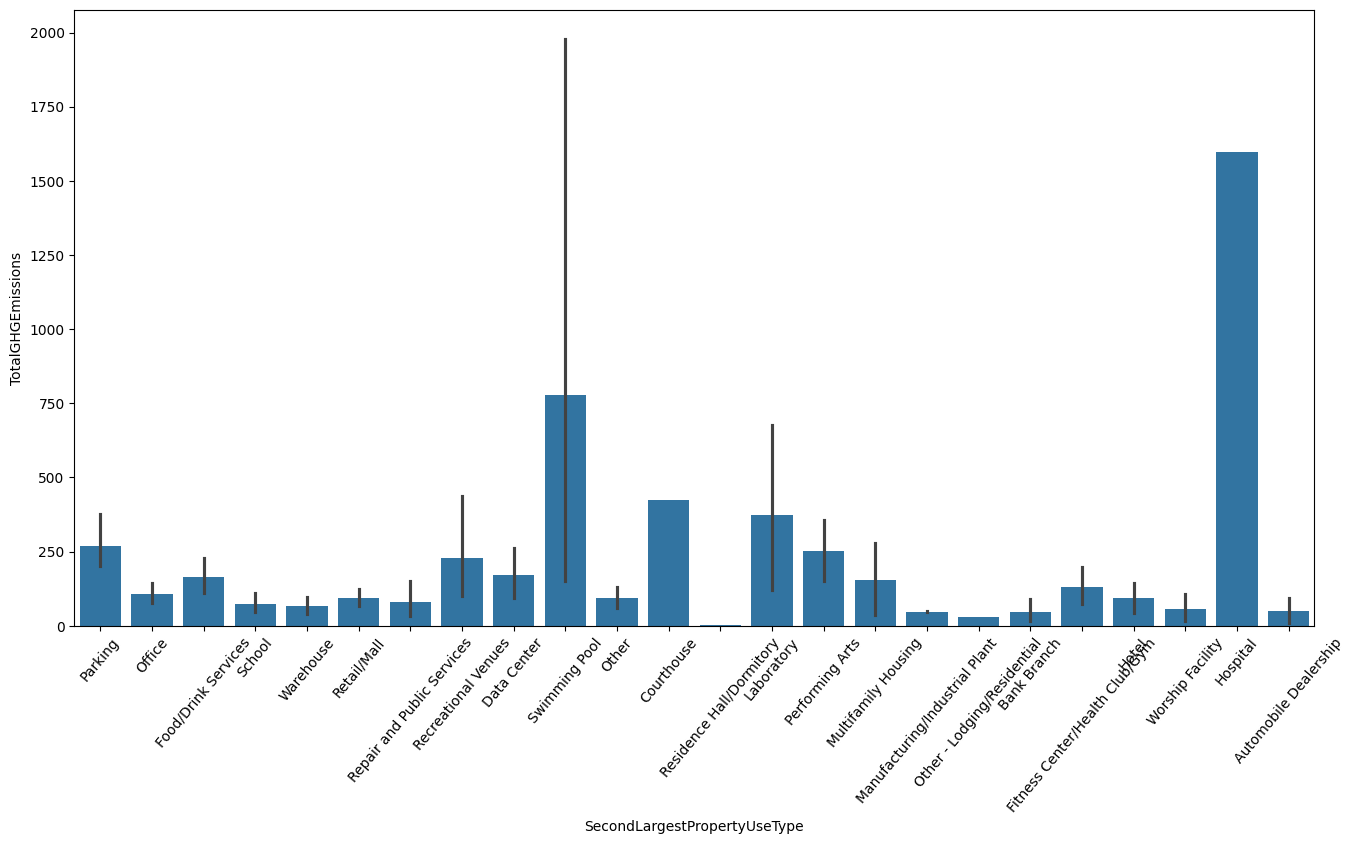

In [193]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'SecondLargestPropertyUseType',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

### 7.5.3 ThirdLargestPropertyUseType

In [194]:
buildings['ThirdLargestPropertyUseType'].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly', 'Other',
       'Distribution Center', 'Other - Services', 'Medical Office',
       'Parking', 'Food Service', 'Other - Utility',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Pre-school/Daycare', 'Convenience Store without Gas Station',
       'Financial Office', 'Non-Refrigerated Warehouse',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Bar/Nightclub', 'Manufacturing/Industrial Plant',
       'Other/Specialty Hospital', 'Fast Food Restaurant', 'K-12 School',
       'Supermarket/Grocery Store', 'Strip Mall', 'Vocational School'],
      dtype=object)

In [195]:
Largest_value_1 = 'Office'
Largest_value_2 = 'Hospital'
Largest_value_3 = 'Warehouse'
Largest_value_4 = 'School'
Largest_value_5 = 'Repair and Public Services'
Largest_value_6 = 'Food/Drink Services'
Largest_value_7 = 'Retail/Mall'
Largest_value_8 = 'Recreational Venues'

# Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
replacement_mapping = {
    'Medical Office': Largest_value_1,
    'Office': Largest_value_1,
    'Financial Office': Largest_value_1,
    'Hospital (General Medical & Surgical)': Largest_value_2,
    'Other/Specialty Hospital': Largest_value_2,
    'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
    'Non-Refrigerated Warehouse': Largest_value_3,
    'Self-Storage Facility': Largest_value_3,
    'Distribution Center': Largest_value_3,
    'Refrigerated Warehouse': Largest_value_3,
    'College/University': Largest_value_4,
    'K-12 School': Largest_value_4,
    'Other - Education': Largest_value_4,
    'Adult Education': Largest_value_4,
    'Pre-school/Daycare': Largest_value_4,
    'Vocational School' : Largest_value_4,
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
    'Other - Services': Largest_value_5,
    'Other - Public Services': Largest_value_5,
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
    'Restaurant': Largest_value_6,
    'Other - Restaurant/Bar': Largest_value_6,
    'Food Service': Largest_value_6,
    'Supermarket/Grocery Store': Largest_value_6,
    'Convenience Store without Gas Station' : Largest_value_6,
    'Food Sales' : Largest_value_6,
    'Other - Mall' : Largest_value_7,
    'Strip Mall' : Largest_value_7,
    'Retail Store' : Largest_value_7,
    'Wholesale Club/Supercenter' : Largest_value_7,
    'Enclosed Mall' : Largest_value_7,
    'Other - Entertainment/Public Assembly' : Largest_value_8,
    'Other - Recreation' : Largest_value_8,
    'Social/Meeting Hall' : Largest_value_8,
    'Bar/Nightclub' : Largest_value_8,
    'Movie Theater' : Largest_value_8
}

# Replacing the values
buildings['ThirdLargestPropertyUseType'] = buildings['ThirdLargestPropertyUseType'].replace(replacement_mapping)

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/4015611216.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings['ThirdLargestPropertyUseType'] = buildings['ThirdLargestPropertyUseType'].replace(replacement_mapping)


In [196]:
buildings['ThirdLargestPropertyUseType'].unique()

array([nan, 'Food/Drink Services', 'Swimming Pool', 'Data Center',
       'Office', 'Retail/Mall', 'Recreational Venues', 'Other',
       'Warehouse', 'Repair and Public Services', 'Parking',
       'Other - Utility', 'Fitness Center/Health Club/Gym', 'School',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Other - Technology/Science', 'Manufacturing/Industrial Plant',
       'Hospital', 'Fast Food Restaurant'], dtype=object)

#### 7.5.3.1 ThirdLargestPropertyUseType - Site Energy Use

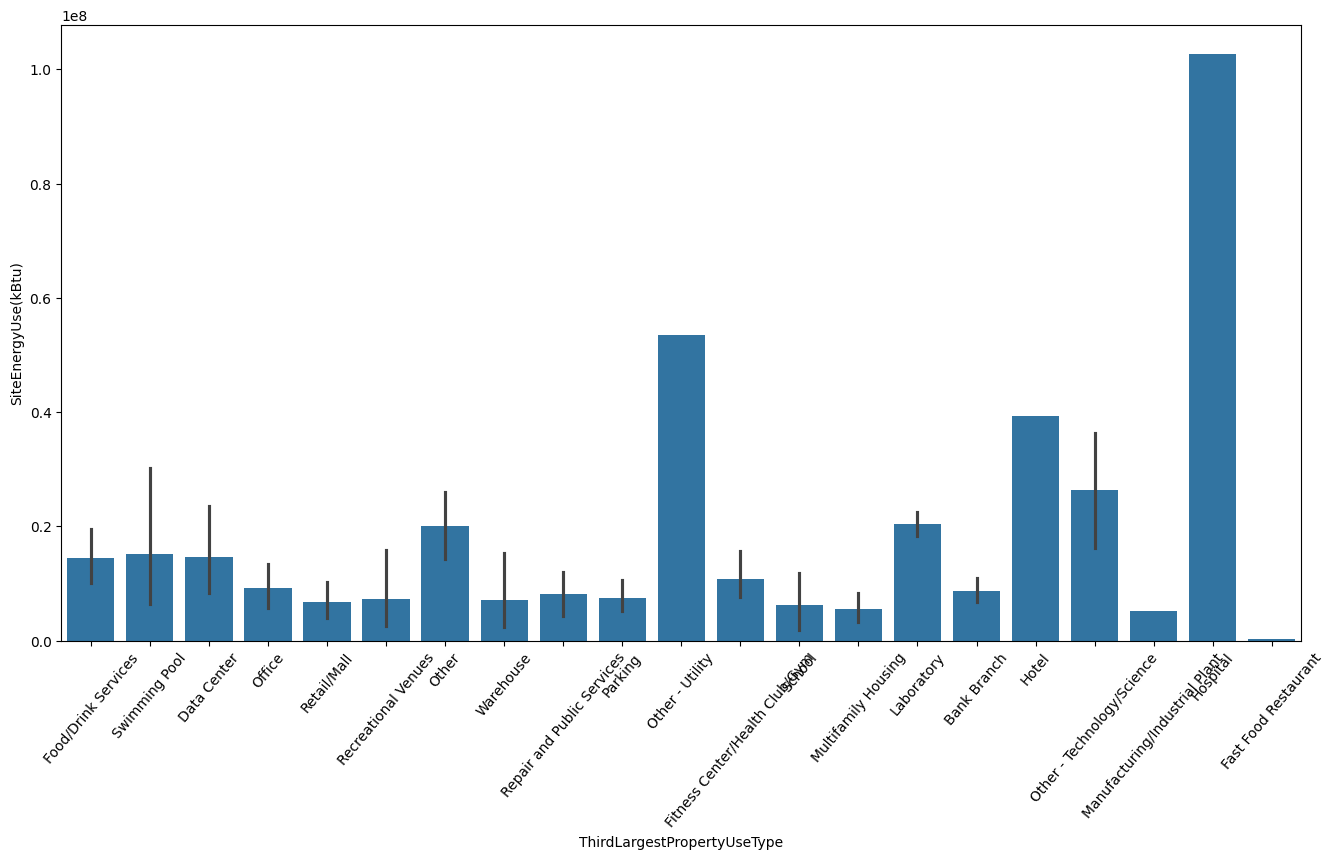

In [197]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'ThirdLargestPropertyUseType',y = 'SiteEnergyUse(kBtu)')
plt.xticks(rotation = 50)
plt.show()

Warehouse, hospital,hotel

#### 7.5.3.2 ThirdLargestPropertyUseType - GHG Emissions

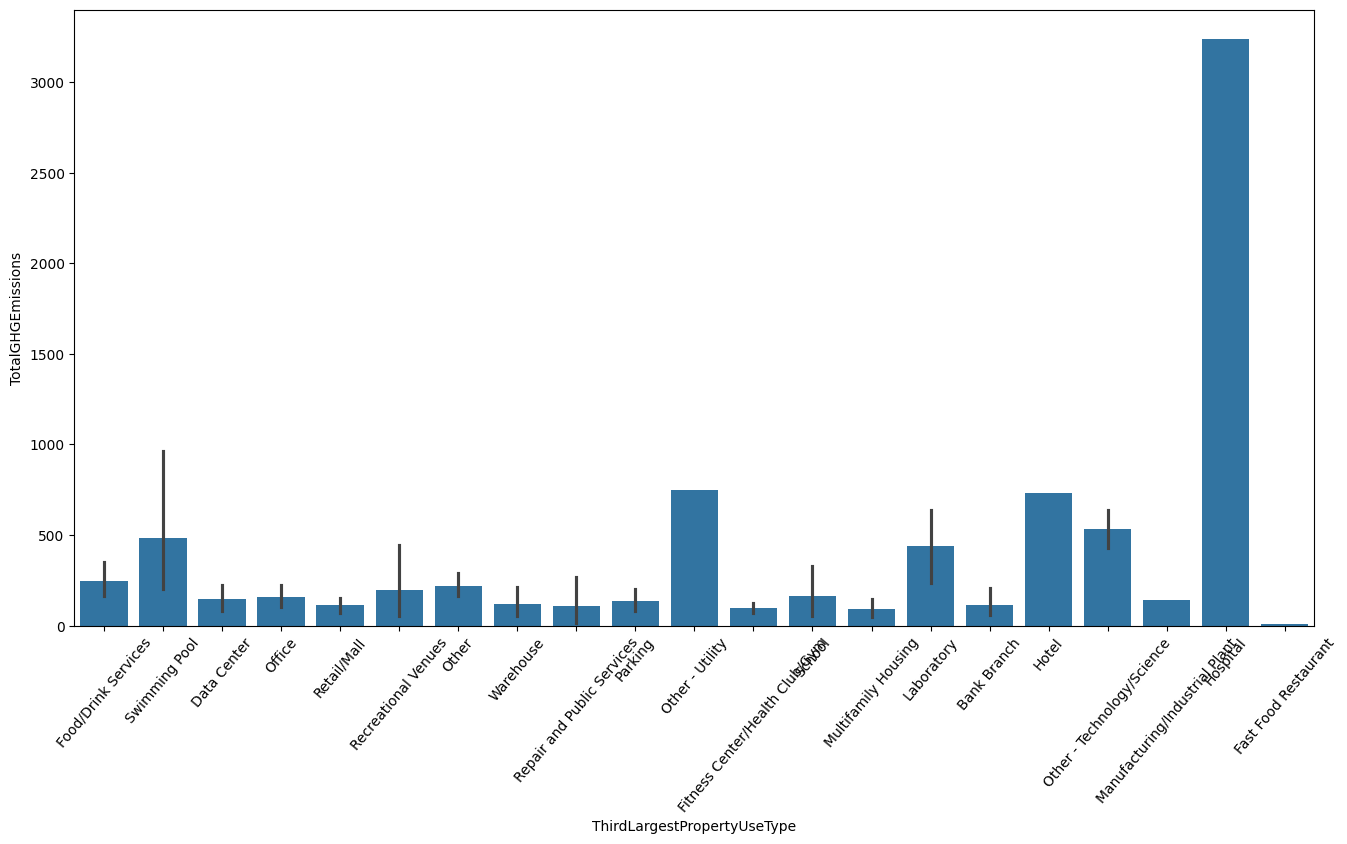

In [198]:
#Using a barplot with default estimator (mean) to find out which districts tend to have the highest energy consumption
plt.figure(figsize = (16,8))
sns.barplot(data = buildings, x = 'ThirdLargestPropertyUseType',y = 'TotalGHGEmissions')
plt.xticks(rotation = 50)
plt.show()

# 8. Function to apply all above changes to the initial dataset

In [199]:
buildings_data = pd.read_csv("Building_Energy_Benchmarking.csv")

def first_treatments_2(df):
    #Deleting non residential buildings
    df = df.loc[df['BuildingType'].str.contains("NonResidential|Nonresidential COS|SPS-District K-12|Campus|Nonresidential WA")]
    #Deleting the Residence Halls
    df = df.loc[df['PrimaryPropertyType'] != 'Residence Hall']
    #Deleting Senior Care Community
    df = df.loc[df['PrimaryPropertyType'] != 'Senior Care Community']
    #Deleting Low-Rise Multifamily
    df = df.loc[df['PrimaryPropertyType'] != 'Low-Rise Multifamily']
    #Dropping unecessary columns
    df = df.drop(columns = ['OSEBuildingID','DataYear','Comments','City','State','TaxParcelIdentificationNumber'])
    #Turning 0s into 1 for the number of buildings
    df.loc[df['NumberofBuildings'] == 0, ['NumberofBuildings']] = 1
    #Deleting properties above 30 buildings
    df = df.loc[df['NumberofBuildings'] < 30]
    #Deleting the chinese baptist church
    df = df.loc[df['PropertyName'] != 'Seattle Chinese Baptist Church']
    
    #Deleting outliers in LargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Entire Campus']
    df = df.loc[df['PropertyName'] != 'Columbia Center - 2015']
    df = df.loc[df['PropertyName'] != 'Swedish First Hill']
    df = df.loc[df['PropertyName'] != 'CenturyLink']

    #Deleting outliers in SecondLargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Washington State Convention Center']
    df = df.loc[df['PropertyName'] != 'Plant 2 Site']

    #Deleting outliers in ThirdLargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Russell Investments Center']
    
    #Deleting wheather normalized variables
    df = df.drop(columns = ['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'])

    #Deleting buildings with default data
    df = df.loc[df['DefaultData'] == False]
    #Deleting non compliant buildings
    df = df.loc[df['ComplianceStatus'] == 'Compliant']
    
    #Grouping neighborhoods based on their names
    #Turning Nort into NORTH
    df.loc[df['Neighborhood'].str.contains('NORTH|North'), 'Neighborhood'] = 'NORTH'
    #Turning Delridge into DELRIDGE
    df.loc[df['Neighborhood'].str.contains('DELRIDGE|DELRIDGE NEIGHBORHOODS|Delridge'), 'Neighborhood'] = 'DELRIDGE'
    #Ballard into BALLARD
    df.loc[df['Neighborhood'].str.contains('BALLARD|Ballard'), 'Neighborhood'] = 'BALLARD'
    #Northwest into NORTHWEST
    df.loc[df['Neighborhood'].str.contains('NORTHWEST|Northwest'), 'Neighborhood'] = 'NORTHWEST'
    #Central into CENTRAL
    df.loc[df['Neighborhood'].str.contains('CENTRAL|Central'), 'Neighborhood'] = 'CENTRAL'
    #Turning all non residential buildings into the same label 'NonResidential'
    df.loc[df['BuildingType'].str.contains('Nonresidential COS|Nonresidential WA'), ['BuildingType']] = 'NonResidential'
    
    #Grouping primary property types
    new_value = 'Offices'
    new_value_2 = 'Mixed Use Property and Other'
    new_value_3 = 'Retail and Supermarkets'
    new_value_4 = 'Storage Facilities'
    
    #Grouping all kind of offices
    df.loc[df['PrimaryPropertyType'].str.contains('Small- and Mid-Sized Office|Large Office|Medical Office'),
                  'PrimaryPropertyType'] = new_value
    
    #Grouping all mixed used properties and other
    df.loc[df['PrimaryPropertyType'].str.contains('Mixed Use Property|Other'),'PrimaryPropertyType'] = new_value_2
    
    #Grouping retail stores and supermarket, although alimentation stores might use more energy, there are both stores
    df.loc[df['PrimaryPropertyType'].str.contains('Retail Store|Supermarket / Grocery Store'),'PrimaryPropertyType'] = new_value_3
    
    #Grouping self storage facility and warehouses and distribution center. They all consist in a storage for various goods
    df.loc[df['PrimaryPropertyType'].str.contains('Self-Storage Facility|Warehouse|Distribution Center'),
                  'PrimaryPropertyType'] = new_value_4


    #LargestPropertyUseType Treatments
    #Turning all values in LargestPropertyUseType into strings
    df['LargestPropertyUseType'] = df['LargestPropertyUseType'].astype(str)

    #Deleting building with a residential largest Property Type 
    df = df.loc[~df['LargestPropertyUseType'].str.contains("Other - Lodging/Residential|Multifamily Housing|Residence Hall/Dormitory|Residential Care Facility")]
    
    Largest_value_1 = 'Office'
    Largest_value_2 = 'Hospital'
    Largest_value_3 = 'Warehouse'
    Largest_value_4 = 'School'
    Largest_value_5 = 'Repair and Public Services'
    Largest_value_6 = 'Food/Drink Services'
    Largest_value_7 = 'Retail/Mall'
    Largest_value_8 = 'Recreational Venues'

    # Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
    replacement_mapping = {
        'Medical Office': Largest_value_1,
        'Office': Largest_value_1,
        'Financial Office': Largest_value_1,
        'Hospital (General Medical & Surgical)': Largest_value_2,
        'Other/Specialty Hospital': Largest_value_2,
        'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
        'Non-Refrigerated Warehouse': Largest_value_3,
        'Self-Storage Facility': Largest_value_3,
        'Distribution Center': Largest_value_3,
        'Refrigerated Warehouse': Largest_value_3,
        'College/University': Largest_value_4,
        'K-12 School': Largest_value_4,
        'Other - Education': Largest_value_4,
        'Adult Education': Largest_value_4,
        'Pre-school/Daycare': Largest_value_4,
        'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
        'Other - Services': Largest_value_5,
        'Other - Public Services': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Restaurant': Largest_value_6,
        'Other - Restaurant/Bar': Largest_value_6,
        'Food Service': Largest_value_6,
        'Supermarket/Grocery Store': Largest_value_6,
        'Other - Mall' : Largest_value_7,
        'Strip Mall' : Largest_value_7,
        'Retail Store' : Largest_value_7,
        'Wholesale Club/Supercenter' : Largest_value_7,
        'Other - Entertainment/Public Assembly' : Largest_value_8,
        'Other - Recreation' : Largest_value_8,
        'Social/Meeting Hall' : Largest_value_8,
        'Movie Theater' : Largest_value_8
    }
    
    # Replacing the values
    df['LargestPropertyUseType'] = df['LargestPropertyUseType'].replace(replacement_mapping)

    #SecondLargestPropertyUseType Treatments
    Largest_value_1 = 'Office'
    Largest_value_2 = 'Hospital'
    Largest_value_3 = 'Warehouse'
    Largest_value_4 = 'School'
    Largest_value_5 = 'Repair and Public Services'
    Largest_value_6 = 'Food/Drink Services'
    Largest_value_7 = 'Retail/Mall'
    Largest_value_8 = 'Recreational Venues'
    
    # Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
    replacement_mapping = {
        'Medical Office': Largest_value_1,
        'Office': Largest_value_1,
        'Financial Office': Largest_value_1,
        'Hospital (General Medical & Surgical)': Largest_value_2,
        'Other/Specialty Hospital': Largest_value_2,
        'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
        'Non-Refrigerated Warehouse': Largest_value_3,
        'Self-Storage Facility': Largest_value_3,
        'Distribution Center': Largest_value_3,
        'Refrigerated Warehouse': Largest_value_3,
        'College/University': Largest_value_4,
        'K-12 School': Largest_value_4,
        'Other - Education': Largest_value_4,
        'Adult Education': Largest_value_4,
        'Pre-school/Daycare': Largest_value_4,
        'Vocational School' : Largest_value_4,
        'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Other - Services': Largest_value_5,
        'Other - Public Services': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Restaurant': Largest_value_6,
        'Other - Restaurant/Bar': Largest_value_6,
        'Food Service': Largest_value_6,
        'Supermarket/Grocery Store': Largest_value_6,
        'Convenience Store without Gas Station' : Largest_value_6,
        'Food Sales' : Largest_value_6,
        'Other - Mall' : Largest_value_7,
        'Strip Mall' : Largest_value_7,
        'Retail Store' : Largest_value_7,
        'Wholesale Club/Supercenter' : Largest_value_7,
        'Enclosed Mall' : Largest_value_7,
        'Other - Entertainment/Public Assembly' : Largest_value_8,
        'Other - Recreation' : Largest_value_8,
        'Social/Meeting Hall' : Largest_value_8,
        'Bar/Nightclub' : Largest_value_8,
        'Movie Theater' : Largest_value_8
    }
    
    # Replacing the values
    df['SecondLargestPropertyUseType'] = df['SecondLargestPropertyUseType'].replace(replacement_mapping)

    #ThirdLargestPropertyUseType Treatments
    Largest_value_1 = 'Office'
    Largest_value_2 = 'Hospital'
    Largest_value_3 = 'Warehouse'
    Largest_value_4 = 'School'
    Largest_value_5 = 'Repair and Public Services'
    Largest_value_6 = 'Food/Drink Services'
    Largest_value_7 = 'Retail/Mall'
    Largest_value_8 = 'Recreational Venues'
    
    # Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
    replacement_mapping = {
        'Medical Office': Largest_value_1,
        'Office': Largest_value_1,
        'Financial Office': Largest_value_1,
        'Hospital (General Medical & Surgical)': Largest_value_2,
        'Other/Specialty Hospital': Largest_value_2,
        'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
        'Non-Refrigerated Warehouse': Largest_value_3,
        'Self-Storage Facility': Largest_value_3,
        'Distribution Center': Largest_value_3,
        'Refrigerated Warehouse': Largest_value_3,
        'College/University': Largest_value_4,
        'K-12 School': Largest_value_4,
        'Other - Education': Largest_value_4,
        'Adult Education': Largest_value_4,
        'Pre-school/Daycare': Largest_value_4,
        'Vocational School' : Largest_value_4,
        'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Other - Services': Largest_value_5,
        'Other - Public Services': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Restaurant': Largest_value_6,
        'Other - Restaurant/Bar': Largest_value_6,
        'Food Service': Largest_value_6,
        'Supermarket/Grocery Store': Largest_value_6,
        'Convenience Store without Gas Station' : Largest_value_6,
        'Food Sales' : Largest_value_6,
        'Other - Mall' : Largest_value_7,
        'Strip Mall' : Largest_value_7,
        'Retail Store' : Largest_value_7,
        'Wholesale Club/Supercenter' : Largest_value_7,
        'Enclosed Mall' : Largest_value_7,
        'Other - Entertainment/Public Assembly' : Largest_value_8,
        'Other - Recreation' : Largest_value_8,
        'Social/Meeting Hall' : Largest_value_8,
        'Bar/Nightclub' : Largest_value_8,
        'Movie Theater' : Largest_value_8
    }
    
    # Replacing the values
    df['ThirdLargestPropertyUseType'] = df['ThirdLargestPropertyUseType'].replace(replacement_mapping)

    return df

In [200]:
#Applying the fuction to the initial dataset
entire_data = pd.read_csv("Building_Energy_Benchmarking.csv")

data_with_missing = first_treatments_2(entire_data)

In [201]:
data_with_missing

BuildingType           PrimaryPropertyType  \
0     NonResidential                         Hotel   
1     NonResidential                         Hotel   
2     NonResidential                         Hotel   
3     NonResidential                         Hotel   
4     NonResidential                         Hotel   
...              ...                           ...   
3370  NonResidential  Mixed Use Property and Other   
3372  NonResidential  Mixed Use Property and Other   
3373  NonResidential  Mixed Use Property and Other   
3374  NonResidential  Mixed Use Property and Other   
3375  NonResidential  Mixed Use Property and Other   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3370          High Point Community Center  6920 34th Ave SW      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
0                       7               DOWNTOWN  47.61220 -122.33799   
1                       7               DOWNTOWN  47.61317 -122.33393   
2                       7               DOWNTOWN  47.61393 -122.33810   
3                       7               DOWNTOWN  47.61412 -122.33664   
4                       7               DOWNTOWN  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3370                    1               DELRIDGE  47.54067 -122.37441   
3372                    2               DOWNTOWN  47.59625 -122.32283   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1       GREATER DUWAMISH  47.52832 -122.32431   
3375                    2       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3370       1982                1.0               1             18261   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3370                   0                   18261   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1        

# 9. Missing values

Identifying and treating missivalues in the dataset.

In [202]:
data_with_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1481 entries, 0 to 3375
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1481 non-null   object 
 1   PrimaryPropertyType              1481 non-null   object 
 2   PropertyName                     1481 non-null   object 
 3   Address                          1481 non-null   object 
 4   ZipCode                          1468 non-null   float64
 5   CouncilDistrictCode              1481 non-null   int64  
 6   Neighborhood                     1481 non-null   object 
 7   Latitude                         1481 non-null   float64
 8   Longitude                        1481 non-null   float64
 9   YearBuilt                        1481 non-null   int64  
 10  NumberofBuildings                1481 non-null   float64
 11  NumberofFloors                   1481 non-null   int64  
 12  PropertyGFATotal         

In [203]:
data_with_missing.isna().sum()

BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
ZipCode                              13
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        675
SecondLargestPropertyUseTypeGFA     675
ThirdLargestPropertyUseType        1152
ThirdLargestPropertyUseTypeGFA     1152
YearsENERGYSTARCertified           1386
ENERGYSTARScore                     530
SiteEUI(kBtu/sf)                      0


In [204]:
data_with_missing.isna().mean()

BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
ZipCode                            0.008778
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.000000
LargestPropertyUseType             0.000000
LargestPropertyUseTypeGFA          0.002701
SecondLargestPropertyUseType       0.455773
SecondLargestPropertyUseTypeGFA    0.455773
ThirdLargestPropertyUseType        0.777853
ThirdLargestPropertyUseTypeGFA     0.777853
YearsENERGYSTARCertified        

All the buildings that were high or low outliers have been taken out, the "Outlier" variable is no longer relevant

Except for the eneygy star score, variables with more than 3% of missing values will not be relevant either because the missing data replacement techniques will impute a value for two many missing values, skewing the dataset. Those variables are SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified. They are not relevant to the analysis because most buildings only have one property use type (the first one), and most of them don't have an Energy Star Score above 75 meaning that they are not Energy Star Certified.

In [205]:
data_with_missing

BuildingType           PrimaryPropertyType  \
0     NonResidential                         Hotel   
1     NonResidential                         Hotel   
2     NonResidential                         Hotel   
3     NonResidential                         Hotel   
4     NonResidential                         Hotel   
...              ...                           ...   
3370  NonResidential  Mixed Use Property and Other   
3372  NonResidential  Mixed Use Property and Other   
3373  NonResidential  Mixed Use Property and Other   
3374  NonResidential  Mixed Use Property and Other   
3375  NonResidential  Mixed Use Property and Other   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3370          High Point Community Center  6920 34th Ave SW      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
0                       7               DOWNTOWN  47.61220 -122.33799   
1                       7               DOWNTOWN  47.61317 -122.33393   
2                       7               DOWNTOWN  47.61393 -122.33810   
3                       7               DOWNTOWN  47.61412 -122.33664   
4                       7               DOWNTOWN  47.61375 -122.34047   
...                   ...                    ...       ...        ...   
3370                    1               DELRIDGE  47.54067 -122.37441   
3372                    2               DOWNTOWN  47.59625 -122.32283   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374                    1       GREATER DUWAMISH  47.52832 -122.32431   
3375                    2       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3370       1982                1.0               1             18261   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  \
0                      0                   88434   
1                  15064                   88502   
2                 196718                  759392   
3                      0                   61320   
4                  62000                  113580   
...                  ...                     ...   
3370                   0                   18261   
3372                   0                   16000   
3373                   0                   13157   
3374                   0                   14101   
3375                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1        

## 9.1 Missing values - Columns deletions

In [206]:
'''
Dropping unecessary columns. Compliance status is also dropped since all non compliant buildings have been deleted, same for outliers, all outliers in the 'outliers' column have been deleted
Same for default data, all buildings with default data have been deleted
Adress, latitude and longitude and zip codes will also be deleted since they will not be used for the analysis, the location information will come from neighborhoods and council district code
Property name, list of all property uses, LargestPropertyUseType, LargestPropertyUseTypeGFA will not be used either
Electricity(kWh) will be deleted since we have the same column in a other unit : Electricity(kBtu), since most variables use kBtu as a unit, it's better to keep Electricity(kBtu).
Same for NaturalGas(therms) & NaturalGas(kBtu)
'''
data_with_missing = data_with_missing.drop(columns = ['Outlier','ComplianceStatus','Address','PropertyName','YearsENERGYSTARCertified','ListOfAllPropertyUseTypes',
                                                      'DefaultData','Electricity(kWh)','Latitude','Longitude','NaturalGas(therms)','ZipCode'])

In [207]:
data_with_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1481 entries, 0 to 3375
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1481 non-null   object 
 1   PrimaryPropertyType              1481 non-null   object 
 2   CouncilDistrictCode              1481 non-null   int64  
 3   Neighborhood                     1481 non-null   object 
 4   YearBuilt                        1481 non-null   int64  
 5   NumberofBuildings                1481 non-null   float64
 6   NumberofFloors                   1481 non-null   int64  
 7   PropertyGFATotal                 1481 non-null   int64  
 8   PropertyGFAParking               1481 non-null   int64  
 9   PropertyGFABuilding(s)           1481 non-null   int64  
 10  LargestPropertyUseType           1481 non-null   object 
 11  LargestPropertyUseTypeGFA        1477 non-null   float64
 12  SecondLargestPropertyUseT

In [208]:
data_with_missing.isna().mean()

BuildingType                       0.000000
PrimaryPropertyType                0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
LargestPropertyUseType             0.000000
LargestPropertyUseTypeGFA          0.002701
SecondLargestPropertyUseType       0.455773
SecondLargestPropertyUseTypeGFA    0.455773
ThirdLargestPropertyUseType        0.777853
ThirdLargestPropertyUseTypeGFA     0.777853
ENERGYSTARScore                    0.357866
SiteEUI(kBtu/sf)                   0.000000
SourceEUI(kBtu/sf)                 0.000000
SiteEnergyUse(kBtu)                0.000000
SteamUse(kBtu)                     0.000000
Electricity(kBtu)                  0.000000
NaturalGas(kBtu)                

In [209]:
data_with_missing.isna().sum()

BuildingType                          0
PrimaryPropertyType                   0
CouncilDistrictCode                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        675
SecondLargestPropertyUseTypeGFA     675
ThirdLargestPropertyUseType        1152
ThirdLargestPropertyUseTypeGFA     1152
ENERGYSTARScore                     530
SiteEUI(kBtu/sf)                      0
SourceEUI(kBtu/sf)                    0
SiteEnergyUse(kBtu)                   0
SteamUse(kBtu)                        0
Electricity(kBtu)                     0
NaturalGas(kBtu)                      0
TotalGHGEmissions                     0
GHGEmissionsIntensity                 0


After deleting unecessary columns the remaining columns that need missing values replacement are ZipCode, LargestPropertyUseType, LargestPropertyUseTypeGFA, ENERGYSTARScore.

## 9.2 Largest Property Use Type

Largest Property Use Type GFA should always be filled since buildings have a leat one use type.

In [210]:
data_with_missing['LargestPropertyUseTypeGFA'].isna().sum()
#4 buildings with no LargestPropertyUseTypeGFA

4

In [211]:
#Looking at buildings that don't have values in LargestPropertyUseTypeGFA
data_with_missing.loc[data_with_missing['LargestPropertyUseTypeGFA'].isna(),['LargestPropertyUseType','LargestPropertyUseTypeGFA']]

LargestPropertyUseType  LargestPropertyUseTypeGFA
353                     nan                        NaN
1147                    nan                        NaN
2414                    nan                        NaN
2459                    nan                        NaN

Four buildings have no values in LargestPropertyUseType and LargestPropertyUseTypeGFA. Since LargestPropertyUseType was turned into a string I will check that no other "nan" are here.

In [212]:
data_with_missing.loc[data_with_missing['LargestPropertyUseType'].str.contains("nan")]

BuildingType PrimaryPropertyType  CouncilDistrictCode Neighborhood  \
353   NonResidential  Storage Facilities                    6      BALLARD   
1147  NonResidential               Hotel                    7     DOWNTOWN   
2414  NonResidential             Offices                    4   LAKE UNION   
2459  NonResidential          Restaurant                    2     DOWNTOWN   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
353        1946                2.0               2            111445   
1147       1910                1.0               8             61721   
2414       2008                1.0               4             48350   
2459       1913                1.0               3             28800   

      PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
353                    0                  111445                    nan   
1147                   0                   61721                    nan   
2414                   0                   48350                    nan   
2459                   0                   28800                    nan   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
353                         NaN                          NaN   
1147                        NaN                          NaN   
2414                        NaN                          NaN   
2459                        NaN                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
353                               NaN                         NaN   
1147                              NaN                         NaN   
2414                              NaN                         NaN   
2459                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
353                              NaN              NaN         47.799999   
1147                             NaN             93.0         52.200001   
2414                             NaN             45.0         72.199997   
2459                             NaN              NaN         31.200001   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
353           103.000000         5.697472e+06             0.0   
1147          150.399994         2.897080e+06             0.0   
2414          226.600006         3.168131e+06             0.0   
2459           62.000000         8.999242e+05             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
353           3007514.0         2689958.0             163.83   
1147          2534592.0          362488.0              36.92   
2414          3168131.0               0.0              22.09   
2459           402907.0          497017.0              29.21   

      GHGEmissionsIntensity  
353                    1.47  
1147                   0.60  
2414                   0.46  
2459                   1.01

We can still see 4 buildings with no LargestPropertyUseType, the same buildings than before.

Since those buildings don't have information in largest LargestPropertyUseType, I could assume than the LargestPropertyUseType is the same than the PrimaryPropertyType, and that the PropertyGFABuilding (Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.) value is the same than LargestPropertyUseTypeGFA (The gross floor area (GFA) of the largest use of the property.)

However, since I am not sure that this is the case, and only 4 properties are in this situation, I will delete them from the dataset.

In [213]:
#Deleting the lines where LargestPropertyUseType is empty
data_with_missing = data_with_missing.loc[ ~ data_with_missing['LargestPropertyUseType'].str.contains("nan")]

In [214]:
data_with_missing['LargestPropertyUseTypeGFA'].isna().sum()

0

## 9.3 SecondLargestPropertyUseType & ThirdLargestPropertyUseType

### 9.3.1 SecondLargestPropertyUseType

A large number of properties have no second or third use type, so having a lot of null values in those columns is normal, however, to be able to use them in the model, I need those values to be filled.

"No Second"/"No Third" instead of NaN for SecondLargestPropertyUseType and ThirdLargestPropertyUseType

0 instead of NaN for SecondLargestPropertyUseTypeGFA and ThirdLargestPropertyUseTypeGFA

In [215]:
#Replacing nans in SecondLargestPropertyUseType with "No_Second_Type"
data_with_missing.loc[data_with_missing['SecondLargestPropertyUseType'].isna(), ['SecondLargestPropertyUseType']] = "No_Second_Type"

In [216]:
#Checking the replacement
data_with_missing['SecondLargestPropertyUseType'].to_frame()

SecondLargestPropertyUseType
0                     No_Second_Type
1                            Parking
2                     No_Second_Type
3                     No_Second_Type
4                            Parking
...                              ...
3370                  No_Second_Type
3372                  No_Second_Type
3373  Fitness Center/Health Club/Gym
3374  Fitness Center/Health Club/Gym
3375  Fitness Center/Health Club/Gym

[1477 rows x 1 columns]

In [217]:
#Replacing nans in SecondLargestPropertyUseTypeGFA with 0
data_with_missing.loc[data_with_missing['SecondLargestPropertyUseTypeGFA'].isna(), ['SecondLargestPropertyUseTypeGFA']] = 0

In [218]:
#Checking the replacement
data_with_missing['SecondLargestPropertyUseTypeGFA'].to_frame()

SecondLargestPropertyUseTypeGFA
0                                 0.0
1                             15064.0
2                                 0.0
3                                 0.0
4                             68009.0
...                               ...
3370                              0.0
3372                              0.0
3373                           5574.0
3374                           6501.0
3375                           8000.0

[1477 rows x 1 columns]

In [219]:
data_with_missing['SecondLargestPropertyUseTypeGFA'].isna().sum()

0

### 9.3.2 ThirdLargestPropertyUseType

In [220]:
#Replacing nans in ThirdLargestPropertyUseType with "No_Second_Type"
data_with_missing.loc[data_with_missing['ThirdLargestPropertyUseType'].isna(), ['ThirdLargestPropertyUseType']] = "No_Third_Type"

In [221]:
#Checking the replacement
data_with_missing['ThirdLargestPropertyUseType'].to_frame()

ThirdLargestPropertyUseType
0                  No_Third_Type
1            Food/Drink Services
2                  No_Third_Type
3                  No_Third_Type
4                  Swimming Pool
...                          ...
3370               No_Third_Type
3372               No_Third_Type
3373               Swimming Pool
3374                      School
3375                      School

[1477 rows x 1 columns]

In [222]:
#Replacing nans in ThirdLargestPropertyUseTypeGFA with 0
data_with_missing.loc[data_with_missing['ThirdLargestPropertyUseTypeGFA'].isna(), ['ThirdLargestPropertyUseTypeGFA']] = 0

In [223]:
#Checking the replacement
data_with_missing['ThirdLargestPropertyUseTypeGFA'].to_frame()

ThirdLargestPropertyUseTypeGFA
0                                0.0
1                             4622.0
2                                0.0
3                                0.0
4                                0.0
...                              ...
3370                             0.0
3372                             0.0
3373                             0.0
3374                           484.0
3375                          1108.0

[1477 rows x 1 columns]

In [224]:
data_with_missing['ThirdLargestPropertyUseTypeGFA'].isna().sum()

0

## 9.4 ENERGYSTARScore

In [225]:
data_with_missing.isna().sum()

BuildingType                         0
PrimaryPropertyType                  0
CouncilDistrictCode                  0
Neighborhood                         0
YearBuilt                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseType         0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    528
SiteEUI(kBtu/sf)                     0
SourceEUI(kBtu/sf)                   0
SiteEnergyUse(kBtu)                  0
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
TotalGHGEmissions                    0
GHGEmissionsIntensity                0
dtype: int64

Energy star score has a lot of missing values, replacing them might skew the dataset a little but we need this variable to estimate the accuracy of using the energy start score to predict a building's GHG Emession and energy consumption, as asked by the city of Seattle

### 9.4.1 KNN Imputer EnergyStar

No other columns have missing data 

In [226]:
imputer = KNNImputer(n_neighbors = 3, weights = 'uniform')

In [227]:
#Creating a dataset with numerical columns only to use the KNNs
#Instead of selecting all the remaining variables, I will select a few variables that have an impact on the energystarscore
knn_ready_data = data_with_missing.loc[:,['YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','ENERGYSTARScore','SiteEUI(kBtu/sf)',
'SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']]

In [228]:
#Fit and transform the dataset with the imputer, turning it into a pandas dataframe
knn_imputed = pd.DataFrame(imputer.fit_transform(knn_ready_data))
#Giving the same columns names
knn_imputed.columns = knn_ready_data.columns
knn_imputed

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0        1927.0                1.0            12.0           88434.0   
1        1996.0                1.0            11.0          103566.0   
2        1969.0                1.0            41.0          956110.0   
3        1926.0                1.0            10.0           61320.0   
4        1980.0                1.0            18.0          175580.0   
...         ...                ...             ...               ...   
1472     1982.0                1.0             1.0           18261.0   
1473     2004.0                1.0             1.0           16000.0   
1474     1974.0                1.0             1.0           13157.0   
1475     1989.0                1.0             1.0           14101.0   
1476     1938.0                1.0             1.0           18258.0   

      PropertyGFAParking  PropertyGFABuilding(s)  ENERGYSTARScore  \
0                    0.0                 88434.0        60.000000   
1                15064.0                 88502.0        61.000000   
2               196718.0                759392.0        43.000000   
3                    0.0                 61320.0        56.000000   
4                62000.0                113580.0        75.000000   
...                  ...                     ...              ...   
1472                 0.0                 18261.0        59.666667   
1473                 0.0                 16000.0        56.666667   
1474                 0.0                 13157.0        84.000000   
1475                 0.0                 14101.0        67.666667   
1476                 0.0                 18258.0        55.666667   

      SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
0            81.699997          182.500000         7.226362e+06   
1            94.800003          176.100006         8.387933e+06   
2            96.000000          241.899994         7.258702e+07   
3           110.800003          216.199997         6.794584e+06   
4           114.800003          211.399994         1.417261e+07   
...                ...                 ...                  ...   
1472         51.000000          126.000000         9.320821e+05   
1473         59.400002          114.199997         9.502762e+05   
1474        438.200012          744.799988         5.765898e+06   
1475         51.000000          105.300003         7.194712e+05   
1476         63.099998          115.800003         1.152896e+06   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0         2003882.00       3.946027e+06      1.276453e+06             249.98   
1               0.00       3.242851e+06      5.145082e+06             295.86   
2        21566554.00       4.952666e+07      1.493800e+06            2089.28   
3         2214446.25       2.768924e+06      1.811213e+06             286.43   
4               0.00       5.368607e+06      8.803998e+06             505.01   
...              ...                ...               ...                ...   
1472            0.00       6.323620e+05      2.997200e+05              20.33   
1473            0.00       3.965461e+05      5.537300e+05              32.17   
1474            0.00       1.792159e+06      3.973739e+06             223.54   
1475            0.00       3.488702e+05      3.706010e+05              22.11   
1476            0.00       4.325542e+05      7.203420e+05              41.27   

      GHGEmissionsIntensity  
0                      2.83  
1                      2.86  
2                      2.19  
3                      4.67  
4                      2.88  
...                     ...  
1472                   1.11  
1473                   2.01  
1474                  16.99  
1475                   1.57  
1476                   2.26  

[1477 rows x 15 columns]

In [229]:
knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearBuilt               1477 non-null   float64
 1   NumberofBuildings       1477 non-null   float64
 2   NumberofFloors          1477 non-null   float64
 3   PropertyGFATotal        1477 non-null   float64
 4   PropertyGFAParking      1477 non-null   float64
 5   PropertyGFABuilding(s)  1477 non-null   float64
 6   ENERGYSTARScore         1477 non-null   float64
 7   SiteEUI(kBtu/sf)        1477 non-null   float64
 8   SourceEUI(kBtu/sf)      1477 non-null   float64
 9   SiteEnergyUse(kBtu)     1477 non-null   float64
 10  SteamUse(kBtu)          1477 non-null   float64
 11  Electricity(kBtu)       1477 non-null   float64
 12  NaturalGas(kBtu)        1477 non-null   float64
 13  TotalGHGEmissions       1477 non-null   float64
 14  GHGEmissionsIntensity   1477 non-null   

In [230]:
#Checking imputation
print(knn_imputed.ENERGYSTARScore.max())
print(knn_imputed.ENERGYSTARScore.min())

100.0
1.0


In [231]:
#Replacing initial energy star column with the imputed one

In [232]:
knn_imputed.ENERGYSTARScore

0       60.000000
1       61.000000
2       43.000000
3       56.000000
4       75.000000
          ...    
1472    59.666667
1473    56.666667
1474    84.000000
1475    67.666667
1476    55.666667
Name: ENERGYSTARScore, Length: 1477, dtype: float64

In [233]:
#Resetting data with missing index
data_with_missing = data_with_missing.reset_index()

In [234]:
data_with_missing

index    BuildingType           PrimaryPropertyType  \
0         0  NonResidential                         Hotel   
1         1  NonResidential                         Hotel   
2         2  NonResidential                         Hotel   
3         3  NonResidential                         Hotel   
4         4  NonResidential                         Hotel   
...     ...             ...                           ...   
1472   3370  NonResidential  Mixed Use Property and Other   
1473   3372  NonResidential  Mixed Use Property and Other   
1474   3373  NonResidential  Mixed Use Property and Other   
1475   3374  NonResidential  Mixed Use Property and Other   
1476   3375  NonResidential  Mixed Use Property and Other   

      CouncilDistrictCode           Neighborhood  YearBuilt  \
0                       7               DOWNTOWN       1927   
1                       7               DOWNTOWN       1996   
2                       7               DOWNTOWN       1969   
3                       7               DOWNTOWN       1926   
4                       7               DOWNTOWN       1980   
...                   ...                    ...        ...   
1472                    1               DELRIDGE       1982   
1473                    2               DOWNTOWN       2004   
1474                    7  MAGNOLIA / QUEEN ANNE       1974   
1475                    1       GREATER DUWAMISH       1989   
1476                    2       GREATER DUWAMISH       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
1472                1.0               1             18261                   0   
1473                1.0               1             16000                   0   
1474                1.0               1             13157                   0   
1475                1.0               1             14101                   0   
1476                1.0               1             18258                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  \
0                      88434                  Hotel   
1                      88502                  Hotel   
2                     759392                  Hotel   
3                      61320                  Hotel   
4                     113580                  Hotel   
...                      ...                    ...   
1472                   18261    Recreational Venues   
1473                   16000    Recreational Venues   
1474                   13157    Recreational Venues   
1475                   14101    Recreational Venues   
1476                   18258    Recreational Venues   

      LargestPropertyUseTypeGFA    SecondLargestPropertyUseType  \
0                       88434.0                  No_Second_Type   
1                       83880.0                         Parking   
2                      756493.0                  No_Second_Type   
3                       61320.0                  No_Second_Type   
4                      123445.0                         Parking   
...                         ...                             ...   
1472                    18261.0                  No_Second_Type   
1473                    16000.0                  No_Second_Type   
1474                     7583.0  Fitness Center/Health Club/Gym   
1475                     6601.0  Fitness Center/Health Club/Gym   
1476                     8271.0  Fitness Center/Health Club/Gym   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0       

In [235]:
data_with_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            1477 non-null   int64  
 1   BuildingType                     1477 non-null   object 
 2   PrimaryPropertyType              1477 non-null   object 
 3   CouncilDistrictCode              1477 non-null   int64  
 4   Neighborhood                     1477 non-null   object 
 5   YearBuilt                        1477 non-null   int64  
 6   NumberofBuildings                1477 non-null   float64
 7   NumberofFloors                   1477 non-null   int64  
 8   PropertyGFATotal                 1477 non-null   int64  
 9   PropertyGFAParking               1477 non-null   int64  
 10  PropertyGFABuilding(s)           1477 non-null   int64  
 11  LargestPropertyUseType           1477 non-null   object 
 12  LargestPropertyUseTy

In [236]:
#Replacing initial energystar column with the imputed column
data_with_missing['ENERGYSTARScore'] = knn_imputed.ENERGYSTARScore

In [237]:
data_with_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            1477 non-null   int64  
 1   BuildingType                     1477 non-null   object 
 2   PrimaryPropertyType              1477 non-null   object 
 3   CouncilDistrictCode              1477 non-null   int64  
 4   Neighborhood                     1477 non-null   object 
 5   YearBuilt                        1477 non-null   int64  
 6   NumberofBuildings                1477 non-null   float64
 7   NumberofFloors                   1477 non-null   int64  
 8   PropertyGFATotal                 1477 non-null   int64  
 9   PropertyGFAParking               1477 non-null   int64  
 10  PropertyGFABuilding(s)           1477 non-null   int64  
 11  LargestPropertyUseType           1477 non-null   object 
 12  LargestPropertyUseTy

# 10. Correlations

## 10.1 Linear

In [238]:
data_with_missing.columns

Index(['index', 'BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [239]:
#Creating a quantitative dataframe to be able to look at linear correlation between GHG Emission, SiteEnergyUse(kBtu) and other variables
data_corr = data_with_missing[['CouncilDistrictCode','YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal',
                               'PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
                               'ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)',
                               'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']]

#Looking at the correlation matrix
correlation = data_corr.corr(method = 'pearson')
correlation

CouncilDistrictCode  YearBuilt  \
CouncilDistrictCode                         1.000000  -0.037651   
YearBuilt                                  -0.037651   1.000000   
NumberofBuildings                          -0.038173   0.032875   
NumberofFloors                              0.316986   0.093095   
PropertyGFATotal                            0.198579   0.224379   
PropertyGFAParking                          0.197279   0.296151   
PropertyGFABuilding(s)                      0.172640   0.173997   
LargestPropertyUseTypeGFA                   0.156377   0.193108   
SecondLargestPropertyUseTypeGFA             0.179717   0.221370   
ThirdLargestPropertyUseTypeGFA              0.089618   0.067956   
ENERGYSTARScore                             0.101367  -0.048985   
SiteEUI(kBtu/sf)                            0.064689   0.136045   
SourceEUI(kBtu/sf)                          0.089022   0.170266   
SiteEnergyUse(kBtu)                         0.110562   0.150782   
SteamUse(kBtu)                              0.024120   0.001808   
Electricity(kBtu)                           0.135695   0.176436   
NaturalGas(kBtu)                            0.025114   0.069684   
TotalGHGEmissions                           0.054860   0.076112   
GHGEmissionsIntensity                      -0.000700  -0.009923   

                                 NumberofBuildings  NumberofFloors  \
CouncilDistrictCode                      -0.038173        0.316986   
YearBuilt                                 0.032875        0.093095   
NumberofBuildings                         1.000000       -0.035221   
NumberofFloors                           -0.035221        1.000000   
PropertyGFATotal                          0.153661        0.722267   
PropertyGFAParking                       -0.014715        0.537162   
PropertyGFABuilding(s)                    0.181744        0.679817   
LargestPropertyUseTypeGFA                 0.213164        0.696894   
SecondLargestPropertyUseTypeGFA           0.048004        0.509364   
ThirdLargestPropertyUseTypeGFA            0.003741        0.278404   
ENERGYSTARScore                          -0.035261        0.128500   
SiteEUI(kBtu/sf)                          0.056848        0.028369   
SourceEUI(kBtu/sf)                        0.044173        0.071691   
SiteEnergyUse(kBtu)                       0.273165        0.407274   
SteamUse(kBtu)                            0.124418        0.123981   
Electricity(kBtu)                         0.205203        0.500753   
NaturalGas(kBtu)                          0.287733        0.061706   
TotalGHGEmissions                         0.296804        0.204931   
GHGEmissionsIntensity                     0.088177       -0.052872   

                                 PropertyGFATotal  PropertyGFAParking  \
CouncilDistrictCode                      0.198579            0.197279   
YearBuilt                                0.224379            0.296151   
NumberofBuildings                        0.153661           -0.014715   
NumberofFloors                           0.722267            0.537162   
PropertyGFATotal                         1.000000            0.627730   
PropertyGFAParking                       0.627730            1.000000   
PropertyGFABuilding(s)                   0.974597            0.437444   
LargestPropertyUseTypeGFA                0.947151            0.506581   
SecondLargestPropertyUseTypeGFA          0.765186            0.553896   
ThirdLargestPropertyUseTypeGFA           0.495915            0.290291   
ENERGYSTARScore                          0.121879            0.082863   
SiteEUI(kBtu/sf)                         0.044288            0.049659   
SourceEUI(kBtu/sf)                       0.077874            0.095212   
SiteEnergyUse(kBtu)                      0.625692            0.249131   
SteamUse(kBtu)                           0.224522            0.011242   
Electricity(kBtu)                        0.663130            0.322661   
NaturalGas(kBtu)                         0.291270 

<Axes: >

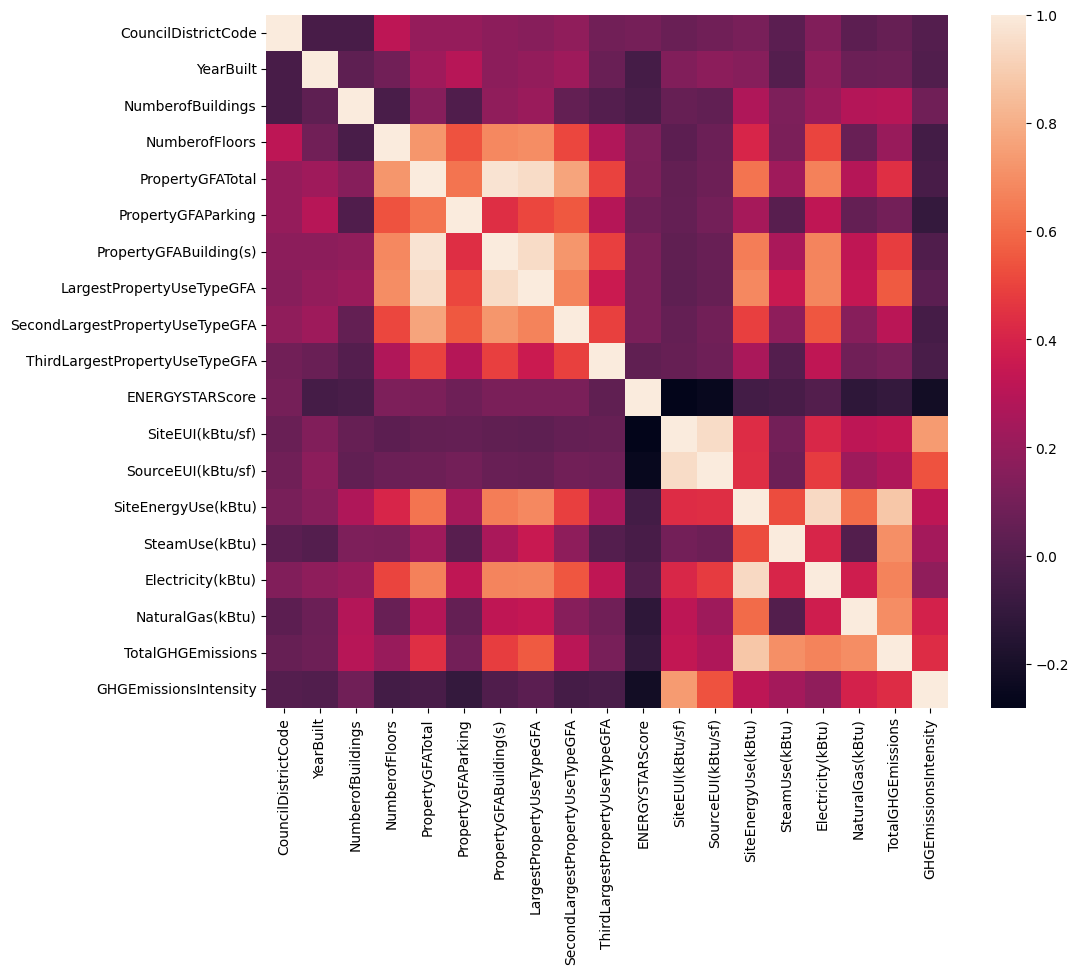

In [240]:
plt.figure(figsize = (11,9))
sns.heatmap(correlation)

Total GHG Emission is highly correlated to : LargestPropertyUseTypeGFA, SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), GHG Emissions Intensity.

However, it is not correlated to the ENERGYSTAR SCORE

The total energy consumption of a building is indicated in the variable : SiteEnergyUse(kBtu)

The SiteEnergyUse is highly correlated to : PropertyGFATotal, PropertyGFABuilding(s), LargestPropertyUseTypeGFA,SteamUse(kBtu),Electricity(kBtu), NaturalGas(kBtu), TotalGHGEmissions

Most variables are correlated with both target variables in the dataset, which is not surprise since the building's GHG Emissions is linked to its energy consumption.

## 10.2 Not linear

Other variables might have another type of correlation with our target variables. I will use scatterplots to see whether other kinds of correlation can be found.

I will create a dataframe without the variables that have a strong linear correlation with my target variables (TotalGHGEmissions & SiteEnergyUse(kBtu)) to see if another kind of correlation can be seen with a plot.

OSEBuildingID, latitude and longitude and Dateyear are numerical variables, but they will not be compared to our target variables.
OESEBuilding is a tracking and identification number given by the city.
Latitude and longitude would have to be considered together to be relevant, not separately (and the location information is already given by the zip code)
Date Year is always 2016, year the measurements were made.

In [241]:
other_corr = data_with_missing[['CouncilDistrictCode','YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal',
                               'PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
                               'ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)',
                               'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']]

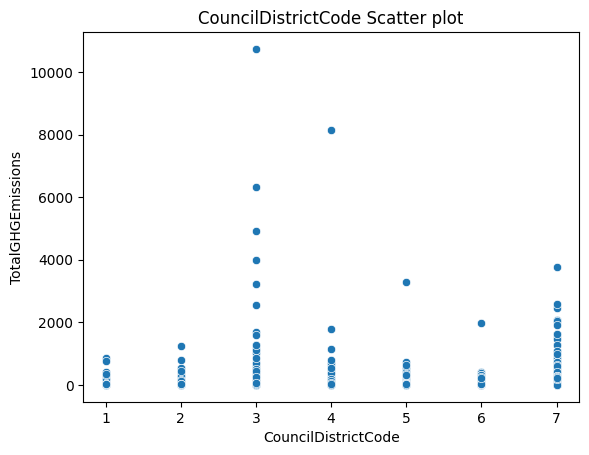

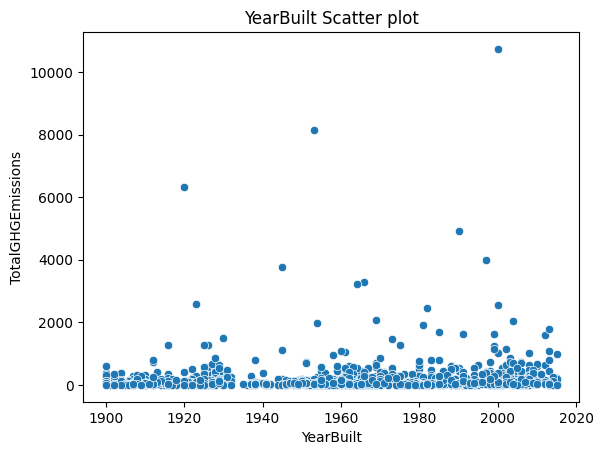

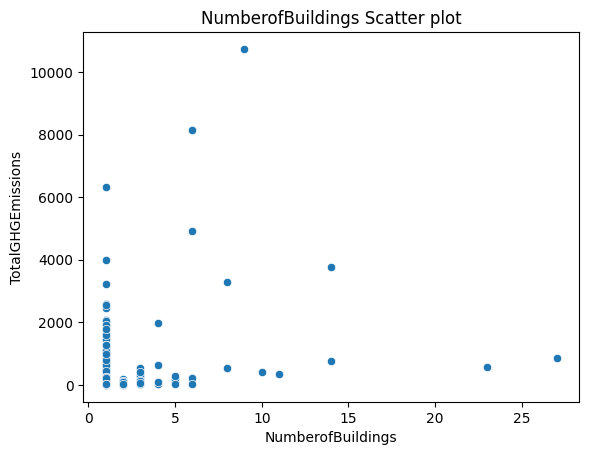

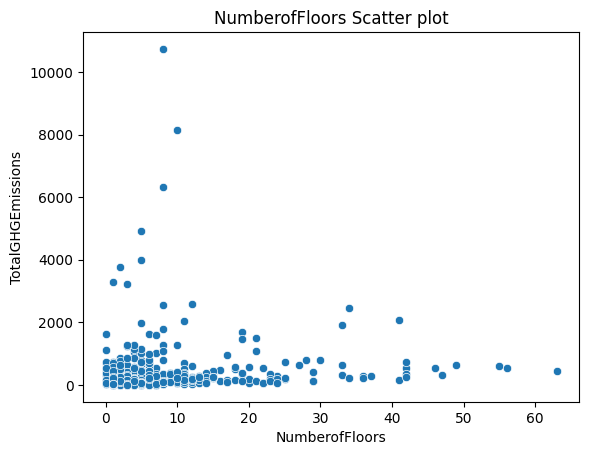

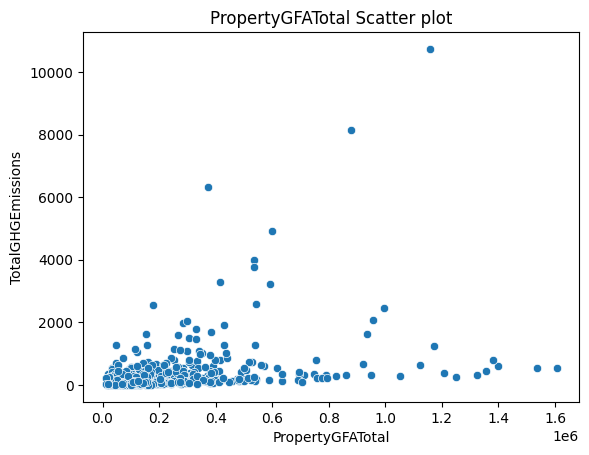

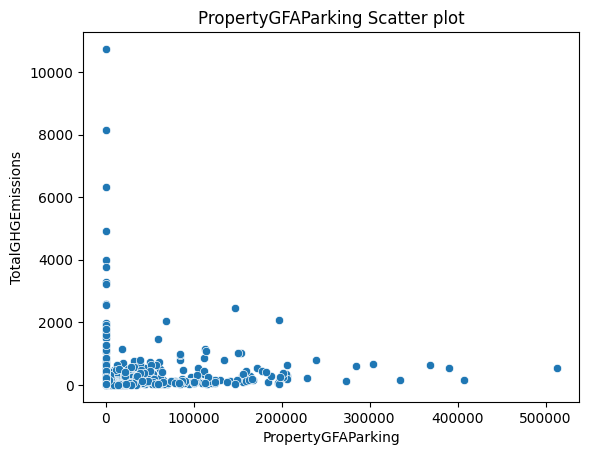

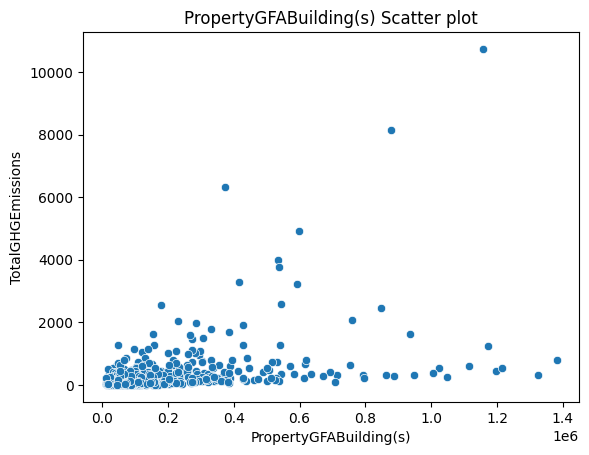

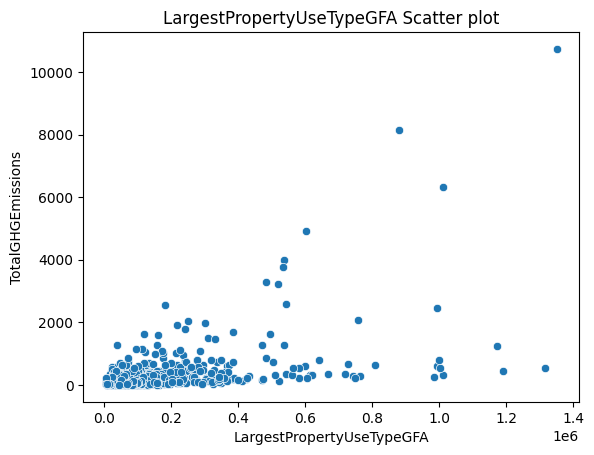

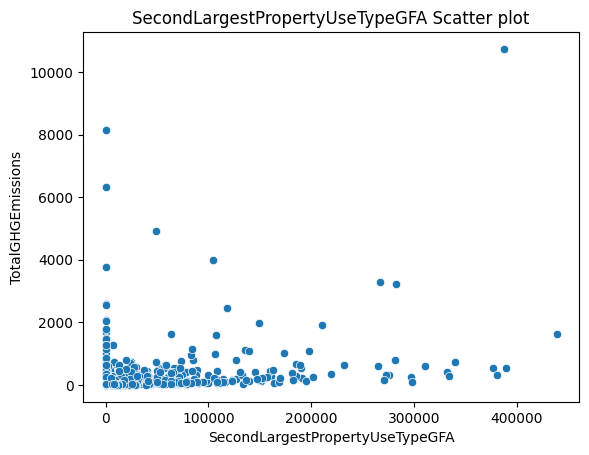

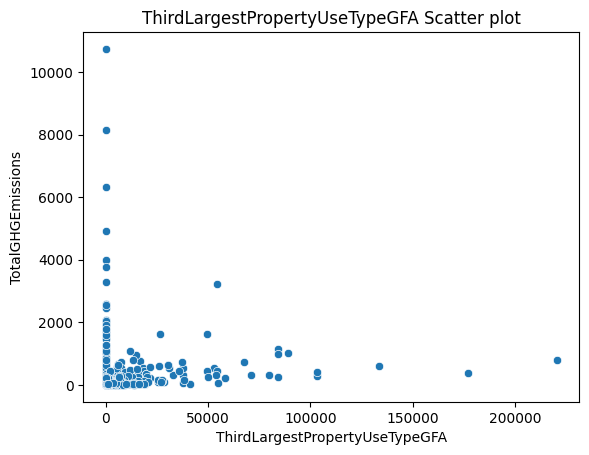

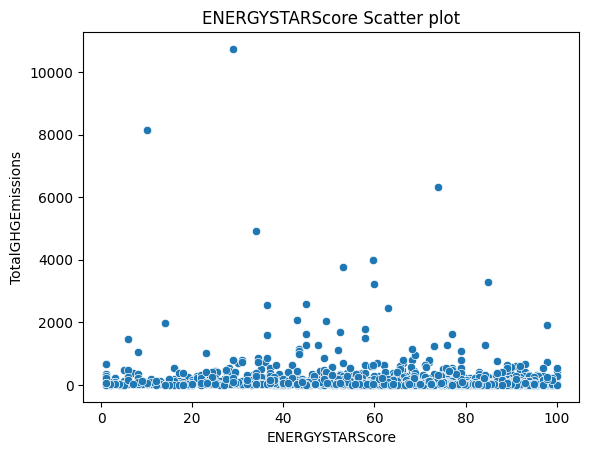

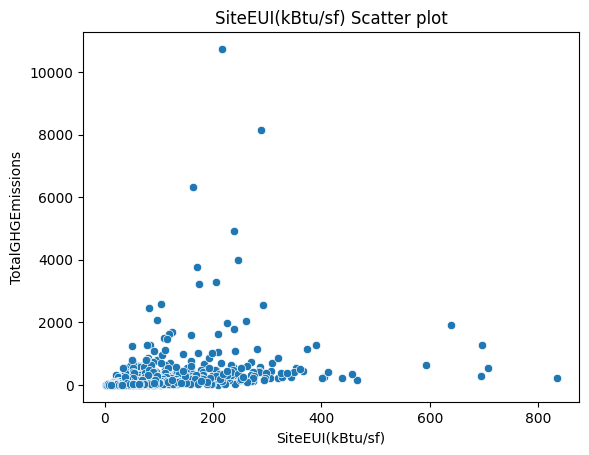

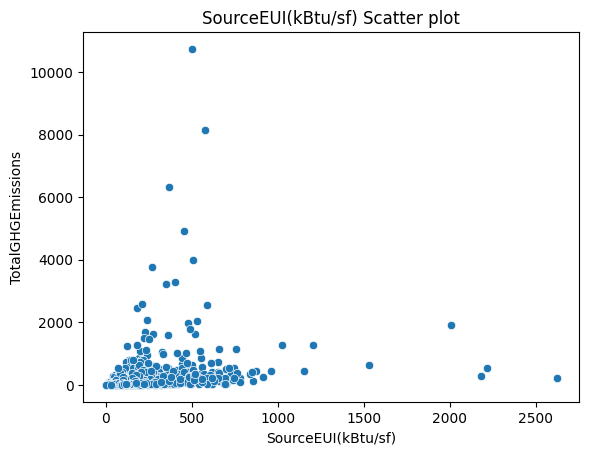

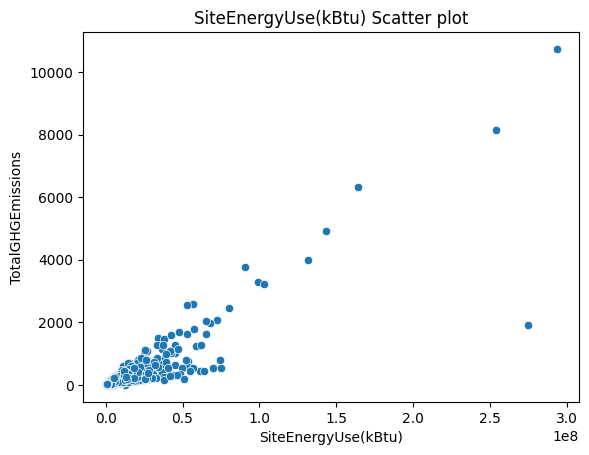

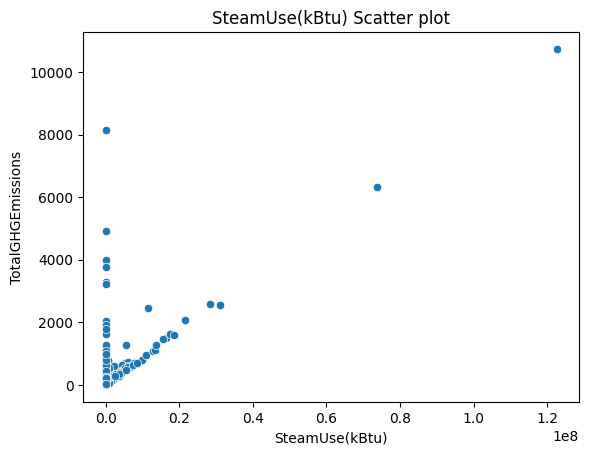

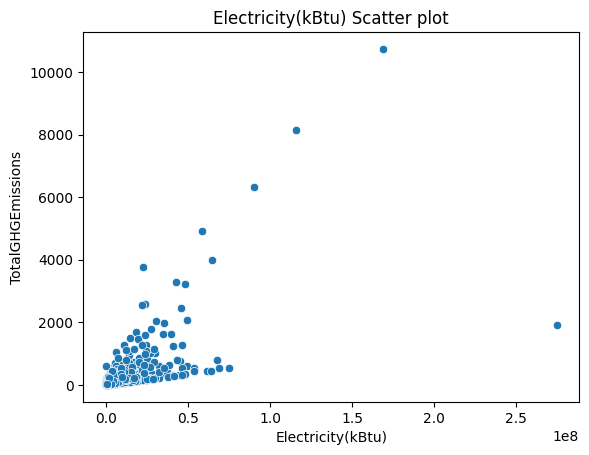

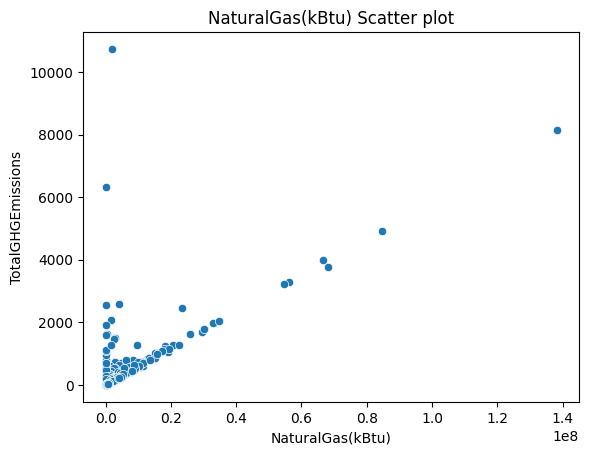

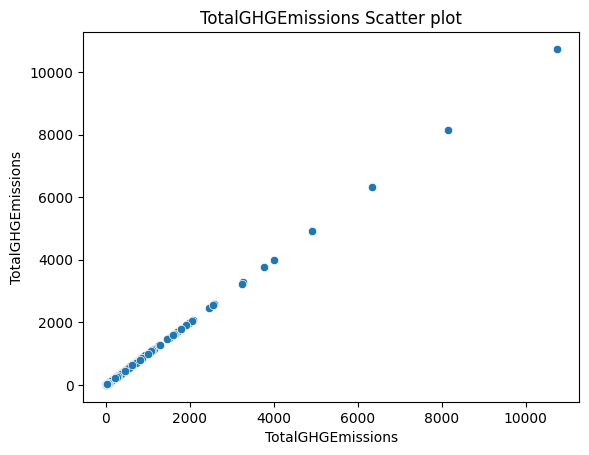

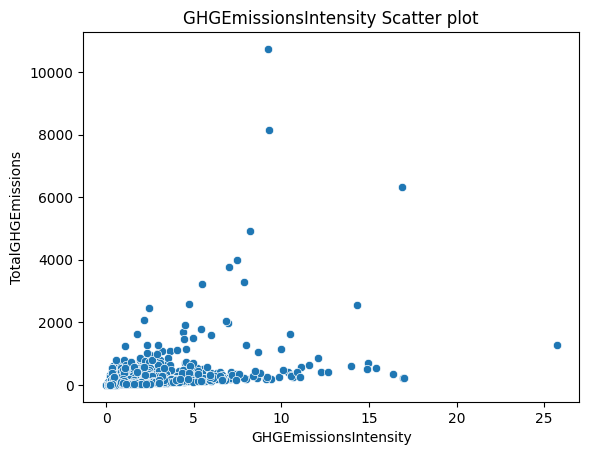

In [242]:
#Scatter plot to compare variables with GHG Emission

#Plotting
for column in other_corr.columns:
    plt.figure()
    sns.scatterplot(data = other_corr, x = other_corr[column], y = other_corr['TotalGHGEmissions'])
    plt.title(column + ' Scatter plot')

The scatter plots don't indicate that another kind of correlation could be found between the remaining variables and the total GHG Emissions

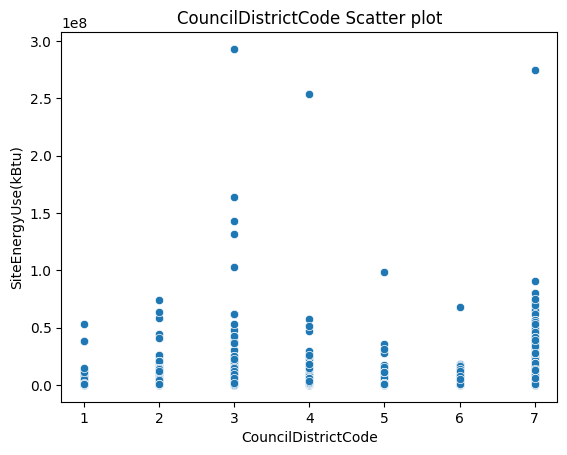

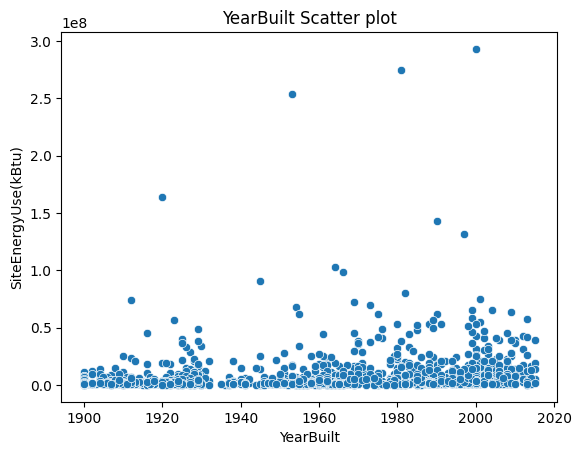

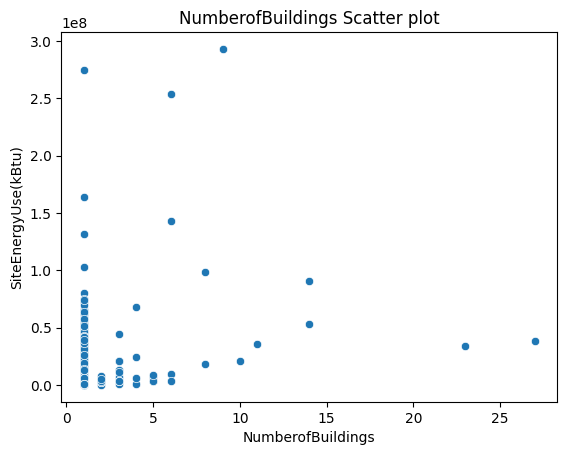

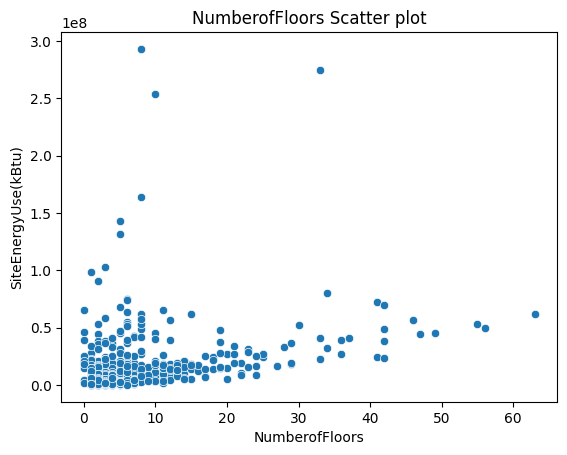

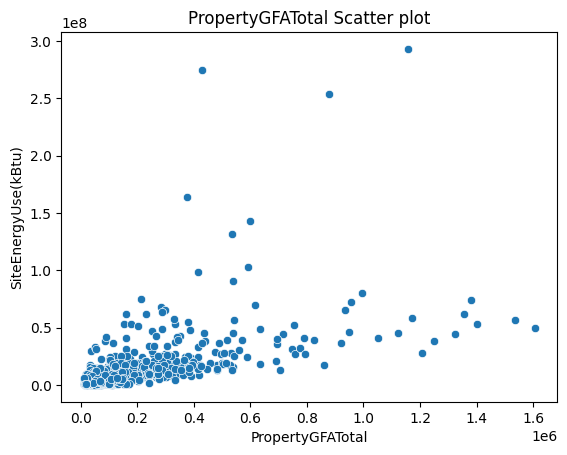

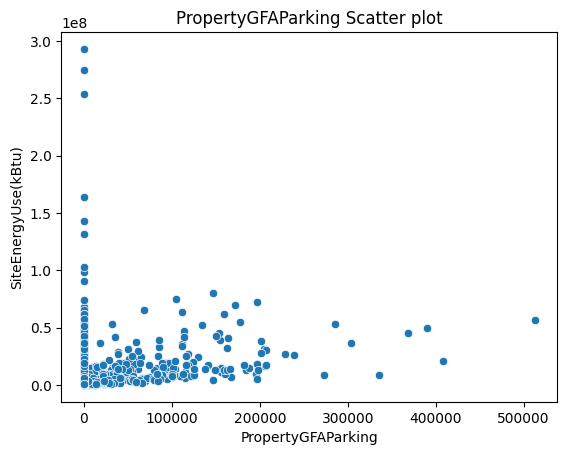

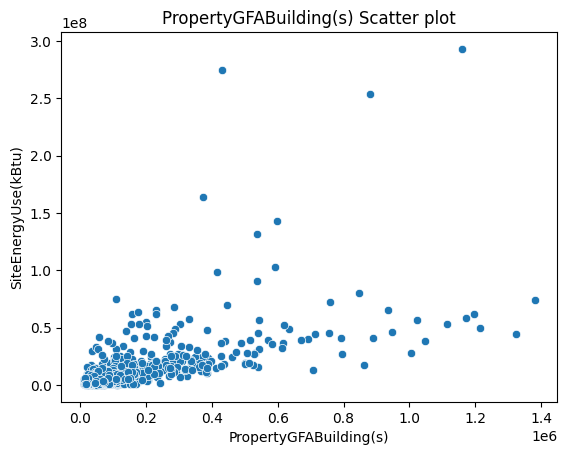

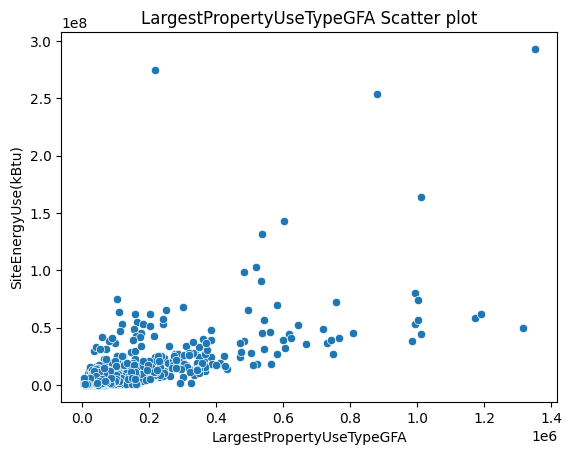

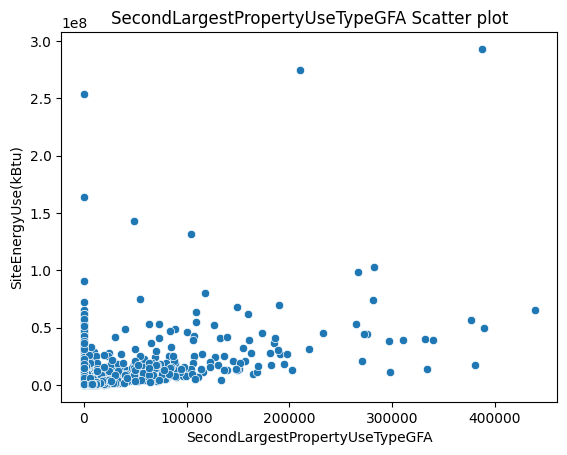

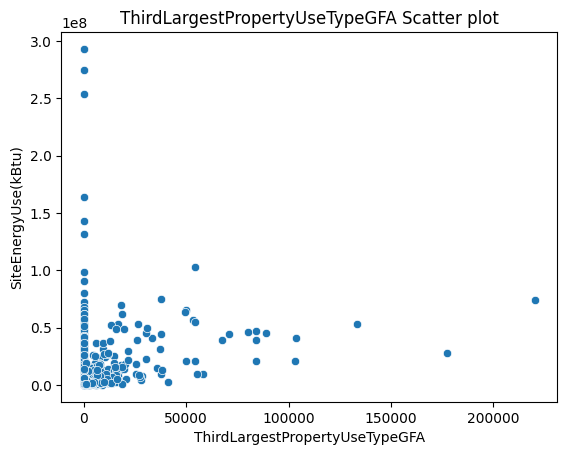

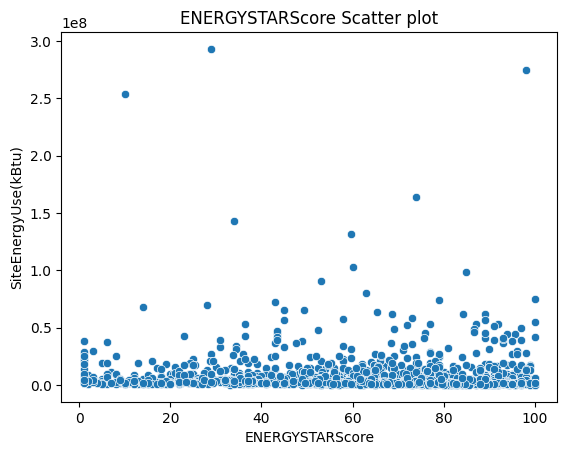

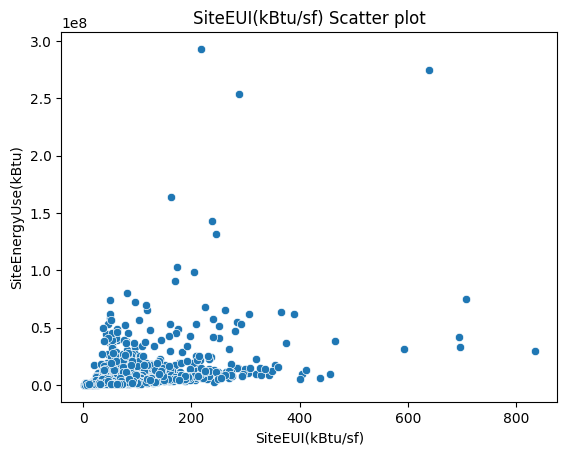

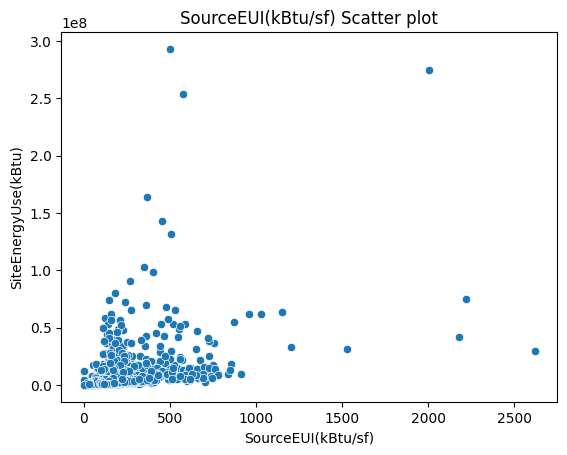

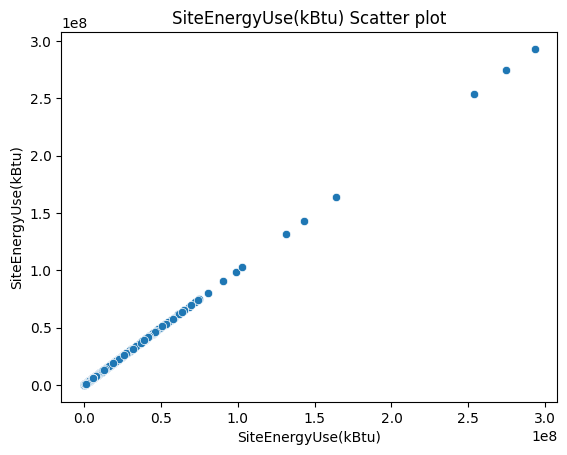

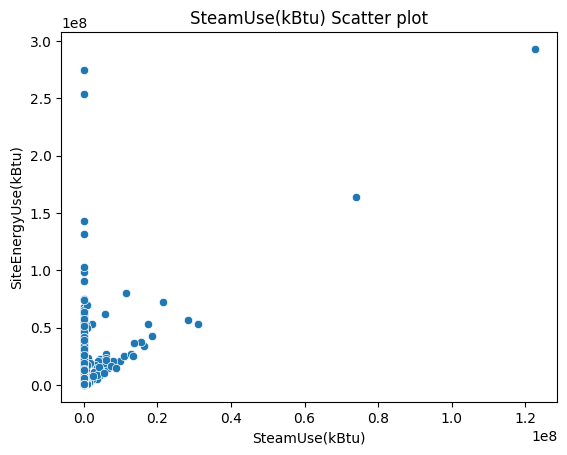

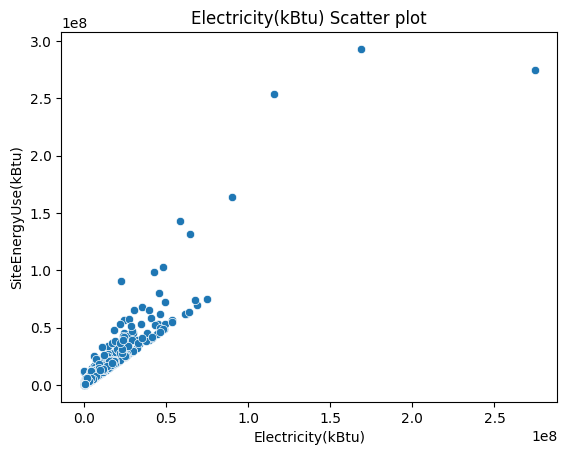

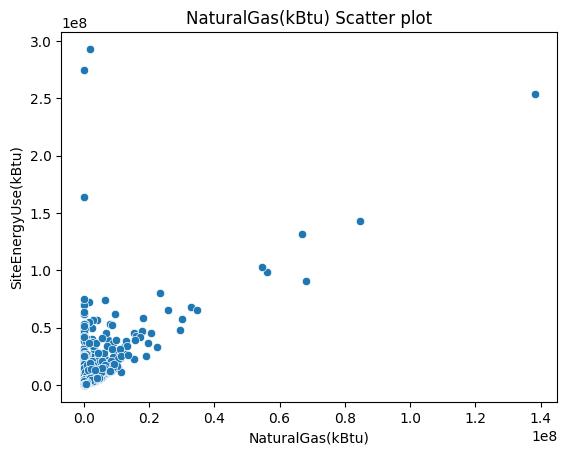

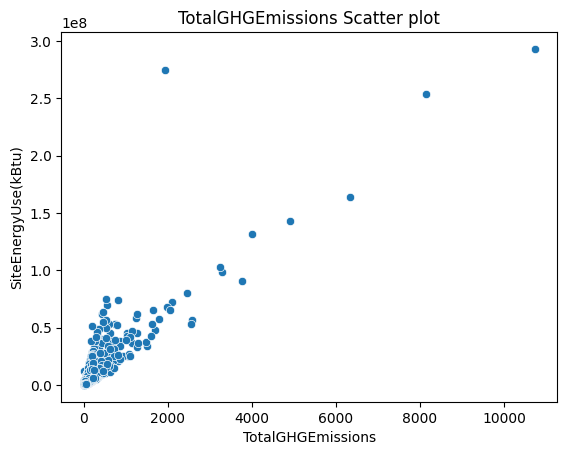

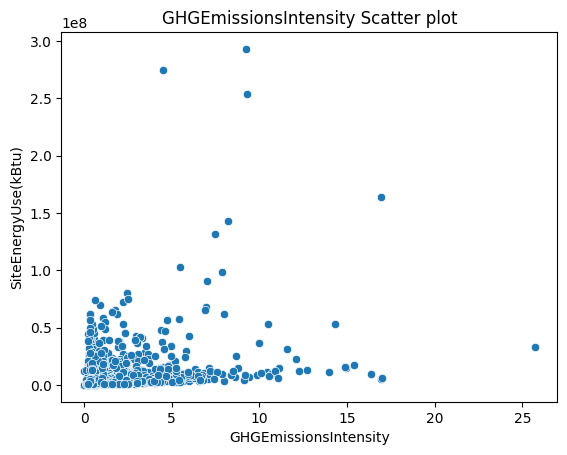

In [243]:
#Scatter plot to compare variables with SiteEnergyUse

#Scatter plot to compare variables with GHG Emission

#Plotting
for column in other_corr.columns:
    plt.figure()
    sns.scatterplot(data = other_corr, x = other_corr[column], y = other_corr['SiteEnergyUse(kBtu)'])
    plt.title(column + ' Scatter plot')

Looking at the correlation between quatitative variable and the Site Energy Use Emission. The scatter plots don't indicate that another kind of correlation could be found between the remaining variables and the Site Energy Use

## 10.3 Anova

Looking at correlation between categorical variables and the target variables

Council district code, neighborhood and energy use  + GHG Emissions

### 10.3.1 Council district code - Site Energy Use

In [244]:
council_count = pd.DataFrame(data_with_missing.CouncilDistrictCode.value_counts())
council_count.reset_index(inplace = True)
council_count

CouncilDistrictCode  count
0                    7    496
1                    2    355
2                    3    176
3                    4    139
4                    5    114
5                    1     99
6                    6     98

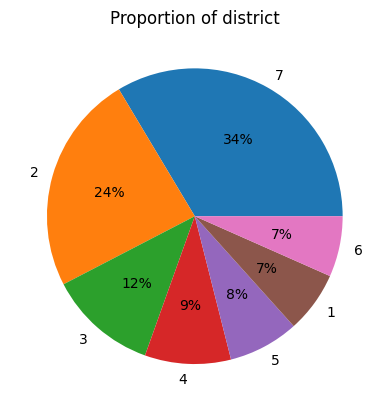

In [245]:
#Plotting
labels = ['7','2','3','4','5','1','6']
plt.pie(council_count['count'], labels = labels, autopct="%0.0f%%")
plt.title('Proportion of district')
plt.show()

In [246]:
anova_df = data_with_missing[['CouncilDistrictCode','SiteEnergyUse(kBtu)']]
anova_df.columns = ['CouncilDistrictCode','SiteEnergyUse']
anova_df

CouncilDistrictCode  SiteEnergyUse
0                       7   7.226362e+06
1                       7   8.387933e+06
2                       7   7.258702e+07
3                       7   6.794584e+06
4                       7   1.417261e+07
...                   ...            ...
1472                    1   9.320821e+05
1473                    2   9.502762e+05
1474                    7   5.765898e+06
1475                    1   7.194712e+05
1476                    2   1.152896e+06

[1477 rows x 2 columns]

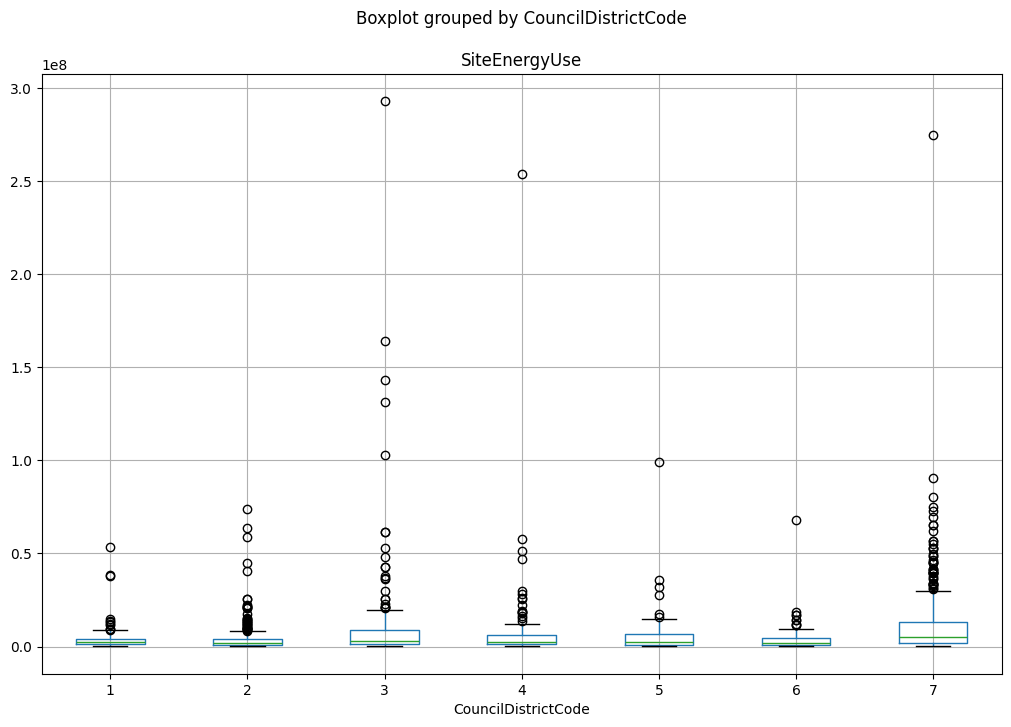

In [247]:
#Anova
import pandas as pd

data = anova_df

#Create a boxplot
data.boxplot('SiteEnergyUse', by='CouncilDistrictCode', figsize=(12, 8))

district_code = pd.unique(data.CouncilDistrictCode.values)
d_data = {energy:data['SiteEnergyUse'][data.CouncilDistrictCode == energy] 
    for energy in pd.unique(data.CouncilDistrictCode.values)}

In [248]:
#Using anova to compare the nutriscore to the nutrition grade
mod = ols('SiteEnergyUse ~ CouncilDistrictCode',
                data=anova_df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                           sum_sq      df          F    PR(>F)
CouncilDistrictCode  5.683940e+15     1.0  18.253372  0.000021
Residual             4.593021e+17  1475.0        NaN       NaN


The Fstat is low and the p value is also low. Which means that we can't reject the null hypothesis. We admit that the means of our groups council districts are not significantly different (that the independant variable has no significant impact on the dependant variable)

In [249]:
#Calculating eta square
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/1094526858.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])


0.012223895037496406

Eta square η² :Indicates the proportion of variation of the dependant variable that can be explained by variations in the independant variables while looking at the total variation of the dependant variable. When it is high, it means that the independant variable variations explains most of the dependant variable variation.

In this case η² is very low, which means that the council district code variation does not a play an important role in the Site Energy Use variation, it seems there is no particular correlation between them.

### 10.3.2 Council district code - GHG Emissions

In [250]:
anova_df_2 = data_with_missing[['CouncilDistrictCode','TotalGHGEmissions']]
#anova_df_2.columns = ['CouncilDistrictCode','TotalGHGEmissions']
anova_df_2

CouncilDistrictCode  TotalGHGEmissions
0                       7             249.98
1                       7             295.86
2                       7            2089.28
3                       7             286.43
4                       7             505.01
...                   ...                ...
1472                    1              20.33
1473                    2              32.17
1474                    7             223.54
1475                    1              22.11
1476                    2              41.27

[1477 rows x 2 columns]

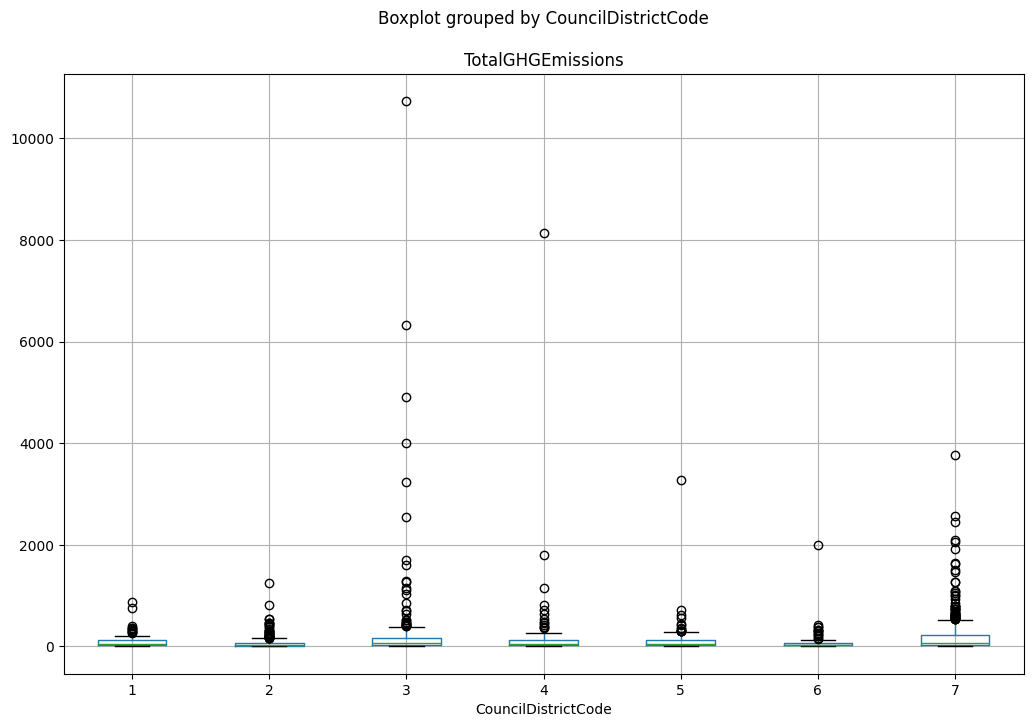

In [251]:
#Anova

data = anova_df_2

#Create a boxplot
data.boxplot('TotalGHGEmissions', by='CouncilDistrictCode', figsize=(12, 8))

district_code = pd.unique(data.CouncilDistrictCode.values)
d_data = {emissions:data['TotalGHGEmissions'][data.CouncilDistrictCode == emissions] 
    for emissions in pd.unique(data.CouncilDistrictCode.values)}

In [252]:
#Using anova to compare the nutriscore to the nutrition grade
mod = ols('TotalGHGEmissions ~ CouncilDistrictCode',
                data=anova_df_2).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                           sum_sq      df         F    PR(>F)
CouncilDistrictCode  1.137375e+06     1.0  4.452589  0.035016
Residual             3.767758e+08  1475.0       NaN       NaN


In [253]:
#Calculating eta square
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/1094526858.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])


0.003009619390348622

### 10.3.3 Neighborhood - Site Energy Use

In [254]:
neighborhood_count = pd.DataFrame(data_with_missing.Neighborhood.value_counts())
neighborhood_count.reset_index(inplace = True)
neighborhood_count

Neighborhood  count
0                DOWNTOWN    337
1        GREATER DUWAMISH    323
2                   NORTH    230
3   MAGNOLIA / QUEEN ANNE    140
4              LAKE UNION    138
5                    EAST    107
6                 BALLARD     61
7                 CENTRAL     42
8                DELRIDGE     41
9               SOUTHWEST     30
10              SOUTHEAST     28

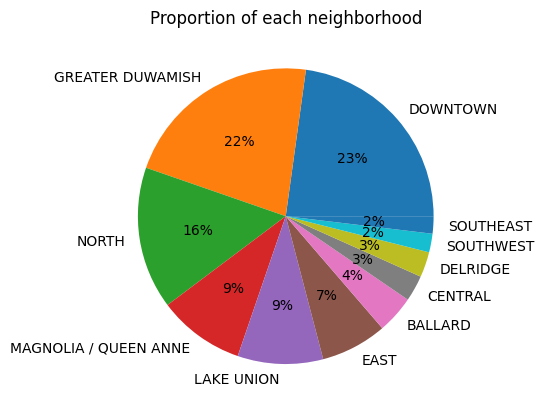

In [255]:
#Plotting
labels = ['DOWNTOWN','GREATER DUWAMISH','NORTH','MAGNOLIA / QUEEN ANNE','LAKE UNION','EAST','BALLARD','CENTRAL','DELRIDGE','SOUTHWEST',
          'SOUTHEAST']
plt.pie(neighborhood_count['count'], labels = labels, autopct="%0.0f%%")
plt.title('Proportion of each neighborhood')
plt.show()

In [256]:
anova_df_3 = data_with_missing[['Neighborhood','SiteEnergyUse(kBtu)']]
anova_df_3.columns = ['Neighborhood','SiteEnergyUse']
anova_df_3

Neighborhood  SiteEnergyUse
0                  DOWNTOWN   7.226362e+06
1                  DOWNTOWN   8.387933e+06
2                  DOWNTOWN   7.258702e+07
3                  DOWNTOWN   6.794584e+06
4                  DOWNTOWN   1.417261e+07
...                     ...            ...
1472               DELRIDGE   9.320821e+05
1473               DOWNTOWN   9.502762e+05
1474  MAGNOLIA / QUEEN ANNE   5.765898e+06
1475       GREATER DUWAMISH   7.194712e+05
1476       GREATER DUWAMISH   1.152896e+06

[1477 rows x 2 columns]

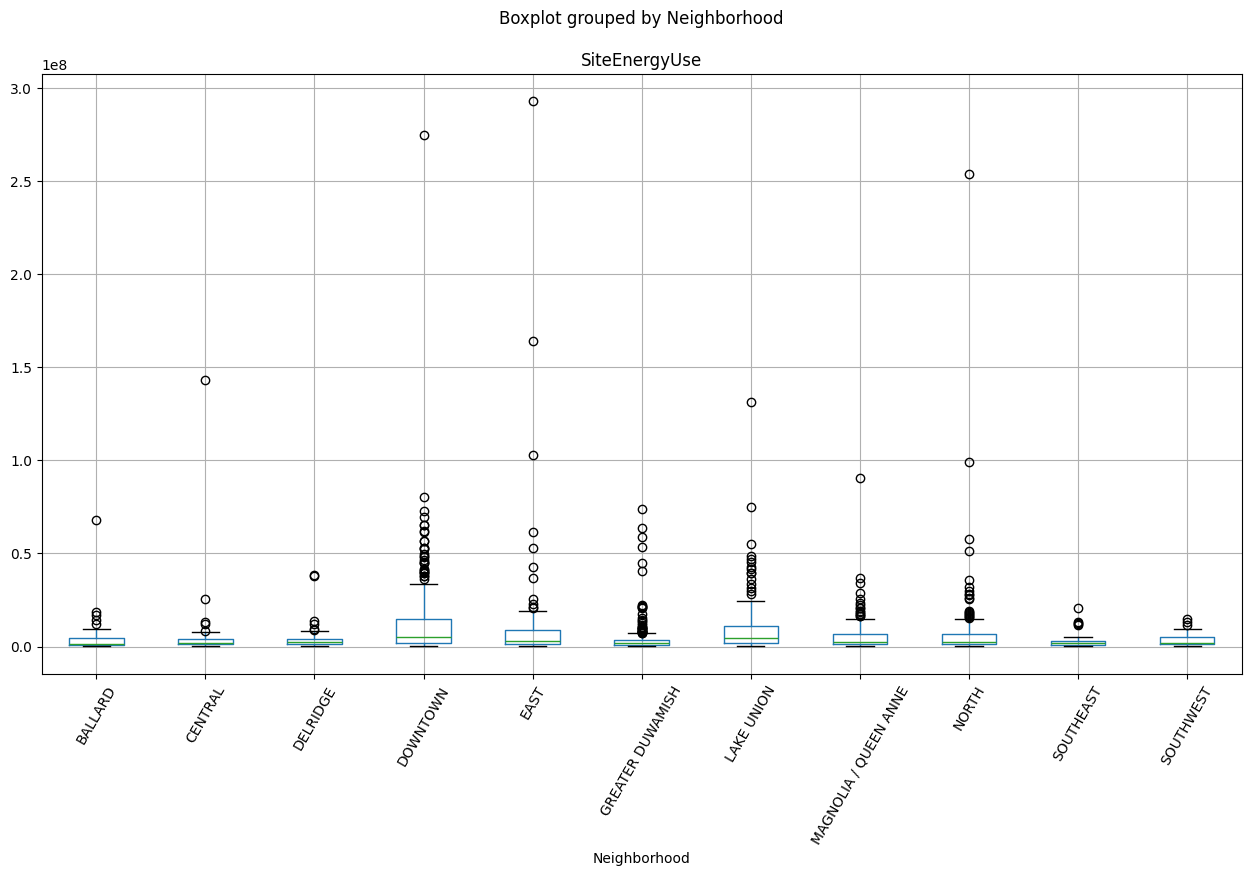

In [257]:
#Anova

data = anova_df_3

#Create a boxplot
data.boxplot('SiteEnergyUse', by='Neighborhood', figsize=(15, 8))

district_code = pd.unique(data.Neighborhood.values)
d_data = {energy_2:data['SiteEnergyUse'][data.Neighborhood == energy_2] 
    for energy_2 in pd.unique(data.Neighborhood.values)}
plt.xticks(rotation = 60)
plt.show()

In [258]:
#Using anova to compare the nutriscore to the nutrition grade
mod = ols('SiteEnergyUse ~ Neighborhood',
                data=anova_df_3).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df        F        PR(>F)
Neighborhood  1.633048e+16    10.0  5.33605  9.006071e-08
Residual      4.486555e+17  1466.0      NaN           NaN


In [259]:
#Calculating eta square
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/1094526858.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])


0.03512037052849906

There seem to be no correlation between the neighborhood and the Site Energy Use

### 10.3.4 Neighborhood - GHG Emissions

In [260]:
anova_df_4 = data_with_missing[['Neighborhood','TotalGHGEmissions']]
anova_df_4.columns = ['Neighborhood','TotalGHGEmissions']
anova_df_4

Neighborhood  TotalGHGEmissions
0                  DOWNTOWN             249.98
1                  DOWNTOWN             295.86
2                  DOWNTOWN            2089.28
3                  DOWNTOWN             286.43
4                  DOWNTOWN             505.01
...                     ...                ...
1472               DELRIDGE              20.33
1473               DOWNTOWN              32.17
1474  MAGNOLIA / QUEEN ANNE             223.54
1475       GREATER DUWAMISH              22.11
1476       GREATER DUWAMISH              41.27

[1477 rows x 2 columns]

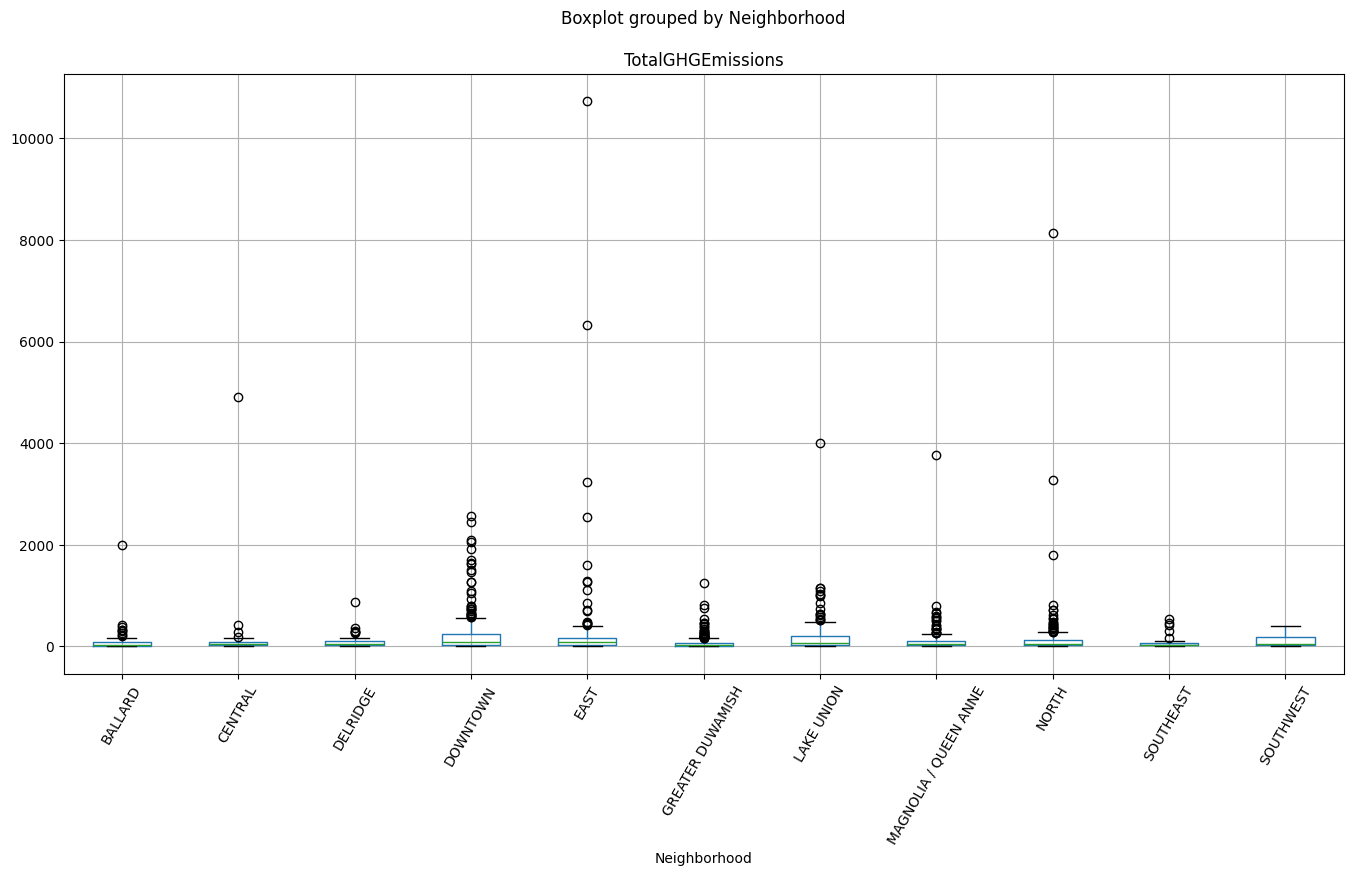

In [261]:
#Anova

data = anova_df_4

#Create a boxplot
data.boxplot('TotalGHGEmissions', by='Neighborhood', figsize=(16, 8))

district_code = pd.unique(data.Neighborhood.values)
d_data = {emissions:data['TotalGHGEmissions'][data.Neighborhood == emissions] 
    for emissions in pd.unique(data.Neighborhood.values)}

plt.xticks(rotation = 60)
plt.show()

In [262]:
#Using anova to compare the nutriscore to the nutrition grade
mod = ols('TotalGHGEmissions ~ Neighborhood',
                data=anova_df_4).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df         F    PR(>F)
Neighborhood  9.656738e+06    10.0  3.844272  0.000037
Residual      3.682564e+08  1466.0       NaN       NaN


In [263]:
#Calculating eta square
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_742/1094526858.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])


0.025552798925236375

No correlation between Neighborhood and GHG Emissions

# 11. Deleting columns that won't be available when evaluating a new building

When the city will upload information about a new building in order to estimate its energy consumption and GHG Emissions, it will not have any information regarding its
ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), TotalGHGEmissions, GHGEmissionsIntensity. I therefore need to delete these columns. 

However, we are also asked to evaluate the usefulness of the ENERGYSTARScore in modelling GHG Emissions. 

In [264]:
data = data_with_missing.drop(columns = ['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissionsIntensity'])

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            1477 non-null   int64  
 1   BuildingType                     1477 non-null   object 
 2   PrimaryPropertyType              1477 non-null   object 
 3   CouncilDistrictCode              1477 non-null   int64  
 4   Neighborhood                     1477 non-null   object 
 5   YearBuilt                        1477 non-null   int64  
 6   NumberofBuildings                1477 non-null   float64
 7   NumberofFloors                   1477 non-null   int64  
 8   PropertyGFATotal                 1477 non-null   int64  
 9   PropertyGFAParking               1477 non-null   int64  
 10  PropertyGFABuilding(s)           1477 non-null   int64  
 11  LargestPropertyUseType           1477 non-null   object 
 12  LargestPropertyUseTy

# 11. Function to apply all above changes

In [266]:
def last_treatment(df):
    #Deleting non residential buildings
    df = df.loc[df['BuildingType'].str.contains("NonResidential|Nonresidential COS|SPS-District K-12|Campus|Nonresidential WA")]
    #Deleting the Residence Halls
    df = df.loc[df['PrimaryPropertyType'] != 'Residence Hall']
    #Deleting Senior Care Community
    df = df.loc[df['PrimaryPropertyType'] != 'Senior Care Community']
    #Deleting Low-Rise Multifamily
    df = df.loc[df['PrimaryPropertyType'] != 'Low-Rise Multifamily']
    #Dropping unecessary columns
    df = df.drop(columns = ['OSEBuildingID','DataYear','Comments','City','State','TaxParcelIdentificationNumber'])
    #Turning 0s into 1 for the number of buildings
    df.loc[df['NumberofBuildings'] == 0, ['NumberofBuildings']] = 1
    #Deleting US Bank Centre (GFA parking)
    df = df.loc[df['PropertyName']!= 'US Bank Centre']
    #Deleting the chinese baptist church
    df = df.loc[df['PropertyName'] != 'Seattle Chinese Baptist Church']
    
    #Deleting outliers in LargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Entire Campus']
    df = df.loc[df['PropertyName'] != 'Columbia Center - 2015']
    df = df.loc[df['PropertyName'] != 'Swedish First Hill']
    df = df.loc[df['PropertyName'] != 'CenturyLink']

    #Deleting outliers in SecondLargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Washington State Convention Center']
    df = df.loc[df['PropertyName'] != 'Plant 2 Site']

    #Deleting outliers in ThirdLargestPropertyUseTypeGFA
    df = df.loc[df['PropertyName'] != 'Russell Investments Center']
    
    #Deleting wheather normalized variables
    df = df.drop(columns = ['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'])
    
    #Deleting buildings with default data
    df = df.loc[df['DefaultData'] == False]
    #Deleting non compliant buildings
    df = df.loc[df['ComplianceStatus'] == 'Compliant']
        
    #Grouping neighborhoods based on their names
    #Turning Nort into NORTH
    df.loc[df['Neighborhood'].str.contains('NORTH|North'), 'Neighborhood'] = 'NORTH'
    #Turning Delridge into DELRIDGE
    df.loc[df['Neighborhood'].str.contains('DELRIDGE|DELRIDGE NEIGHBORHOODS|Delridge'), 'Neighborhood'] = 'DELRIDGE'
    #Ballard into BALLARD
    df.loc[df['Neighborhood'].str.contains('BALLARD|Ballard'), 'Neighborhood'] = 'BALLARD'
    #Northwest into NORTHWEST
    df.loc[df['Neighborhood'].str.contains('NORTHWEST|Northwest'), 'Neighborhood'] = 'NORTHWEST'
    #Central into CENTRAL
    df.loc[df['Neighborhood'].str.contains('CENTRAL|Central'), 'Neighborhood'] = 'CENTRAL'
    #Turning all non residential buildings into the same label 'NonResidential'
    df.loc[df['BuildingType'].str.contains('Nonresidential COS|Nonresidential WA'), ['BuildingType']] = 'NonResidential'
    
    #Grouping primary property types
    new_value = 'Offices'
    new_value_2 = 'Mixed Use Property and Other'
    new_value_3 = 'Retail and Supermarkets'
    new_value_4 = 'Storage Facilities'
    
    #Grouping all kind of offices
    df.loc[df['PrimaryPropertyType'].str.contains('Small- and Mid-Sized Office|Large Office|Medical Office'),
                  'PrimaryPropertyType'] = new_value
    
    #Grouping all mixed used properties and other
    df.loc[df['PrimaryPropertyType'].str.contains('Mixed Use Property|Other'),'PrimaryPropertyType'] = new_value_2
    
    #Grouping retail stores and supermarket, although alimentation stores might use more energy, there are both stores
    df.loc[df['PrimaryPropertyType'].str.contains('Retail Store|Supermarket / Grocery Store'),'PrimaryPropertyType'] = new_value_3
    
    #Grouping self storage facility and warehouses and distribution center. They all consist in a storage for various goods
    df.loc[df['PrimaryPropertyType'].str.contains('Self-Storage Facility|Warehouse|Distribution Center'),
                  'PrimaryPropertyType'] = new_value_4

    #LargestPropertyUseType Treatments
    #Turning all values in LargestPropertyUseType into strings
    df['LargestPropertyUseType'] = df['LargestPropertyUseType'].astype(str)

    #Deleting building with a residential largest Property Type 
    df = df.loc[~df['LargestPropertyUseType'].str.contains("Other - Lodging/Residential|Multifamily Housing|Residence Hall/Dormitory|Residential Care Facility")]
    
    Largest_value_1 = 'Office'
    Largest_value_2 = 'Hospital'
    Largest_value_3 = 'Warehouse'
    Largest_value_4 = 'School'
    Largest_value_5 = 'Repair and Public Services'
    Largest_value_6 = 'Food/Drink Services'
    Largest_value_7 = 'Retail/Mall'
    Largest_value_8 = 'Recreational Venues'

    # Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
    replacement_mapping = {
        'Medical Office': Largest_value_1,
        'Office': Largest_value_1,
        'Financial Office': Largest_value_1,
        'Hospital (General Medical & Surgical)': Largest_value_2,
        'Other/Specialty Hospital': Largest_value_2,
        'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
        'Non-Refrigerated Warehouse': Largest_value_3,
        'Self-Storage Facility': Largest_value_3,
        'Distribution Center': Largest_value_3,
        'Refrigerated Warehouse': Largest_value_3,
        'College/University': Largest_value_4,
        'K-12 School': Largest_value_4,
        'Other - Education': Largest_value_4,
        'Adult Education': Largest_value_4,
        'Pre-school/Daycare': Largest_value_4,
        'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
        'Other - Services': Largest_value_5,
        'Other - Public Services': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Restaurant': Largest_value_6,
        'Other - Restaurant/Bar': Largest_value_6,
        'Food Service': Largest_value_6,
        'Supermarket/Grocery Store': Largest_value_6,
        'Other - Mall' : Largest_value_7,
        'Strip Mall' : Largest_value_7,
        'Retail Store' : Largest_value_7,
        'Wholesale Club/Supercenter' : Largest_value_7,
        'Other - Entertainment/Public Assembly' : Largest_value_8,
        'Other - Recreation' : Largest_value_8,
        'Social/Meeting Hall' : Largest_value_8,
        'Movie Theater' : Largest_value_8
    }
    
    # Replacing the values
    df['LargestPropertyUseType'] = df['LargestPropertyUseType'].replace(replacement_mapping)

    #SecondLargestPropertyUseType Treatments
    Largest_value_1 = 'Office'
    Largest_value_2 = 'Hospital'
    Largest_value_3 = 'Warehouse'
    Largest_value_4 = 'School'
    Largest_value_5 = 'Repair and Public Services'
    Largest_value_6 = 'Food/Drink Services'
    Largest_value_7 = 'Retail/Mall'
    Largest_value_8 = 'Recreational Venues'
    
    # Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
    replacement_mapping = {
        'Medical Office': Largest_value_1,
        'Office': Largest_value_1,
        'Financial Office': Largest_value_1,
        'Hospital (General Medical & Surgical)': Largest_value_2,
        'Other/Specialty Hospital': Largest_value_2,
        'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
        'Non-Refrigerated Warehouse': Largest_value_3,
        'Self-Storage Facility': Largest_value_3,
        'Distribution Center': Largest_value_3,
        'Refrigerated Warehouse': Largest_value_3,
        'College/University': Largest_value_4,
        'K-12 School': Largest_value_4,
        'Other - Education': Largest_value_4,
        'Adult Education': Largest_value_4,
        'Pre-school/Daycare': Largest_value_4,
        'Vocational School' : Largest_value_4,
        'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Other - Services': Largest_value_5,
        'Other - Public Services': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Restaurant': Largest_value_6,
        'Other - Restaurant/Bar': Largest_value_6,
        'Food Service': Largest_value_6,
        'Supermarket/Grocery Store': Largest_value_6,
        'Convenience Store without Gas Station' : Largest_value_6,
        'Food Sales' : Largest_value_6,
        'Other - Mall' : Largest_value_7,
        'Strip Mall' : Largest_value_7,
        'Retail Store' : Largest_value_7,
        'Wholesale Club/Supercenter' : Largest_value_7,
        'Enclosed Mall' : Largest_value_7,
        'Other - Entertainment/Public Assembly' : Largest_value_8,
        'Other - Recreation' : Largest_value_8,
        'Social/Meeting Hall' : Largest_value_8,
        'Bar/Nightclub' : Largest_value_8,
        'Movie Theater' : Largest_value_8
    }
    
    # Replacing the values
    df['SecondLargestPropertyUseType'] = df['SecondLargestPropertyUseType'].replace(replacement_mapping)

    #ThirdLargestPropertyUseType Treatments
    Largest_value_1 = 'Office'
    Largest_value_2 = 'Hospital'
    Largest_value_3 = 'Warehouse'
    Largest_value_4 = 'School'
    Largest_value_5 = 'Repair and Public Services'
    Largest_value_6 = 'Food/Drink Services'
    Largest_value_7 = 'Retail/Mall'
    Largest_value_8 = 'Recreational Venues'
    
    # Creating a dictionnary to be able to use the replace methods to handle strings with parenthesis.
    replacement_mapping = {
        'Medical Office': Largest_value_1,
        'Office': Largest_value_1,
        'Financial Office': Largest_value_1,
        'Hospital (General Medical & Surgical)': Largest_value_2,
        'Other/Specialty Hospital': Largest_value_2,
        'Urgent Care/Clinic/Other Outpatient': Largest_value_2,
        'Non-Refrigerated Warehouse': Largest_value_3,
        'Self-Storage Facility': Largest_value_3,
        'Distribution Center': Largest_value_3,
        'Refrigerated Warehouse': Largest_value_3,
        'College/University': Largest_value_4,
        'K-12 School': Largest_value_4,
        'Other - Education': Largest_value_4,
        'Adult Education': Largest_value_4,
        'Pre-school/Daycare': Largest_value_4,
        'Vocational School' : Largest_value_4,
        'Repair Services (Vehicle, Shoe, Locksmith, etc)': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Other - Services': Largest_value_5,
        'Other - Public Services': Largest_value_5,
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': Largest_value_5,
        'Restaurant': Largest_value_6,
        'Other - Restaurant/Bar': Largest_value_6,
        'Food Service': Largest_value_6,
        'Supermarket/Grocery Store': Largest_value_6,
        'Convenience Store without Gas Station' : Largest_value_6,
        'Food Sales' : Largest_value_6,
        'Other - Mall' : Largest_value_7,
        'Strip Mall' : Largest_value_7,
        'Retail Store' : Largest_value_7,
        'Wholesale Club/Supercenter' : Largest_value_7,
        'Enclosed Mall' : Largest_value_7,
        'Other - Entertainment/Public Assembly' : Largest_value_8,
        'Other - Recreation' : Largest_value_8,
        'Social/Meeting Hall' : Largest_value_8,
        'Bar/Nightclub' : Largest_value_8,
        'Movie Theater' : Largest_value_8
    }
    
    # Replacing the values
    df['ThirdLargestPropertyUseType'] = df['ThirdLargestPropertyUseType'].replace(replacement_mapping)
    
    #Unecessary columns deletion
    df = df.drop(columns = ['Outlier','ComplianceStatus','Address','PropertyName','YearsENERGYSTARCertified','ListOfAllPropertyUseTypes',
                                                      'DefaultData','Electricity(kWh)','Latitude','Longitude','NaturalGas(therms)','ZipCode'])


    #LargestPropertyUseType treatments
    #Deleting the lines where LargestPropertyUseType is empty
    df = df.loc[ ~ df['LargestPropertyUseType'].str.contains("nan")]

    #SecondLargestPropertyUseType
    #Replacing nans in SecondLargestPropertyUseType with "No_Second_Type"
    df.loc[df['SecondLargestPropertyUseType'].isna(), ['SecondLargestPropertyUseType']] = "No_Second_Type"
    #Replacing nans in SecondLargestPropertyUseTypeGFA with 0
    df.loc[df['SecondLargestPropertyUseTypeGFA'].isna(), ['SecondLargestPropertyUseTypeGFA']] = 0

    #ThirdLargestPropertyUseType
    #Replacing nans in ThirdLargestPropertyUseType with "No_Third_Type"
    df.loc[df['ThirdLargestPropertyUseType'].isna(), ['ThirdLargestPropertyUseType']] = "No_Third_Type"
    #Replacing nans in ThirdLargestPropertyUseTypeGFA with 0
    df.loc[df['ThirdLargestPropertyUseTypeGFA'].isna(), ['ThirdLargestPropertyUseTypeGFA']] = 0

    
    
    #Using KNN to impute EnergyStar Score
    imputer = KNNImputer(n_neighbors = 3, weights = 'uniform')
    #Creating a dataset with numerical columns only to use the KNNs
    knn_data = df.loc[:,['YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','ENERGYSTARScore','SiteEUI(kBtu/sf)',
    'SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']]
    #Fit and transform the dataset with the imputer, turning it into a pandas dataframe
    knn_imputed = pd.DataFrame(imputer.fit_transform(knn_data))
    #Giving the same columns names
    knn_imputed.columns = knn_data.columns
    
    #Resetting data with missing index
    df = df.reset_index()
    #Dropping new index column 
    df = df.drop(columns = ['index'])
    
    #Replacing initial energystar column with the imputed column
    df['ENERGYSTARScore'] = knn_imputed.ENERGYSTARScore

    #Creating a dataframe with the energystar score
    df_with_energy = df.drop(columns = ['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissionsIntensity'])
    
    return df_with_energy

In [267]:
#Applying the fuction to the initial dataset
entire_data = pd.read_csv("Building_Energy_Benchmarking.csv")

final_data = last_treatment(entire_data)

In [268]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1477 non-null   object 
 1   PrimaryPropertyType              1477 non-null   object 
 2   CouncilDistrictCode              1477 non-null   int64  
 3   Neighborhood                     1477 non-null   object 
 4   YearBuilt                        1477 non-null   int64  
 5   NumberofBuildings                1477 non-null   float64
 6   NumberofFloors                   1477 non-null   int64  
 7   PropertyGFATotal                 1477 non-null   int64  
 8   PropertyGFAParking               1477 non-null   int64  
 9   PropertyGFABuilding(s)           1477 non-null   int64  
 10  LargestPropertyUseType           1477 non-null   object 
 11  LargestPropertyUseTypeGFA        1477 non-null   float64
 12  SecondLargestPropert

# 14. Categorical variables encoding

In [269]:
final_data

BuildingType           PrimaryPropertyType  CouncilDistrictCode  \
0     NonResidential                         Hotel                    7   
1     NonResidential                         Hotel                    7   
2     NonResidential                         Hotel                    7   
3     NonResidential                         Hotel                    7   
4     NonResidential                         Hotel                    7   
...              ...                           ...                  ...   
1472  NonResidential  Mixed Use Property and Other                    1   
1473  NonResidential  Mixed Use Property and Other                    2   
1474  NonResidential  Mixed Use Property and Other                    7   
1475  NonResidential  Mixed Use Property and Other                    1   
1476  NonResidential  Mixed Use Property and Other                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN       1927                1.0              12   
1                  DOWNTOWN       1996                1.0              11   
2                  DOWNTOWN       1969                1.0              41   
3                  DOWNTOWN       1926                1.0              10   
4                  DOWNTOWN       1980                1.0              18   
...                     ...        ...                ...             ...   
1472               DELRIDGE       1982                1.0               1   
1473               DOWNTOWN       2004                1.0               1   
1474  MAGNOLIA / QUEEN ANNE       1974                1.0               1   
1475       GREATER DUWAMISH       1989                1.0               1   
1476       GREATER DUWAMISH       1938                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               175580               62000                  113580   
...                ...                 ...                     ...   
1472             18261                   0                   18261   
1473             16000                   0                   16000   
1474             13157                   0                   13157   
1475             14101                   0                   14101   
1476             18258                   0                   18258   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756493.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
1472    Recreational Venues                    18261.0   
1473    Recreational Venues                    16000.0   
1474    Recreational Venues                     7583.0   
1475    Recreational Venues                     6601.0   
1476    Recreational Venues                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                     No_Second_Type                              0.0   
1                            Parking                          15064.0   
2                     No_Second_Type                              0.0   
3                     No_Second_Type                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
1472                  No_Second_Type                              0.0   
1473                  No_Second_Type                        

In [270]:
final_data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

Categorical variables to encode : BuildingType, PrimaryPropertyType, Neighborhood

In [271]:
final_data['BuildingType'].unique()

array(['NonResidential', 'SPS-District K-12', 'Campus'], dtype=object)

In [272]:
final_data['PrimaryPropertyType'].unique()

array(['Hotel', 'Mixed Use Property and Other', 'University', 'Offices',
       'Storage Facilities', 'K-12 School', 'Retail and Supermarkets',
       'Hospital', 'Worship Facility', 'Laboratory', 'Restaurant'],
      dtype=object)

In [273]:
final_data['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTH', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'CENTRAL', 'SOUTHEAST',
       'DELRIDGE', 'SOUTHWEST'], dtype=object)

In [274]:
final_data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Recreational Venues', 'Library',
       'Fitness Center/Health Club/Gym', 'Courthouse', 'Other', 'School',
       'Automobile Dealership', 'Office', 'Warehouse', 'Retail/Mall',
       'Hospital', 'Museum', 'Repair and Public Services', 'Parking',
       'Worship Facility', 'Food/Drink Services', 'Data Center',
       'Laboratory', 'Manufacturing/Industrial Plant', 'Lifestyle Center',
       'Fire Station', 'Performing Arts', 'Bank Branch',
       'Other - Utility', 'Prison/Incarceration'], dtype=object)

In [275]:
final_data['SecondLargestPropertyUseType'].unique()

array(['No_Second_Type', 'Parking', 'Office', 'Food/Drink Services',
       'School', 'Warehouse', 'Retail/Mall', 'Repair and Public Services',
       'Recreational Venues', 'Data Center', 'Swimming Pool', 'Other',
       'Courthouse', 'Residence Hall/Dormitory', 'Laboratory',
       'Performing Arts', 'Multifamily Housing',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health Club/Gym', 'Hotel',
       'Worship Facility', 'Hospital', 'Automobile Dealership'],
      dtype=object)

In [276]:
final_data['ThirdLargestPropertyUseType'].unique()

array(['No_Third_Type', 'Food/Drink Services', 'Swimming Pool',
       'Data Center', 'Office', 'Retail/Mall', 'Recreational Venues',
       'Other', 'Warehouse', 'Repair and Public Services', 'Parking',
       'Other - Utility', 'Fitness Center/Health Club/Gym', 'School',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Other - Technology/Science', 'Manufacturing/Industrial Plant',
       'Hospital', 'Fast Food Restaurant'], dtype=object)

In [277]:
'''Encoding variables. 
Using OneHotEncoder will create numerous new columns, but using a label encoder might cause the ML model to consider that there is a 
hierarchy within our categorical variables and lead to skewed results.
I will use OneHotEncoder.

Asking to raise an error if encountering unknown an unknown category
Asking not to return the results as a scipy.sparse.csr_matrix, a sparse matrix in “Compressed Sparse Row”
Asking to generate a pandas dataframe as output of the encoding
'''
enc = OneHotEncoder(handle_unknown='error', sparse_output = False).set_output(transform = 'pandas')

In [278]:
enc_tranform = enc.fit_transform(final_data[['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']])
enc_tranform
#25 new columns created

BuildingType_Campus  BuildingType_NonResidential  \
0                     0.0                          1.0   
1                     0.0                          1.0   
2                     0.0                          1.0   
3                     0.0                          1.0   
4                     0.0                          1.0   
...                   ...                          ...   
1472                  0.0                          1.0   
1473                  0.0                          1.0   
1474                  0.0                          1.0   
1475                  0.0                          1.0   
1476                  0.0                          1.0   

      BuildingType_SPS-District K-12  PrimaryPropertyType_Hospital  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   
...                              ...                           ...   
1472                             0.0                           0.0   
1473                             0.0                           0.0   
1474                             0.0                           0.0   
1475                             0.0                           0.0   
1476                             0.0                           0.0   

      PrimaryPropertyType_Hotel  PrimaryPropertyType_K-12 School  \
0                           1.0                              0.0   
1                           1.0                              0.0   
2                           1.0                              0.0   
3                           1.0                              0.0   
4                           1.0                              0.0   
...                         ...                              ...   
1472                        0.0                              0.0   
1473                        0.0                              0.0   
1474                        0.0                              0.0   
1475                        0.0                              0.0   
1476                        0.0                              0.0   

      PrimaryPropertyType_Laboratory  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   
...                              ...   
1472                             0.0   
1473                             0.0   
1474                             0.0   
1475                             0.0   
1476                             0.0   

      PrimaryPropertyType_Mixed Use Property and Other  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   
...                                                ...   
1472                                               1.0   
1473                                               1.0   
1474                                               1.0   
1475                                               1.0   
1476                                               1.0   

      PrimaryPropertyType_Offices  PrimaryPropertyType_Restaurant  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   
...                           ...                          

In [279]:
#Merging the final data with the encoded data. Dropping unecessary columns
final_encoded = pd.concat([final_data,enc_tranform], axis = 1).drop(columns = ['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'])

In [280]:
final_encoded

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
0                       7       1927                1.0              12   
1                       7       1996                1.0              11   
2                       7       1969                1.0              41   
3                       7       1926                1.0              10   
4                       7       1980                1.0              18   
...                   ...        ...                ...             ...   
1472                    1       1982                1.0               1   
1473                    2       2004                1.0               1   
1474                    7       1974                1.0               1   
1475                    1       1989                1.0               1   
1476                    2       1938                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               175580               62000                  113580   
...                ...                 ...                     ...   
1472             18261                   0                   18261   
1473             16000                   0                   16000   
1474             13157                   0                   13157   
1475             14101                   0                   14101   
1476             18258                   0                   18258   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                       88434.0                              0.0   
1                       83880.0                          15064.0   
2                      756493.0                              0.0   
3                       61320.0                              0.0   
4                      123445.0                          68009.0   
...                         ...                              ...   
1472                    18261.0                              0.0   
1473                    16000.0                              0.0   
1474                     7583.0                           5574.0   
1475                     6601.0                           6501.0   
1476                     8271.0                           8000.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                                0.0        60.000000         7.226362e+06   
1                             4622.0        61.000000         8.387933e+06   
2                                0.0        43.000000         7.258702e+07   
3                                0.0        56.000000         6.794584e+06   
4                                0.0        75.000000         1.417261e+07   
...                              ...              ...                  ...   
1472                             0.0        59.666667         9.320821e+05   
1473                             0.0        56.666667         9.502762e+05   
1474                             0.0        84.000000         5.765898e+06   
1475                           484.0        67.666667         7.194712e+05   
1476                          1108.0        55.666667         1.152896e+06   

      TotalGHGEmissions  BuildingType_Campus  BuildingType_NonResidential  \
0                249.98                  0.0                          1.0   
1                295.86                  0.0                          1.0   
2               2089.28                  0.0                          1.0   
3                286.43                  0.0                          1.0   
4                505.01                  0.0                          1.0   
...                 ...                  ...    

New Dataframe has 93 columns.

# 15. Centering and standardising

I am going to center and standardardise the data to better study the effect of the the remaining variables on the target variables.

In [281]:
final_encoded.columns

Index(['CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       ...
       'ThirdLargestPropertyUseType_Other',
       'ThirdLargestPropertyUseType_Other - Technology/Science',
       'ThirdLargestPropertyUseType_Other - Utility',
       'ThirdLargestPropertyUseType_Parking',
       'ThirdLargestPropertyUseType_Recreational Venues',
       'ThirdLargestPropertyUseType_Repair and Public Services',
       'ThirdLargestPropertyUseType_Retail/Mall',
       'ThirdLargestPropertyUseType_School',
       'ThirdLargestPropertyUseType_Swimming Pool',
       'ThirdLargestPropertyUseType_Warehouse'],
      dtype='object', length=112)

In [282]:
# Instanciating the scaler :
scaler = StandardScaler()

# Fitting the scaler to the data and transforming it to obtain a normalise and standardised dataframe.
scaled_df = scaler.fit_transform(final_encoded)

# Turning it into a new dataframe 
scaled_df = pd.DataFrame(scaled_df)

# Describing the new dataframe
scaled_df.describe().round(2)

0        1        2        3        4        5        6        7    \
count  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00   
mean      0.00    -0.00     0.00    -0.00     0.00     0.00    -0.00     0.00   
std       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
min      -1.55    -1.87    -0.07    -0.69    -0.36    -0.33    -0.32    -0.32   
25%      -1.09    -0.96    -0.07    -0.52    -0.30    -0.33    -0.26    -0.25   
50%      -0.19     0.11    -0.07    -0.35    -0.23    -0.33    -0.20    -0.19   
75%       1.17     0.82    -0.07    -0.02    -0.04    -0.33    -0.03    -0.01   
max       1.17     1.64    35.45     9.94    31.43     9.64    32.74    33.30   

           8        9        10       11       12       13       14       15   \
count  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00   
mean      0.00    -0.00     0.00     0.00    -0.00    -0.00     0.00    -0.00   
std       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
min      -0.40    -0.23    -2.47    -0.29    -0.30    -0.12    -6.83    -0.08   
25%      -0.40    -0.23    -0.59    -0.25    -0.26    -0.12     0.15    -0.08   
50%      -0.40    -0.23     0.19    -0.20    -0.21    -0.12     0.15    -0.08   
75%      -0.11    -0.23     0.77    -0.03    -0.05    -0.12     0.15    -0.08   
max       9.09    18.06     1.44    30.21    18.89     8.33     0.15    12.11   

           16       17       18       19       20       21       22       23   \
count  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00   
mean      0.00    -0.00     0.00    -0.00     0.00     0.00    -0.00    -0.00   
std       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
min      -0.08    -0.23    -0.19    -0.08    -0.55    -0.70    -0.09    -0.30   
25%      -0.08    -0.23    -0.19    -0.08    -0.55    -0.70    -0.09    -0.30   
50%      -0.08    -0.23    -0.19    -0.08    -0.55    -0.70    -0.09    -0.30   
75%      -0.08    -0.23    -0.19    -0.08    -0.55     1.42    -0.09    -0.30   
max      12.77     4.35     5.34    12.11     1.83     1.42    11.54     3.29   

           24       25       26       27       28       29       30       31   \
count  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00   
mean      0.00    -0.00     0.00     0.00     0.00    -0.00     0.00     0.00   
std       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
min      -0.48    -0.13    -0.22    -0.21    -0.17    -0.17    -0.54    -0.28   
25%      -0.48    -0.13    -0.22    -0.21    -0.17    -0.17    -0.54    -0.28   
50%      -0.48    -0.13    -0.22    -0.21    -0.17    -0.17    -0.54    -0.28   
75%      -0.48    -0.13    -0.22    -0.21    -0.17    -0.17    -0.54    -0.28   
max       2.08     7.95     4.55     4.82     5.85     5.92     1.84     3.58   

           32       33       34       35       36       37       38       39   \
count  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00   
mean     -0.00     0.00    -0.00    -0.00     0.00     0.00     0.00     0.00   
std       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
min      -0.53    -0.32    -0.32    -0.43    -0.14    -0.14    -0.06    -0.05   
25%      -0.53    -0.32    -0.32    -0.43    -0.14    -0.14    -0.06    -0.05   
50%      -0.53    -0.32    -0.32    -0.43    -0.14    -0.14    -0.06    -0.05   
75%      -0.53    -0.32    -0.32    -0.43    -0.14    -0.14    -0.06    -0.05   
max       1.89     3.11     3.09     2.32     7.19     6.95    17.16    19.19   

           40       41       42       43       44       45       46       47   \
count  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00  1477.00   
mean     -0.00    -0.00    -0.00    -0.00    -0.00    -0.00    -0.00     0.00   
std       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
min      -0.03    -0.05    -0.03    -

In [283]:
scaled_df.columns = final_encoded.columns
scaled_df.describe().round(2)

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
count              1477.00    1477.00            1477.00         1477.00   
mean                  0.00      -0.00               0.00           -0.00   
std                   1.00       1.00               1.00            1.00   
min                  -1.55      -1.87              -0.07           -0.69   
25%                  -1.09      -0.96              -0.07           -0.52   
50%                  -0.19       0.11              -0.07           -0.35   
75%                   1.17       0.82              -0.07           -0.02   
max                   1.17       1.64              35.45            9.94   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count           1477.00             1477.00                 1477.00   
mean               0.00                0.00                   -0.00   
std                1.00                1.00                    1.00   
min               -0.36               -0.33                   -0.32   
25%               -0.30               -0.33                   -0.26   
50%               -0.23               -0.33                   -0.20   
75%               -0.04               -0.33                   -0.03   
max               31.43                9.64                   32.74   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count                    1477.00                          1477.00   
mean                        0.00                             0.00   
std                         1.00                             1.00   
min                        -0.32                            -0.40   
25%                        -0.25                            -0.40   
50%                        -0.19                            -0.40   
75%                        -0.01                            -0.11   
max                        33.30                             9.09   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
count                         1477.00          1477.00              1477.00   
mean                            -0.00             0.00                 0.00   
std                              1.00             1.00                 1.00   
min                             -0.23            -2.47                -0.29   
25%                             -0.23            -0.59                -0.25   
50%                             -0.23             0.19                -0.20   
75%                             -0.23             0.77                -0.03   
max                             18.06             1.44                30.21   

       TotalGHGEmissions  BuildingType_Campus  BuildingType_NonResidential  \
count            1477.00              1477.00                      1477.00   
mean               -0.00                -0.00                         0.00   
std                 1.00                 1.00                         1.00   
min                -0.30                -0.12                        -6.83   
25%                -0.26                -0.12                         0.15   
50%                -0.21                -0.12                         0.15   
75%                -0.05                -0.12                         0.15   
max                18.89                 8.33                         0.15   

       BuildingType_SPS-District K-12  PrimaryPropertyType_Hospital  \
count                         1477.00                       1477.00   
mean                            -0.00                          0.00   
std                              1.00                          1.00   
min                             -0.08                         -0.08   
25%                             -0.08                         -0.08   
50%                             -0.08                         -0.08   
75%                             -0.08                         -0.08   
max                             12.11                         12.77   

     

In [284]:
scaled_df

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
0                1.171552  -1.048221          -0.069522        1.334447   
1                1.171552   1.060865          -0.069522        1.165742   
2                1.171552   0.235571          -0.069522        6.226885   
3                1.171552  -1.078787          -0.069522        0.997037   
4                1.171552   0.571802          -0.069522        2.346676   
...                   ...        ...                ...             ...   
1472            -1.547038   0.632935          -0.069522       -0.521306   
1473            -1.093940   1.305397          -0.069522       -0.521306   
1474             1.171552   0.388403          -0.069522       -0.521306   
1475            -1.547038   0.846900          -0.069522       -0.521306   
1476            -1.093940  -0.711990          -0.069522       -0.521306   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0            -0.091925           -0.327175               -0.048050   
1            -0.040249            0.040895               -0.047808   
2             2.871221            4.479389                2.335215   
3            -0.184520           -0.327175               -0.144360   
4             0.205682            1.187719                0.041270   
...                ...                 ...                     ...   
1472         -0.331568           -0.327175               -0.297307   
1473         -0.339290           -0.327175               -0.305338   
1474         -0.348999           -0.327175               -0.315436   
1475         -0.345775           -0.327175               -0.312083   
1476         -0.331579           -0.327175               -0.297317   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                     -0.023470                        -0.400735   
1                     -0.039906                        -0.074991   
2                      2.387655                        -0.400735   
3                     -0.121329                        -0.400735   
4                      0.102890                         1.069890   
...                         ...                              ...   
1472                  -0.276735                        -0.400735   
1473                  -0.284895                        -0.400735   
1474                  -0.315274                        -0.280203   
1475                  -0.318818                        -0.260158   
1476                  -0.312790                        -0.227743   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                          -0.231945        -0.140961            -0.035998   
1                           0.151783        -0.101492             0.004543   
2                          -0.231945        -0.811934             2.245235   
3                          -0.231945        -0.298837            -0.051068   
4                          -0.231945         0.451075             0.206442   
...                              ...              ...                  ...   
1472                       -0.231945        -0.154117            -0.255682   
1473                       -0.231945        -0.272524            -0.255047   
1474                       -0.231945         0.806296            -0.086971   
1475                       -0.191762         0.161635            -0.263103   
1476                       -0.139957        -0.311993            -0.247975   

      TotalGHGEmissions  BuildingType_Campus  BuildingType_NonResidential  \
0              0.135262            -0.120096                     0.146419   
1              0.214260            -0.120096                     0.146419   
2              3.302265            -0.120096                     0.146419   
3              0.198023            -0.120096                     0.146419   
4              0.574386            -0.120096                     0.146419   
...                 ...                  ...    

# 16. Function Standardising and OneHotEncoder

In [285]:
def standardising_encoding(df):

    #Setting the encoder
    enc = OneHotEncoder(handle_unknown='error', sparse_output = False).set_output(transform = 'pandas')
    #Fitting the encoder and transforming the data
    enc_tranform = enc.fit_transform(df[['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']])
    #Merging the final data with the encoded data. Dropping unecessary columns
    final_encoded = pd.concat([df,enc_tranform], axis = 1).drop(columns = ['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'])
    
    # Instanciating the scaler :
    scaler = StandardScaler()
    # Fitting the scaler to the data and transforming it to obtain a normalise and standardised dataframe.
    scaled_df = scaler.fit_transform(final_encoded)
    # Turning it into a new dataframe 
    scaled_df = pd.DataFrame(scaled_df)
    #Assingning columns names
    scaled_df.columns = final_encoded.columns

    return scaled_df

# 17. Testing both functions

In [286]:
#Applying the fuctions to the initial dataset
entire_data = pd.read_csv("Building_Energy_Benchmarking.csv")

transformed_data = last_treatment(entire_data)
last_dataframe = standardising_encoding(transformed_data)

In [287]:
last_dataframe

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
0                1.171552  -1.048221          -0.069522        1.334447   
1                1.171552   1.060865          -0.069522        1.165742   
2                1.171552   0.235571          -0.069522        6.226885   
3                1.171552  -1.078787          -0.069522        0.997037   
4                1.171552   0.571802          -0.069522        2.346676   
...                   ...        ...                ...             ...   
1472            -1.547038   0.632935          -0.069522       -0.521306   
1473            -1.093940   1.305397          -0.069522       -0.521306   
1474             1.171552   0.388403          -0.069522       -0.521306   
1475            -1.547038   0.846900          -0.069522       -0.521306   
1476            -1.093940  -0.711990          -0.069522       -0.521306   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0            -0.091925           -0.327175               -0.048050   
1            -0.040249            0.040895               -0.047808   
2             2.871221            4.479389                2.335215   
3            -0.184520           -0.327175               -0.144360   
4             0.205682            1.187719                0.041270   
...                ...                 ...                     ...   
1472         -0.331568           -0.327175               -0.297307   
1473         -0.339290           -0.327175               -0.305338   
1474         -0.348999           -0.327175               -0.315436   
1475         -0.345775           -0.327175               -0.312083   
1476         -0.331579           -0.327175               -0.297317   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                     -0.023470                        -0.400735   
1                     -0.039906                        -0.074991   
2                      2.387655                        -0.400735   
3                     -0.121329                        -0.400735   
4                      0.102890                         1.069890   
...                         ...                              ...   
1472                  -0.276735                        -0.400735   
1473                  -0.284895                        -0.400735   
1474                  -0.315274                        -0.280203   
1475                  -0.318818                        -0.260158   
1476                  -0.312790                        -0.227743   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                          -0.231945        -0.140961            -0.035998   
1                           0.151783        -0.101492             0.004543   
2                          -0.231945        -0.811934             2.245235   
3                          -0.231945        -0.298837            -0.051068   
4                          -0.231945         0.451075             0.206442   
...                              ...              ...                  ...   
1472                       -0.231945        -0.154117            -0.255682   
1473                       -0.231945        -0.272524            -0.255047   
1474                       -0.231945         0.806296            -0.086971   
1475                       -0.191762         0.161635            -0.263103   
1476                       -0.139957        -0.311993            -0.247975   

      TotalGHGEmissions  BuildingType_Campus  BuildingType_NonResidential  \
0              0.135262            -0.120096                     0.146419   
1              0.214260            -0.120096                     0.146419   
2              3.302265            -0.120096                     0.146419   
3              0.198023            -0.120096                     0.146419   
4              0.574386            -0.120096                     0.146419   
...                 ...                  ...    

# 18. PCA

In [288]:
#All without target variables
scaled_pca = last_dataframe[['CouncilDistrictCode','YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',
'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore','SiteEnergyUse(kBtu)','TotalGHGEmissions','BuildingType_Campus',
'BuildingType_NonResidential','BuildingType_SPS-District K-12','PrimaryPropertyType_Hotel','PrimaryPropertyType_K-12 School','PrimaryPropertyType_Laboratory',
'PrimaryPropertyType_Mixed Use Property and Other','PrimaryPropertyType_Offices','PrimaryPropertyType_Restaurant','PrimaryPropertyType_Retail and Supermarkets',
'PrimaryPropertyType_Storage Facilities','PrimaryPropertyType_Worship Facility','Neighborhood_BALLARD','Neighborhood_CENTRAL','Neighborhood_DELRIDGE',
'Neighborhood_DOWNTOWN','Neighborhood_EAST','Neighborhood_GREATER DUWAMISH','Neighborhood_LAKE UNION','Neighborhood_MAGNOLIA / QUEEN ANNE','Neighborhood_NORTH',
'Neighborhood_SOUTHEAST','Neighborhood_SOUTHWEST','LargestPropertyUseType_Fitness Center/Health Club/Gym','LargestPropertyUseType_Food/Drink Services',
'LargestPropertyUseType_Hotel','LargestPropertyUseType_Laboratory','LargestPropertyUseType_Library','LargestPropertyUseType_Museum',
'LargestPropertyUseType_Office','LargestPropertyUseType_Other','LargestPropertyUseType_Other - Utility','LargestPropertyUseType_Parking',
'LargestPropertyUseType_Performing Arts','LargestPropertyUseType_Recreational Venues','LargestPropertyUseType_Repair and Public Services',
'LargestPropertyUseType_Retail/Mall','LargestPropertyUseType_School','LargestPropertyUseType_Warehouse','LargestPropertyUseType_Worship Facility',
'SecondLargestPropertyUseType_Bank Branch','SecondLargestPropertyUseType_Data Center','SecondLargestPropertyUseType_Fitness Center/Health Club/Gym',
'SecondLargestPropertyUseType_Food/Drink Services','SecondLargestPropertyUseType_Hotel','SecondLargestPropertyUseType_Laboratory',
'SecondLargestPropertyUseType_Manufacturing/Industrial Plant','SecondLargestPropertyUseType_Multifamily Housing','SecondLargestPropertyUseType_Office',
'SecondLargestPropertyUseType_Other','SecondLargestPropertyUseType_Parking','SecondLargestPropertyUseType_Performing Arts',
'SecondLargestPropertyUseType_Recreational Venues','SecondLargestPropertyUseType_Repair and Public Services',
'SecondLargestPropertyUseType_Residence Hall/Dormitory','SecondLargestPropertyUseType_Retail/Mall','SecondLargestPropertyUseType_School',
'SecondLargestPropertyUseType_Warehouse','SecondLargestPropertyUseType_Worship Facility','ThirdLargestPropertyUseType_Bank Branch',
'ThirdLargestPropertyUseType_Data Center','ThirdLargestPropertyUseType_Fast Food Restaurant','ThirdLargestPropertyUseType_Fitness Center/Health Club/Gym',
'ThirdLargestPropertyUseType_Food/Drink Services','ThirdLargestPropertyUseType_Hospital',
'ThirdLargestPropertyUseType_Hotel','ThirdLargestPropertyUseType_Laboratory','ThirdLargestPropertyUseType_Manufacturing/Industrial Plant',
'ThirdLargestPropertyUseType_Multifamily Housing','ThirdLargestPropertyUseType_Office','ThirdLargestPropertyUseType_Other',
'ThirdLargestPropertyUseType_Other - Technology/Science','ThirdLargestPropertyUseType_Other - Utility','ThirdLargestPropertyUseType_Parking',
'ThirdLargestPropertyUseType_Recreational Venues','ThirdLargestPropertyUseType_Repair and Public Services','ThirdLargestPropertyUseType_Retail/Mall',
'ThirdLargestPropertyUseType_School','ThirdLargestPropertyUseType_Swimming Pool','ThirdLargestPropertyUseType_Warehouse']]

In [289]:
n_components = 15

pca = PCA(n_components = n_components)

In [290]:
pca.fit(scaled_pca)

PCA(n_components=15)

In [291]:
pca.explained_variance_ratio_

array([0.06543429, 0.04524417, 0.03242425, 0.02771019, 0.02646904,
       0.02479138, 0.02338386, 0.02318167, 0.02130075, 0.02066668,
       0.0175579 , 0.01682643, 0.01622149, 0.01565037, 0.01443147])

In [292]:
#Creating a variable with the variance ratios.
scree = (pca.explained_variance_ratio_*100).round(2)

#Creating a cumulating sum to create a scree plot
scree_cum = scree.cumsum().round()
scree_cum

array([ 7., 11., 14., 17., 20., 22., 25., 27., 29., 31., 33., 34., 36.,
       38., 39.])

In [293]:
#Defining a variable with the components list
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

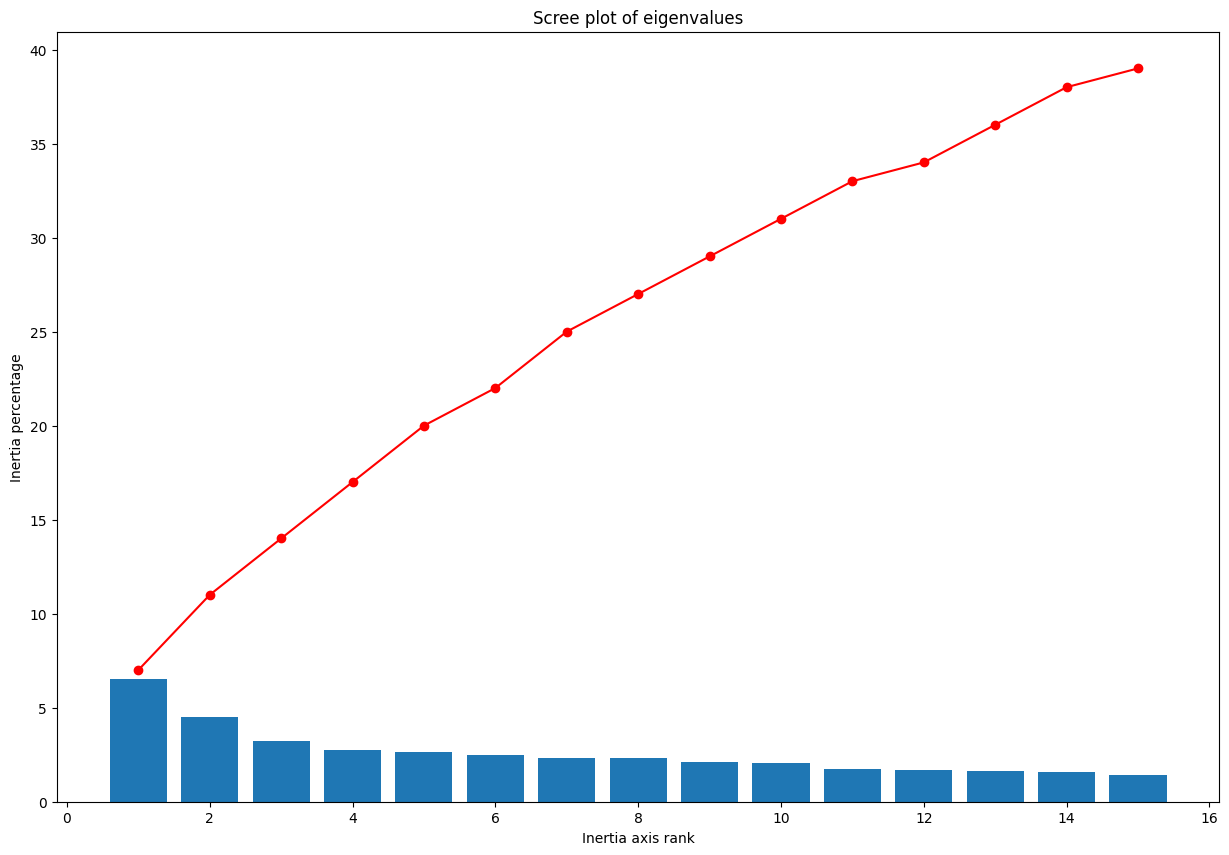

In [294]:
plt.figure(figsize = (15,10))
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Inertia axis rank")
plt.ylabel("Inertia percentage")
plt.title("Scree plot of eigenvalues")
plt.show(block=False)


In [295]:
#Looking at the newly calculated components
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0   0.130951  0.055735  0.268368  0.222006  0.368389  0.179766  0.357034   
1  -0.251333 -0.031720  0.271772 -0.201824  0.144312 -0.164609  0.174031   
2   0.159812 -0.066322  0.038562 -0.087760 -0.068784 -0.118524 -0.054313   
3   0.065227  0.060669 -0.075812  0.037921 -0.002524  0.094463 -0.016357   
4   0.063899 -0.016848  0.038799  0.053354  0.042660 -0.055694  0.052468   
5  -0.063133 -0.050511  0.079214 -0.112505  0.060022 -0.037240  0.067843   
6   0.044841  0.039220  0.001383 -0.061919 -0.012447 -0.025769 -0.009200   
7   0.078320 -0.382665  0.128832 -0.018761  0.025631 -0.263589  0.064978   
8   0.115172 -0.088575  0.055034 -0.087317 -0.024431 -0.100340 -0.010825   
9   0.121288 -0.281397 -0.048469  0.051755 -0.017824 -0.005943 -0.017675   
10  0.025503  0.141663  0.089641 -0.104902 -0.057579 -0.002790 -0.059483   
11  0.243326 -0.040896 -0.005143  0.067874  0.004305  0.053063 -0.003236   
12 -0.230912 -0.121420 -0.021531  0.035705 -0.027307  0.015876 -0.030711   
13 -0.202564 -0.008625 -0.030370  0.042225 -0.010526  0.018862 -0.013690   
14 -0.011109 -0.013600  0.002153  0.011313 -0.003259 -0.014649 -0.001260   

          7         8         9         10        11        12        13  \
0   0.354466  0.223263  0.136147  0.034742  0.336242  0.271159  0.111830   
1   0.184214 -0.126333 -0.058796 -0.080251  0.202972  0.177553  0.175211   
2  -0.044920 -0.162765 -0.123361  0.024200 -0.015544  0.014003  0.154645   
3  -0.023892  0.124686  0.165838 -0.089476  0.022030  0.061854 -0.115068   
4   0.067934 -0.098299 -0.195099 -0.067691  0.065923  0.083718 -0.156043   
5   0.064375  0.013946  0.018442 -0.014787  0.077602  0.031414 -0.103269   
6  -0.015788 -0.013005 -0.007787 -0.061618  0.015150  0.014748  0.034571   
7   0.063391 -0.215765 -0.137524  0.000826  0.062255  0.040737  0.008972   
8  -0.001881 -0.140454 -0.103067 -0.092895  0.062760  0.099256 -0.008262   
9  -0.041080  0.076285  0.238174  0.021758 -0.041234 -0.041732  0.094512   
10 -0.053287 -0.084927 -0.058634 -0.090361 -0.024974 -0.035132  0.343625   
11 -0.006367  0.037351  0.011937  0.039518 -0.032682 -0.062675  0.102597   
12 -0.034445  0.017938  0.087572 -0.005611 -0.014139  0.006396  0.085926   
13 -0.006965 -0.011542 -0.025642 -0.097158  0.022673  0.052668 -0.019844   
14 -0.003616 -0.013849  0.007760 -0.109215  0.007718  0.010313 -0.057876   

          14        15        16        17        18        19        20  \
0  -0.097715  0.009360  0.048100 -0.010101  0.015470 -0.014532  0.118753   
1  -0.182959  0.066868 -0.058202  0.086345 -0.004400  0.060382 -0.315795   
2  -0.226352  0.172412  0.053614  0.249572  0.001130  0.116835 -0.083229   
3   0.172289 -0.135043  0.173869 -0.212439  0.073854  0.395809 -0.311623   
4   0.215047 -0.150631  0.346500 -0.141035  0.031119 -0.322440 -0.095655   
5   0.189914 -0.182888 -0.427075 -0.227411 -0.010648  0.045892  0.102563   
6  -0.017477 -0.019359 -0.103341 -0.036557  0.105261 -0.051205 -0.007958   
7   0.080393 -0.153483  0.056705 -0.176527 -0.189211  0.080058  0.114477   
8   0.039513 -0.057142 -0.047732 -0.030212  0.594645  0.000830  0.041897   
9  -0.099788  0.037986  0.011971  0.040856  0.061899  0.016730 -0.131074   
10 -0.232552 -0.089582  0.096070 -0.326490 -0.065747  0.125396  0.049639   
11 -0.146994  0.108830 -0.112725  0.004555 -0.010504 -0.174179 -0.030996   
12 -0.027594 -0.075817  0.100357  0.025389  0.094385 -0.154292  0.065870   
13  0.018250 -0.003253 -0.014766 -0.002358 -0.019991  0.062745  0.012471   
14  0.072005 -0.042311  0.022867  0.074846 -0.029314 -0.023125  0.002684   

          21        22        23        24        25        26        27  \
0  -0.006670 -0.037215 -0.135819 -0.046834 -0.025581 -0.013318 -0.025782   
1   0.002327  0.039069  0.224633  0.023310  0.007715  0.027009  0.065732   
2   0.045576  0.120644 -0.381419  0.161782  0.055729  0.072937  0.018196   
3   0.012791  0.067685 -0.084807 -0.018914  0.058522 -0

In [296]:
#Renaming columns
pcs.columns = scaled_pca.columns

#Attributing numbers to each feature
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
F1                  0.13       0.06               0.27            0.22   
F2                 -0.25      -0.03               0.27           -0.20   
F3                  0.16      -0.07               0.04           -0.09   
F4                  0.07       0.06              -0.08            0.04   
F5                  0.06      -0.02               0.04            0.05   
F6                 -0.06      -0.05               0.08           -0.11   
F7                  0.04       0.04               0.00           -0.06   
F8                  0.08      -0.38               0.13           -0.02   
F9                  0.12      -0.09               0.06           -0.09   
F10                 0.12      -0.28              -0.05            0.05   
F11                 0.03       0.14               0.09           -0.10   
F12                 0.24      -0.04              -0.01            0.07   
F13                -0.23      -0.12              -0.02            0.04   
F14                -0.20      -0.01              -0.03            0.04   
F15                -0.01      -0.01               0.00            0.01   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
F1               0.37                0.18                    0.36   
F2               0.14               -0.16                    0.17   
F3              -0.07               -0.12                   -0.05   
F4              -0.00                0.09                   -0.02   
F5               0.04               -0.06                    0.05   
F6               0.06               -0.04                    0.07   
F7              -0.01               -0.03                   -0.01   
F8               0.03               -0.26                    0.06   
F9              -0.02               -0.10                   -0.01   
F10             -0.02               -0.01                   -0.02   
F11             -0.06               -0.00                   -0.06   
F12              0.00                0.05                   -0.00   
F13             -0.03                0.02                   -0.03   
F14             -0.01                0.02                   -0.01   
F15             -0.00               -0.01                   -0.00   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
F1                        0.35                             0.22   
F2                        0.18                            -0.13   
F3                       -0.04                            -0.16   
F4                       -0.02                             0.12   
F5                        0.07                            -0.10   
F6                        0.06                             0.01   
F7                       -0.02                            -0.01   
F8                        0.06                            -0.22   
F9                       -0.00                            -0.14   
F10                      -0.04                             0.08   
F11                      -0.05                            -0.08   
F12                      -0.01                             0.04   
F13                      -0.03                             0.02   
F14                      -0.01                            -0.01   
F15                      -0.00                            -0.01   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
F1                             0.14             0.03                 0.34   
F2                            -0.06            -0.08                 0.20   
F3                            -0.12             0.02                -0.02   
F4                             0.17            -0.09                 0.02   
F5                            -0.20            -0.07                 0.07   
F6                             0.02            -0.01                 0.08   
F7                            -0.01            -0.06                 0.02   
F8                        

In [297]:
pcs.T

F1        F2  \
CouncilDistrictCode                                 0.130951 -0.251333   
YearBuilt                                           0.055735 -0.031720   
NumberofBuildings                                   0.268368  0.271772   
NumberofFloors                                      0.222006 -0.201824   
PropertyGFATotal                                    0.368389  0.144312   
...                                                      ...       ...   
ThirdLargestPropertyUseType_Repair and Public S...  0.001286 -0.015730   
ThirdLargestPropertyUseType_Retail/Mall             0.010747 -0.024943   
ThirdLargestPropertyUseType_School                 -0.003192  0.000166   
ThirdLargestPropertyUseType_Swimming Pool           0.016080 -0.009634   
ThirdLargestPropertyUseType_Warehouse               0.003329 -0.003965   

                                                          F3        F4  \
CouncilDistrictCode                                 0.159812  0.065227   
YearBuilt                                          -0.066322  0.060669   
NumberofBuildings                                   0.038562 -0.075812   
NumberofFloors                                     -0.087760  0.037921   
PropertyGFATotal                                   -0.068784 -0.002524   
...                                                      ...       ...   
ThirdLargestPropertyUseType_Repair and Public S... -0.000422 -0.021564   
ThirdLargestPropertyUseType_Retail/Mall            -0.051034  0.032065   
ThirdLargestPropertyUseType_School                  0.051402  0.150518   
ThirdLargestPropertyUseType_Swimming Pool           0.031668  0.144101   
ThirdLargestPropertyUseType_Warehouse              -0.033338  0.022066   

                                                          F5        F6  \
CouncilDistrictCode                                 0.063899 -0.063133   
YearBuilt                                          -0.016848 -0.050511   
NumberofBuildings                                   0.038799  0.079214   
NumberofFloors                                      0.053354 -0.112505   
PropertyGFATotal                                    0.042660  0.060022   
...                                                      ...       ...   
ThirdLargestPropertyUseType_Repair and Public S... -0.011603  0.018946   
ThirdLargestPropertyUseType_Retail/Mall            -0.043821 -0.038724   
ThirdLargestPropertyUseType_School                 -0.097226  0.052929   
ThirdLargestPropertyUseType_Swimming Pool           0.052244 -0.124532   
ThirdLargestPropertyUseType_Warehouse              -0.100665  0.032136   

                                                          F7        F8  \
CouncilDistrictCode                                 0.044841  0.078320   
YearBuilt                                           0.039220 -0.382665   
NumberofBuildings                                   0.001383  0.128832   
NumberofFloors                                     -0.061919 -0.018761   
PropertyGFATotal                                   -0.012447  0.025631   
...                                                      ...       ...   
ThirdLargestPropertyUseType_Repair and Public S...  0.023738  0.033206   
ThirdLargestPropertyUseType_Retail/Mall            -0.009070  0.058458   
ThirdLargestPropertyUseType_School                 -0.125710  0.086400   
ThirdLargestPropertyUseType_Swimming Pool          -0.074913  0.015042   
ThirdLargestPropertyUseType_Warehouse              -0.020107  0.099243   

                                                          F9       F10  \
CouncilDistrictCode                                 0.115172  0.121288   
YearBuilt                                          -0.088575 -0.281397   
NumberofBuildings                                   0.055034 -0.048469   
NumberofFloors                                     -0.087317  0.051755   
PropertyGFATotal                                   -0.024431 -0.017824   
...                                                      .